In [2]:
import pandas as pd
import numpy as np
import scanpy as sc
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib import pyplot as plt
import seaborn as sns
from sanbomics.tools import id_map
from sanbomics.plots import volcano

import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
from rpy2.robjects.packages import importr
import rpy2.robjects as robjects
from rpy2.robjects.conversion import localconverter
from rpy2.robjects.vectors import StrVector

from combat.pycombat import pycombat
import pydeseq2
from pydeseq2.dds import DeseqDataSet
from pydeseq2.ds import DeseqStats
from pydeseq2.preprocessing import deseq2_norm 
import df_helpers as helper
dirs = helper.dirs()


In [4]:
rawmetadata_df = pd.read_excel(f'{dirs.deseq2input}/Metadata.xlsx')
rawcounts_df = pd.read_excel(f'{dirs.deseq2input}/Raw_Counts.xlsx')
rawcounts_df.rename(columns={'Unnamed: 0':'Index'},inplace=True)
rawcounts_df.set_index('Index',inplace=True)
# rawmetadata_df = rawmetadata_df[rawmetadata_df.Day != 'CTRL']
rawcounts_df = rawcounts_df[rawmetadata_df.Sample]
rawmetadata_df.set_index('Sample',inplace=True)
rawmetadata_df.Day = rawmetadata_df.Day.astype('str')

HNES_metadata_df = rawmetadata_df[(rawmetadata_df.Group == 'A') 
                                  | (rawmetadata_df.Group == 'C') 
                                  | (rawmetadata_df.Group == 'D')
                                  | (rawmetadata_df.Group == 'H')]
cR_metadata_df = rawmetadata_df[(rawmetadata_df.Group == 'W') 
                                | (rawmetadata_df.Group == 'X') 
                                | (rawmetadata_df.Group == 'Z')
                                | (rawmetadata_df.Group == 'H')]

HNES_counts_df = rawcounts_df[HNES_metadata_df.index]
cR_counts_df = rawcounts_df[cR_metadata_df.index]

mapper = id_map(species='human')
rawcounts_df.index = rawcounts_df.index.map(mapper.mapper)
rawcounts_df.dropna(inplace=True)

In [109]:
newcols = ['A0', 'C0', 'D0', 'W0', 'X0', 'Z0',
           'A1', 'C1', 'D1',  'W1', 'X1', 'Z1',
           'A2', 'C2', 'D2', 'W2', 'X2', 'Z2',
           'A3', 'C3', 'D3', 'W3', 'X3', 'Z3',
           'A7', 'C7', 'D7', 'W7', 'X7', 'Z7',
           'A10', 'C10', 'D10', 'W10', 'X10',  'Z10',
           'H_CTRL1', 'H_CTRL2', 'H_CTRL3']

rawcounts_df = rawcounts_df[newcols].loc[[gene for gene in cytokegg if gene not in ['INS']]]
rawmetadata_df = rawmetadata_df.loc[newcols]

mean_rawcounts_df = pd.DataFrame(data={
    'Day 0':norm_counts_df[norm_counts_df.columns[0:6]].mean(axis=1),
    'Day 1':norm_counts_df[norm_counts_df.columns[6:12]].mean(axis=1),
    'Day 2':norm_counts_df[norm_counts_df.columns[12:18]].mean(axis=1),
    'Day 3':norm_counts_df[norm_counts_df.columns[18:24]].mean(axis=1),
    'Day 7':norm_counts_df[norm_counts_df.columns[24:30]].mean(axis=1),
    'Day 10':norm_counts_df[norm_counts_df.columns[30:36]].mean(axis=1),
    'H9':norm_counts_df[norm_counts_df.columns[36:39]].mean(axis=1)
})

mean_metadata_df = pd.DataFrame.from_dict({
    'Day 0':'0',
    'Day 1':'1',
    'Day 2':'2',
    'Day 3':'3',
    'Day 7':'7',
    'Day 10':'10',
    'H9':'CTRL'
},orient='index',columns=['Day'])
mean_metadata_df.index.name = 'Sample'
mean_rawcounts_df = mean_rawcounts_df.apply(round).astype(int)

In [138]:
cytokegg = helper.get_cytoKEGGlist()
# norm_counts_df = helper.read_normcounts()
sigs = helper.read_results(None, 'D100')
siggenes = list(sigs.index)
mean_rawcounts_df.loc[siggenes]


KeyError: "['DPYSL2', 'PCNX2', 'GPX2', 'THY1', 'CCND2', 'DCLK1', 'SLC8B1', 'ETV5', 'USP44', 'HRK', 'TGIF2', 'PYGB', 'SPRED1', 'FZD7', 'AKAP1', 'SLC25A16', 'ROR1', 'ATG9B', 'JARID2', 'SOAT1', 'PTPRU', 'SPRY4', 'DDAH1', 'GPC4', 'MX1', 'GLI2', 'HSBP1L1', 'LRP8', 'ASRGL1', 'CD24', 'DNMT3L', 'DNAJC15', 'CDHR1', 'PRSS12', 'ABCB8', 'FOXD3-AS1', 'PCYT1B', 'FREM2', 'EPHA2', 'VRTN', 'SLCO4C1', 'KIF1A', 'CAV1', 'SEMA3A', 'PODXL', 'GPNMB', 'SUN3', 'EBF3', 'TUBB4A', 'LIPH', 'AXL', 'RNF212', 'MAGI2', 'PELI2', 'SAMHD1', 'MFGE8', 'HIC2', 'ADAMTS7', 'RREB1', 'PCSK9', 'SLC66A2', 'PTPRD', 'SEPTIN3', 'REST', 'GALNT6', 'PHLDA1', 'DEPTOR', 'SLC7A3', 'DMKN', 'RASL11B', 'TMEM98', 'CRYBG3', 'HELB', 'AIG1', 'ETFA', 'JMJD1C', 'EFHD2', 'PINK1', 'CLIP2', 'MYH7B', 'ZNF432', 'MAGI1', 'NCS1', 'FKBP10', 'TRIM75', 'ESYT1', 'SCG3', 'PRDM5', 'ALPK3', 'NRBP2', 'MGLL', 'LYST', 'OXA1L', 'MYEF2', 'CD70', 'PLEKHG3', 'MCC', 'CLIP1', 'FBLN1', 'ADD2', 'SOX11', 'RND3', 'ERVMER34-1', 'ZNF483', 'NDUFAB1', 'ZSCAN2', 'MAPRE2', 'MEX3A', 'EDIL3', 'RGS5', 'TBCD', 'NSD2', 'TUBA1A', 'PARM1', 'SDC1', 'MMP25', 'TUNAR', 'KIF5C', 'CDC14B', 'COL4A1', 'HSPA2', 'DOCK5', 'MED15', 'PIK3AP1', 'SALL2', 'PTCH1', 'NELL2', 'B3GALT5', 'FHL1', 'FAT3', 'KLF5', 'SLC5A5', 'CAST', 'SPRY2', 'FABP3', 'FAM131B', 'DDX58', 'DNAH3', 'VANGL2', nan, 'SPP1', 'SHISA9', 'DPYSL3', 'PTGIS', 'PDZD4', 'NLRP7', 'RNF125', 'GULP1', 'STAT5B', 'TFCP2L1', 'PLEKHB2', 'RAB34', 'MAP7', 'BLVRA', 'VWCE', 'ZYG11A', 'EFR3B', 'EXPH5', 'DNAJA3', 'CSRP2', 'TINCR', 'PNKD', 'SIAH2', 'NUDT10', 'RCOR2', 'NCOA1', 'C14orf132', 'PTPRZ1', 'ADGRD1', 'GALNT1', 'MFSD4B', 'ABCA1', 'COL18A1', 'FAM13A', 'CRISPLD1', 'EMB', 'CDH2', 'PGAP4', 'SLFN13', 'NECTIN3', 'NDUFV1', 'TCF4', 'RPTOR', 'REEP1', 'ITPR2', 'CNR2', 'TOR3A', 'SH3PXD2A', 'SORL1', 'A4GALT', 'IRS4', 'RMND1', 'TNFSF9', 'PROM1', 'GINS3', 'ZC4H2', 'CRABP1', 'UQCC1', 'WDR35', 'SEC23B', 'MARCHF8', 'DUSP5', 'TUBB2B', 'NSMAF', 'SEMA6B', 'CFLAR', 'IL6R', 'SMPDL3A', 'LARGE1', 'SLC43A1', 'GALNT2', 'ZDHHC23', 'FLT1', 'SHROOM4', 'TNIK', 'RFX7', 'DIXDC1', 'UBE2L6', 'CSMD2', 'TTC39C', 'TMEM51-AS1', 'DNM1', 'OSBPL9', 'PEAK1', 'TRERF1', 'PPARGC1B', 'PTPN14', 'AL353747.4', 'MAP1B', 'BARD1', 'IVNS1ABP', 'VSNL1', 'KIF21A', 'NNAT', 'SNX4', 'NGFR', 'VCAN', 'MYO1G', 'CDH3', 'NEDD4L', 'ZDHHC2', 'PLS1', 'UBAC2', 'TRAF5', 'AIRE', 'NHSL2', 'TRIB2', 'HERC6', 'KMT2C', 'BHLHB9', 'ASH2L', 'ETV4', 'ELAVL2', 'SYT6', 'AC022150.4', 'OAZ2', 'NRXN2', 'PRAP1', 'ERBIN', 'PDE3B', 'KLRG2', 'RASGRP2', 'SPATS2L', 'TMEM132D', 'SUSD2', 'FUCA1', 'PHC1', 'GCNT1', 'IGF1R', 'CBX4', 'PCDH1', 'TUBA4A', 'NFKB2', 'PKD2', 'COL4A2', 'PMEL', 'PKP4', 'B3GAT1', 'BIRC6', 'PLEKHA5', 'PLD6', 'DOCK9', 'HOXB3', 'MEIS2', 'TRIM71', 'ACO2', 'OLAH', 'CARD11', 'CPLX1', 'SMPDL3B', 'AL049646.1', 'COL4A6', 'MIR205HG', 'ANKRD27', 'GABRA5', 'COTL1', 'TMEM51', 'ATP6V1B1', 'TCEAL4', 'RNF207', 'PNMA2', 'FGD5', 'TERF1', 'AR', 'TXNRD1', 'TSPAN17', 'PDPK1', 'GABRB3', 'NRK', 'TMEM132B', 'PAM', 'ETV1', 'BTG1', 'SV2A', 'AARS2', 'GRHL1', 'CCDC112', 'SFRP2', 'TMEM47', 'NBEA', 'DTNA', 'SLC12A3', 'SLC7A6', 'UGT3A2', 'NKAIN1', 'RGCC', 'NFKBIA', 'SBK1', 'NCOA3', 'ELP2', 'GAP43', 'FAM151A', 'PDXDC1', 'KCNQ3', 'SPATA20', 'PSMD9', 'TAX1BP1', 'RAB42', 'ERAP1', 'DMBX1', 'MME', 'NUPR1', 'SYNGR2', 'SNX3', 'RASL10B', 'SYNGR1', 'TRIM60', 'DOCK2', 'AP002754.2', 'MRPL18', 'BMERB1', 'SBDS', 'PIPOX', 'TMEM200A', 'TRIB3', 'SLC25A24', 'CYTH3', 'ARVCF', 'DNAJB4', 'SLC23A2', 'SLC22A23', 'PSIP1', 'IFT172', 'GNB4', 'ARHGEF40', 'ANOS1', 'EPHB6', 'FBXO36', 'MACIR', 'FGFBP3', 'MLF1', 'PHKA1', 'ACTA1', 'PARP14', 'CADPS2', 'CLEC16A', 'KDR', 'COL22A1', 'MAML2', 'CAV2', 'SLC30A2', 'NF2', 'SORD', 'KMT2A', 'MXRA8', 'UCHL1', 'SYTL4', 'AOX1', 'TOP1MT', 'P2RY1', 'ENTPD6', 'SMS', 'ESRRA', 'ZSWIM4', 'CHEK2', 'LIMD2', 'BBS9', 'BRSK1', 'LRPAP1', 'RNF157', 'PTN', 'QSOX1', 'OBSL1', 'DEPDC1B', 'PHLPP1', 'FAM102B', 'METTL16', 'ATP9A', 'HECW1', 'PBX4', 'REEP2', 'PADI2', 'TTC9', 'FNDC4', 'SLC7A8', 'ANTXR1', 'LPP', 'ENC1', 'RN7SL471P', 'CACNA2D2', 'LHFPL2', 'MCRIP2', 'ALAD', 'CDK14', 'ST6GAL1', 'SEL1L3', 'LIPA', 'NEFH', 'ZZEF1', 'RCBTB2', 'DNAJC3', 'PARP8', 'NBEAL1', 'HMGA2', 'NOVA2', 'HIVEP2', 'DUSP6', 'SEPHS1', 'GNG2', 'IRS1', 'EFHD1', 'ADCYAP1R1', 'EIF4G3', 'NBDY', 'TEX264', 'LRRC56', 'ATP9B', 'GAB2', 'ZFP3', 'SMO', 'SAMD4A', 'ATP8A1', 'SPTLC2', 'GAS2L1', 'SYT11', 'CKAP4', 'NFASC', 'ANKRD33B', 'MMACHC', 'ELF3', 'GLTP', 'SALL1', 'PMAIP1', 'NUAK1', 'RARRES2', 'FAM126B', 'ADAMTS16', 'TGFBR2', 'SUCLG1', 'HOXB2', 'BMP2K', 'CYB5A', 'CD320', 'MRPS23', 'CS', 'ZNF883', 'KLF9', 'FSTL1', 'PVR', 'HABP4', 'MID1', 'SYNC', 'ABCA13', 'OSBPL6', 'WDFY2', 'ETV3', 'FSD1', 'DLG2', 'SDHAP3', 'UBE4B', 'SLC44A2', 'AMBRA1', 'ELL2', 'STX6', 'GPR153', 'ID3', 'CHST14', 'RTKN2', 'RFX3', 'TNRC18', 'CD53', 'GABRD', 'CDON', 'NXPE3', 'AMOTL1', 'CLMP', 'JAKMIP2', 'NCBP2', 'PREP', 'RPLP0P2', 'CCR8', 'TMEM109', 'SLFN12', 'ARHGEF10L', 'RAD54L2', 'RTN4', 'RAB8B', 'SYNGAP1', 'WWC2', 'ADCY2', 'NUDT11', 'CDH4', 'GAS6', 'PREX2', 'BMPR1A', 'IRS2', 'SYT1', 'YIPF4', 'CCNJL', 'GPR176', 'GCH1', 'MAMDC2', 'RNF144A', 'FRMPD4', 'TIMP2', 'GJC1', 'HSPA12B', 'C1orf198', 'LINC02600', 'MTOR', 'DOCK4', 'FBN3', 'ABCC13', 'SGCB', 'RBBP9', 'PAPSS1', 'ERC2', 'TSPAN5', 'SERPING1', 'WASF3', 'APH1B', 'GPRASP2', 'TGFB3', 'CERCAM', 'ACER2', 'ZNF696', 'NOTCH2', 'RAB31', 'HDAC7', 'SEPTIN6', 'VLDLR', 'GATM', 'PPIL2', 'NEB', 'MDFI', 'ATG3', 'SIX4', 'HNRNPA1P21', 'USP6', 'FLOT1', 'SRPX', 'EMC10', 'GHITM', 'SYK', 'ST6GALNAC4', 'NEO1', 'FAF1', 'TLE1', 'DGKD', 'CCDC141', 'TMEM178B', 'ULK1', 'CERS6', 'ATP8B1', 'THOC2', 'ORAI2', 'RRAD', 'CARMIL1', 'MAP7D3', 'RAI14', 'TLE5', 'CCDC88A', 'SLC1A6', 'DCTN5', 'C2CD4C', 'ENPP1', 'AC005062.1', 'MTFR1L', 'TENM1', 'RIPOR2', 'LCK', 'KIF3C', 'MET', 'NADK', 'CHD6', 'TMX4', 'TXNDC11', 'AFG3L2', 'ZNF697', 'ADRA2C', 'NRG1', 'FN3K', 'ARHGEF9', 'ZCCHC3', 'ZNF184', 'SHFL', 'ATP5MC3', 'PARP16', 'ATP8B2', 'NTNG1', 'NPTX2', 'CACNB1', 'CABYR', 'CBX5', 'TAOK3', 'ITIH5', 'ZDHHC22', 'STXBP6', 'RNF122', 'PPFIBP2', 'IGFBPL1', 'EXOSC6', 'TEK', 'STARD3NL', 'PTDSS2', 'TMEM45A', 'FRK', 'MAP3K3', 'JADE1', 'FRMD4A', 'BTLA', 'ZBTB18', 'HENMT1', 'UNC5D', 'ITPR1', 'TBC1D10B', 'FAM124A', 'COL3A1', 'AKAP13', 'CREB5', 'RNF217', 'RTN4R', 'CLUH', 'APP', 'DVL2', 'MGST1', 'HAS3', 'PLPPR3', 'PTPRN', 'TMX2', 'AGO1', 'ARMT1', 'STC1', 'RHOBTB1', 'ACO1', 'ELOVL4', 'NAP1L2', 'SEPTIN5', 'MAL2', 'CTSB', 'RNF144B', 'WDR20', 'NECAB1', 'TBC1D14', 'QARS1', 'PPL', 'PLA2R1', 'RASAL2', 'FOXR1', 'MAP1A', 'ADGRB2', 'LIPG', 'AC021683.2', 'CTDSP1', 'SLC7A7', 'TAPBP', 'FBXO2', 'ASPA', 'KLF17', 'IGDCC3', 'IRF2', 'CACNA1A', 'DEGS1', 'NEBL', 'RYR2', 'ARSI', 'TET2', 'MAGEE1', 'CFD', 'FOXD3', 'MANEAL', 'NLRC4', 'COX6C', 'NT5DC2', 'SCUBE2', 'MIR1915HG', 'CTTNBP2NL', 'TRIM36', 'KLF10', 'TADA2B', 'PRKACB', 'TBC1D16', 'OGFRL1', 'HEPH', 'SYT16', 'COL4A5', 'LPAR3', 'FBP1', 'CLPB', 'HLA-DOA', 'ZBTB3', 'TENM3-AS1', 'C10orf95-AS1', 'DAGLB', 'STEAP2', 'NOS3', 'SRI', 'RASSF8', 'CYP2R1', 'LOXL2', 'KIF16B', 'EID1', 'EPHA4', 'KREMEN2', 'TP53', 'EML4', 'TSKS', 'SMAD6', 'TRAK1', 'HES2', 'STK35', 'ZIC5', 'SERINC2', 'ALCAM', 'PTPN13', 'PTPN2', 'PITPNC1', 'SLC19A2', 'RCBTB1', 'ACAP3', 'STXBP1', 'CACNA1G', 'SLC35F6', 'PTPRS', 'MAFA', 'TNS3', 'PRKCB', 'DENND1B', 'BEX3', 'PDSS2', 'DCXR', 'TOX3', 'AZIN1', 'SHF', 'PPP3CA', 'PPP4R4', 'ABR', 'NET1', 'SNW1', 'CCDC126', 'LINC00511', 'HMCN1', 'ACOXL', 'MIR124-1HG', 'BTK', 'MELTF', 'BEX1', 'PTCD1', 'PAWR', 'TCF7L2', 'NARS1', 'CRLF1', 'CCND3', 'GCA', 'KCNT2', 'CTSL', 'FAR2', 'CSF2RA', 'SOX12', 'ATP5MJ', 'CECR2', 'PRXL2B', 'RASA3', 'EFHC1', 'PLPP1', 'AL591742.2', 'FAM111A', 'AC007114.2', 'WDR11-DT', 'SCN4A', 'AC104461.1', 'FANCF', 'SRGAP2', 'ARHGAP31', 'TGS1', 'C1orf21', 'LIN28A', 'SLC9A3', 'LAMTOR5', 'SLC25A29', 'HOXB-AS1', 'PNPLA5', 'SHC3', 'SMIM10L2A', 'CTNNB1', 'SH3TC1', 'CD44', 'GRAMD1B', 'SDC3', 'ZIC2', 'SLC39A6', 'LYPD6', 'SHPK', 'UBE2E3', 'CD151', 'PPP1R9A', 'TRHDE', 'CDYL', 'SLC37A1', 'C1orf226', 'BFAR', 'MYH2', 'IGF2R', 'DNM3', 'COQ4', 'TRIM26', 'PRADC1', 'RELL1', 'COL14A1', 'DOK1', 'RPS6KA6', 'ATG5', 'SEMA3F', 'SLC2A12', 'AC064802.1', 'CD74', 'CIAO3', 'ARHGAP26', 'NANOGP1', 'FIG4', 'NIBAN1', 'NFKB1', 'FAM229B', 'CNIH3', 'NDUFA12', 'CDCA4', 'HELLS', 'HMGCR', 'SMARCA1', 'MRPL35', 'DDIT4L', 'NPEPPS', 'HSD17B6', 'MED9', 'HMGCS1', 'NECAB3', 'CNN1', 'PLSCR4', 'CA14', 'MPZL1', 'KLHL7', 'PLCB4', 'PPT2', 'ZNF571', 'ZNF525', 'CPAMD8', 'MXI1', 'ZNF711', 'INHBE', 'ZCCHC24', 'CUX1', 'CADM1', 'EPHA1', 'C19orf85', 'NUP50', 'SATB1', 'ACLY', 'LAMA3', 'SMPD1', 'REXO2', 'ADCY1', 'NLRP1', 'PPM1L', 'ADGRE5', 'PLA2G3', 'RYK', 'SUPT7L', 'PGM2L1', 'PAXIP1', 'CMAS', 'CRIM1', 'MDN1', 'KIT', 'MFSD2A', 'LIFR', 'EFNA5', 'C1QL1', 'ADAM22', 'SNHG15', 'C8orf88', 'NFATC4', 'MBTD1', 'GNPAT', 'SNX8', 'IGLON5', 'AC022140.1', 'ARNT2', 'GREB1L', 'EDNRB', 'PDE4A', 'TEX15', 'RAB3IL1', 'OLFML3', 'WDR86', 'PEG10', 'SLC43A3', 'SERPINF1', 'OLFM1', 'RUFY1', 'PCSK5', 'MRS2', 'E2F5', 'CIAO2B', 'ATAD3B', 'GTF3C2', 'DPYSL5', 'PRSS35', 'STAC', 'HYOU1', 'IL27RA', 'KYAT1', 'CHST9', 'ZNF607', 'CHST12', 'TRIM46', 'PDS5A', 'FAT1', 'SPEG', 'DNAJC1', 'ZNF775', 'DCAF4', 'TAGLN', 'AP1S2', 'TRIM62', 'SPOCK1', 'CTTNBP2', 'GTF2H1', 'DCBLD2', 'TCP11L1', 'MTHFD2L', 'ARAP3', 'PLCD1', 'WNK3', 'SHANK2', 'SIPA1', 'PHAF1', 'SEPTIN9', 'ATP5PF', 'GBA3', 'ACOT4', 'MCAM', 'TACSTD2', 'PRORSD1P', 'CA13', 'IRF2BPL', 'YEATS2', 'SPRY1', 'LZTS2', 'FAM189A2', 'CHCHD6', 'TIMM17A', 'ETFB', 'ADCY5', 'TGFBR3', 'NCOA6', 'RUNX1', 'NTS', 'DDX43', 'TBC1D23', 'GDF11', 'TCF15', 'B3GALT1', 'TRIM56', 'TEC', 'AEBP1', 'IQSEC2', 'ATP7B', 'MEGF6', 'DLG3', 'CDA', 'UAP1L1', 'SNTG2', 'CELF2', 'ODF2L', 'SNTB1', 'NLRP2', 'MACC1', 'ALDH2', 'KIAA1549L', 'DLX3', 'PDE9A', 'SPIRE2', 'TMEM41B', 'NRARP', 'STX1B', 'ASIC3', 'GNE', 'YY1AP1', 'AUTS2', 'COX5B', 'APOL2', 'TSPAN12', 'SEMA4A', 'ZFP30', 'USP11', 'SHISA2', 'BCAT2', 'FEZ1', 'SLC9A3R2', 'MAGEL2', 'TAFA5', 'SLC37A4', 'CHSY1', 'SLC18B1', 'CDC14A', 'MNS1', 'SENP2', 'SPATA13', 'CAPRIN2', 'GALNT14', 'TMEM150C', 'AC093866.1', 'PTPRG', 'FOXJ1', 'PPP1R18', 'PTTG1', 'RASL12', 'EIF2B5', 'DCLRE1B', 'ZNF731P', 'SORBS2', 'KLHL18', 'SH3GL3', 'RASGRF2', 'ADAMTSL5', 'ADGRL3', 'ILRUN', 'AGPAT5', 'ZFYVE9', 'SPIC', 'PELO', 'FYN', 'FAM83H', 'ANKRD29', 'RAB28', 'PID1', 'CCDC136', 'MECR', 'KCND2', 'TTLL6', 'CDK6', 'PRDM1', 'UQCR10', 'FHL2', 'KLHL5', 'TMEM9B', 'MUC4', 'LY6E', 'ZNF66', 'NBPF9', 'SLK', 'ERG28', 'PNPLA3', 'TRIM61', 'CCND1', 'INPPL1', 'CTPS2', 'GABPB2', 'KLHDC7A', 'EIF2AK4', 'TNFRSF10D', 'COL25A1', 'PIP4P2', 'PLEC', 'KIF9', 'RHEBL1', 'ATP5MC1', 'RYR1', 'VWA1', 'FMNL3', 'NCOA2', 'MFN2', 'TM7SF2', 'PDLIM3', 'PTH1R', 'TNFRSF21', 'ARHGAP42', 'GTDC1', 'DDX31', 'RTKN', 'SP8', 'CCDC15', 'BEX2', 'CDH1', 'MATN2', 'OLR1', 'NMB', 'DUOX1', 'MMD', 'AC022893.1', 'SH3BGRL', 'LIN28B', 'OAT', 'ACTC1', 'FAM117A', 'TAP2', 'OLFM2', 'ST6GALNAC6', 'COMMD3', 'DPPA5', 'RPS6KC1', 'SLC38A1', 'ZNF343', 'RBFOX2', 'ALMS1', 'NCBP2AS2', 'COX6A1', 'UTS2R', 'AC021683.1', 'VPS37B', 'GPC2', 'LCOR', 'GNA14', 'MAPKAPK3', 'HLA-F', 'PARVA', 'SLC35G2', 'SNX5', 'SNTG2-AS1', 'CYP4F22', 'MIPOL1', 'RIC8B', 'CYB5R2', 'RMST', 'CYYR1', 'SLC25A38', 'NSUN4', 'WFDC2', 'IFFO2', 'PI4KAP2', 'ERRFI1', 'SEPTIN10', 'MAFF', 'XYLT1', 'TRIM21', 'GLI3', 'LRRC47', 'ZNF764', 'CTSA', 'GRB14', 'APBB2', 'RNF182', 'SEC22C', 'KIF5A', 'SPOCK2', 'ACVR1', 'GOLGA7B', 'TSPYL5', 'ZSWIM3', 'MT1H', 'SLC9A3R1', 'RCC1', 'NRM', 'PLCH1', 'RAPGEF5', 'OSBPL11', 'AGL', 'IDS', 'FBRS', 'PLCE1', 'NME4', 'JAKMIP2-AS1', 'THYN1', 'FDFT1', 'SLC22A17', 'LINC01315', 'CD99', 'PSD', 'ZFP37', 'XPNPEP3', 'PRDX1', 'RN7SKP118', 'HIP1', 'ZNF280D', 'SLC7A1', 'MEX3B', 'MAN1A1', 'PSMG3', 'ZBTB12', 'ECHDC2', 'PRKAR2A', 'SLC15A3', 'MFAP2', 'KIF14', 'PHACTR2', 'ATP1A2', 'TAF4B', 'STK32C', 'MCU', 'ISL1', 'DACT1', 'AK3', 'CHP1', 'DENND5A', 'SMCR8', 'YPEL2', 'EPPK1', 'ACSL4', 'SP1', 'DRAXIN', 'SLC25A44', 'CDC42EP3', 'UGCG', 'ALKBH1', 'NME7', 'SHOX', 'SERPINE2', 'ACTG1P14', 'S1PR2', 'CLASP1', 'OPHN1', 'TSHZ1', 'PFKM', 'VPS29', 'TRPV1', 'PHETA2', 'SSC4D', 'CNR1', 'XBP1', 'CSPG5', 'RENBP', 'DEPP1', 'LINC00678', 'AL080317.1', 'PDE7A', 'PLA2G15', 'OCIAD2', 'PSMB8', 'PLCXD2', 'TNFRSF10A', 'LRAT', 'P3H2', 'TADA3', 'COQ7', 'LARP1B', 'GDPD1', 'DAAM1', 'PLXDC2', 'RAB15', 'EPDR1', 'UNC79', 'RIMS4', 'TMEFF1', 'FANCA', 'PI4KA', 'TP53INP2', 'GAS7', 'TPTEP1', 'KIAA1217', 'CBFA2T2', 'KIAA1549', 'SPATA22', 'RASEF', 'LINC00294', 'THBS4', 'ARMCX2', 'NNT', 'ARHGAP1', 'PRKAR2B', 'LPCAT4', 'TPP2', 'NCEH1', 'ZBTB10', 'PPP1R21', 'TTC7B', 'DISP3', 'P3H4', 'TRAPPC10', 'SNAP29', 'KCNG2', 'KHDC1L', 'SFXN4', 'SEMA4F', 'SFRP5', 'VSIG10', 'ZDHHC7', 'SLC35F2', 'TSPOAP1', 'SRMS', 'NAV3', 'PWWP2A', 'ACSL1', 'WNT9A', 'PGRMC1', 'HCN2', 'ARRDC2', 'ARHGAP4', 'ENPP2', 'ZBTB8OS', 'GARRE1', 'OVOL2', 'PUSL1', 'KCNH8', 'GRPR', 'MRPS7', 'CNTRL', 'REM1', 'PKIA', 'SUPT3H', 'NOTCH3', 'BMI1', 'FNDC10', 'MIR600HG', 'RGS16', 'PIGG', 'COX4I1', 'TACC1', 'FLNC', 'POU6F1', 'PKM', 'SNAI3', 'ACSS3', 'FKBP1B', 'RPL13P5', 'NPR2', 'MTM1', 'CPNE9', 'C10orf82', 'ZSWIM6', 'FH', 'EEA1', 'LHX6', 'UBR3', 'IL17RD', 'TSPY26P', 'TXNL4A', 'ATP6V0A4', 'HES1', 'B3GALT5-AS1', 'DOP1B', 'ASAP3', 'TNK2', 'KIAA0825', 'ADGRA2', 'VWA5A', 'IQCE', 'UNC13B', 'RAB17', 'PGBD5', 'KLF11', 'CCDC150', 'F11R', 'CADPS', 'UBR5', 'AC138207.4', 'FASTKD1', 'NNT-AS1', 'DLGAP1', 'ARGFX', 'ATP2B1', 'ZNF219', 'VEPH1', 'TLCD5', 'PLK2', 'STXBP5L', 'RASAL1', 'CNNM4', 'DSC2', 'TUSC3', 'AC020928.1', 'MGAT4B', 'MIR222HG', 'TCEAL8', 'NIPAL1', 'STARD13', 'ENOSF1', 'ALDH1B1', 'PRICKLE2', 'MIB2', 'ATG13', 'GPR3', 'PIMREG', 'SELENOT', 'PKD1L1', 'CR2', 'IPMK', 'TULP2', 'FHOD3', 'MERTK', 'BTBD6P1', 'CD276', 'VENTX', 'ADAMTS4', 'HOXD13', 'INSYN2B', 'AC137894.1', 'DISP1', 'WWC3', 'FRMD5', 'PLEKHH2', 'ZNF823', 'TMCC3', 'DDX25', 'CCDC6', 'TMPPE', 'AC002407.1', 'A2ML1', 'NRIP3', 'GCNT4', 'EFS', 'JAZF1', 'DAP3', 'PKDCC', 'EMILIN3', 'LDHA', 'RCC1L', 'NID2', 'TMSB15A', 'PARN', 'MACF1', 'TMEM50B', 'MDFIC', 'MGAT5B', 'PLA2G4F', 'DNAJA2', 'NAP1L6P', 'PLEKHG1', 'ATP6V1H', 'ATXN7L3B', 'SLC39A8', 'GGNBP2', 'CBX8', 'SHISA5', 'JARID2-DT', 'APOB', 'SLC39A4', 'IGSF9', 'AC124312.2', 'MYBL2', 'CDC73', 'SH3D21', 'RAP2B', 'POGZ', 'DPYSL4', 'C1orf116', 'CYBRD1', 'RBP1', 'ATG16L1', 'SLC25A1', 'GALM', 'NUCKS1', 'CPEB3', 'MINDY2', 'ZNF362', 'CRIP1', 'PPFIBP1', 'LVRN', 'VLDLR-AS1', 'SDHB', 'PAIP2B', 'BHMT', 'PXMP4', 'RRAGD', 'SELENOF', 'TLCD3B', 'FKBP8', 'GRIA1', 'B4GALNT4', 'CCDC167', 'PDHX', 'IFI16', 'CALN1', 'PTPN4', 'GAL3ST1', 'VIM', 'MTHFR', 'HLA-A', 'SYN2', 'TCEAL3', 'EXD2', 'SBSPON', 'TMEM38B', 'OGDH', 'TENM2', 'CDYL2', 'PIGO', 'GPR143', 'SLC2A1', 'SHISAL2B', 'FADS2', 'ECEL1P1', 'DNAJC11', 'FCHSD1', 'PIM1', 'PGAP1', 'PLEKHA6', 'BCRP3', 'TSPAN2', 'MXRA5', 'YIF1B', 'SLC2A3', 'LINC01160', 'LOXL3', 'MOGAT3', 'LMCD1', 'NDN', 'FBXL7', 'WIPI1', 'BBS10', 'PPP2R1B', 'NTM', 'AL138720.1', 'LPIN2', 'ATP5PB', 'MEGF8', 'GPCPD1', 'GNAO1', 'INPP4B', 'RTL6', 'KTI12', 'TTN', 'DLX4', 'BCL3', 'CNKSR2', 'ASS1', 'RTP3', 'MRPS5', 'CACHD1', 'ASMTL', 'B4GALT1', 'AC007996.1', 'ZKSCAN7', 'NSG1', 'NES', 'NOS1AP', 'UBR1', 'BLOC1S6', 'TIE1', 'NAXE', 'FADS1', 'TRIM38', 'PCSK1', 'FCGBP', 'AKR1B1', 'SOBP', 'HIF1A', 'FAM174B', 'TTC39B', 'LINC02904', 'BAK1', 'GLT1D1', 'IDH3B', 'ZNF100', 'KIZ', 'ZNF850', 'ANKDD1B', 'KIF21B', 'BNIP3L', 'ARAP1', 'RIC1', 'SP4', 'TLE4', 'PLXND1', 'GPRIN2', 'AGFG2', 'EMILIN1', 'SCG5', 'ZNF853', 'GRIN2A', 'CCDC91', 'SLC16A10', 'SHMT1', 'DDAH2', 'USB1', 'CPNE7', 'MSI1', 'RTN4RL1', 'VASH2', 'PLIN2', 'AC020656.2', 'SLC25A39', 'ALDOC', 'HTR7P1', 'PCGF6', 'MRPL48', 'GAK', 'BVES', 'PIK3C2A', 'CASZ1', 'FAM135A', 'ARSK', 'FLT4', 'ARRB1', 'MAN1C1', 'EEPD1', 'HS6ST3', 'TUB', 'LAYN', 'ZNF490', 'HDGFL3', 'IGFBP4', 'TAF13', 'SEMA5A', 'ARG2', 'COL13A1', 'WDR5', 'HRH3', 'TRIM8', 'ATP5F1B', 'GAL3ST3', 'LARS2', 'GSTM4', 'ERVW-1', 'GREM2', 'MRGPRF', 'ADAMTSL2', 'WDPCP', 'RNF152', 'INTS10', 'SLC49A3', 'RPL7L1', 'TFDP1P2', 'SLC25A12', 'FLAD1', 'SH3GL2', 'MAPK8IP2', 'ZNF620', 'BNIP3', 'IGSF8', 'CENPF', 'PRKG1', 'CEBPD', 'DPPA4', 'CNTN2', 'TMOD2', 'CA12', 'GRIK5', 'PLPP3', 'NLGN1', 'MTARC2', 'ZMAT4', 'CAMK4', 'AKAP7', 'MFSD1', 'PSAT1', 'MAILR', 'NOS1', 'AMDHD2', 'CEP192', 'ZDHHC8P1', 'EPM2A', 'DGKH', 'LRRC59', 'DTX3L', 'LRRN1', 'CLPX', 'PXDC1', 'MFSD11', 'KLHL29', 'MTAP', 'ZNF428', 'MAP3K8', 'TMEM70', 'AFG1L', 'ASB13', 'TP53I11', 'NCAPD3', 'EFHC2', 'B4GALT6', 'ZNF335', 'CMKLR1', 'B2M', 'VPS11', 'TMEM123', 'RTN3', 'SLC25A4', 'FAM110C', 'KBTBD11', 'NUDT4', 'ZNF808', 'LOX', 'KLHL26', 'NAPEPLD', 'CHML', 'USP51', 'KIAA1191', 'GSR', 'IGSF1', 'EFNA1', 'DST', 'AQP3', 'IGFBP5', 'UMPS', 'DBI', 'LINC00662', 'ATP6V0D2', 'TRDMT1', 'TRIO', 'CDX1', 'GOT1', 'MIR302CHG', 'ARHGEF19', 'EDIL3-DT', 'NRSN2', 'FAM20B', 'GALNT7', 'PFKFB3', 'ARL4A', 'FANCL', 'DMRTA1', 'AC138904.1', 'NREP', 'TKT', 'HSPA9', 'DYRK2', 'ADRA2B', 'PAPPA2', 'SYTL2', 'DSE', 'AC078993.1', 'EFNA4', 'RAB39B', 'MTMR12', 'LITAF', 'SSU72', 'ESPL1', 'MSC', 'GAREM1', 'NPR1', 'ISYNA1', 'LRRC37A4P', 'TCEAL7', 'TMEM92', 'PSTPIP2', 'RAB13', 'SYNJ1', 'CYC1', 'HCFC1R1', 'ZNF408', 'SOX15', 'CASK', 'SENP5', 'CNTN1', 'CHODL', 'FAM214B', 'ALPG', 'HDX', 'CEMIP', 'PPTC7', 'C1orf216', 'REEP3', 'TNNT1', 'RPSA', 'TNK2-AS1', 'CERS1', 'THEG', 'CXCR4', 'MIF-AS1', 'CHEK1', 'FAM131B-AS2', 'RAVER2', 'CTNNA2', 'QSER1', 'TMEM8B', 'MUC5B', 'ATRNL1', 'RASL10A', 'CDC25B', 'ANKRD55', 'SLCO3A1', 'THBS3', 'TBX3', 'NUCB1', 'NAP1L3', 'SMG1P7', 'ZNF106', 'CHIC1', 'ING2', 'EHD3', 'ACOX1', 'XPR1', 'MROH1', 'MRPL27', 'DSTNP2', 'NDUFS7', 'RPL3L', 'OAS1', 'MSLN', 'DAAM2', 'TOM1', 'CAPN6', 'MIR4435-2HG', 'AP002856.2', 'IL13RA1', 'ATP10D', 'BTD', 'PLCB2', 'RRP8', 'CYP26A1', 'RAB3GAP2', 'IGDCC4', 'HUNK', 'SLC12A7', 'TRBC2', 'LDB2', 'IFI27L2', 'ZFHX3', 'MIDEAS', 'PC', 'ZFP62', 'LRCH2', 'MORN4', 'TRMT2A', 'KCTD20', 'SRCAP', 'PPM1N', 'RFK', 'ATL1', 'AL022311.1', 'ETAA1', 'MINDY1', 'UACA', 'SERPINH1', 'GABBR2', 'LINC00632', 'PWAR5', 'ZDHHC14', 'XPNPEP1', 'S100P', 'ZSCAN26', 'PRELID3B', 'PDK1', 'RIMS2', 'RGS10', 'GKAP1', 'EXOC2', 'TUFM', 'KLF2', 'WDR11', 'SNX1', 'IL34', 'TEX9', 'RBM8A', 'HMGN3', 'MAP9', 'WDR54', 'EXTL3', 'KLF12', 'NUAK2', 'TRPV4', 'AL121772.3', 'TMEM64', 'MYO18A', 'LINC00458', 'ARX', 'CDK5', 'MBD6', 'NAXD', 'HMCN2', 'LINC02188', 'SH2D3C', 'TCAF1', 'AIMP1', 'CENPA', 'SLC41A1', 'ZNF57', 'PPP4R1', 'AC069148.1', 'FOS', 'AL445309.1', 'NDUFB9', 'HACE1', 'STK31', 'LATS1', 'ADAMTS20', 'FBXL20', 'OTUD4', 'PRKCI', 'CANX', 'ATP1B2', 'MBD2', 'HEXA', 'F2RL1', 'TSHZ3', 'SDC4', 'KCNC3', 'UBXN7', 'ZNF468', 'SELENOP', 'AKAP12', 'APOC1', 'RGS17', 'AGRN', 'ZDHHC15', 'HES6', 'RCC2P6', 'INHBA', 'MAP3K6', 'RNH1', 'LPCAT2', 'MIR99AHG', 'SGF29', 'PDXK', 'TXK', 'ST6GAL2', 'IGF2BP1', 'MT1G', 'ATP6V0B', 'SNRPN', 'NME6', 'ADAMTS8', 'CALD1', 'OGN', 'EPB41L5', 'RTRAF', 'SPAG16', 'FUT8-AS1', 'AC068134.2', 'SMPD5', 'HECW2', 'GDAP1', 'AC008938.1', 'DGKK', 'CAPN2', 'CROCC', 'MYOCD', 'FBLIM1', 'DLGAP1-AS2', 'DUSP14', 'E4F1', 'CELF5', 'BTBD10', 'MIIP', 'SLC30A3', 'GALNT11', 'NEU3', 'BEX5', 'ECEL1', 'TMEM179', 'ZNF131', 'AP1B1', 'VPS28', 'CHMP2A', 'KLF4', 'KHDRBS1', 'PLEKHF1', 'ARL8B', 'MTUS1', 'TMEM144', 'FAM20C', 'GPX8', 'PCNT', 'TGFBI', 'KIF1B', 'ABTB3', 'SH2B1', 'MPRIP', 'DNAH5', 'SELENBP1', 'PCMTD2', 'CORO2B', 'PKP3', 'ZNF70', 'PCDH18', 'VSIG10L', 'SLC38A5', 'FAM168B', 'UNC13A', 'DCAF5', 'PRR5', 'EMBP1', 'TRIL', 'SYDE1', 'PRELID2', 'PAIP2', 'SLC36A4', 'GGA3', 'RAB38', 'TNFAIP2', 'INA', 'ACAP1', 'RPS6KA4', 'ASCC2', 'GUSBP18', 'IL6ST', 'CBL', 'MYO9A', 'DDX56', 'FDPS', 'FBXO27', 'SLC47A1', 'CTTN', 'BCAN', 'PITHD1', 'CLC', 'FOXC1', 'ZNF675', 'GPM6B', 'CFLAR-AS1', 'LRRC42', 'CCDC74A', 'RPN1', 'NRBF2', 'GTF2B', 'SAMD11', 'ISL1-DT', 'PTP4A3', 'CXXC5', 'ZNF793', 'ELF1', 'TMEM52B', 'DMTF1', 'MAP3K2', 'ATG7', 'RPUSD1', 'ZNF552', 'ADAMTS19', 'SEH1L', 'ZNF660', 'FMNL2', 'PRR5L', 'ONECUT2', 'CSRNP1', 'NUDT3', 'KLF3', 'HACD1', 'RBPMS', 'UQCRC1', 'PLAUR', 'SMARCD1', 'CD7', 'RHOBTB3', 'VEZF1', 'HSD17B4', 'CDH13', 'NIPA1', 'ARFGEF2', 'FAM171B', 'STAM2', 'AL158206.1', 'FAM110A', 'AC093484.4', 'QRSL1', 'ACVR2B', 'NPC1', 'COL9A1', 'NKX3-1', 'ARMCX4', 'KALRN', 'RBMXL2', 'GALNT16', 'SYCP3', 'DPH1', 'PDE5A', 'TCEAL2', 'SHC1', 'DCDC2', 'APELA', 'CNN2', 'ZNF519', 'PARP9', 'FHOD1', 'PAX5', 'STMN1', 'MBNL3', 'GPC6', 'IGSF3', 'ATCAY', 'EIF2AK2', 'ZFP36L1', 'LRCH3', 'AGO3', 'KBTBD2', 'OTUD1', 'RARA', 'P3H1', 'MN1', 'PCYOX1L', 'ANKRD35', 'CMYA5', 'DNPEP', 'SIPA1L1', 'DGUOK', 'AP5S1', 'KCNN1', 'ANAPC4', 'C2CD5', 'NDUFB3', 'CMTM4', 'CBR1', 'FERMT2', 'PRR13', 'PDCL3P4', 'TSPAN11', 'CD40', 'ADAMTS10', 'RDH10', 'TES', 'DHX58', 'NLRP9', 'SLC27A1', 'DOK7', 'COA7', 'RPP14', 'CHST15', 'DUSP4', 'RNF32-DT', 'AL359182.1', 'TMC5', 'ZNF185', 'CTNS', 'SLIRP', 'LDLRAP1', 'LINC00648', 'DDHD1', 'KCNMA1', 'MBOAT2', 'COL8A2', 'KRT18', 'PPME1', 'ARMH4', 'MTCO1P5', 'CHTF18', 'TIMM21', 'NDUFB10', 'DENND4C', 'TRIM52', 'GCM1', 'UBAP1L', 'ARFRP1', 'FLI1', 'BCL7A', 'APBB1', 'ADGRB1', 'SHC2', 'KAT6A', 'ZNF33B', 'FAM102A', 'RABIF', 'TMUB2', 'EDN1', 'MBP', 'FAM189A1', 'DLGAP4', 'SERPINB6', 'NRXN1', 'KCTD12', 'TLE6', 'DSC3', 'IGSF21', 'CLIP3', 'MOCOS', 'CDC42EP1', 'RDH13', 'FBLN2', 'SPACA6', 'LRRC8C', 'TMEM229B', 'BRSK2', 'CHD5', 'CEP55', 'DNPH1', 'DTX1', 'ZFP14', 'ZNF232', 'SPECC1L', 'AC007389.5', 'ATP6V0E1', 'ZIC3', 'USP54', 'STIL', 'RNF14', 'MAP3K21', 'CHCHD4', 'TAP1', 'ZNF423', 'CDCA7L', 'PALD1', 'ZNF568', 'SCARF2', 'CNOT11', 'TPRA1', 'CPXM1', 'DMXL2', 'POMC', 'DTX2', 'VDAC3', 'TXNIP', 'UBAP2', 'GALNT13', 'MVP', 'SNCA', 'SNHG26', 'FCSK', 'TRIM9', 'TIMM50', 'PDE3A', 'UBE2Q2', 'MYO5B', 'FAM161A', 'FUT8', 'PNMA3', 'UTRN', 'YPEL1', 'CACNB3', 'RABGGTB', 'KITLG', 'RPL23P2', 'INKA2', 'SPRY3', 'IDH3A', 'TIMP4', 'NKAPP1', 'FAAH2', 'ZDHHC5', 'INSIG1-DT', 'HPDL', 'COL11A1', 'MTMR7', 'PLXNB1', 'ARRDC4', 'WNT10B', 'LINC02595', 'KCNS1', 'FAM149A', 'CCDC172', 'CROT', 'FOXL2NB', 'CHRDL1', 'CCDC74B', 'LTA4H', 'JPH1', 'CYRIA', 'FGL1', 'PKN1', 'ADSS2', 'SCRN1', 'MYC', 'ANKRD6', 'SEMA6A', 'ESYT3', 'AC123912.4', 'PLXNB2', 'NLN', 'ESRP2', 'CTSC', 'NINJ1', 'ZSCAN31', 'XPO7', 'PLOD1', 'SQLE', 'TJP3', 'KHSRP', 'RAPGEF3', 'SDAD1P1', 'ZC2HC1A', 'CDH24', 'LETM1P2', 'ARHGAP9', 'KLHL17', 'NDUFA10', 'MLLT11', 'HOMER2', 'PML', 'TRPV3', 'CCDC163', 'KCTD1', 'PRKCQ-AS1', 'ZNF728', 'FAS', 'PIP5KL1', 'COMTD1', 'CCDC152', 'BRD1', 'PKIG', 'PHLDB1', 'RBMS3', 'ANKLE2', 'VEGFA', 'ZNF7', 'SEPHS2', 'RCAN2', 'STARD8', 'AFP', 'NIT2', 'CACNG4', 'HECTD4', 'PAQR5', 'FAM171A2', 'RTL5', 'PARD3B', 'CXCL5', 'TAFA4', 'ANKRD13A', 'SOX4', 'MYO3A', 'CER1', 'KLHDC10', 'SLC27A4', 'L1CAM', 'FAM53B', 'GNG11', 'ACSL3', 'FMNL1', 'FXYD4', 'NANS', 'DNAJC16', 'PNMA8C', 'KLHL4', 'C15orf61', 'MVD', 'NETO1', 'ZNF639', 'UBLCP1', 'TMPO', 'ZNF280A', 'FAM126A', 'B3GALNT1', 'ZNF540', 'LINC01205', 'SLC4A8', 'TCF25', 'PLAT', 'SLC25A20', 'ARFGEF3', 'ZNF644', 'SLCO4A1', 'LINC02980', 'ATP8B1-AS1', 'RAMP2', 'MEF2A', 'LPAR6', 'SLC7A4', 'TRIM25', 'HSPG2', 'ENDOV', 'CADM2', 'PDCL', 'AL355336.1', 'LINC01003', 'PWWP2B', 'PEX16', 'COPG2', 'C10orf95', 'PHYHIP', 'HAPLN3', 'ASPN', 'CDC42BPG', 'NFKBIZ', 'CASQ1', 'ZNF875', 'ZNF462', 'PDE4B', 'CFAP46', 'SLC25A22', 'ARSJ', 'WDR26', 'PXDN', 'TNKS', 'PDCL3', 'TRNP1', 'TMEM59L', 'CACNA1E', 'AUP1', 'TMEM216', 'CLEC14A', 'RAB32', 'SLC25A11', 'MTF2', 'CSPP1', 'FRMD8', 'TRHDE-AS1', 'CDR2L', 'AL645728.1', 'CLDN19', 'LDHD', 'ANKRD54', 'R3HDM1', 'EEF1A1P10', 'CCDC82', 'TMEM171', 'RECK', 'MTIF2', 'CA4', 'SCARF1', 'CAPN13', 'ZC3H11A', 'IGFBP3', 'SOCS5', 'AC090409.1', 'ZNF280C', 'NLGN4X', 'PEDS1', 'TRIM24', 'ZNF257', 'SPIRE1', 'WDR55', 'PRDX3', 'MPHOSPH8', 'ATP1A3', 'DGAT2', 'DOCK6', 'BCL9', 'OTUD7A', 'MAZ', 'CYBA', 'STAU2', 'PGP', 'OXNAD1', 'ABLIM1', 'PRKCH', 'LRRFIP1', 'PI4KAP1', 'SNHG14', 'SEMA5B', 'GIPC2', 'AJAP1', 'CASP2', 'LINC00645', 'GALK2', 'SLC24A2', 'KCNH2', 'SCYL1', 'RIMKLA', 'NATD1', 'ALDH1A3', 'CNP', 'PALM', 'RAB11FIP4', 'SLC25A19', 'UBA6-DT', 'TLNRD1', 'RAB5C', 'KCNH5', 'EOGT', 'ST8SIA3', 'TIPRL', 'ZNF827', 'ADAMTS9', 'IMMT', 'GJA10', 'SERPINE1', 'VGF', 'WDR27', 'PRAME', 'GDE1', 'FZD4', 'WDCP', 'SH3RF1', 'SERPINI1', 'MMP11', 'SMARCA2', 'TOP3A', 'AP002784.1', 'GYG2', 'TARS1', 'ADD3', 'DERA', 'KLF8', 'ARNTL', 'AP2B1', 'CTSD', 'SNAP23', 'FAM83F', 'C8orf58', 'DHRSX', 'SLC2A5', 'BTN3A1', 'SINHCAF', 'PDCL2', 'COL16A1', 'AMPH', 'SLC30A5', 'AKTIP', 'CLCN4', 'LHFPL1', 'GORASP1', 'TMEM175', 'GDPD2', 'LCTL', 'NBPF12', 'RFTN1', 'PPP1R3C', 'SCUBE1', 'SPC24', 'PHF2', 'MAPK6', 'ATP13A2', 'SLC38A2', 'TLE2', 'TNC', 'PLD3', 'FADS3', 'TSPAN33', 'L1TD1', 'SYT4', 'MAP7D1', 'CEP95', 'MYO15B', 'STAC2', 'STK24', 'ARTN', 'SULF1', 'ABHD6', 'SYCP2', 'EIF3K', 'NDUFA2', 'DSEL', 'TALDO1', 'IDI1', 'ENTPD8', 'SNHG3', 'PCK2', 'PDE12', 'DCX', 'DCHS2', 'TMPRSS4', 'ENPP5', 'TTLL4', 'FGGY', 'CDS2', 'RASSF10', 'SNHG18', 'PLPPR4', 'RNF135', 'RPS6KB2', 'ERVK13-1', 'MTG2', 'TLCD4', 'MIR22HG', 'SLC27A2', 'KCTD3', 'MAP3K5', 'SNHG22', 'WNT3', 'SCN5A', 'CDK5R1', 'FBN2', 'CBLN1', 'NDUFB2', 'ZNF276', 'INTS7', 'RPS20P22', 'FBXL15', 'RING1', 'TMCO4', 'THRB', 'AL358473.1', 'GLG1', 'PRDM14', 'LNP1', 'BCL2', 'NEK3', 'ARL4C', 'GUCY1A2', 'ZNF729', 'HAP1', 'USO1', 'DHCR7', 'LEMD2', 'GFRA1', 'RND2', 'TXNDC17', 'EPOP', 'ATAD3A', 'WDR17', 'KAT14', 'GLT8D2', 'BCL7B', 'KCNN2', 'DAG1', 'MAIP1', 'DSN1', 'ANXA7', 'CDK5RAP2', 'AC007906.2', 'ZFAND2B', 'ENO1', 'FZD6', 'GREM1', 'TCF7L1', 'ORC3', 'AC091563.1', 'GREB1', 'ZNF695', 'BRCA1', 'ARC', 'ABI3', 'SLC2A14', 'CLEC4C', 'KDM2B-DT', 'ASGR1', 'SERTAD3', 'TAF9B', 'COCH', 'PPT1', 'WNT2B', 'FAM86B3P', 'COA1', 'ESRG', 'BMF', 'MLLT6', 'UBQLN2', 'ALS2', 'LRG1', 'EIF2AK3-DT', 'EXTL2', 'PDCD6IP', 'ZFP64', 'CPT1C', 'TRADD', 'GFM1', 'ELOVL7', 'HPS3', 'PDLIM4', 'COASY', 'CDIP1', 'IFI6', 'CIB2', 'ZNF721', 'MCUR1', 'PITPNB', 'VPS35', 'ADGRL2', 'IMPDH1P10', 'LDOC1', 'ADPRHL1', 'TCP1', 'DTX4', 'ADAMTS15', 'MKNK1', 'FEZ2', 'TRPC1', 'ANKS6', 'HAVCR1', 'PRKAA2', 'PSME1', 'HTRA1', 'CKAP5', 'LBH', 'NPTXR', 'PSEN1', 'ZNF114', 'PRUNE1', 'LPAR4', 'SSBP3', 'PDLIM2', 'PAG1', 'MRPL15', 'GOLM2', 'AC005845.1', 'MAD2L2', 'TIMP1', 'CEP126', 'PLP2', 'TIMP3', 'ADH5', 'NOP58', 'DACT2', 'PCDH19', 'DFFA', 'RAMAC', 'AL365181.3', 'CACNA1I', 'EPHB1', 'TOMM22', 'SETD1B', 'PNCK', 'C4orf19', 'HSD17B7P2', 'ECE1', 'PREB', 'NGEF', 'GTSF1', 'MRPL23', 'ZNF486', 'SEMA7A', 'SNHG1', 'RYR3', 'ALOX12P2', 'MAST1', 'DHCR24', 'ICAM3', 'ACSF2', 'ZNF33A', 'RPP40', 'RBM5', 'ANTKMT', 'PDCD4', 'PROKR1', 'LINC01989', 'CLTRN', 'WARS1', 'EXOC6B', 'KCNJ11', 'DNAJB5', 'FNDC11', 'AP002026.1', 'HYAL4', 'WDSUB1', 'PPARG', 'TGFBR1', 'DPP4', 'NBPF11', 'PHC2', 'RB1', 'GNAI1', 'DNAH10', 'SNHG8', 'LAMC2', 'SLITRK4', 'NOPCHAP1', 'PLLP', 'DNALI1', 'TGFA', 'SLC4A1AP', 'MIR3171HG', 'LMNA', 'DCAF1', 'BORCS6', 'TUBE1', 'COL4A4', 'MRPS25', 'CCDC190', 'CHRNA5', 'FXYD2', 'R3HCC1L', 'HDAC8', 'HCN4', 'POLR3G', 'HLA-DMA', 'EIF1AD', 'ABCG4', 'GLI1', 'TNFRSF25', 'TMEM170B', 'PPP1R1A', 'ZNF781', 'AP5M1', 'HYAL6P', 'FABP7', 'TOR4A', 'CASP3', 'JUP', 'SLC12A8', 'DRAM1', 'SPTSSA', 'TDRP', 'CRY2', 'ST8SIA2', 'RAB20', 'FOXO1', 'GLB1L3', 'NOVA1', 'TNFAIP3', 'MEIS3', 'CCN2', 'ULBP3', 'PIEZO1', 'THRA', 'PYGO2', 'ZSCAN23', 'COL6A2', 'ORAI3', 'LINC01896', 'KDSR', 'ADAMTS2', 'TOP2B', 'C1orf94', 'ISL2', 'CDKAL1', 'RPS6KB1', 'AC099677.4', 'SNX21', 'AL365295.1', 'MLLT3', 'MTRES1', 'KLHL9', 'IL1RAP', 'CRYBG1', 'PRKG2', 'PHETA1', 'GALNT3', 'SAP18', 'EPSTI1', 'RPGRIP1', 'COL17A1', 'SLC29A2', 'SLC48A1', 'PCDHAC2', 'CP', 'FERMT3', 'RGS3', 'OBSCN', 'CALB2', 'KLF13', 'SPRED2', 'C7orf57', 'PURG', 'UBE3C', 'GPSM1', 'SRC', 'AUH', 'NSMF', 'GPR63', 'ZNF598', 'PPP1R11', 'RFLNA', 'B3GNTL1', 'SFXN3', 'CYP2B6', 'RHOG2P', 'CNNM3', 'ZNF611', 'MRPS36', 'NSF', 'MTURN', 'CD109', 'NEURL1B', 'LINC01756', 'FOXB1', 'RPL6', 'CDK10', 'AC104073.4', 'SCD', 'MGAT4A', 'SPTSSB', 'HERPUD2-AS1', 'CSNK1G3', 'CLDN1', 'NDUFS3', 'MAP10', 'CCDC181', 'TRO', 'PIGCP1', 'BRWD3', 'MED13', 'SELENOM', 'QSOX2', 'THOC5', 'FOXO4', 'DISP2', 'CPEB2', 'C16orf72', 'VAT1L', 'MKRN3', 'TOLLIP', 'TMEM62', 'PGM1', 'CFAP69', 'C3orf70', 'SEMA4D', 'PLEKHG2', 'C15orf40', 'DGAT1', 'ASPHD1', 'ABCC2', 'RNGTT', 'RPL24', 'RO60', 'GARIN5A', 'EXOC3L1', 'GDAP1L1', 'CCNDBP1', 'C1orf159', 'EFR3A', 'AC025569.1', 'TTF2', 'ARHGEF16', 'CLCN7', 'HBEGF', 'SSTR1', 'SULT1C2', 'TRABD2A', 'ZNF500', 'WDR33', 'TBPL2', 'MYO10', 'LAMP5', 'CARMIL3', 'CCDC40', 'TAOK2', 'TCTN2', 'ST7', 'TTLL7', 'DEPDC5', 'RBM22', 'LARGE2', 'POLR3E', 'GRIK3', 'MAP3K14-AS1', 'DKK3', 'BRINP1', 'AC021205.3', 'AC073050.1', 'LHX8', 'ITM2A', 'MAP4K4', 'MBD5', 'COL9A2', 'LINC02008', 'TIMM22', 'CAMK2G', 'ZNF670-ZNF695', 'MMP16', 'WWC1', 'USP32P3', 'RNF13', 'APOA1', 'INTS4P1', 'L2HGDH', 'NCBP3', 'CNTNAP1', 'RNF19B', 'GLYATL1', 'CWC22', 'FNIP2', 'UQCRH', 'LRRC49', 'CTNNBIP1', 'ZNF789', 'YTHDF1', 'HLA-DPB1', 'GAU1', 'PDE8A', 'NDUFA6', 'CNN3-DT', 'SMC3', 'PEA15', 'PPIF', 'SCRT1', 'KLHL23', 'MDK', 'ABCB10', 'RBPJ', 'MTO1', 'LINC02893', 'SLC1A1', 'WDR87', 'TMEM91', 'SLC25A27', 'TRPA1', 'SH2D5', 'AC021504.1', 'MTMR9LP', 'EDNRA', 'SYT13', 'SZRD1', 'MDGA2', 'AC091820.2', 'SLC2A1-DT', 'LRP12', 'GARNL3', 'PIAS3', 'LINC01694', 'MTDH', 'XDH', 'SIM2', 'RGL2', 'LRRC14', 'N4BP2', 'ZXDC', 'RASSF9', 'EEF1A1P9', 'RFC1', 'PPP1R16A', 'FBXO8', 'SNX9', 'TLE7', 'BCS1L', 'ZNF614', 'NLRP3P1', 'GLIPR2', 'IGFBP6', 'FOSL1', 'AMMECR1', 'MICU3', 'KHDRBS3', 'TSPAN4', 'PRKCQ', 'ZNF768', 'PPM1H', 'CEBPZ', 'PTPN21', 'SLC25A33', 'ENG', 'MTMR4', 'ATL2', 'PDE6G', 'DTD1', 'HOOK1', 'BEX4', 'NAGS', 'SGSM1', 'RAB35', 'PHF19', 'AC016590.1', 'HAX1', 'PPP2R2B', 'BTN2A2', 'ATP5F1C', 'SNCB', 'BPGM', 'KAT2A', 'ZNF25', 'CIAO1', 'TUBG2', 'PLPP6', 'GDA', 'ADCY6', 'ANKDD1A', 'GPRIN3', 'ETV6', 'SMG1', 'AL159166.1', 'ZNF849P', 'ERMP1', 'PRKCA', 'BACH2', 'MAN2B2', 'FGFRL1', 'PANX1', 'XKR4', 'ADRB2', 'SEPTIN4', 'ACKR3', 'ZNF541', 'ZBTB17', 'CD101', 'ZFR2', 'HK1', 'CABP1', 'RHOV', 'JAKMIP3', 'GBA', 'CEMIP2', 'CLN3', 'RHEB', 'GPR173', 'PRKCG', 'ZNF44', 'AC012358.3', 'AMOTL2', 'TMSB10', 'MMP24', 'RAP2A', 'STOM', 'SKOR2', 'CBARP', 'FAM72B', 'NIPA2', 'MAGEH1', 'EYA1', 'AC044810.2', 'NMUR1', 'PFKL', 'MCAT', 'ARSB', 'RPSAP46', 'SRGAP3', 'PTK7', 'PPP2R2C', 'ARHGAP18', 'DSP', 'HMOX2', 'FANCE', 'SEMA3G', 'GLCCI1', 'YES1', 'BBIP1', 'MINPP1', 'BGN', 'WDR47', 'OXCT1', 'ZSCAN1', 'RPS3A', 'LARP6', 'PLEKHG6', 'LINC02985', 'PRR36', 'PODXL2', 'AC092296.2', 'TNFSF11', 'RPLP0P12', 'JPH4', 'UGT3A1', 'TMPRSS11E', 'P4HA1', 'SMCHD1', 'CADM3', 'CA3', 'HNMT', 'CDIPT', 'CFAP95', 'CCDC144CP', 'RRP7A', 'DDX55', 'PBK', 'ZNF350', 'FRG1CP', 'NCOA4', 'SULT1A1', 'LINC02930', 'DDX54', 'LZTS3', 'KCNMB1', 'MUC19', 'PRKCZ', 'RBM46', 'CAPG', 'MB21D2', 'ANGPT1', 'NKAPL', 'NAGPA', 'TNFRSF12A', 'GNG7', 'NOTCH1', 'PCDHGA2', 'CCDC57', 'FNTB', 'CTNND2', 'LIM2', 'NEURL4', 'NUDT12', 'LGI4', 'ECI2', 'PRPS2', 'NPPB', 'ATXN7', 'SYT3', 'TEAD3', 'TPBG', 'TIMM10', 'TRNAU1AP', 'INSYN1', 'ZNF197', 'EIF3J-DT', 'ARIH2', 'ORAI1', 'SMARCC1', 'MRPL20', 'CRMP1', 'HOXB13', 'RGS2', 'NOTCH4', 'THAP7', 'MAGED1', 'CIB1', 'MRPL57', 'APLF', 'ZNF664', 'SLC12A6', 'PCAT14', 'SH3BGR', 'TRPM7', 'CSNK2A1', 'MAP3K9-DT', 'NDUFAF7', 'PRKD1', 'SIGMAR1', 'HMG20A', 'CICP14', 'CASP6', 'TPGS2', 'RBBP4', 'HIGD2A', 'EID3', 'PNPT1', 'CDCA7', 'FRS2', 'SCNN1B', 'ZMAT1', 'PLXNC1', 'CTNNA1', 'RAB3B', 'DDX60', 'PON2', 'CASTOR2', 'SULT4A1', 'CORO2A', 'MDH2', 'POU2F3', 'CA11', 'CHIC2', 'ARHGAP42-AS1', 'PLEKHO1', 'FAM151B', 'CD52', 'DMTN', 'PLAAT1', 'HEATR5B', 'MRPS18B', 'ELAPOR2', 'SPTBN2', 'NOA1', 'NBPF8', 'OLIG2', 'ANHX', 'SCLY', 'SNHG12', 'PGBD1', 'SDK1', 'AC110597.1', 'ATP5ME', 'RALB', 'GFPT2', 'CHN1', 'CCNG1', 'STAT1', 'CACNA1D', 'ANXA1', 'ZBTB34', 'TDH', 'PLEKHG4B', 'IRX2', 'HIF3A', 'PCF11', 'CCDC137', 'MYO5A', 'AC093249.6', 'HS3ST3A1', 'PLCG1', 'NALF2', 'LINC00698', 'RIMS3', 'PDE4DIPP2', 'DNAAF11', 'TMEM37', 'PLBD1', 'MSTO1', 'BANK1', 'LRRC61', 'CGNL1', 'CEP68', 'PGK1', 'CRAT', 'RGL1', 'SCN4B', 'DEK', 'GLB1L2', 'SCN9A', 'HMOX1', 'SRPRB', 'RNF6', 'FIBP', 'CLEC1A', 'MYO3B', 'HS3ST4', 'LPL', 'KCNJ2', 'AP002387.2', 'ZFP57', 'AGPAT1', 'ZFAND6', 'MTCO1P53', 'AC131009.3', 'GVINP2', 'TMEM74', 'COX14', 'CLGN', 'FOXI3', 'MED24', 'PPP1R17', 'AGA-DT', 'USP46', 'JAK3', 'OOEP', 'IRAK3', 'TMBIM1', 'SERTAD4', 'STARD10', 'AL359922.2', 'HIPK3', 'TMEM127', 'PGAM1P5', 'PARD6A', 'GAS6-DT', 'AC016044.1', 'SHCBP1', 'GALNT12', 'ING1', 'LIME1', 'NFYC', 'SBF2-AS1', 'EHD2', 'SUMO1', 'TMEM125', 'PINK1-AS', 'PLEKHJ1', 'DENND4A', 'ARRB2', 'GYS1', 'IGFBP7', 'CYP4X1', 'SIGIRR', 'SLC19A3', 'FAAHP1', 'TUBBP5', 'SCRIB', 'LAT2', 'GNAL', 'ZNF770', 'TNS4', 'AFF2', 'ELFN1', 'CCDC93', 'VPS33A', 'B4GALT3', 'ZMYM2', 'NR2C1', 'TMEM158', 'TNRC6B', 'ATP6V0D1', 'ATP6V1D', 'NFYB', 'MFSD6L', 'PCBP4', 'SH2D4A', 'PUS1', 'ADAMTS12', 'LMAN2', 'SLCO2A1', 'INO80', 'WDR82', 'KANK2', 'ZNF160', 'RHBDD1', 'TMEM38A', 'KCTD17', 'ELMOD3', 'SOX8', 'STEAP1', 'DGAT2L7P', 'RBAK', 'LHX1', 'HIP1R', 'TRH', 'CD72', 'NPLOC4', 'SPDYE5', 'SLC6A15', 'BOK', 'SUPT20H', 'LAMP1', 'RPS6KA1', 'ECI1', 'PTGS1', 'LINC01097', 'TSPAN13', 'LINC02614', 'RELL2', 'STAMBPL1', 'MAST2', 'POU3F1', 'DLAT', 'LINC00472', 'RAB33A', 'MC1R', 'GAB1', 'TRIM8-DT', 'DGKI', 'ANKRD34A', 'OVGP1', 'DENND11', 'ALPP', 'GNAI3', 'MYBPC2', 'LINC00467', 'LAMA5', 'DNAJC24', 'TBL1X', 'GRAMD2B', 'RIC3', 'SERTAD4-AS1', 'NEFM', 'SYT12', 'AL445649.1', 'NEMF', 'LIN28B-AS1', 'TRIM54', 'ABHD2', 'UQCRC2', 'DEF8', 'CCDC51', 'ACSM3', 'HMGXB3', 'ZBTB11-AS1', 'TP53TG1', 'MAP2', 'GIP', 'SLC1A3', 'OLFML2B', 'BCKDHB', 'BTBD6', 'PCDH10', 'SH3BP1', 'PPP1R1C', 'MCRIP1', 'EFL1', 'GABRP', 'ACSBG1', 'PCDHAC1', 'SUFU', 'KMT2E', 'IL20RB', 'KAT5', 'AC112484.1', 'EPHX1', 'CLU', 'EGR1', 'ANTXR2', 'BID', 'DNAJC18', 'CDKN1A', 'MOB3C', 'PINLYP', 'MT1X', 'SEC11A', 'PDZD2', 'VPS51', 'ANPEP', 'TBX1', 'PER3', 'RNF150', 'TRAPPC6A', 'DLGAP4-AS1', 'EEF1A1P3', 'AOPEP', 'LINC01415', 'RANBP9', 'GPR156', 'MFSD13A', 'TPD52L2', 'HSD17B12', 'MRPL34', 'OLMALINC', 'BRAP', 'COMMD6', 'HSF4', 'CNGA1', 'BNIP1', 'MAP3K14', 'BDH2', 'PMEPA1', 'ADTRP', 'SP3', 'EFCAB6', 'DNER', 'TNIP2', 'TMEM256', 'SYPL2', 'MTDHP4', 'ABCC8', 'BEND4', 'LOXHD1', 'SLC9A5', 'DNAJA4', 'C9orf64', 'HOXA1', 'SLC16A2', 'STON1', 'USP13', 'PELI1', 'PPFIA4', 'MAVS', 'FLVCR1-DT', 'SKIL', 'BRAT1', 'ZNF667', 'AC005355.1', 'FBXL4', 'FAM114A1', 'HSD17B7', 'MPZL2', 'SORCS1', 'PGD', 'DDB2', 'AL021578.1', 'MAFB', 'NTPCR', 'ZBTB7B', 'SLC35D1', 'TSPAN3', 'PMM2', 'CCDC171', 'GLDC', 'RARB', 'LGALS12', 'SWT1', 'PDE6D', 'FAM168A', 'AC005618.1', 'SNHG16', 'GORAB', 'FBXO45', 'MCTP2', 'BEND7', 'HTRA2', 'SEPTIN12', 'FOXJ3', 'VOPP1', 'STK26', 'AC010973.1', 'FGF14-AS2', 'CSRP1', 'KCNQ2', 'CHST2', 'WDR72', 'SNX12', 'KLKB1', 'CRABP2', 'POC5', 'SPPL2A', 'DBNDD1', 'SERINC5', 'NMNAT3', 'DDX23', 'TNNT2', 'LARP4', 'MORC3', 'ANGPTL2', 'BMP7', 'MTUS2', 'PRRG3', 'MMP3', 'ATL3', 'CREG1', 'KATNAL1', 'SLC6A9', 'AP000547.3', 'AC006581.2', 'TMEM87A', 'SRSF12', 'CROCCP3', 'RFX5', 'HID1', 'DNMT3B', 'MCF2L', 'SNORA5A', 'JUNB', 'MFAP3L', 'TRIQK', 'LACC1', 'SLC4A7', 'GALNS', 'SDHAP4', 'AP005262.2', 'TENM3', 'NMNAT2', 'ATP6V1B2', 'CLDND1', 'ATP6V0A1', 'ZC3H7B', 'GRB2', 'NSUN6', 'FOXK1', 'MAGEF1', 'GPLD1', 'POLDIP2', 'ATAD3C', 'TLDC2', 'CARF', 'OSBPL7', 'ACAT2', 'OSBPL10', 'HOPX', 'CHCHD3', 'FAM172A', 'PALM3', 'LLGL2', 'ABCG2', 'IDO1', 'SNAPC3', 'EMC7', 'PEMT', 'B4GALNT2', 'CCDC69', 'CENPM', 'ABHD14B', 'ANO6', 'SIRT2', 'SOX3', 'LINC00941', 'RNF165', 'SYT9', 'GALNT7-DT', 'HES4', 'ZNF608', 'THNSL1', 'MFSD6', 'OSBPL1A', 'IL23A', 'RET', 'LANCL1', 'BATF3', 'SDHC', 'SPNS1', 'ADAT3', 'AC003975.1', 'SPRED3', 'KCNK5', 'DUSP16', 'PRRG4', 'PXYLP1', 'TOMM40', 'ZMYM3', 'ADPGK', 'SYNDIG1', 'GLMP', 'ARHGAP22', 'SPEN', 'MRPL49', 'AL031595.3', 'UBL3', 'AC003681.1', 'UGGT2', 'NUP85', 'LOXL1-AS1', 'TEP1', 'ZBED5', 'CMPK1', 'TFPI2', 'HDAC4', 'GTF3C2-AS2', 'DDR2', 'PDZD7', 'FAF2', 'FASTKD5', 'TTLL12', 'JADE2', 'CECR3', 'KCMF1', 'ZNF74', 'MARCHF2', 'TRIM5', 'MAST4', 'TRUB2', 'KANK1', 'HPS1', 'STARD4-AS1', 'GRID2', 'TRPM3', 'MT1F', 'ABHD3', 'COX5A', 'LIMA1', 'TNFRSF11A', 'ABCC10', 'CYP27C1', 'AL133467.2', 'GABBR1', 'FAIM', 'UBIAD1', 'AC016245.1', 'PSMD12', 'TTI2', 'TMEM208', 'TMEM178A', 'B4GALT4', 'SOCS3', 'TUBA1C', 'RPS7', 'LSM14B', 'FIRRE', 'AOC3', 'POLM', 'CDC42EP2', 'WEE1', 'LINC00882', 'TMC7', 'NLGN3', 'RTL9', 'PAQR8', 'MRPS22', 'CAVIN4', 'ETNK1', 'RPRD1A', 'CREB1', 'SIX2', 'USP2', 'MMP19', 'FOLR1', 'NRSN2-AS1', 'EHMT2', 'TFAP2C', 'KCND1', 'ANKRD42', 'ELMO3', 'AMFR', 'RBMS2', 'HECW1-IT1', 'KIAA2013', 'SH2B2', 'RAD18', 'SULT1C4', 'NHLH2', 'SSX2IP', 'SYTL5', 'CHGB', 'SLC52A2', 'FAM98C', 'UCK2', 'GGPS1', 'RECQL', 'PCOLCE-AS1', 'NDUFB7', 'FAN1', 'TEFM', 'APPL2', 'SNHG29', 'INPP5F', 'DPY19L3', 'MRPL44', 'FZD8', 'KMT5A', 'POLR3C', 'AC008264.2', 'SCAMP2', 'TARS3', 'RPL7', 'UPRT', 'ATP1A4', 'NDUFA3', 'PKP1', 'GGT5', 'KCNN3', 'PI4K2B', 'RHPN2', 'TFDP1', 'TEAD1', 'UBE2T', 'GNPTAB', 'FBXO43', 'MUC3A', 'MED14', 'EIF4A3', 'MCF2L2', 'C8orf82', 'PTBP2', 'APLN', 'KDM4C', 'USP38', 'SHISAL1', 'ZNF425', 'LPIN1', 'EML3', 'USP2-AS1', 'RPL30-AS1', 'ST3GAL4', 'OSBP2', 'TCEA1P2', 'EGFL6', 'KIRREL1', 'DHRS13', 'SLC27A6', 'C20orf96', 'SHANK3', 'CYLD', 'CPLANE1', 'AL033543.1', 'FXYD1', 'ZNF600', 'BMT2', 'CST1', 'NPDC1', 'NDRG2', 'RUBCN', 'SETD2', 'LZTFL1', 'WNT5A', 'PHYKPL', 'GNB1L', 'SDF4', 'JTB', 'FBXL13', 'YRDC', 'STK4', 'CCDC77', 'MRPL38', 'LRRC2', 'SLC38A6', 'MTMR2', 'TIGD2', 'POMK', 'ZNF527', 'FAM171A1', 'MYO19', 'LSS', 'SENP1', 'FREM1', 'ALG12', 'SLC49A4', 'BICD1', 'TMEM164', 'EHBP1L1', 'TNFRSF8', 'FAM50A', 'ENPP4', 'NANOS1', 'ADAMTS1', 'ZNF704', 'PRKD2', 'ZNF236', 'PHC1P1', 'ADI1', 'KDM2B', 'CHRNB4', 'JCAD', 'NCAPH2', 'TXN2', 'VKORC1', 'DUS1L', 'OPN3', 'AC068580.3', 'C11orf80', 'EIPR1', 'CCNO', 'ROBO3', 'CFAP74', 'RPL27', 'SLC8A3', 'C17orf75', 'ZHX2', 'SLC2A6', 'CX3CL1', 'RPS6KA3', 'TMEM254-AS1', 'PCDHA11', 'PEBP1', 'SNX19', 'PER2', 'CASP8', 'VPS25', 'MRPS12', 'KCTD11', 'TMEM169', 'CEBPA', 'PI4KB', 'ETHE1', 'SLC16A1', 'CFAP251', 'TNKS1BP1', 'OLA1', 'MFSD8', 'EEF1A1P25', 'TTLL5', 'NFXL1', 'SIRPA', 'TLE3', 'ZPR1P1', 'RORA', 'TMCO6', 'LMAN2L', 'HNRNPDLP4', 'IK', 'SOX21-AS1', 'PITRM1', 'ATP5F1A', 'RTEL1-TNFRSF6B', 'ZNF281', 'ACOT11', 'RITA1', 'RAB11FIP1', 'TRIP12', 'FCGRT', 'CAMTA2', 'CHRNE', 'PRMT2', 'TFEB', 'AMN1', 'SATB1-AS1', 'ISOC2', 'CCDC92B', 'FOSL2', 'AL080317.2', 'ACOT9', 'UGDH', 'YDJC', 'ZNF561-AS1', 'UVSSA', 'DNAJC27', 'ADAT2', 'CACNA2D1', 'DSCAM', 'PAIP1', 'SARS1', 'METTL7A', 'COL7A1', 'FAM89A', 'GPD2', 'BUB1B', 'RPL34', 'TP53I3', 'PCSK7', 'METTL18', 'FBXL17', 'RPL36AP50', 'TNXB', 'FAAH', 'GMDS', 'CCDC47', 'SC5D', 'CALM2', 'AP000459.2', 'USP31', 'APOBEC3F', 'PDE10A', 'KLK13', 'KCNJ5-AS1', 'RIPPLY3', 'THBS1', 'GLCE', 'RASD2', 'RNF138P1', 'MICAL1', 'RNF115', 'ZNF175', 'SLAIN2', 'TENT4B', 'ARL5B', 'CLYBL', 'NR5A2', 'INPP5D', 'FOXL1', 'TUT4', 'OGG1', 'ZNF136', 'TSPAN7', 'MRPL21', 'AC012368.1', 'UHRF1BP1', 'AC007001.1', 'SLC6A8', 'TACC2', 'ZFP36', 'IKBKB', 'DENR', 'ESR2', 'NGRN', 'SUZ12P1', 'THAP4', 'UBQLN1', 'CPSF7', 'APBA2', 'MOXD1', 'CACNB4', 'RPN2', 'PPM1J', 'AHI1', 'LINC01844', 'ALDH9A1', 'PTPN5', 'NECAB2', 'SDF2L1', 'BOD1L1', 'RACGAP1', 'RNF34', 'SLC66A1', 'MSRB2', 'ANP32A', 'SOX21', 'ZBTB11', 'SH3D19', 'MAPK10', 'PPP1R13B', 'IER3', 'FIBCD1', 'PHF14', 'LINC01524', 'POLD4', 'TTC30A', 'PRDX6', 'HSD3B7', 'AC127496.1', 'CADM4', 'FBXO5', 'ZNF687', 'DLK2', 'PARD6G', 'CLCN2', 'PCDHGA1', 'MRPL47', 'CD79B', 'GAD2', 'ZNRF3', 'INSIG1', 'NT5C3B', 'MLXIPL', 'MAP3K4', 'NVL', 'PNPO', 'TRAF3IP2', 'SEPTIN14', 'NTNG2', 'SLC18A2', 'FRMPD3', 'SOCS4', 'CCDC125', 'XKR5', 'UNC119B', 'MTSS1', 'ST3GAL5', 'AL353150.1', 'BECN1', 'TOM1L1', 'NID1', 'NODAL', 'RPSAP13', 'EIF4ENIF1', 'MLST8', 'NIPSNAP3B', 'ZSCAN30', 'SDC2', 'MRPL46', 'AC091820.1', 'SMIM12', 'TTC21B', 'PHLDB2', 'LINC02323', 'C16orf96', 'RER1', 'NSMCE1', 'PEX11B', 'GJA3', 'SSBP2', 'AC103843.1', 'SMIM43', 'THEMIS2', 'SLC26A11', 'MAGI3', 'ZCCHC8', 'TRAM2-AS1', 'LINC02253', 'EXT1', 'LRRC75B', 'PLP1', 'SPIN3', 'HERPUD2', 'VPS13A', 'APCDD1L', 'ITPA', 'TBPL1', 'DENND5B', 'ZNF22', 'MMP2', 'CHP2', 'LINC00475', 'CEP70', 'AC114284.1', 'DPF1', 'ATP12A', 'RNF40', 'MARK4', 'SLC9A3-AS1', 'GRIN2B', 'CRMA', 'CIART', 'DCC', 'PNLDC1', 'OTUD6B-AS1', 'VRK2', 'NMI', 'TRIP10', 'RPL29', 'NMNAT1', 'UBE2J2', 'CFAP20DC', 'ERVH48-1', 'AGPAT2', 'PWRN1', 'BHLHE23', 'ZC3H12C', 'PROS1', 'SLBP', 'GSPT2', 'TEX261', 'CC2D1B', 'NAP1L5', 'AK7', 'MYH13', 'TMEM139', 'IFNLR1', 'TMEM132C', 'NABP1', 'ARL3', 'FXYD7', 'AC129492.1', 'PLIN3', 'FLCN', 'POT1', 'MOB3A', 'AIDA', 'ATPAF2', 'TMEM97', 'PATL1', 'RERE', 'PROM2', 'AC106038.1', 'ZNF214', 'LIN7A', 'OXSM', 'AP3S2', 'EBF1', 'TUBB', 'CNTLN', 'RPL21', 'MPP1', 'CLDN3', 'DYNC1LI2', 'ESYT2', 'LRRN4', 'DTNBP1', 'CDH5', 'SACS', 'DENND1A', 'TM9SF1', 'VAT1', 'NEK5', 'SEMA6A-AS1', 'GTF3C1', 'BMP6', 'ATF1', 'ATP6AP1', 'XYLB', 'PTPRK', 'SLC35F1', 'DOK5', 'DLG5-AS1', 'YLPM1', 'BBS4', 'LINC01806', 'SEC14L4', 'GRID2IP', 'FILIP1', 'LRSAM1', 'RUFY3', 'FAM149B1', 'ANXA11', 'DZIP3', 'NAT8L', 'CYB561', 'COX7A2', 'GRAMD1A', 'ACSS1', 'CEP170', 'KHK', 'PRR22', 'TESK2', 'KPNA6', 'MISP', 'AC135178.4', 'NALT1', 'SNORD60', 'GRIP1', 'CDK18', 'CSPG4', 'CCDC14', 'GAS2L3', 'ANKS1B', 'C6orf223', 'CEACAM6', 'AK6', 'ZNF562', 'AKAP17A', 'RPL30', 'JRKL', 'SLC12A2', 'FJX1', 'NUP42', 'WSCD1', 'NENF', 'IGHMBP2', 'C19orf33', 'AC116565.1', 'PPP1R7', 'RPS13', 'TRIB1', 'SSTR2', 'ANO1', 'TBRG4', 'PSPC1', 'NUDT16L2P', 'MBD1', 'RAB4A', 'LIMCH1', 'NSUN5', 'UQCRQ', 'ICMT', 'AC017100.1', 'DUSP22', 'USP24', 'UBQLN4', 'ZDHHC21', 'CYTH1', 'RBM7', 'UBR4', 'LIN54', 'CYP20A1', 'PUF60', 'SUCLA2-AS1', 'KIAA0100', 'MTRF1', 'LINC01559', 'MMP17', 'RCE1', 'DUSP7', 'SLC26A2', 'ZNF367', 'CD83', 'AL133338.1', 'OBI1', 'ANXA9', 'AL031280.1', 'ZNF501', 'PIBF1', 'SIGLEC10', 'RPL37', 'ABCD1', 'YWHAQ', 'SMG5', 'CAMK2D', 'RLIM', 'HMGA1', 'SEPTIN7', 'MED19', 'GEMIN2', 'OVCH2', 'CCDC85B', 'SREBF1', 'LGR4', 'SCARB1', 'ZMAT2', 'GARIN1B', 'C20orf144', 'RPRM', 'MOAP1', 'SCO1', 'TMEM248', 'ABHD15', 'SEMA3D', 'CLDN12', 'FRMD4B', 'PHACTR4', 'DENND3', 'DOCK3', 'CHMP1B2P', 'RNF185', 'PLXNA4', 'SDAD1P2', 'ZKSCAN8', 'RBM23', 'MED12', 'RBM20', 'KANK4', 'AXDND1', 'SBDSP1', 'TOPBP1', 'SLC1A2', 'HUS1', 'FOXP4', 'SYNPO', 'ST6GALNAC5', 'PNMA1', 'CCN1', 'TMOD3', 'DNM2', 'RMI2', 'BRWD1', 'PEX19', 'BHLHE41', 'SLIT2', 'CIAPIN1', 'MAPK8IP1', 'ASPHD2', 'TSFM', 'SPTY2D1', 'FOSB', 'IQANK1', 'SFT2D1', 'IP6K2', 'TMEM14A', 'ZNF878', 'SREK1', 'CATSPERG', 'NLRP4', 'SNPH', 'STMP1', 'ADCY8', 'ITFG1', 'ARFGEF1', 'SNF8', 'ZFYVE28', 'SRRM5', 'VWA2', 'HIVEP1', 'ZNF663P', 'PHTF1', 'KNL1', 'ATP2A3', 'CENPU', 'LINC00992', 'DHX57', 'SPSB4', 'VWA8', 'ZNF202', 'RASAL3', 'PPP2R3A', 'DOCK10', 'MCUB', 'SMAD2', 'STON2', 'FAM110B', 'BLM', 'AKT3', 'SCARNA22', 'CWC27', 'SEC63', 'RTN4RL2', 'DUBR', 'CCDC34', 'SHB', 'ZNF404', 'HSPB11', 'BCL6B', 'USP16', 'MFSD10', 'RNF41', 'MRPS26', 'PPP1R26', 'MIOS', 'AL583722.4', 'TMEM35A', 'ARF4', 'GGCT', 'AC010442.1', 'ABCC4', 'PNP', 'CCBE1', 'ERBB4', 'CBX7', 'PCDH11X', 'RNF121', 'LRRC9', 'TSC22D3', 'DVL1', 'GPR183', 'CTDSPL', 'DTYMK', 'RSF1', 'MIRLET7IHG', 'MOGS', 'MRPL37', 'SH3BGRL3', 'RHOF', 'CARD8', 'ODAD2', 'PLCL2', 'AC090515.4', 'RAB40B', 'RPL22', 'ANKRD18A', 'LUZP1', 'ZFP90', 'E2F2', 'LINC02987', 'HARS2', 'AMIGO2', 'RANBP6', 'BNIP3P16', 'AC048382.1', 'CLK1', 'IKBIP', 'ZNF204P', 'PLEKHA8P1', 'AC126763.1', 'PRKAR1B', 'SPN', 'ZNF439', 'EIF2B1', 'RNF187', 'CBX2', 'RFNG', 'YTHDF2', 'TSC2', 'GPAT3', 'TNS1', 'CRIM1-DT', 'PTCHD1', 'BTN3A2', 'ZNF791', 'PA2G4', 'LZTR1', 'KHDRBS2', 'B4GALT2', 'SAMD8', 'SLC19A1', 'PTAFR', 'ILDR2', 'DLG1', 'FUT11', 'MT1E', 'KCNH6', 'SNORD116-4', 'MTX1', 'RHOT2', 'FNBP1L', 'LINC00877', 'ID4', 'MLXIP', 'NAA40', 'CHST1', 'MOCS1', 'PDCD5P1', 'BCAS4', 'SLC16A7', 'CLDN23', 'KAT8', 'FCHSD2', 'ZNF83', 'GCK', 'ELF3-AS1', 'RABGAP1L', 'PHF3', 'PHIP', 'DPF3', 'PLEKHG5', 'IDH1', 'LAMTOR1', 'MRPL9', 'RBM11', 'AC016590.2', 'TMPRSS9', 'ATF6', 'ANKRD36B', 'TAF7', 'CSDC2', 'B3GNT7', 'SYT2', 'RBM38', 'THSD7B', 'CCDC17', 'ARL13B', 'AL365330.1', 'DNASE1L2', 'ARFIP2', 'OSBP', 'HEY2-AS1', 'NDUFS1', 'CYP2U1', 'VGLL3', 'XK', 'C1orf109', 'MSRA', 'PLCD4', 'NUP50-DT', 'TUBB2A', 'SLC2A4RG', 'OAS3', 'RHBDL3', 'HYAL1', 'SERPINB1', 'DCPS', 'SPINDOC', 'CYCS', 'SNORD116-14', 'BAZ1B', 'AC060766.4', 'MPPE1', 'CERS5', 'TCEAL9', 'NUDT7', 'ZNF524', 'NABP2', 'ALMS1-IT1', 'RETREG1', 'GPRC5A', 'POLI', 'MSANTD3', 'ATP2A1-AS1', 'RPP25', 'MPZL3', 'TRANK1', 'CAPN11', 'XRCC5', 'HEY2', 'NTAN1', 'USP1', 'SPINT2', 'TBC1D32', 'TXNDC12', 'MAP2K6', 'CPE', 'RPL5P9', 'PDK1-AS1', 'MT1M', 'COLGALT2', 'MAN1A2', 'PCBP2', 'ALDH7A1', 'TRPC4', 'DLG4', 'SLC25A28', 'PPARD', 'HEYL', 'RMDN3', 'RGS9', 'LTB4R', 'VWF', 'SPIN4', 'NLK', 'PHKG2', 'DPY19L2', 'UCP2', 'PLAAT3', 'NCAPD2', 'SPATA6', 'AGBL5', 'STARD4', 'CTNND1', 'ARFIP1', 'HS3ST3B1', 'RPL14', 'JMJD6', 'DCAF12L1', 'DYNC2I2', 'SLC35F3', 'PRR11', 'HACD3', 'ADCY10', 'CHRNA3', 'RNF168', 'MAML3', 'IGF2BP2', 'BSPRY', 'LGALS3BP', 'INPP5J', 'NCAN', 'C6orf136', 'MIR130AHG', 'LMF2', 'MARCHF7', 'CCDC122', 'GTPBP3', 'CISD1', 'RANBP2', 'CA2', 'COX8A', 'SFXN1', 'SOX5', 'LRPPRC', 'FAM106A', 'CEP72', 'DEPDC1', 'MYCBPAP', 'AC090204.1', 'HLA-L', 'NEAT1', 'FZD2', 'KIAA1958', 'RFC5', 'LINC01138', 'RAB40A', 'C1orf115', 'IRF9', 'GIHCG', 'TJP1', 'SS18L2', 'ZSWIM9', 'NLRX1', 'RBCK1', 'AC007879.3', 'TGFB1I1', 'HAUS5', 'CTXN1', 'ARHGAP8', 'ZNF107', 'TMEM167A', 'FOXRED1', 'REL', 'MEIS1', 'EBPL', 'FASTK', 'PIGX', 'JAKMIP1', 'TRIM47', 'SLC6A19', 'GAS6-AS1', 'CELSR1P1', 'NOS2', 'GSTM3', 'PPP1R1B', 'ACOX2', 'NFX1', 'SVBP', 'RASSF8-AS1', 'ZNF263', 'CDV3', 'EFNB3', 'LAD1', 'SLC25A35', 'BLOC1S4', 'ALDH18A1', 'CXXC4', 'C1orf174', 'VPS37C', 'HSBP1', 'STIP1', 'GSDMD', 'MRPS2', 'ATP5MK', 'B3GALT6', 'GNB2', 'CCDC88C', 'NR4A1', 'COL2A1', 'ADAR', 'GAL3ST4', 'UPF1', 'SCCPDH', 'AC254629.1', 'ADAM23', 'BTG3', 'KANSL3', 'SCML2', 'IFIT1', 'RNASEH2C', 'ZNF69', 'SHISA6', 'PTPN18', 'SCAI', 'HLA-C', 'GID8', 'KCNA2', 'TRPM2', 'MPI', 'FBXL8', 'ABT1', 'AC015813.1', 'PIWIL3', 'MYLIP', 'ZKSCAN8P1', 'FAM210B', 'LEPR', 'SLC37A3', 'ALDOA', 'INSR', 'AOC2', 'LGALS1', 'MSH4', 'ROGDI', 'AC048344.4', 'CAPZA2', 'APMAP', 'DGKQ', 'CACNG5', 'ERP29', 'PIGW', 'FNBP1P1', 'BLOC1S3', 'EPHA2-AS1', 'MEAK7', 'FKBP11', 'PSEN2', 'CLTC', 'UHRF2', 'LZIC', 'SMIM24', 'PRELID3A', 'EIF2AK1', 'ZNF556', 'GSK3B', 'NGDN', 'ARHGAP25', 'ZNF112', 'PSMA1P1', 'NFKBIE', 'MAP6D1', 'AC087623.1', 'PEX7', 'AC145207.5', 'FAHD2B', 'PKD1L2', 'MRPL2', 'IFT80', 'FAM111B', 'BAIAP3', 'LRRC58-DT', 'FUBP1', 'NKD2', 'CNN2P1', 'PNMA6A', 'SFT2D2', 'AHCYL2', 'PHOSPHO1', 'SLC9A6', 'CLPTM1L', 'NGLY1', 'PPP1R15B', 'ASXL2', 'H19', 'RAB29', 'ATP6V1C2', 'MOG', 'RRM2B', 'OXR1', 'CPSF3', 'ADM', 'PPP1R12B', 'EPB41L4A-AS1', 'IPO9', 'ZNF671', 'TOMM70', 'RIOK3', 'SLAIN1', 'TSPYL4', 'BRI3', 'DCAKD', 'ATP11B', 'RSL1D1', 'EPB41L2', 'RACK1P3', 'ELF2', 'BNC1', 'HINT2', 'ULK4', 'RPRD1B', 'SNRPC', 'PTPN12', 'COQ8A', 'UNC50', 'ATP6V1F', 'EPHB3', 'SRPRA', 'VWDE', 'GLB1', 'UBXN11', 'BARX1', 'SPATA24', 'CALU', 'DSCAML1', 'ST8SIA5', 'PADI3', 'PRMT7', 'ACOXL-AS1', 'TCF3', 'TUG1', 'SCN8A', 'DOCK11', 'GATC', 'GAPDH', 'CLPP', 'MANBA', 'GPATCH2L', 'THAP5', 'PGGT1B', 'CHST6', 'TBXT', 'SNX6', 'TP73-AS1', 'ARNTL2', 'JPH2', 'BICC1', 'GANC', 'MIB1', 'DTNB', 'RGS19', 'NIPSNAP1', 'NECAP2', 'GLI4', 'SPTAN1', 'IFTAP', 'IAH1', 'TATDN1', 'SBF2', 'ILDR1', 'TCL1B', 'RUBCNL', 'THAP2', 'FAM104B', 'PRAG1', 'INHA', 'AC025031.4', 'PICALM', 'C1orf122', 'MHENCR', 'SPINK5', 'ACBD3', 'ATP5MF', 'RGS11', 'SPAG5', 'RRP7BP', 'CYP51A1', 'ATP2B4', 'NEMP2', 'ENPEP', 'PRTFDC1', 'TTLL1', 'SCIRT', 'MTA1', 'TPST2', 'RBMXL1', 'SMAD7', 'ODAD1', 'PWP1', 'IDUA', 'FRA10AC1', 'EGFL8', 'BCAR3', 'AL391095.1', 'TRAF1', 'PPM1B', 'AARSD1', 'SLC33A1', 'SPRY4-AS1', 'RPL11', 'GDF3', 'CDADC1', 'FOXD1', 'CDIN1', 'DGCR6', 'DGLUCY', 'NANOGNB', 'CDK12', 'PMM1', 'C6orf89', 'ACAD9', 'GRIK2', 'ZNF324', 'MDM4', 'CHST7', 'MAS1', 'ARHGEF11', 'ARAP1-AS2', 'CARD14', 'C5orf38', 'GOSR1', 'GNB5', 'SLC25A21', 'RIPK2-DT', 'WDR19', 'TMEM41A', 'HDAC11', 'KCNS3', 'CHD1L', 'ADAM17', 'AC074135.1', 'LRR1', 'KLHDC8A', 'DCAF13', 'PIGBOS1', 'PKN3', 'CAB39L', 'AL161729.1', 'EPHB2', 'WDR75', 'ST6GALNAC1', 'CCNE1', 'AC026412.3', 'RNFT1', 'KIF2A', 'GAN', 'AAK1', 'TFG', 'MACROH2A1', 'KRT8', 'NRDC', 'EFEMP1', 'GTPBP1', 'SERTAD2', 'MGST3', 'PRDX2', 'ARHGAP40', 'SOCS1', 'TNFRSF10B', 'FZD5', 'DLL4', 'UTP25', 'TMEM186', 'ZNF286A', 'CORO1C', 'AL157871.2', 'USP19', 'CA8', 'SPATC1L', 'CRNDE', 'MAP3K15', 'SNHG20', 'FCF1P2', 'ANO4', 'CYP27A1', 'SEMA4C', 'DNMT1', 'TTBK1', 'MKKS', 'TESK1', 'EPN2', 'ZNF233', 'INPP1', 'RN7SL67P', 'USP43', 'RGL3', 'WNT11', 'MMP25-AS1', 'COMMD9', 'USP28', 'THBS3-AS1', 'DDX50', 'ZNF248', 'SLC8A1', 'SZT2', 'ERCC6', 'RAD9A', 'ZNF350-AS1', 'ZFP69B', 'SCRN2', 'SLC52A3', 'PSORS1C2', 'PLAAT5', 'ITM2B', 'HCFC2', 'CEROX1', 'PIEZO2', 'CDK13', 'JAGN1', 'ACSF3', 'FHIP1A', 'GRAMD2A', 'LINC00847', 'SGSH', 'HDAC3', 'CCDC81', 'MARK1', 'POLB', 'TLR2', 'JDP2', 'ATG14', 'CILK1', 'AP1G1', 'MCOLN1', 'ZNF485', 'PYCR2', 'FBXL19-AS1', 'UBA6', 'LINC02613', 'MPV17L', 'TMED5', 'SLC39A14', 'CDC5L', 'EXTL3-AS1', 'SAV1', 'DISC1', 'ADORA2B', 'SETD5', 'MIEN1', 'TRMU', 'RNF149', 'GGT1', 'FAM43A', 'TST', 'ACSL6', 'KLHL7-DT', 'CEP41', 'SAMD10', 'RSU1', 'RNF126', 'MIER2', 'HERPUD1', 'SELENOH', 'HSPA4', 'AC012640.2', 'HEATR3', 'XRN2', 'SCAPER', 'EPCAM-DT', 'COL18A1-AS2', 'NDUFAF2', 'VASP', 'SLCO4A1-AS2', 'PPP4R3A', 'FBXW5', 'SUMO1P1', 'KLK10', 'TOB1', 'TINF2', 'BEND5', 'RNPEP', 'MATN3', 'AL590705.1', 'JARID2-AS1', 'WDHD1', 'HHLA1', 'RAG1', 'LINC01719', 'ZKSCAN3', 'WDFY3', 'RIT1', 'MKLN1-AS', 'CHRNB1', 'SEMA3F-AS1', 'CDHR3', 'TFDP2', 'KIF20B', 'RABL3', 'SLC5A6', 'UBE2D1', 'MRPL41', 'MRPL4', 'NDUFAF8', 'HARS1', 'PGM2', 'NKAIN4', 'DGKB', 'ZNF738', 'ZNF818P', 'ADCY10P1', 'RAD51C', 'C8orf76', 'RPP38', 'BRD7P2', 'CLDN11', 'PRX', 'DESI2', 'EXOC3L2', 'CWC25', 'MBD3', 'SLC25A25-AS1', 'ZDHHC11B', 'CLCN1', 'IPO4', 'ACOT7', 'ARHGEF28', 'ANKLE1', 'LIAS', 'GPALPP1', 'AC106028.3', 'WDR59', 'SPR', 'LINC00623', 'AL355483.1', 'SHLD1', 'METTL27', 'ADCK5', 'CRIP3', 'LINC02615', 'REPS2', 'MMP15', 'PRLR', 'LINC02361', 'HSPA8P15', 'ACCS', 'BOLA3-DT', 'MAN2A2', 'GUSBP5', 'SARM1', 'NAA16', 'LXN', 'WDR13', 'C1GALT1C1', 'TCF20', 'CCDC144A', 'MINAR1', 'TMEM177', 'C1QL3', 'ACAA2', 'AC244153.1', 'GIGYF2', 'UFC1', 'AC009812.3', 'STAG3L4', 'ZNF433-AS1', 'ME2', 'MRPL19', 'CEP170P1', 'AP1S1', 'ASAP2', 'RPS10', 'HSDL1', 'TEX10', 'KIF12', 'CCT6A', 'KLHL13', 'FBXO22', 'ECSIT', 'GPR4', 'ADAMTS6', 'DOC2A', 'FBXO34', 'GPR18', 'NUDT15', 'PTPRA', 'PRPF38A', 'ABHD18', 'AC007402.1', 'ESRRG', 'FRG1GP', 'WRN', 'SESN2', 'SYP', 'AC245297.3', 'RUNX1T1', 'FRAT2', 'KCNK10', 'RPL32P32', 'BET1', 'VMA21', 'ADAMTS13', 'CCDC18-AS1', 'MIS18BP1', 'ERCC6L2', 'PTCD3', 'EIF2S1', 'RIPK4', 'PMF1', 'HTR3A', 'VIT', 'PHLDB3', 'SCAMP3', 'KIFC2', 'HPN', 'LRRC20', 'CCDC7', 'ZFAND2A', 'CAPN5', 'ATG4D', 'TEDC1', 'YAP1', 'AMPD2', 'COQ8B', 'DUSP12', 'KCNF1', 'TMEM161B', 'POU2F2', 'GATAD1', 'ISY1', 'MRPL20-DT', 'MXD1', 'HS6ST1', 'BTBD3', 'CMC2', 'HMGB2', 'NPHP3', 'MGA', 'CKMT1A', 'ITGA9-AS1', 'SNAPC1', 'CUEDC2', 'DZIP1', 'APOBEC3G', 'CDCA2', 'COL1A2', 'AL133243.3', 'AC019080.1', 'CYB5R1', 'ALX1', 'LURAP1', 'COL18A1-AS1', 'MIR302D', 'REEP4', 'LIMS2', 'ZNF296', 'NSA2', 'TAC1', 'MARCKSL1', 'DDIT3', 'APOE', 'IDE', 'TEX30', 'NOP14', 'ANXA2', 'FAM13B', 'TSPO', 'RPL32', 'PTGR1', 'KSR2', 'ZNF613', 'SH3RF3', 'EAPP', 'VPS37D', 'C17orf80', 'FARP2', 'ANKS1A', 'TBC1D4', 'POLG2', 'PJA2', 'SPOCD1', 'HHIP', 'ATP6V1E1', 'MED1', 'ATP5MG', 'CFAP91', 'ZNF282', 'SRRD', 'TCP11L2', 'OGDHL', 'NEFL', 'TEX14', 'MEF2D', 'BEND3', 'VHL', 'ADCK2', 'GNAS-AS1', 'HDHD2', 'TMEM11', 'ARL6IP5', 'GET4', 'FGF13-AS1', 'ABHD5', 'ATG2A', 'RNF180', 'UCKL1-AS1', 'ICA1', 'SLC52A1', 'ZNF684', 'NBAS', 'HEXD', 'CCDC28B', 'PCDHGB1', 'RAB12', 'PNISR', 'GLOD4', 'HOOK3', 'LUZP4', 'LINC02387', 'TRPM4', 'MASP1', 'SPART', 'ZNF142', 'GRAMD1C', 'ZSCAN25', 'TRIM2', 'ANAPC16', 'CCDC117', 'PTCHD3P2', 'ARID1A', 'ASTN1', 'TRAPPC8', 'HLTF', 'AL133325.3', 'AL513534.2', 'CRTC3', 'TNNI1', 'EVA1C', 'EEF1A1P8', 'AIFM2', 'PRDX5', 'MRPS11', 'ARHGAP10', 'WDR36', 'AC087222.1', 'SNHG17', 'FBXO7', 'PYY2', 'SGK1', 'AFAP1L1', 'PSMA6', 'ZNF860', 'RWDD2A', 'SMIM10L2B', 'KIAA0232', 'AC016949.1', 'LEPROTL1', 'LZTS1', 'LAMA4', 'ANKIB1', 'RIF1', 'ELN', 'RAP1GDS1', 'IRF4', 'PGPEP1', 'ATF2', 'EMC3', 'OTUD6B', 'FAM234B', 'HLCS', 'PYGO1', 'ZNF155', 'TRIM13', 'BRDT', 'STX17', 'LINC00938', 'SNX7', 'SLC4A2', 'ID2', 'MRPS18AP1', 'MYL6B', 'ZNF750', 'CRAMP1', 'NAPG', 'GEMIN6', 'DDI2', 'UQCRFS1', 'FOXA3', 'DDIT4', 'SLC29A1', 'MTG1', 'STRADA', 'CELSR2', 'PLPPR2', 'SNX24', 'MAN1B1', 'TRAK2', 'GABRA3', 'GAPDHP14', 'HDLBP', 'ALKAL2', 'AC019155.2', 'LINC02582', 'MT2A', 'SUPT6H', 'C4orf36', 'DIO3', 'MAP4K3', 'SLC2A11', 'EXOC4', 'MAX', 'CUL4A', 'HAS1', 'RNF17', 'BNIP3P30', 'C9orf72', 'JOSD1', 'SPTBN5', 'SEC24D', 'MCCC2', 'TBC1D25', 'ZSCAN10', 'EXOC8', 'CASP10', 'PSD4', 'OR2A1-AS1', 'CCS', 'ASH1L', 'RNF24', 'PDCD6', 'TWF1', 'ARL15', 'CES3', 'SNORD116-13', 'AGO4', 'SLC35A4', 'USP53', 'MCPH1-DT', 'THG1L', 'LONP1', 'YWHAG', 'C1orf131', 'MMP14', 'COLGALT1', 'DNAJB1', 'IRF8', 'COPS4', 'JUN', 'GXYLT1', 'ZNF329', 'MRPS18A', 'TDRKH', 'RBM39', 'EFCAB10', 'AKR1E2', 'TCF7', 'DDTL', 'HADHAP2', 'GFER', 'CACNA1B', 'DDX41', 'PCBD2', 'WHAMM', 'KDM4D', 'SIRT7', 'CHPT1', 'EOMES', 'ZAN', 'METRNL', 'RNU6-1274P', 'ASNS', 'CLIC4', 'ZNF732', 'BST2', 'UBE2D3-AS1', 'ACTR6', 'DENND2A', 'PCDHGA3', 'BPTF', 'APOA2', 'TRMT2B', 'LINC01943', 'NTAQ1', 'ZFAS1', 'ARHGEF3', 'CKMT1B', 'SULF2', 'FXR1', 'FAM104A', 'RNF31', 'FAM222A', 'STMN3', 'NPSR1-AS1', 'AKAP10', 'CDC42BPA', 'NDUFAF5', 'KIAA1522', 'CEP104', 'MRPS16', 'PCNX1', 'MGAT5', 'CDH26', 'UBTF', 'TMED1', 'ACP5', 'RGMB', 'TMEM63A', 'FOXO6', 'STAT3', 'TOGARAM1', 'MIR924HG', 'SKAP2', 'CPEB1', 'SFSWAP', 'ADSL', 'ARHGAP33', 'AC114947.2', 'EIF3B', 'GALE', 'POLDIP3', 'TMEM67', 'RPL38', 'ADCK1', 'MKRN1', 'DIPK1A', 'ZC3H6', 'EIF5A2', 'MSNP1', 'SLC16A3', 'GMPPB', 'MARCHF6', 'ABHD8', 'LEPROT', 'ERICH5', 'ZMYND11', 'GALNT17', 'VDAC2', 'JMJD4', 'SFMBT1', 'TYMP', 'COL12A1', 'SP5', 'SRD5A1', 'SNHG11', 'COL26A1', 'TOP2A', 'PPOX', 'SBNO1-AS1', 'FAM117B', 'TBL3', 'CDKN2D', 'CENPS', 'MAFG', 'GON7', 'AC005224.3', 'MIGA1', 'EPB41L1-AS1', 'LINC00857', 'TRABD', 'RABGEF1P1', 'PIGT', 'SPIDR', 'TNRC6A', 'E2F4', 'TCEA2', 'AC009446.1', 'PHF1', 'ARL6', 'BCL11B', 'RASA2', 'GPR19', 'PLXDC1', 'RPL26', 'GBF1', 'GRPEL1', 'MOCS2-DT', 'ZC3H12B', 'AC090589.3', 'PNPLA7', 'MRRF', 'CCDC144BP', 'PPP2CB', 'ZBED1', 'SPAG5-AS1', 'PLAG1', 'NME3', 'IPO13', 'RP9', 'RECQL4', 'RTF1', 'SMG8', 'TMEM117', 'SNHG7', 'DMC1', 'GOLGA3', 'DAB2', 'PCBD1', 'E2F7', 'C2CD3', 'DCUN1D2-AS', 'MSANTD4', 'UQCR11', 'RNASEH1', 'ITGB1P1', 'ATP6V1E2', 'TMEM131', 'SFN', 'PPP4R1L', 'UNC5B-AS1', 'DMD', 'BIK', 'CRELD2', 'MALRD1', 'IMPDH1', 'RPL26L1', 'ABCF3', 'NIT1', 'CCDC62', 'GPR161', 'ANXA2P2', 'ENTPD2', 'DUS2', 'LINC02609', 'MFAP4', 'ZNF667-AS1', 'PROSER3', 'EOLA1', 'AGAP2', 'ZNF800', 'RALBP1', 'ARL1', 'GAS1', 'AP1M2', 'TMEM150A', 'LINC02690', 'SLC5A12', 'HSPA14', 'RAN', 'TINAGL1', 'RBM15', 'ZNF397', 'AFG3L1P', 'BTN2A3P', 'PMP22', 'TMEM54', 'INO80D-AS2', 'TTC30B', 'CPT1B', 'GFPT1', 'HEATR6', 'ZMPSTE24-DT', 'ZDHHC9', 'CHD8', 'AC139768.1', 'ZSCAN22', 'BORCS7', 'UXS1', 'FXN', 'MTMR3', 'NALF1-IT1', 'TSR3', 'FANCI', 'ONECUT1', 'ARMH3', 'DCUN1D2', 'EIF3D', 'MEPCE', 'FAM157A', 'SLIT3', 'NTSR1', 'STS', 'CDCP1', 'CITED4', 'CLCF1', 'PAIP1P1', 'HORMAD2-AS1', 'RBBP5', 'DUS3L', 'SUPV3L1', 'NXN', 'SUMO3', 'CARMIL2', 'LMBRD2', 'CTSO', 'WDR12', 'ZNF208', 'ANKRD36C', 'SELENOTP1', 'ZMIZ1', 'SCARA3', 'CCDC142', 'S1PR5', 'HMGA2-AS1', 'NECTIN4', 'DHTKD1', 'MIR516B2', 'PDK3', 'AL589843.1', 'GMDS-DT', 'MRM3', 'GTF3C2-AS1', 'CCDC71L', 'POFUT2', 'EVI5L', 'GPR75', 'ACVR2B-AS1', 'BBX', 'RPL13A', 'MYDGF', 'ZBED8', 'GTF3A', 'NDUFAF4', 'AC139100.2', 'URM1', 'SLC13A4', 'C16orf91', 'STK32A', 'FANCD2', 'RPGR', 'PPIC', 'AC024909.1', 'INSIG2', 'LINC01521', 'FBXO28', 'TSPEAR', 'AREL1', 'SLC39A7', 'GAPVD1', 'CCDC22', 'CDC7', 'EPHX2', 'EMP2', 'CHID1', 'MTHFD1', 'MTPN', 'SHROOM2', 'BPHL', 'PNMA8B', 'MTARC1', 'UNC80', 'UBE2J1', 'RIN2', 'TTK', 'POFUT1', 'PRF1', 'RPL13AP5', 'KDM2A', 'DCAF7', 'MPDU1', 'AP001062.1', 'BCL2L2', 'UFM1', 'SIRT1', 'DEPDC7', 'TEPSIN', 'MEX3C', 'CYTOR', 'LINC02934', 'CRB2', 'CD59', 'CFAP298', 'TFB2M', 'XKR7', 'MAPKAPK5', 'SNN', 'ADCY9', 'MYO5C', 'HOMER1', 'HECTD3', 'PDK2', 'HDHD3', 'SOX2', 'AC027601.2', 'NDUFC1', 'TMEM179B', 'DYNLRB1', 'SPRYD4', 'LINC02043', 'DNAJC25', 'SMPD3', 'CCT6P3', 'GSDME', 'AC006504.1', 'AC008555.4', 'RAD21', 'CTBP1', 'METTL9', 'DOK4', 'AC009404.1', 'ARID5A', 'ZNF813', 'UBE2Q2P2', 'RORB', 'ADORA1', 'TTC33', 'ORC1', 'TMEM198', 'DHRS7', 'ERO1B', 'SCAMP4', 'TCIRG1', 'TACO1', 'RNU6-522P', 'BHLHA9', 'ICMT-DT', 'SCARNA12', 'ZNF239', 'CCNYL6', 'GLUL', 'PCNX3', 'PPP4R3B', 'ZKSCAN4', 'LRRC57', 'PIGN', 'BCAM', 'FAM241B', 'TRPS1', 'CCDC106', 'TRPT1', 'CIRBP', 'TSN', 'LINC00265', 'GRB10', 'POLR3K', 'TMEM42', 'ENHO', 'SLC26A1', 'COL5A2', 'SOX13', 'FAM43B', 'ZNF182', 'TMEM39B', 'POM121', 'B3GNT5', 'FBXO9', 'PIK3CD-AS2', 'IFT81', 'ZNF621', 'ZNF41', 'ZNF354C', 'GLS', 'WASHC2A', 'MCPH1', 'LYRM1', 'AGTPBP1', 'CCNF', 'LMTK2', 'LINC00839', 'PKMYT1', 'DNAJC7', 'RPSAP52', 'PLEKHH3', 'UPK1A', 'RTN2', 'LRATD1', 'FKTN', 'PRRC2A', 'YBX1', 'ZNF195', 'CHRNA10', 'ABLIM2', 'HARBI1', 'MAD2L1BP', 'LMOD1', 'STAG3L5P', 'HPF1', 'CALHM2', 'HTT', 'BOLA3', 'GPS1', 'PRKD3', 'TIGD6', 'ACOT8', 'INTU', 'PIGC', 'MICALL2', 'TRPC6', 'DOC2B', 'ZNF469', 'TRIM4', 'ADSS1', 'ARHGDIB', 'PAX6', 'NDUFA9', 'ARHGAP23', 'NRTN', 'ZNF221', 'ERVV-2', 'SPRN', 'FOXO3', 'PDSS1', 'OGA', 'ANKRD45', 'WNK2', 'SLC25A53', 'LRRC8D', 'PHGDH', 'MRPS17', 'LUC7L2', 'FTL', 'FYCO1', 'RASL11A', 'UBE2G2', 'SMTNL2', 'PLEKHA7', 'HJURP', 'NUP98', 'CREBL2', 'SYVN1', 'ALG13', 'SCARNA21', 'PHF20', 'GNA11', 'DNAJC6', 'NRBP1', 'RPL24P4', 'RAE1', 'TROAP', 'ERCC1', 'KAT6B', 'HDGFL1', 'LCP1', 'SEPTIN1', 'MAPKAPK5-AS1', 'GADD45A', 'COQ9', 'ARHGAP29', 'MYRF', 'CHMP1A', 'CHD7', 'ATP11A', 'SELENOK', 'L3MBTL1', 'MOB2', 'EMC8', 'INO80C', 'PRXL2A', 'SRSF10', 'OTOG', 'PTER', 'RNASET2', 'MFSD5', 'TLK2P1', 'CES2', 'RPL3P2', 'ZNF584-DT', 'FAM86EP', 'IHO1', 'SUNO1', 'POU6F2', 'POGK', 'MRAP2', 'HCLS1', 'TBX18', 'SH3GLB1', 'GPR27', 'NUB1', 'SNORD93', 'EEF1A1P29', 'GPATCH4', 'TATDN2', 'WASHC2C', 'MUC20-OT1', 'SLC17A7', 'CCDC25', 'INTS15', 'AL355483.2', 'TMEM199', 'SHISA7', 'VPS16', 'STX2', 'FBXO44', 'TP53RK', 'TIPARP', 'SLC25A23', 'AL136962.1', 'EGR3', 'IMP4', 'ZNF708', 'DDX60L', 'TYW1', 'EPB41L4A', 'PPP1R35', 'SLC24A1', 'MYMX', 'TRDN', 'APOBEC3D', 'ELMOD2', 'SNORA5C', 'CDKL4', 'DPY19L1', 'PLD2', 'EEF1AKMT1', 'FNTA', 'SMARCAD1', 'PRMT8', 'DNAJC10', 'ZCCHC4', 'C6orf132', 'QDPR', 'ZFYVE26', 'PRKAG1', 'POLRMTP1', 'SCG2', 'SNRNP35', 'ABHD4', 'TAF5L', 'GUCA1A', 'LEAP2', 'S100A13', 'SEMA6D', 'RPS8', 'SAR1B', 'GP1BA', 'GPN2', 'KIF6', 'OAZ3', 'DDX39A', 'EDEM1', 'PPFIA3', 'NAT16', 'SLC6A6', 'RAB3GAP1', 'NIBAN2', 'IGFBP2', 'SDCBP2', 'ISG20L2', 'NALF1', 'CYB561D2', 'SNORD19', 'SEMA3C', 'KRT23', 'CACYBP', 'RAB11FIP5', 'BIN3', 'ARRDC1', 'C1orf74', 'HYAL3', 'HNF4A', 'MORC4', 'HNRNPLL', 'TPM4', 'LINC01090', 'ZNF28', 'NOG', 'ANKRD13B', 'CIDECP1', 'GIPC3', 'KLC3', 'ZNF75D', 'ALG5', 'TRIM41', 'INPP5K', 'FAM120C', 'SDF2', 'TRIM59', 'AL772363.1', 'SAP30', 'RHOBTB2', 'TMCO3', 'METTL3', 'PLXNA1', 'RFESD', 'DAGLA', 'POLR1A', 'FBLL1', 'CD164L2', 'LTBP2', 'VPS26A', 'ATP13A3-DT', 'DRG2', 'SLC7A10', 'LRIG2', 'WDR83OS', 'NPNT', 'SLC36A1', 'EFCAB14', 'CWF19L2', 'PPP2R5B', 'NIN', 'BRD7', 'AC011933.2', 'AC024896.1', 'PNRC2', 'DPPA3', 'MARCHF5', 'DHRS7B', 'PDZD11', 'NBPF20', 'CNEP1R1', 'KIF13A', 'RHOC', 'MIR210HG', 'GALC', 'AVPR2', 'RHOB', 'VIPAS39', 'CFAP36', 'TMEM160', 'H4C11', 'ARFGAP2', 'KHDC1', 'ZNF570', 'DUT', 'ATP13A1', 'MAP1LC3A', 'RUNX3', 'PLCXD1', 'C13orf42', 'ANO10', 'CDC42EP4', 'GAB3', 'PEX5', 'ZNF691', 'LSM8', 'MEIOB', 'BX284668.2', 'LTB4R2', 'MLEC', 'KRTCAP3', 'BRI3BP', 'FLOT2', 'U2AF1L4', 'ELOVL5', 'PTTG1IP', 'ZNF879', 'ZMPSTE24', 'ADAM11', 'USP9X', 'GPATCH11', 'CCM2', 'SYF2', 'AC024610.2', 'USF3', 'PARVB', 'KATNA1', 'ZNF593', 'PRR19', 'APOC1P1', 'FOXI2', 'MAPK4', 'ZNF473', 'ABRAXAS1', 'PRSS30P', 'AC073254.1', 'FBXL3', 'LEFTY1', 'POLQ', 'AC067750.1', 'SPIN1', 'ACADS', 'GATB', 'SLC9A7P1', 'TMCC2', 'METTL2B', 'POLA2', 'METTL1', 'POLD1', 'OVOL1', 'SPATA33', 'C3orf14', 'ZNF284', 'CCDC153', 'RPL4P3', 'ZNF662', 'CTBP2', 'SS18', 'PHRF1', 'AC009226.1', 'AC092546.1', 'SPATA12', 'MAT1A', 'NPAS2', 'ZNF227', 'FAM78A', 'AC135050.6', 'AL031985.3', 'CTDSP2', 'GNPTG', 'TMEM254', 'DBP', 'SLCO1A2', 'PRICKLE1', 'MIR503HG', 'C1orf112', 'LPP-AS2', 'WSB2', 'TPM2', 'H6PD', 'KANSL2', 'ZNF586', 'DUSP26', 'GOLPH3', 'SRPK1', 'FLNA', 'RAP1B', 'AHR', 'SH2D2A', 'RNF114', 'DCTN4', 'AC106864.1', 'MARVELD3', 'ARHGAP28', 'GOLGB1', 'CHAD', 'TMEM116', 'CHDH', 'HHAT', 'HAT1', 'KNG1', 'ARF6', 'LMO7', 'AC004706.3', 'DYRK3', 'AC003102.1', 'PPIP5K2', 'LARP4B', 'CHMP4A', 'ROBO1', 'CNIH2', 'ST3GAL2', 'PDF', 'ATXN2L', 'ITPKB', 'ZMYND8', 'MIF', 'PRPF38B', 'TMEM250', 'HHIPL1', 'H2BU2P', 'USP3', 'BMPER', 'SNORD12B', 'RASGRP4', 'UBN1', 'PPCS', 'TUBG1', 'PLEKHM1P1', 'GPR180', 'UTP6', 'PILRB', 'EVL', 'DDX51', 'AP1M1', 'RAD23A', 'D2HGDH', 'PNPLA8', 'RBFOX3', 'GJA1', 'GCLC', 'PDLIM7', 'SLC7A2', 'NUDT16', 'TXNDC16', 'C1orf54', 'SLC25A51', 'B3GNT2', 'SLC35A2', 'C18orf25', 'CUL4B', 'PCDHGB4', 'CHCHD10', 'SRCIN1', 'STX10', 'PPIHP1', 'PIGM', 'MMAA', 'LINC00526', 'MAPRE3', 'PM20D2', 'RNU6-980P', 'CEP350', 'TRIM23', 'WNT3A', 'ZNF618', 'CTHRC1', 'TPT1-AS1', 'ZBTB8A', 'EDEM3', 'ACE', 'DCAF8', 'LINC00173', 'MIPEP', 'GOLGA5', 'GTPBP6', 'ATXN1L', 'GABRE', 'NMU', 'LRRC8B', 'DLD', 'VAMP4', 'GPAA1', 'Z82243.1', 'MIR9-1HG', 'CTBS', 'LINC00471', 'MFAP5', 'TMEM237', 'TMEM141', 'SUCLG2', 'EBF2', 'DHODH', 'MCTS1', 'APPBP2', 'WDR81', 'ADAM10', 'ASNSP1', 'PCDHB15', 'SOX17', 'NPPC', 'ACADM', 'YAE1', 'SLC22A18', 'GRK6', 'AC020558.2', 'CYP27B1', 'Z93930.2', 'ATP5F1D', 'CCNB2', 'ZNF701', 'KIF18A', 'IQSEC1', 'DDX49', 'HSP90AA2P', 'CENPQ', 'MCF2L-AS1', 'DCAF12', 'SMARCD3', 'CASP7', 'RBM18', 'MYH3', 'DAPK1', 'TOR1B', 'PEF1', 'ZNF778', 'GNL3', 'HSPA12A', 'CLEC7A', 'CHKB-CPT1B', 'KIF13B', 'CBLC', 'RC3H2', 'TMEM106B', 'SLC8A2', 'RAD54L', 'CHM', 'LINC01405', 'LINC02484', 'KDM1B', 'SOWAHC', 'TMEM45B', 'TADA2A', 'PRDX6-AS1', 'LINC02700', 'NDUFB8', 'PHF6', 'TARBP2', 'ATP6V1A', 'ZNF576', 'AL355312.2', 'SERAC1', 'PRPF6', 'UBR5-DT', 'DNAH1', 'THBS2', 'ZNF609', 'CCDC149', 'PRDX4', 'TK1', 'H4C12', 'HM13', 'PKN2', 'CENPH', 'METAP1', 'INPP4A', 'ARID3B', 'KLHL8', 'DERL1', 'SLC35B1', 'PDE2A', 'PRTG', 'COG3', 'FOXRED2', 'NKX2-5', 'SLC38A4', 'PAPOLG', 'GATD1', 'ST7L', 'MSANTD2-AS1', 'SUSD3', 'C6orf120', 'ACOT13', 'UPP1', 'SPRYD7', 'MOB3B', 'CCDC113', 'NDUFV2', 'MORN2', 'HEY1', 'AC011453.1', 'MAP3K7', 'STAG3L5P-PVRIG2P-PILRB', 'CSMD1', 'ZNF658', 'SLC16A13', 'AL390728.6', 'MAP3K12', 'MCHR1', 'PFKFB2', 'TTC39A', 'CLN8', 'RIPK2', 'AL391095.3', 'LETM2', 'ABHD17C', 'CARD9', 'ABHD12B', 'ECHDC3', 'BRMS1', 'ZNF134', 'NAB1', 'TBC1D31', 'SRGAP1', 'CTSH', 'KCTD2', 'TNNC2', 'DFFB', 'PANX2', 'TBC1D13', 'RAD51', 'CRYM', 'TESC', 'CHRNB2', 'STOML1', 'RPL35A', 'SLC25A5', 'TMEM220', 'TACR2', 'RHOQ', 'FBXL5', 'MYO1D', 'RN7SL674P', 'KBTBD8', 'CDKL2', 'SIK1B', 'AL161891.1', 'ATP6V1FNB', 'SRSF7', 'GAPDHP39', 'HCCS', 'TRAPPC3', 'CNIH4', 'MED7', 'MRPL16', 'SUB1', 'CASC3', 'EPG5', 'NDEL1', 'GFM2', 'TIMM9', 'SND1-IT1', 'SNURF', 'LRRC75A', 'SERPINB5', 'TSPAN6', 'MEGF9', 'ZNF844', 'NAGA', 'CXorf38', 'LHFPL3-AS2', 'ACACB', 'FBXO21', 'MIR3677HG', 'ARL11', 'LPAR1', 'FXYD3', 'PTGES', 'CLDN15', 'KDELR2', 'SLC16A4', 'SEZ6', 'AC127024.2', 'AP5Z1', 'ZNF273', 'FOCAD', 'RBPMS2', 'ZNF627', 'CMTM8', 'UBE2H', 'RHOH', 'SGO2', 'AC122685.1', 'KRCC1', 'ALKBH7', 'PTPN23', 'CEP44', 'EVX1', 'CENPW', 'SOCS3-DT', 'KIF5C-AS1', 'ZGPAT', 'MIR516B1', 'SCML1', 'NUDT21', 'AC034102.6', 'PEG3', 'ZBED10P', 'LINC01128', 'LAMTOR3', 'SFRP1', 'RAB1A', 'COQ6', 'REXO5', 'BBLN', 'C1QBP', 'IPO11', 'APAF1', 'PEAR1', 'NEU1', 'LRRC37A6P', 'PDIA3P1', 'TACR1', 'COX6B1', 'GOLGA8A', 'TCF19', 'MUL1', 'MRPL14', 'XPA', 'CACNG7', 'RTBDN', 'FBXW11', 'MIR302C', 'HMG20B', 'GEM', 'GVINP1', 'SNX17', 'WBP2', 'CTU2', 'ABCD4', 'COBLL1', 'TYK2', 'ZNF275', 'DHX29', 'AC124312.3', 'ALDH1A3-AS1', 'CINP', 'TGOLN2', 'NUP155', 'SLC25A14', 'WDR4', 'ZSCAN20', 'DNASE1L1', 'NBPF15', 'TRAF6', 'TSPEAR-AS2', 'INTS13', 'ZNF277', 'UBE2E2', 'NOC3L', 'PSMA2', 'SBNO1', 'DUSP9', 'HEATR5A', 'RPS3AP19', 'LY6E-DT', 'METTL22', 'UHMK1', 'REC8', 'CDK4', 'ACBD6', 'DCTN2', 'LINC02649', 'AC125807.2', 'PHOX2A', 'FSIP2', 'TOMM40L', 'CENPB', 'RPS14', 'SIAE', 'OPRD1', 'AP2B1P1', 'KRT8P46', 'CAMSAP3', 'PURA', 'ZC3HC1', 'NXPH3', 'AUNIP', 'CCDC43', 'HDAC2', 'TPST1', 'GOLGA6FP', 'IFITM3', 'JADE3', 'AC004466.2', 'PDZRN3', 'FKBP7', 'RPL36A', 'QPCTL', 'STKLD1', 'WDR38', 'AL157935.1', 'POLR1C', 'RBMS1', 'PACRGL', 'MAPK8', 'CNDP2', 'RPL5', 'ANAPC5', 'PATJ', 'LINC02021', 'TPK1', 'CAMK1D', 'PARS2', 'ECT2', 'TIGD5', 'TOGARAM2', 'FXYD5', 'B4GALT7', 'TBC1D30', 'CHORDC1', 'NDUFS8', 'WDR97', 'MSMO1', 'LINC00963', 'ABTB1', 'SPTLC1', 'LINC02805', 'KCNMB4', 'PROZ', 'ERMAP', 'ZKSCAN2', 'SNORD30', 'PIM2', 'HADHA', 'GTF3C4', 'TPRKB', 'FAM83G', 'FBXO24', 'DERL2', 'ANO2', 'TNFAIP8', 'RASSF4', 'TIMM44', 'FKBP14', 'RUFY2', 'RPL23A', 'NOC2L', 'AHCY', 'ACAT1', 'USP30', 'PRPF39', 'PUS3', 'PPP4C', 'NRROS', 'CCNB1IP1', 'RPL17', 'UBE2R2', 'PPP2R3B', 'SLC20A1', 'DCAF16', 'PABIR3', 'JPH3', 'AC092828.1', 'TMEM63C', 'NUTF2', 'RETREG2', 'ZNFX1', 'RFX1', 'PAGR1', 'LRRC10B', 'COPB2-DT', 'INAFM2', 'ARSD', 'GUCY1B1', 'ZFP42', 'WAPL', 'ZNF689', 'CGA', 'SCARNA13', 'PDIA5', 'RAB2A', 'GNPDA2', 'LACTB', 'CNKSR3', 'HSF1', 'ITSN2', 'MTA1-DT', 'ZNF205', 'ADGRL1', 'FBXO31', 'CHP1P2', 'FAM227B', 'RSAD1', 'NAIF1', 'MRPL17', 'COX7B', 'CAMK2N2', 'IFT57', 'DLL1', 'RNLS', 'CEP162', 'HMGN4', 'AC022211.1', 'GAS5', 'RRAGC', 'COPS3', 'PTPRR', 'TSTD1', 'TOM1L2', 'RAD54B', 'GSC', 'TCERG1L', 'MAN1B1-DT', 'SNORA71A', 'AL157838.1', 'AC027796.1', 'ODAD4', 'HNRNPF', 'SUN2', 'LYPD1', 'LAMA1', 'CUL7', 'SLC9A7', 'SYNDIG1L', 'MCOLN2', 'FBXO6', 'PEX26', 'SF3B3', 'TPPP', 'CNTF', 'EEF1AKMT3', 'DDX28', 'GABARAP', 'FARS2', 'ZNF37BP', 'LINC00989', 'RNASEH1-DT', 'CD27-AS1', 'ASB8', 'AL021878.2', 'CD63', 'HS3ST1', 'SNORA71D', 'PAX8-AS1', 'SCN3B', 'RAB26', 'SYNJ2BP', 'USP27X', 'CRIP2', 'PLAC8L1', 'ANKRD13C', 'TMEM120A', 'FAM86DP', 'NAALADL1', 'MOB4', 'ATF3', 'SLC22A5', 'PRRG1', 'RHOG', 'OLFML2A', 'GRSF1', 'SNX2', 'LINC00624', 'CPTP', 'NAPA', 'TMEM263', 'ZNF583', 'UBE2E4P', 'AIPL1', 'SLX9', 'TBK1', 'CUL2', 'EARS2', 'LBR', 'EBLN3P', 'GRIN1', 'ODF2', 'AJUBA', 'FAM83B', 'AC104794.3', 'NIFK-AS1', 'GSPT1', 'TBC1D9', 'SRGAP2B', 'SUGT1P4-STRA6LP', 'LAMA5-AS1', 'CSRNP3', 'C1GALT1', 'TBC1D2', 'RWDD2B', 'OSGEP', 'ZNF22-AS1', 'SYNE4', 'TRMT5', 'TPM1-AS', 'FMC1', 'RBM14', 'UQCRB', 'GIPC1', 'AC013652.1', 'SEM1', 'AMER1', 'ARHGEF25', 'COPG1', 'SPIB', 'SLFNL1', 'CDAN1', 'TUBGCP6', 'GRIK4', 'PHB1', 'NRP2', 'USF2', 'MCM2', 'PUS10', 'HEMK1', 'AC092171.1', 'RND1', 'S100PBP', 'SNCG', 'SRSF4', 'SLC25A42', 'SFXN5', 'ATP1A1', 'GLS2', 'AK9', 'TMEM94', 'SNCAIP', 'PVT1', 'DOC2GP', 'VCPIP1', 'ALOX12-AS1', 'FNBP1', 'RETREG3', 'AC108488.1', 'MRGBP', 'HS6ST2', 'CHUK', 'EDC4', 'IFNAR1', 'CACNA1F', 'CASC9', 'ODF3B', 'SCNN1G', 'TNIP1', 'SNX29', 'SREBF2', 'LILRB3', 'NSD1', 'CCDC90B', 'HINT1', 'CHD3', 'EFCAB7', 'LAMP2', 'CYRIB', 'HMGN1', 'CNFN', 'WDTC1', 'KRT8P12', 'YTHDF3', 'TMEM30B', 'UBASH3B', 'DMTF1-AS1', 'LINC00922', 'CLTB', 'GPR155', 'GCNA', 'IFT22', 'SNORD12C', 'ST3GAL3', 'TMX1', 'TDGF1P3', 'SEMA3B', 'GLIPR1', 'RNF111', 'ZNHIT1', 'ALKBH3', 'CU633906.2', 'PARP11', 'NT5C', 'TMEM214', 'MAPK12', 'RPA3', 'CHFR', 'ZNF12', 'SDHAF1', 'MAGI2-AS3', 'CHMP4BP1', 'TNFRSF1B', 'RPA2', 'KIAA0753', 'SMIM20', 'TRIM68', 'RAB3D', 'PPA1', 'SLC47A2', 'DRG1', 'LNCPRESS1', 'PDHA1', 'METTL7B', 'EIF2A', 'DAB1', 'ICA1L', 'CEBPZOS', 'BRD2', 'EIF4H', 'LNCTAM34A', 'BNIP3P28', 'BANP', 'RNF170', 'LCMT1', 'NUP62CL', 'DTX3', 'ACER3', 'SLC35A5', 'EPHA3', 'SEMA3E', 'CTSV', 'RTL8C', 'ZNF37A', 'SLC38A9', 'COPS6', 'IL17RE', 'LINC02531', 'INTS1', 'TMEM65', 'PRMT6', 'BTBD18', 'TTC17', 'IRX3', 'AC091987.1', 'SPIN2B', 'SET', 'PROK2', 'MRPS30', 'PTP4A2', 'PSMD8', 'TSSK4', 'MARK2P8', 'CEACAM19', 'NEDD1', 'SMIM10L1', 'KDM6B', 'TSSK5P', 'GLUD1', 'COPS5', 'YEATS4', 'RN7SL2', 'ZNF429', 'P4HTM', 'TBL2', 'TONSL', 'VPS8', 'CGN', 'MRM1', 'LINC01503', 'XPO4', 'B3GALT9', 'ODC1-DT', 'GCFC2', 'TRAPPC12', 'TANGO6', 'CENATAC', 'MALINC1', 'PXK', 'PITX2', 'CCSAP', 'CTNNA3', 'PARP2', 'SYCE1L', 'MSANTD1', 'RCN3', 'VPS13B', 'NKIRAS2', 'DGKZP1', 'ENTPD4', 'TICRR', 'AC091887.1', 'FAM193A', 'MNAT1', 'PRDX3P2', 'PCMT1', 'PPAN', 'PHF20L1', 'SHOC1', 'TNPO2', 'CLN6', 'FAHD2CP', 'NPAT', 'ITM2C', 'TKFC', 'SNORD99', 'TAF5', 'SNX13', 'BET1L', 'LPCAT3', 'COX10', 'FAM228B', 'PACS2', 'NAA20', 'MRPS24', 'KIDINS220', 'AURKAIP1', 'PCYT1A', 'LRP2', 'C4orf47', 'ERAL1', 'STXBP3', 'MRPL39', 'ATP6V1G2', 'UBAC1', 'ST6GALNAC2', 'AK2', 'GPX1', 'SETMAR', 'STK32B', 'AC068587.4', 'CMTR1', 'PEX14', 'DSG3', 'STAG3', 'IRF2BP2', 'SLC7A6OS', 'HMGB3', 'SLC25A37', 'CENPL', 'SNX25', 'AC084125.2', 'XRCC4', 'CCDC12', 'FSD2', 'ABHD17A', 'HLA-H', 'TM9SF2', 'NMRK1', 'ATG9A', 'MTFR1', 'AC027228.2', 'DPP9', 'EED', 'FOXN3', 'CEP83', 'FKBP3', 'TM9SF3', 'ID1', 'EME2', 'DCAF4L1', 'GPRC5B', 'PIM3', 'PPM1E', 'YARS1', 'C9orf85', 'UBE2Q1', 'LINC02916', 'ZBTB8B', 'LINC00663', 'DOHH', 'FKBP5', 'HERC5', 'COG2', 'ELOC', 'SRP72', 'ALPL', 'LMO2', 'ADA2', 'ABRACL', 'TMSB10P1', 'ABCA2', 'LOXL1', 'SNU13', 'HRH2', 'PTPRN2', 'C1RL', 'PRR12', 'SLC37A2', 'C2CD2L', 'UBE2B', 'NUP35', 'MAPK11', 'MKLN1', 'PPP2R2D', 'IDH2', 'SIK2', 'KAZN', 'ANKRD52', 'RARG', 'SLMAP', 'SASH1', 'EMX1', 'KCNT1', 'STAG3L2', 'RSPRY1', 'ZNF445', 'AC127024.3', 'HIVEP3', 'STT3A', 'TMLHE', 'SLC2A4', 'BOP1', 'ZBTB20', 'LDLRAD2', 'PATZ1', 'TLL2', 'ZNF451', 'HOXB1', 'CNBP', 'MEAF6', 'CHKB', 'HASPIN', 'CYB5B', 'CYP2E1', 'CRB3', 'AC111182.1', 'ZNF783', 'NDUFA13', 'MRM2', 'MAN2A1', 'BCKDK', 'AL603756.1', 'MRPS34', 'RPL10AP2', 'SIK3', 'FAM89B', 'MPP3', 'DHX37', 'AP001107.5', 'UTP14A', 'MRPL42', 'BDNF', 'RUFY1-AS1', 'NR1H2', 'PBXIP1', 'RGS7', 'WDR48', 'WDR53', 'USP36', 'ELOCP19', 'ZNF534', 'STAU1', 'DIABLO', 'AL139287.1', 'SPON1', 'ERVFRD-1', 'OSGIN2', 'FAR1', 'RAB30', 'EGR2', 'DDT', 'KDM6A', 'ARHGAP24', 'AC025271.4', 'CBLB', 'PDE4DIP', 'THEM6', 'PBX3', 'CCKBR', 'INTS6L', 'MKRN4P', 'MSTO2P', 'LYRM9', 'ZWILCH', 'INTS11', 'SEMA4B', 'SNHG19', 'AL645608.2', 'GPX7', 'PHLDA3', 'RAB7A', 'HACD4', 'ARNT', 'FASTKD2', 'CAMTA1', 'TARS1-DT', 'AL117379.1', 'UBL7-DT', 'AC087741.1', 'SYN1', 'AGMO', 'SSBP3P1', 'YIF1A', 'SUZ12', 'PPP1R26-AS1', 'ANKRD1', 'BAG4', 'ZNF546', 'AC009831.1', 'PAMR1', 'C1QTNF1', 'AC108134.1', 'AC073957.3', 'RBBP8', 'KDM4A', 'ACBD7', 'TOX4', 'TCP1P1', 'TFE3', 'XRCC3', 'UBB', 'CBX6', 'RPLP2', 'FOXP1', 'PRUNE2', 'KLB', 'PCDH7', 'AC010536.1', 'LRRC2-AS1', 'CHST10', 'NACA', 'SAFB2', 'ZNF615', 'ZFPL1', 'LRRC8A', 'ZNF77', 'RPS29', 'KRT7', 'FAM131A', 'METTL14', 'SPAG17', 'CNNM2', 'UBFD1', 'TRRAP', 'DYNC1H1', 'PGAP2', 'BDP1', 'SNORA13', 'SEC24A', 'POU2F1', 'HS6ST1P1', 'SEC61A1', 'TCTA', 'SLC12A9', 'RAB6A', 'SLC16A14', 'C10orf88', 'NAA38', 'ZNF431', 'ARSA', 'HYKK', 'USP12', 'GATA2', 'TMEM121B', 'TMEM198B', 'NTN4', 'SETD6', 'YJEFN3', 'MAPK1IP1L', 'CTNNAL1', 'KCTD5', 'MMRN2', 'WTIP', 'C8orf33', 'FMR1', 'SMURF2', 'TAB2', 'ANGPTL7', 'MAP3K20', 'DHFR2', 'MED18', 'GCN1', 'ABCA7', 'ACSM6', 'RNF113A', 'GOLGA6L9', 'IL4R', 'TMEM187', 'GRIA4', 'RIOX2', 'EPS15', 'PRXL2C', 'SV2C', 'ERVV-1', 'MADD', 'JAG2', 'KIAA0895L', 'MAEA', 'FHIP2A', 'EPB41L1', 'FLYWCH1', 'SUV39H2', 'GJA5', 'P2RX5', 'CSNK1G1', 'CSNK1E', 'RNF19A', 'YPEL4', 'RALA', 'TLK1', 'AC008915.2', 'CEBPB', 'TTC38', 'HM13-IT1', 'GAREM2', 'NCALD', 'EID2', 'ZNF577', 'CHCHD2', 'PAX8', 'NFATC2IP', 'FLYWCH2', 'FKBP2', 'PDS5B', 'HSP90AA1', 'CDC16', 'EXO1', 'NFRKB', 'PCGF3', 'DCP2', 'MRPL53', 'ZNF625', 'LIN7B', 'HLA-DRB1', 'DARS1', 'NOP16', 'NELFCD', 'MCM6', 'COP1', 'SLC10A3', 'FAM53A', 'LAMA2', 'JAKMIP1-DT', 'FRRS1', 'CELF1', 'TCEA1', 'PTGFRN', 'KLHL3', 'B3GNT9', 'LY75', 'ABCB7', 'RBP7', 'AC010331.1', 'KCTD10', 'HORMAD1', 'CKAP2-DT', 'AC023830.3', 'PLEKHA8', 'E2F1', 'TM6SF1', 'GINM1', 'TMEM185B', 'FNBP4', 'AMMECR1L', 'QTRT2', 'PWWP3A', 'EMSY-DT', 'CDC37L1', 'SNORA71C', 'SLC4A11', 'AL117327.1', 'PRR14', 'ELFN2', 'NOL3', 'TBCEL', 'PURPL', 'YBX2', 'AC009365.4', 'A2M', 'ITCH', 'FBXO30', 'ANKMY2', 'FAM98B', 'HR', 'RPL23AP7', 'USP32P1', 'AL445931.1', 'TMEM52', 'BPNT1', 'AC006449.6', 'SRA1', 'UMODL1', 'MINDY3', 'TTC28-AS1', 'RBL1', 'OTULINL', 'NHS', 'CAPN1', 'AK3P3', 'SHLD3', 'ZNF510', 'PKNOX1', 'TMED9', 'VPS53', 'KLF15', 'UFSP2', 'TRIAP1', 'TIMM13', 'GNAQ', 'LINC00852', 'SLC30A6', 'ZNF143', 'MNX1', 'TMEM255B', 'AGMAT', 'PPP3CC', 'DIPK1B', 'MYO1A', 'MYOZ1', 'ZDHHC13', 'BAG1', 'COL5A1', 'GDPGP1', 'TFB1M', 'NEDD8', 'USP6NL', 'FHDC1', 'AC006213.2', 'BAP1', 'UHRF2P1', 'C18orf32', 'C12orf56', 'PALB2', 'RNF5', 'ZNF630', 'ZNF717', 'FER', 'MYBBP1A', 'ATP5MC2', 'RWDD1', 'AP002490.1', 'GJB7', 'INCENP', 'TBC1D8B', 'PIANP', 'LPAR2', 'TMEM259', 'NANOGP8', 'ARIH2OS', 'KPNA5', 'GFOD2', 'RAB19', 'AC011815.1', 'PLEKHM2', 'MIR3659HG', 'RPL35AP20', 'SDHAF2', 'SLC35B3', 'GPAT4', 'SIN3B', 'KIF22', 'CLN8-AS1', 'S1PR3', 'GK', 'TOE1', 'EIF4A1', 'MAPK7', 'EID2B', 'NOP9', 'FTX', 'EAF2', 'CTSF', 'AC005288.1', 'CNOT2', 'GPRIN1', 'CREM', 'NCOA5', 'SNAP25', 'TMEM74B', 'CCNT2-AS1', 'ZNF846', 'MTX2', 'DPP7', 'PPIAP46', 'MUC12', 'CNTD1', 'EDA', 'ZNF821', 'ADK', 'AASDHPPT', 'CRIPT', 'AC079684.1', 'MUC15', 'BRIP1', 'SAMD5', 'SHTN1', 'RAP1GAP2', 'RUSC1-AS1', 'DAZAP2', 'HTR7', 'NKD1', 'KCNN4', 'POP7', 'ALG11', 'DLSTP1', 'HSPA9P1', 'POPDC3', 'PLSCR1', 'HIPK2', 'NANP', 'AVIL', 'RAB6B', 'ZIC1', 'PCDHB2', 'SIVA1', 'RAB11FIP3', 'ZNF354B', 'CCDC115', 'MRPL24', 'ATR', 'AC027288.1', 'KIF7', 'ACADSB', 'CALM3', 'AP3B1', 'PWAR1', 'AKAP8', 'ACTG1P25', 'GALNT10', 'SRGAP2C', 'CARNS1', 'HSD11B1L', 'SEC24C', 'STARD13-AS', 'GAS5-AS1', 'LINC01140', 'TERT', 'HPCAL1', 'LETM1', 'LINC02210', 'DIP2C', 'SOWAHB', 'TPP1', 'TFIP11', 'CEP170B', 'CASC15', 'PRAF2', 'SELENOO', 'CRACR2B', 'CLPTM1', 'MPST', 'MIR4307HG', 'VPS9D1-AS1', 'CLSPN', 'CHCHD3P3', 'SEZ6L2', 'RALGDS', 'TEX13B', 'GLRX', 'PIGQ', 'ARHGAP21', 'ME1', 'GPRASP1', 'MMAB', 'CASKIN2', 'THOC1', 'RNU6-1041P', 'HAS2', 'MEN1', 'CIZ1', 'PMPCA', 'PPP1R14C', 'AADACL3', 'CENPI', 'AC090197.1', 'SAYSD1', 'PTMA', 'VPS36', 'RASSF5', 'CALB1', 'PAM16', 'ANKRD28', 'ALG2', 'SREK1IP1', 'F12', 'ROR2', 'SDHAP1', 'NEIL2', 'TMEM147-AS1', 'DET1', 'SLC20A2', 'FBRSL1', 'CCNL2', 'CALY', 'JAM2', 'HACD2', 'S100A11', 'ZHX3', 'SLFN5', 'IMPA2', 'ZNF785', 'SLC38A4-AS1', 'PPP5C', 'MACO1', 'PDCD2', 'DPM1', 'DNAJB11', 'NEURL1', 'FST', 'EEF1E1', 'PCSK1N', 'STOML2', 'CLOCK', 'SAMD14', 'SGCE', 'CRYGEP', 'HSPH1', 'RNU6-803P', 'RPUSD3', 'NUP107', 'PCDH17', 'IVD', 'ECI1-AS1', 'ENDOG', 'ZNF814', 'NOD1', 'ERN2', 'TMEM222', 'TAMM41', 'CDHR5', 'FZD3', 'BTRC', 'SDHAF3', 'CERS2', 'SARDH', 'TDRD12', 'PHLDA2', 'MACROH2A2', 'BIN1', 'RHPN1', 'H4C5', 'ZFHX2', 'ALKBH4', 'EPB41L4B', 'MIR1283-1', 'AL118506.1', 'HECTD2', 'OSGIN1', 'CGB5', 'AGTRAP', 'PEX12', 'HMGB3P4', 'ABCA4', 'COL6A3', 'TRIML2', 'NOM1', 'PNPLA6', 'SRRM3', 'TMEM243', 'TUBA5P', 'ZSCAN16-AS1', 'IPO8', 'AP001020.3', 'FAM72A', 'CXXC1', 'GPR37', 'CIP2A', 'MED21', 'LCA5', 'PGRMC2', 'GTF2I', 'RPL7AP65', 'NDRG4', 'ARHGEF18', 'ALYREF', 'SECISBP2', 'LRP3', 'CCNP', 'CCNQ', 'TM7SF3', 'AGPS', 'ANXA5', 'ENTPD1', 'MIR520A', 'RN7SL381P', 'SETD7', 'UGT8', 'NAPA-AS1', 'PHB1P12', 'NECTIN2', 'RABGGTA', 'MROH8', 'ZBTB32', 'WDR77', 'PAQR3', 'SNRK', 'ZMYND19', 'FZR1', 'ADGRL1-AS1', 'CDK7', 'LRP11', 'ZNF217', 'NOL10', 'AAR2', 'FAM120B', 'RWDD3', 'ZBTB14', 'BCAT1', 'RBM43', 'DDX19A', 'CPT1A', 'SF3B1', 'NDUFB5', 'ZNF410', 'P2RY11', 'ZNF865', 'LINC02972', 'CPSF4', 'SLC25A26', 'METTL25', 'FDX1', 'TIGAR', 'TOX', 'TXNDC15', 'ELAC2', 'TIFA', 'CHRNA7', 'MOCS3', 'TEX11', 'CC2D1A', 'PCA3', 'SPAG7', 'LPXN', 'POLR3D', 'RUNDC1', 'IMMP2L', 'ESRP1', 'BPNT2', 'ZNF763', 'NAPB', 'ZBED5-AS1', 'TMEM219', 'GPR137', 'NRF1', 'CRYBA4', 'FRG1', 'S100A16', 'ADAMTS5', 'PDE4D', 'NR4A3', 'RNPC3', 'MANF', 'FN3KRP', 'FKBP1A', 'EZH1', 'HSPBAP1', 'MGRN1', 'ERCC4', 'COG1', 'SEPTIN11', 'CELSR3', 'PEX2', 'CRYL1', 'U62317.2', 'CCDC174', 'CYP2D6', 'CANT1', 'EGLN2', 'MIR302A', 'FHIP2B', 'LSM14A', 'XKR6', 'RNMT', 'RIOK2', 'ARRDC3', 'SLC16A6', 'NDRG3', 'ARF3', 'Z98885.3', 'TNS2', 'GAR1', 'ALG14', 'NUBP1', 'EIF6', 'LAMB1', 'CYB561A3', 'FAM118B', 'METTL2A', 'MIR7111', 'ANKFY1', 'PRR7', 'KLHL11', 'DGKE', 'LIG3', 'ATP8A2', 'CLTCL1', 'ATP6V0E2', 'LTBP1', 'MTCH2', 'VEZT', 'CD81', 'RAB8A', 'TMEM138', 'MYADM', 'ILF3-DT', 'NFS1', 'TSC22D4', 'PTPN9', 'HDGFL2', 'BMP4', 'PCGF1', 'PMVK', 'NACC2', 'ARL5A', 'RDH12', 'TPT1', 'SLC26A10', 'SH3BGRL2', 'ENDOD1', 'POLN', 'SPATA6L', 'TASP1', 'CGAS', 'ZNF649-AS1', 'NDUFAF1', 'NUP153', 'RAB39A', 'TRIM64B', 'MTMR8', 'ZNF547', 'PCED1B', 'ZNF232-AS1', 'CSTF3', 'KLRG1', 'UHRF1', 'ERF', 'AL158071.5', 'MYO15A', 'G2E3', 'SLC39A10', 'ZNF566-AS1', 'ZNF226', 'ZNF587B', 'PIGL', 'VEGFB', 'BRF1', 'ATM', 'RFX5-AS1', 'KDM3A', 'NDUFA1', 'SMARCAL1', 'RBM41', 'LINC02593', 'TBX15', 'AC018410.2', 'KBTBD6', 'FITM2', 'TGIF1', 'RFXANK', 'DHRS12', 'PTPRT', 'COL6A1', 'ZNF26', 'TDGF1', 'ZNF626', 'LINC02315', 'MRPS35', 'MCEE', 'ATG2B', 'EEF1A1P16', 'CNN3', 'SNAPC5', 'TMBIM6', 'DSCR8', 'SPDYE3', 'CEACAM1', 'IL17RB', 'AL132655.2', 'ADCY7', 'AKT2', 'ADAM8', 'CLEC9A', 'NPSR1', 'CD55', 'SGO1', 'KATNB1', 'LRP5', 'BEND6', 'CXCL16', 'IL1A', 'F8', 'PEX11A', 'IFT43', 'C2orf49', 'FXYD6', 'CREBBP', 'MPP2', 'MIR200CHG', 'ZNF747', 'TRAPPC13', 'AC010320.4', 'PGAM5', 'MPV17L2', 'L3MBTL2', 'B3GALNT2', 'KATNAL2', 'MTHFD1P1', 'MUTYH', 'ARMC1', 'ZNF703', 'ANXA6', 'PCMTD1', 'LASP1', 'GHRL', 'LPGAT1', 'TXLNA', 'DNAH14', 'MARCKS', 'AC034198.2', 'COG5', 'SPATA7', 'C2orf50', 'FSD1L', 'GALNT8', 'CYSRT1', 'USH1C', 'USP46-DT', 'CBLL1', 'NEPRO', 'MAP4K1', 'BAZ2B-AS1', 'EDDM13', 'AC009054.2', 'NOTUM', 'LRIG3', 'RABEP2', 'PQBP1', 'TAF15', 'EML1', 'STARD7-AS1', 'TAF1A', 'FAU', 'MLH1', 'NLRC3', 'MCM10', 'MRPL45', 'CRHBP', 'SURF4', 'BAHCC1', 'EVPL', 'TMEM167B', 'CYBC1', 'PLCB1', 'PAQR6', 'NPY1R', 'PKD1', 'LIMS1', 'TSEN15', 'FUT9', 'POLRMT', 'MICB', 'NUBP2', 'IP6K1', 'ANKRD46', 'GOPC', 'ZGRF1', 'FEN1', 'LRRC41', 'AC069277.1', 'RUVBL1', 'NDUFA8', 'RPL6P10', 'LINC01820', 'WDFY1', 'SNORA20', 'PCDHGA10', 'SOCAR', 'LINC02570', 'SMAD9', 'ANKRD39', 'GTF2IP20', 'PCYOX1', 'STARD7', 'GOLGA2P10', 'TAF11', 'OSER1-DT', 'KCP', 'MIR519D', 'KCTD13-DT', 'RELCH', 'ZRANB3', 'ZNF334', 'SNAP47', 'SGTA', 'LGALS8', 'C5orf15', 'TMEM170A', 'MKX', 'RPL8', 'AC132192.2', 'TOX-DT', 'CCDC124', 'HGH1', 'AC023157.3', 'PSMC6', 'RN7SL151P', 'UBE2M', 'ZNF200', 'MIR522', 'MBD4', 'EPHA10', 'TEX41', 'EGFLAM', 'TRIM3', 'IWS1', 'ZNF513', 'NRCAM', 'AP3B2', 'BMS1', 'NR4A2', 'DBN1', 'TMEM218', 'CMTM7', 'CAMKV', 'RPL18A', 'TBRG1', 'TBC1D24', 'TELO2', 'SKIDA1', 'LRCH4', 'ZNF213', 'MAP4', 'MAP3K4-AS1', 'IRAK1', 'RRN3', 'SNORA3B', 'SMIM14', 'HGSNAT', 'WDR43', 'GDF7', 'SRSF6', 'APOM', 'ZDHHC11', 'GPC1', 'DHRS4-AS1', 'PTGES2', 'HS2ST1', 'THUMPD2', 'NFE2L3', 'SCAF11', 'UBE2D2', 'ZNF34', 'SUPT16H', 'NUDCD1', 'TRAPPC14', 'AVL9', 'PIK3C3', 'ANKRA2', 'STRIP1', 'GDI2', 'NRG4', 'ZAR1', 'IL18BP', 'AC011632.1', 'AC093620.1', 'RPL32P18', 'MLX', 'GLRX2', 'PHYH', 'AC100786.1', 'AP001107.4', 'DNAJB2', 'HEIH', 'BCAP29', 'NUDCP1', 'AL513165.1', 'TUBGCP3', 'TPM1', 'C16orf74', 'BAMBI', 'CEP57L1', 'GBX2', 'MSL3', 'ZBTB43', 'AC007686.3', 'NCCRP1', 'UPF3A', 'ZNF320', 'ASCC1', 'IMPA1', 'ADH6', 'TMEM266', 'RPS3AP37', 'PPHLN1', 'LINC00665', 'STXBP5', 'PROCA1', 'RNF2', 'AP1S3', 'TDRD1', 'PLEKHB1', 'BICD2', 'TAOK1', 'DTWD2', 'MSI2', 'ENO2', 'SNHG4', 'TBC1D10A', 'CMC1', 'LMCD1-AS1', 'SYTL1', 'SKIV2L', 'DCTN3', 'FAM210A', 'EHBP1', 'GABPB1-AS1', 'C1RL-AS1', 'ZNF589', 'C5orf22', 'DNAJB12', 'TTC23', 'SART1', 'RASGEF1B', 'CES4A', 'EIF3C', 'C18orf54', 'ZNF815P', 'AC039056.2', 'TRIM60P18', 'DHX36', 'CACFD1', 'TGM1', 'SYNE2', 'CKMT2-AS1', 'LINC00598', 'CLK2', 'GDPD5', 'GP6-AS1', 'TRMO', 'TTPAL', 'PABPC1P1', 'AC010328.1', 'EIF4E3', 'LINC00960', 'MTPAP', 'GMPR2', 'VILL', 'MYCL', 'LGALSL', 'AL157778.1', 'RTL10', 'NUDC', 'LAMC3', 'CDK19', 'DGKA', 'ANXA2R-OT1', 'ASTN2', 'DIAPH2-AS1', 'APBA3', 'SAMD1', 'VAC14-AS1', 'ACBD4', 'PCCA-DT', 'HYAL2', 'SFR1', 'ZNF484', 'ANKRD18CP', 'EXOC6', 'SNORD69', 'AC067852.3', 'TRIM37', 'AAMP', 'CEL', 'ZW10', 'ADGRV1', 'LYSMD3', 'AL121929.2', 'HP1BP3', 'UBR2', 'ZNF616', 'ZNF517', 'HES3', 'ME3', 'CARS2', 'BDH1', 'GPR137C', 'ARMC9', 'PEX5L', 'PRR11-AS1', 'SNIP1', 'RC3H1', 'ASB16-AS1', 'CSGALNACT1', 'MLKL', 'SVEP1', 'AC135782.3', 'P4HB', 'TBC1D7', 'KNOP1', 'C11orf24', 'NCK2', 'GPSM2', 'LINC02965', 'HRC', 'LDLRAD3', 'KMT2B', 'ARHGAP6', 'SLITRK2', 'METTL4', 'ATP6AP2', 'FAM174C', 'PDE4C', 'LRRC27', 'LRRC58', 'BRICD5', 'AL121987.2', 'KLHL35', 'USHBP1', 'SNTA1', 'LARS1', 'DOK3', 'ZNF528', 'ALKBH2', 'RAB3A', 'SKA2', 'ZNF17', 'PACSIN2', 'MAP3K11', 'FOXO3B', 'CTDNEP1', 'ACRBP', 'POLR2E', 'EPB41L3', 'GTF2H2', 'DDA1', 'DCHS1', 'HHLA3', 'RPL41', 'LINC02999', 'TWF1P1', 'RTF2', 'LHFPL6', 'FAM216A', 'ZFAND3', 'RBFADN', 'G3BP2', 'RAMP2-AS1', 'STARD3', 'RASAL2-AS1', 'N4BP2L2-IT2', 'ADAMTS14', 'TCN2', 'ZBTB1', 'TMX2P1', 'CDK20', 'ZSWIM5', 'SAPCD2', 'MKNK2', 'CAMK2N1', 'SNORD114-14', 'UBE2F', 'MIR518D', 'EIF4EBP1', 'FASTKD3', 'ARL16', 'CCNG2', 'DEPDC4', 'SLC13A3', 'TAFA2', 'NRDE2', 'IFNAR2', 'MAP1LC3C', 'ABAT', 'AC022101.1', 'SLC44A5', 'ROBO2', 'IER5L', 'PSMG3-AS1', 'ALKBH5', 'PROCR', 'COQ3', 'RPIA', 'TECPR1', 'GPT', 'AC025165.1', 'PTDSS1', 'CLINT1', 'MKRN2', 'RPL12', 'CDO1', 'BUB1', 'CAMLG', 'RAB33B', 'MARCHF9', 'AL133406.2', 'HAUS8', 'OPRL1', 'AC120498.10', 'NIP7', 'CNPY2', 'TSNARE1', 'CALM1', 'AP003119.3', 'KIF3A', 'PITPNA-AS1', 'MST1R', 'BOD1', 'EMSY', 'FAM78B', 'PHLPP2', 'DHX32', 'AC139769.2', 'WIPI2', 'PEPD', 'DNAJA1', 'LRIG1', 'HDAC10', 'LEMD1', 'TRAF3IP1', 'RINT1', 'ZSCAN16', 'CD99P1', 'AC084082.1', 'RILPL2', 'UBXN4', 'AC016394.2', 'VPS54', 'PHF5A', 'ZNF573', 'ATF5', 'SP2', 'UNK', 'ALG10B', 'SLFNL1-AS1', 'BOLA2-SMG1P6', 'MAD2L1', 'TONSL-AS1', 'PAXIP1-AS2', 'SMARCB1', 'WWC2-AS2', 'ST6GALNAC3', 'CGB8', 'ZNF146', 'URB1-AS1', 'RAP1A', 'CCDC9', 'MLH3', 'PSMD6-AS2', 'ARSL', 'PPP1R8', 'NBR2', 'ZNF487', 'LARGE-AS1', 'DIRC3', 'CCDC186', 'DAD1', 'COX17', 'AC093515.1', 'USP20', 'PBX2', 'ZNHIT2', 'UNC13D', 'AL359644.1', 'AGAP6', 'SMN1', 'EIF3J', 'PTPRG-AS1', 'GALNT18', 'TFAP2E', 'MIEF1', 'DICER1-AS1', 'ZNF93', 'ST14', 'CHAF1A', 'CIBAR1', 'GEMIN8P4', 'PCGF3-AS1', 'GOLPH3L', 'TAF1C', 'RNF227', 'CDK2', 'GPRC5D', 'IFT27', 'MIR520E', 'SPINK2', 'PRLHR', 'STX3', 'NCOA7', 'AC055811.1', 'KHDC4', 'HSPA1A', 'PRKCE', 'WDR7', 'RBM27', 'PARD6G-AS1', 'ZNF558', 'LRP1', 'PARP1', 'NFKBID', 'ACSL3-AS1', 'G3BP1', 'GHRLOS', 'AC053513.2', 'CNOT4', 'ABCB6', 'GPC3', 'CUL1', 'MRPL11', 'CHCHD7', 'RXYLT1', 'BTBD9', 'ZNF260', 'LINC01376', 'SH3KBP1', 'HUWE1', 'SEC11C', 'PCCB', 'GDI1', 'ZNF740', 'HBS1L', 'TLN1', 'PSMG4', 'CHASERR', 'CD58', 'USP47', 'AC102953.2', 'LINC00339', 'C14orf28', 'RPS15A', 'PAQR7', 'GPATCH1', 'GNPDA1', 'C21orf58', 'PEX13', 'UNC93B1', 'LINC01748', 'MRPS28', 'PSMB3', 'DGKZ', 'MFSD12', 'SLC35G1', 'MREG', 'DAPK2', 'ZMAT5', 'SRSF9', 'NR1D1', 'GPATCH3', 'CYB5RL', 'C12orf4', 'ZNF98', 'MAU2', 'PSRC1', 'AC087501.4', 'FAM193B', 'PRR13P2', 'RNU6-982P', 'BASP1', 'TANGO2', 'BTN2A1', 'COG4', 'ATE1', 'SLC1A5', 'PPP1R3E', 'SNORD83A', 'SCFD1', 'ZSCAN18', 'FOXP1-AS1', 'ARMC6', 'TBC1D8', 'ADGRF3', 'DLGAP1-AS1', 'RNF220', 'C1orf35', 'AP001442.1', 'ZNF669', 'SLC30A9', 'BIN2', 'SMAD4', 'IFT52', 'EXD3', 'NKX3-2', 'ZNF90', 'AJM1', 'ZBTB44', 'ZFP36L2', 'S100A10', 'BCDIN3D', 'UBL4A', 'PPP1R14B-AS1', 'PTPRM', 'HSP90AA4P', 'RNVU1-15', 'SNORD63B', 'MEX3D', 'RSRC1', 'RGMA', 'PIF1', 'CHST3', 'APOLD1', 'FAM9C', 'CCDC85C', 'STC2', 'SNAI1', 'RABGAP1', 'PIAS4', 'SPHK1', 'CCDC71', 'SVIP', 'RBIS', 'LINC01089', 'ARHGEF10', 'CRACR2A', 'CCAR1', 'POLR2B', 'POM121C', 'APBA1', 'ZNF766', 'CCPG1', 'MTFR2', 'NFATC2', 'ATP11A-AS1', 'B3GAT3', 'OIP5', 'CHAC1', 'ZNF587', 'BAALC-AS1', 'HINT3', 'C1S', 'PPP6R2', 'FBXW4P1', 'DNAJB9', 'SHISA4', 'RPS23', 'CCDC88B', 'SNORA71B', 'MIS12', 'BNIP3P9', 'MIR521-2', 'OTUB2', 'QPRT', 'RAB3C', 'SERP2', 'OGFOD3', 'PIK3IP1', 'RBM25', 'SCN2A', 'HMGN5', 'GTF2IRD1', 'IL11', 'USP49', 'MCTS2', 'ZNF506', 'TUBB6', 'MYNN', 'MIF4GD', 'CLSTN3', 'ANKRD16', 'RNASEH2A', 'SLC1A4', 'NXT1', 'APCDD1', 'TPR', 'SMTN', 'AHSA1', 'BUD23', 'TEDC2', 'SYNPR', 'STAG2', 'DPH5-DT', 'COG7', 'IPP', 'CTNS-AS1', 'UBXN6', 'ZNF544', 'CCDC121', 'TRAF4', 'SMAGP', 'SLC39A13', 'WDR73', 'BMP2', 'CHMP3', 'AC068888.2', 'ZFYVE1', 'SAMD12', 'DDX17', 'NOC4L', 'ZNF283', 'RBM42', 'PDGFRL', 'SMC6', 'SLC25A15', 'CXCL12', 'ZNF319', 'SPATA5', 'LTO1', 'AL136295.7', 'RERG', 'RPL37A', 'ACAD8', 'FUOM', 'SCFD2', 'PSMA3-AS1', 'PLEKHF2', 'MVP-DT', 'WDR89', 'PPP1R3D', 'LINC02693', 'TTYH3', 'STAT5A', 'DDX18', 'ARID5B', 'CARD10', 'AC095057.3', 'ZC3H12A-DT', 'ECE2', 'ATP6V0C', 'AIFM1', 'MAP4K2', 'NMRK2', 'RPS6P25', 'RUNX2', 'PIK3C2B', 'LINC01484', 'KIAA0319', 'RRBP1', 'FAM169A', 'AC004918.4', 'SAP30L', 'MMUT', 'DYNC1I1', 'GOLPH3-DT', 'TBC1D1', 'OMA1', 'C9orf40', 'SERPINB9', 'SWSAP1', 'RAB3IP', 'LIG4', 'FAM185A', 'SNX33', 'KIFC3', 'DBR1', 'POLR2G', 'ZFYVE16', 'USP35', 'SLC11A2', 'MARF1', 'ETFDH', 'NISCH', 'ZNF354A', 'AC106799.2', 'ZNF778-DT', 'IRAK4', 'LINC00324', 'IMPACT', 'OCRL', 'AL137077.2', 'MIR519C', 'MST1', 'ITGB3BP', 'FUCA2', 'SUV39H1', 'ATP5PO', 'SLC35E1', 'PRSS27', 'PCDHGA4', 'SNHG10', 'TRPC4AP', 'AL645608.7', 'ABHD17B', 'LYSMD1', 'HAUS4', 'EIF3L', 'KLHDC3', 'ALOX5', 'ANKRD13D', 'CCDC24', 'TTC37', 'FBXO16', 'NDUFC2', 'SLC6A17', 'ADAMTS17', 'XIAP', 'RAB23', 'INTS12', 'DHFR', 'MISP3', 'CTBP1-AS', 'MMADHC', 'CBX3', 'RPL19', 'NDUFB1', 'ZNF391', 'RBM45', 'CBFB', 'NKG7', 'GMPS', 'PHB2', 'PLK1', 'DCUN1D1', 'SLC25A6', 'CRNKL1', 'SLC10A4', 'POLL', 'RPL31', 'TRMT61A', 'TMEM184A', 'RBM3', 'MTHFSD', 'RGP1', 'COL5A3', 'ZNF594', 'JPT1', 'NEMP1', 'TRMT6', 'FOXK2', 'LINS1', 'BTBD2', 'LSG1', 'YEATS2-AS1', 'PLEKHN1', 'SCAMP5', 'PCLO', 'TMEM182', 'GCC1', 'ZNF682', 'TSSC4', 'GRK4', 'NFKBIL1', 'TAS1R3', 'KDM7A', 'RIOX1', 'BDNF-AS', 'MICOS10', 'PLPP5', 'KIAA1109', 'MICAL3', 'AL354707.1', 'KANSL1L-AS1', 'CFAP410', 'FUT1', 'BYSL', 'CLK3', 'LYNX1', 'FSCN2', 'ZNF841', 'LIN37', 'DLEU7', 'BMS1P1', 'ZDHHC1', 'CTDP1', 'SCARNA7', 'HSPB8', 'TMEM231', 'APEH', 'TIGD1', 'KANK3', 'ATP6V0E2-AS1', 'CKS1B', 'SKI', 'ACP2', 'ANAPC13', 'OSCP1', 'NSMCE4A', 'ECHDC1', 'AC115618.2', 'CAPN10', 'ATG12', 'RPS6KA5', 'AQR', 'VRK3', 'EHMT1', 'TNKS2', 'DDRGK1', 'ZNF253', 'STOX1', 'CPLX2', 'RRP1', 'ZNF398', 'SCARNA9', 'ANKRD9', 'ZNRF3-AS1', 'ZBTB40', 'REXO4', 'PHKB', 'MXD4', 'MIA2', 'AC246680.1', 'RNF26', 'PCDH9', 'SRP72P2', 'SVIL', 'EPHX3', 'RADX', 'DCAF15', 'SCAMP1-AS1', 'NCAM1', 'GNG4', 'GMPPA', 'MIR517C', 'FBXO42', 'UTP4', 'RBM4', 'COL20A1', 'ZCCHC10', 'AC087521.2', 'ANKRD24', 'FBXO32', 'ELOVL1', 'ZGLP1', 'MTRFR', 'KIAA1328', 'PTPMT1', 'FAM221A', 'ERCC2', 'GATA5', 'ANK1', 'TUT1', 'ZNF333', 'PACSIN1', 'MRI1', 'SDHAF4', 'AC120498.3', 'RBMS1P1', 'MESD', 'KIAA1143', 'PIAS1', 'SLC39A3', 'TTLL11', 'CD37', 'MTMR9', 'ATP6V1G1', 'NSUN3', 'CD200', 'TAF1D', 'VN1R51P', 'MED11', 'TRAPPC2L', 'HBP1', 'FAM86C2P', 'DBT', 'NSMCE2', 'UBA3', 'DRD4', 'MDM1', 'RICTOR', 'FKBPL', 'CEPT1', 'PPIAP42', 'SPTBN4', 'AL136221.1', 'EMC1', 'REXO1', 'ZC3HAV1L', 'DLG5', 'THAP9', 'HEATR1', 'RPL4P6', 'NCK1', 'AC006547.1', 'ANGPT2', 'AP003170.3', 'AC073592.1', 'BUB3', 'AC115618.1', 'PSAP', 'MON1A', 'MRPS14', 'PSMC4', 'THEM4', 'ZYX', 'TRIM65', 'MMP9', 'AC084018.2', 'CRYGD', 'WDR24', 'REEP6', 'LYRM7', 'NFU1', 'ESD', 'AL353796.1', 'RIC8A', 'B4GAT1-DT', 'AL139385.1', 'RPS6KA2', 'EXOSC4', 'RN7SL507P', 'ATG4A', 'CPEB4', 'ZXDA', 'CIBAR1P1', 'MYB', 'GTPBP10', 'DNAJC4', 'MCL1', 'OR2H2', 'SNRPB', 'C11orf1', 'FAXC', 'ANKEF1', 'GYPC', 'FNIP1', 'SLC9A8', 'CUX2', 'USP18', 'NCOR2', 'PHYHD1', 'SP6', 'IGF2BP3', 'MAP3K10', 'TMIE', 'CRTAC1', 'PELP1', 'CTIF', 'ITFG2', 'SNORA74A', 'RADIL', 'MRPL58', 'METAP1D', 'EMC9', 'RRN3P3', 'ADPRH', 'FBXL14', 'NOP2', 'ARFGAP1', 'ATP11C', 'DNAJC9', 'CRTAP', 'WDR70', 'RNF181', 'AC139530.1', 'PRMT1', 'STRN3', 'TSR1', 'SPA17', 'NKAP', 'PRKAA1', 'PLCG2', 'RBM38-AS1', 'PDCD7', 'CHD1', 'PSMD6', 'MEA1', 'EXT2', 'LINC01409', 'WDR83', 'GPR158', 'LYPLA1', 'SESTD1', 'ZNF736', 'SCNN1D', 'EXOSC10', 'AC012615.6', 'CENPP', 'RLF', 'MBLAC1', 'FCHO1', 'ARID4B', 'STK38L', 'KCNK13', 'PRIMPOL', 'SNX27', 'AC026356.2', 'PRRX2', 'ATP2A2', 'AL031600.1', 'LYPLAL1', 'STIM1', 'CYP19A1', 'SPTB', 'SLC10A7', 'USP39', 'ING3', 'FAM136A', 'NETO2', 'GEN1', 'CCDC8', 'AC110769.2', 'NKRF', 'SLC17A5', 'AL354836.1', 'GPR89B', 'GPR107', 'AC145207.8', 'GTSE1', 'RPP25L', 'COLEC12', 'IQCH-AS1', 'PRORP', 'CSNK2A2', 'COA6', 'ZNF311', 'SLC41A2', 'ARID3BP1', 'PACSIN3', 'TSGA10', 'MUC16', 'SERHL2', 'HADHB', 'DCTD', 'TMEM79', 'TEX19', 'KPNB1', 'INO80B', 'PROSER1', 'KBTBD3', 'PIGF', 'PTCHD1-AS', 'PHAX', 'POMT1', 'NAE1', 'SHOC2', 'ITGB1BP2', 'AQP11', 'ERBB2', 'WFS1', 'UTP14C', 'PAFAH1B2', 'HSPA1L', 'UNC93A', 'FAM222B', 'RALGPS1', 'CLDN5', 'PPIP5K1', 'ADGRE2', 'AC027319.1', 'COPZ1', 'SUGP1', 'DNAJC28', 'PRKRA', 'ARL14EP', 'LINC00607', 'LINC00664', 'SNORA26', 'HMGN2', 'BAZ2B', 'SLC10A1', 'RNF7', 'H4-16', 'RAD1', 'LRRC37A7P', 'RPL4P4', 'WDR44', 'SYNJ2', 'ELP1', 'AC016394.1', 'HPSE', 'FHIP1B', 'CTCFL', 'RPSAP53', 'C19orf25', 'HSPB1', 'SMG1P3', 'HSD11B2', 'RBM19', 'RSRP1', 'GVQW3', 'EGLN3', 'ASAP1', 'ZNF286B', 'LRRC40', 'DNAJC2', 'ADD1', 'MIR519B', 'CMSS1', 'NOL9', 'AHNAK2', 'NAPSA', 'MPHOSPH10', 'IPO7', 'AL160006.1', 'TTC9C', 'TTC3P1', 'TAF2', 'IDH3G', 'SNORD43', 'FANCB', 'HFM1', 'AP000350.7', 'LAMTOR2', 'KAT2B', 'RPAP1', 'HERC2P9', 'TVP23C', 'PPP1R14A', 'WNK1', 'SRP9', 'AAAS', 'SPINT1', 'LRRCC1', 'NAT9', 'CACNG6', 'DHDDS', 'NDFIP1', 'ZXDB', 'ARIH2P1', 'THTPA', 'TULP4', 'MED14OS', 'FBXL2', 'CEP120', 'ATP2B1-AS1', 'RFC4', 'MFSD2B', 'SLC66A3', 'AC027307.3', 'MOB1A', 'STYXL1', 'DDR1', 'BLMH', 'DHX30', 'YJU2', 'KATNBL1', 'SHKBP1', 'AC145285.6', 'MFHAS1', 'C5AR1', 'ATP10A', 'PKP4-AS1', 'PTPRF', 'POP1', 'H3-3B', 'KSR1', 'CDC25C', 'ADIRF-AS1', 'SCUBE3', 'BRPF3', 'SPAG4', 'CHRAC1', 'INTS9', 'TMBIM4', 'TMEM245', 'ARHGAP5-AS1', 'DOCK8', 'PRKACA', 'AC074138.1', 'TASOR', 'STK40', 'KLF16', 'MRPL20-AS1', 'IARS1', 'PFDN4', 'POLR3H', 'PNPLA2', 'SKP1', 'INO80D', 'NECTIN1', 'B3GAT2', 'LRGUK', 'LONRF1', 'SMC5', 'PABIR1', 'HEG1', 'AP000688.2', 'CST3', 'ZBTB22', 'RASSF3', 'CPNE3', 'NDUFA7', 'ING4', 'N4BP2L1', 'ERCC3', 'TMEM108', 'TAF6', 'ZNF451-AS1', 'ZNF229', 'ITPR3', 'PPM1F-AS1', 'DDX27', 'SMG6', 'KIF27', 'YME1L1', 'SLC25A43', 'TXNRD2', 'GSTM2', 'PTPRE', 'ATRN', 'HAGHL', 'KRBOX5', 'DANT2', 'MAOA', 'TRIM33', 'PROC', 'PRPF31', 'NDUFB4', 'GATAD2B', 'KAZALD1', 'HNRNPK-AS1', 'KDF1', 'AC074032.1', 'AMN', 'NASP', 'RUSC1', 'MIR4664', 'E2F6', 'LAMC1', 'RBFA', 'TENT2', 'SNHG9', 'MORC2', 'TBC1D12', 'DNAJC14', 'PPP2R2A', 'DHX38', 'USP32', 'SNORD116-19', 'SLC39A1', 'RBM5-AS1', 'MNT', 'GEMIN8', 'ZNF407-AS1', 'UBN2', 'PTMS', 'TRIP11', 'EXOSC1', 'TUBD1', 'SMARCC2', 'ZBED6', 'BACE2', 'ADAM33', 'CMKLR2', 'R3HCC1', 'MAML1', 'ETF1', 'SPATA18', 'RALGAPB', 'LINC00491', 'AC127526.2', 'GLRX5', 'PCDHGA12', 'LINC01091', 'NDOR1', 'MIR517A', 'SLC25A32', 'PCNX4', 'ORMDL1', 'TMEM260', 'TTLL3', 'ATP2C1', 'EIF1', 'EEF1D', 'TOMM34', 'ANKRD17', 'MRPS18C', 'LINC01836', 'EBAG9', 'BLACAT1', 'MT1A', 'AP4B1', 'ISG20', 'ZNF622', 'RBM28', 'SYNGR3', 'CCNB1', 'SH3RF2', 'AK1', 'HJV', 'PPP1R15A', 'TPRG1L', 'CTCF', 'CPQ', 'ZNF678', 'MPC2', 'PRPSAP1', 'PITPNM1', 'DUSP10', 'SOWAHD', 'KIAA1614', 'AC069185.1', 'CCT4', 'PTMAP4', 'RN7SKP9', 'PPCDC', 'EFTUD2', 'MT-TI', 'C2orf15', 'DLST', 'IGFALS', 'CSTB', 'EVI5', 'AGAP3', 'LPIN3', 'ADAD2', 'FOXL2', 'ADGRG6', 'LRCH1', 'C16orf54', 'ACOT2', 'GUK1', 'ATPAF1', 'TVP23B', 'DIRAS1', 'LIPT2', 'IL3RA', 'RIMKLB', 'ZP3', 'PAICS', 'FUNDC1', 'SEC22B', 'HSPB7', 'CRPPA', 'TMEM131L', 'IFRD2', 'THSD4', 'SLC50A1', 'ZNF852', 'ULBP1', 'SANBR', 'ZNF771', 'PPP1R12A-AS1', 'BUD31', 'POR', 'FADD', 'DNAAF8', 'SNORA74D', 'MPV17', 'AL118558.3', 'AC005540.1', 'KIF1C', 'MFF-DT', 'TMEM9', 'FCHO2', 'CDH11', 'ZFHX4', 'EPHA1-AS1', 'AF131216.1', 'MRPL12', 'PTPRO', 'RNU6-698P', 'TMEM43', 'AL031714.1', 'CHCHD1', 'GRM4', 'MT-CYB', 'PLBD2', 'SPRING1', 'ACVR1C', 'TTC31', 'KCNG3', 'EIF1B', 'Z84468.1', 'POLE2', 'ZNF747-DT', 'CD63-AS1', 'SYS1', 'AC091271.1', 'KIF2C', 'SNX15', 'INTS5', 'PANK4', 'AC253536.6', 'TRIM45', 'SLC38A7', 'PIERCE1', 'KLF3P1', 'RRM1', 'ACTG1P3', 'TTYH2', 'SIPA1L2', 'ZBTB4', 'PRPF8', 'AF131215.6', 'KCNMB2-AS1', 'ESRRB', 'AURKB', 'SMYD3', 'MCF2', 'RHOT1', 'IRGQ', 'URB1', 'NDUFA4', 'CAVIN1', 'MAGEB2', 'AC026356.1', 'GCNT2', 'NR6A1', 'MRE11', 'ELOVL2', 'RFPL1S', 'FDX2', 'USP22', 'SHANK1', 'SCGB3A2', 'ESCO1', 'GABPB1', 'TP53BP2', 'NFKBIB', 'TAF6L', 'TM2D1', 'KCNQ4', 'AKR1A1', 'B4GALNT3', 'AKAP11', 'LPAR5', 'PTAR1', 'ZNF331', 'FRAT1', 'CSPG4P10', 'UBE2W', 'SETD1A', 'ATXN2', 'EPS15L1', 'AL133243.2', 'MYL12-AS1', 'CDC25A', 'TWSG1', 'PRMT5-AS1', 'GSS', 'SDE2', 'MYCN', 'CZIB', 'PPM1D', 'WIPF1', 'TIMM23', 'ALG1L13P', 'TYMSOS', 'ZNF710', 'FER1L4', 'CHIAP3', 'CDKN1B', 'CPD', 'AC078846.1', 'RBM48', 'PYCR3', 'SLC7A11', 'AATK', 'ARF1', 'CARS1', 'MRTO4', 'ZSCAN12P1', 'PCTP', 'AL162377.1', 'AC060780.1', 'RRP36', 'COL24A1', 'RPL7A', 'SMOX', 'VPS52', 'MITD1', 'POC1B', 'KLC1-AS1', 'LYRM4', 'ADO', 'LINC00680', 'SELENOS', 'TIMM8B', 'GAL', 'AKAP5', 'AMACR', 'ZNF18', 'BBS7', 'TUBGCP4', 'DPPA2', 'NPHP1', 'NFYC-AS1', 'MFSD3', 'PIR', 'CUTALP', 'GRK2', 'CGGBP1', 'WAC-AS1', 'RPS2', 'PALLD', 'KCNAB2', 'MYL6', 'CEP112', 'FRYL', 'RGPD8', 'AL162274.1', 'GPS2', 'ZFP91', 'LPCAT1', 'SALL3', 'GPR108', 'ADPGK-AS1', 'LSM12P1', 'CALML6', 'RNF216', 'TSPAN9', 'EFEMP2', 'SNORD116-15', 'SERGEF', 'UIMC1', 'AC008982.2', 'NFATC1', 'ANKZF1', 'ATN1', 'IPPK', 'EEF1A2', 'DPCD', 'ERMARD', 'AC005838.2', 'BACE1-AS', 'ARHGEF5', 'MCM3AP', 'EOLA2', 'ACVR2A', 'C4orf33', 'ACYP1', 'FKBP15', 'AL021707.2', 'MAP7D2', 'AC010976.1', 'TEKTIP1', 'MAPKAPK2', 'OSBPL2', 'SLC40A1', 'RPS27A', 'EIF2B4', 'MYCNOS', 'ARMCX5', 'MZT2A', 'SPCS2', 'NFAM1', 'GAPDHP1', 'SLC15A1', 'LNCRNA-IUR', 'C9orf129', 'TMTC1', 'PITPNM3', 'TBC1D10C', 'NBR1', 'RANBP10', 'CR1L', 'RPS11P5', 'S100A14', 'PNRC1', 'TRIM32', 'ZFYVE19', 'GTPBP8', 'CAMSAP1', 'PYCARD', 'ICAM5', 'SPG11', 'FAAP20', 'AC036214.2', 'YTHDC1', 'LDLR', 'ASMTL-AS1', 'RAB37', 'ST20-AS1', 'OGFOD2', 'KLHDC2', 'AL031846.2', 'DRC3', 'STYX', 'PAPOLA', 'LINC01278', 'PAIP1P2', 'UBE2Z', 'NCKAP5L', 'MUS81', 'SAP30L-AS1', 'ZNF222', 'KCTD6', 'KIZ-AS1', 'AC009303.2', 'CDC40', 'PGBD2', 'CSTF2T', 'PLS3-AS1', 'NRGN', 'H4C9', 'ABCA11P', 'PROX2', 'KHDC1P1', 'STK17A', 'DCP1A', 'RGL4', 'OARD1', 'KLHL25', 'LINC-PINT', 'SENP3', 'RPS18', 'TMEM140', 'REV3L', 'CREB3L4', 'ZNF99', 'H3P31', 'AC106820.4', 'ATG4B', 'MT-ND5', 'PDE4DIPP6', 'RBM17', 'DENND6A', 'MGAM', 'MFF', 'MIEF2', 'SCAMP1', 'CSTF2', 'CDH3-AS1', 'SRSF2', 'LDHAP4', 'NCF2', 'MFN1', 'CEP295', 'CHRM3-AS2', 'LRRTM4', 'SPNS2', 'ADAMTSL3', 'ZNF777', 'NFATC2IP-AS1', 'AL358334.3', 'SMIM27', 'MZF1', 'AC104118.1', 'LINC02610', 'GDAP2', 'NDRG1', 'AP001453.2', 'SMG9', 'PTGS2', 'INTS6', 'IGSF11', 'PIGK', 'FGD4', 'TMEM18', 'MYO1C', 'MTMR6', 'HNRNPH3', 'GPHN', 'MICU2', 'AC008147.2', 'MEI4', 'RPS27L', 'LY6G5C', 'VPS41', 'HAUS6', 'NUTM2B-AS1', 'UBL7', 'RNF43', 'RRS1', 'C3', 'TCTN3', 'CLK4', 'PPARA', 'ZSCAN32', 'NXT2', 'SEMA4G', 'CPLANE2', 'STRN', 'FBL', 'DPY19L3-DT', 'ANKRD19P', 'VDAC1P8', 'ZNF394', 'MBTPS1', 'AC005005.3', 'GASAL1', 'LMF1', 'SDHD', 'TBC1D20', 'SP140L', 'EXOC3-AS1', 'C12orf60', 'ANP32B', 'NUP210', 'FBXO3', 'CASP9', 'CERT1', 'GZF1', 'MCRS1', 'ZNF512', 'RMND5B', 'MT-ND6', 'AL024507.2', 'IL9RP3', 'H2AZ1', 'SNRPD1', 'FAM161B', 'BRPF1', 'AP001178.3', 'AL139022.1', 'LINC01465', 'GTF2IP13', 'EPB41', 'MIER3', 'MPP7', 'PRCC', 'PALS2', 'NDUFS4', 'PIP4P1', 'CNOT8', 'LINC00937', 'RBPMS-AS1', 'GARS1', 'SYNRG', 'RNPS1', 'SMCO4', 'ZSWIM1', 'PCOLCE2', 'ANP32AP1', 'ATG4C', 'TMEM44', 'ZNF384', 'CLUHP3', 'COPRS', 'PSMC2', 'ATAD2B', 'EPS8', 'PABPC1L', 'AHSA2P', 'CPM', 'PMS2', 'TIGD4', 'FAM86GP', 'NCAPG', 'AC092747.4', 'DUSP19', 'PPA2', 'PLK3', 'LINC00461', 'VPS18', 'FER1L5', 'ECM2', 'TSPAN15', 'ARMC2', 'AXIN2', 'ANAPC2', 'CFP', 'TSPAN14', 'COX7C', 'EGFL7', 'ARHGAP5', 'AC127024.5', 'PCGF2', 'ZNF805', 'NAGLU', 'TAMALIN', 'AKT1S1', 'SS18L1', 'VARS1', 'FIGNL1', 'WWOX', 'SRRM1', 'PSMG1', 'FUBP3', 'IL10RB', 'PPAT', 'PLAA', 'C3orf33', 'RELA', 'FAM76A', 'CD82', 'FAM218A', 'MCM4', 'ADM2', 'CCT2', 'CLCN6', 'CLHC1', 'RPL7AP16', 'SLC35A1', 'KDM1A', 'PHKA2', 'AL022328.3', 'DAP', 'IL15', 'FURIN', 'RPL36AL', 'C7orf50', 'SCARNA10', 'AC131238.1', 'RN7SL767P', 'STIP1P3', 'AFF1', 'ARID2', 'LINC02035', 'HS1BP3', 'SNX22', 'HSPA8P5', 'OGFOD1', 'MEFV', 'VIPR1', 'FSTL4', 'RPS24P19', 'SNORD100', 'SMYD4', 'CAPN1-AS1', 'ZC3H13', 'ZNF628', 'MIR520B', 'RPL17P43', 'TOB2', 'ARMC5', 'USP8', 'AC005899.8', 'TSPEAR-AS1', 'EFCAB2', 'TMEM161A', 'ZNF225', 'DSG2', 'SUGT1', 'PYCR1', 'TVP23A', 'FXR2', 'HLA-DRB5', 'CHPF2', 'MOV10', 'RPL27A', 'CCDC65', 'SGTB', 'NRAV', 'SLC46A1', 'NIF3L1', 'SMIM10', 'GTF2A2', 'AURKA', 'AL358472.4', 'TMEM115', 'CGB3', 'SH3GL1', 'CCDC32', 'TRMT112', 'TMC6', 'TRIM11', 'MOSPD2', 'SLC6A10P', 'EMC3-AS1', 'YIPF6', 'PRSS22', 'SLC45A4', 'MEGF11', 'IFITM1', 'AMIGO1', 'DNAL1', 'LINC00106', 'FAM217B', 'OBSCN-AS1', 'SOCS6', 'RPL5P8', 'NUMA1', 'ZNF101', 'AC084018.1', 'NEIL3', 'DDX5', 'EVA1B', 'TMED8', 'GLE1', 'H2BC5', 'GPATCH2', 'BSG', 'C19orf47', 'TSKU', 'LMNB1', 'RXRA', 'RPS27AP12', 'MCM3', 'MFSD14B', 'HEBP1', 'EMILIN2', 'PDPR', 'NAA25', 'MFSD9', 'ADA', 'HIRA', 'MAP4K3-DT', 'POP4', 'PRSS21', 'RTL8A', 'LINC01011', 'SRSF5', 'WDR90', 'COL27A1', 'RPS15P4', 'TCF24', 'AC058791.1', 'IRF3', 'NUMB', 'MAP4K5', 'ILVBL', 'TMEM168', 'PROX1', 'HNRNPH1', 'BRCA2', 'ELOVL6', 'SLC27A3', 'NDST1', 'ERCC6L', 'TLCD2', 'RAPGEFL1', 'C4orf46', 'MESTP1', 'PUS7', 'LRP2BP', 'HSD17B14', 'ELMO1', 'RPL13', 'ZNF550', 'PDLIM5', 'NCLN', 'ZNF56P', 'CDC27', 'AACS', 'RUSC2', 'CCL26', 'EDRF1', 'AC120498.1', 'PIGV', 'MIR498', 'ZSWIM8', 'TUBB8P1', 'BRD8', 'INPP5E', 'AC017104.3', 'EMD', 'RAB11FIP2', 'FAM120AOS', 'FNDC1', 'NBEAL2', 'FAM162A', 'NTMT1', 'TWF2', 'TMEM126A', 'FAM120A', 'AC005480.1', 'ZNF324B', 'AFAP1L2', 'CFAP20', 'SEC24B', 'NAALAD2', 'SESN3', 'MIR4453HG', 'PPP2R5A', 'CELF2-AS1', 'SNORD19C', 'TMEM262', 'DLC1', 'OS9', 'AC012668.3', 'SMARCA4', 'PRMT3', 'TSGA10IP', 'CSNK1D', 'CHMP7', 'PNMA8A', 'KANSL1', 'VPS26C', 'CMTM6', 'PHACTR1', 'ANAPC7', 'PPID', 'BCL11A', 'RXRB', 'AC112907.3', 'ESPN', 'CDC42BPB', 'AC009055.2', 'POLR3A', 'LINC01356', 'NDC1', 'TMEM129', 'MRPL22', 'GSTM1', 'CRYGS', 'FSTL3', 'PPP3R1', 'ELK4', 'SALL4', 'CDKN2AIP', 'HSPA13', 'MFAP1', 'NDUFA5', 'DCP1B', 'OTOGL', 'SLC25A3', 'NAB2', 'INCA1', 'SCOC', 'ALG10', 'B3GALT4', 'SEL1L', 'HSPA1B', 'RPL39L', 'NBPF14', 'SUSD5', 'VPS45', 'DDX18P5', 'GOSR2', 'COMMD1', 'ELK3', 'MEGF10', 'GTF2IP12', 'NRG3', 'PPP1R14B', 'ELP4', 'PRPH', 'ZNF668', 'ATXN7L3', 'TBCK', 'SBNO2', 'CLP1', 'DNASE1', 'DCLRE1A', 'SLC45A3', 'OTULIN', 'ZDBF2', 'PCDHA10', 'SLC3A2', 'SLC2A13', 'CA5B', 'AC005670.3', 'NPHP4', 'NYAP1', 'WAKMAR2', 'AC092794.2', 'SWI5', 'AP001469.3', 'ZNF680P1', 'LRIF1', 'DPH2', 'SRRM4', 'GBE1', 'PPP1R13L', 'AC137932.2', 'GBGT1', 'ZBTB5', 'MAMDC4', 'RPL15', 'SLC12A4', 'SPON2', 'JMJD8', 'LINC01876', 'NUCB2', 'YBEY', 'PITRM1-AS1', 'HAGH', 'DIDO1', 'AKR7A2', 'MCTP1', 'AC008894.2', 'SRSF8', 'RHOD', 'PTRH2', 'NUDT17', 'SHMT2', 'FAM8A1', 'PRR7-AS1', 'RNF112', 'TGFBRAP1', 'TPD52', 'VRK1', 'SCAP', 'NSRP1', 'CCT7', 'DPEP1', 'RNF39', 'BRME1', 'PPP6R1', 'GTF3C5', 'GEMIN5', 'TDP2', 'MLF2', 'AL356299.2', 'SNORD15B', 'NACAD', 'PFDN1', 'INSM1', 'LINC02298', 'SPG7', 'XYLT2', 'PRELID1', 'ZBTB33', 'RCN1', 'ZC3H15', 'ZNF292', 'DYNLL2', 'ATP1A1-AS1', 'DIPK2A', 'PRDM4', 'B9D1', 'LAG3', 'CATSPER2', 'CD248', 'SLC25A39P1', 'ATP2C2', 'LAMP3', 'AC008870.2', 'TMEFF2', 'WDR62', 'GRIN3A', 'SMARCA5', 'SGSM2', 'TSEN54', 'NOL8', 'OR7E38P', 'ARHGEF26', 'ZNF250', 'TXNRD3', 'LRRTM1', 'REPIN1', 'ZNF440', 'GLDCP1', 'RIN3', 'BICRAL', 'AP002907.1', 'CHMP6', 'CSNK1G2', 'SLC35E2B', 'ACAA1', 'IFFO1', 'SDCCAG8', 'KLHDC8B', 'EVC2', 'MYO7A', 'HECA', 'DVL3', 'FOXN2', 'NKIRAS1', 'USP4', 'MRPL28', 'AL606834.1', 'CAND2', 'AIP', 'OPTN', 'AGPAT4', 'STT3B', 'MRPL1', 'TEN1-CDK3', 'RNF2P1', 'USP33', 'GRHL3', 'SUPT5H', 'FAM86JP', 'DPP6', 'PFDN6', 'AC027644.3', 'ZBTB7A', 'EEF1A1P50', 'ACACA', 'RANGRF', 'GPR89A', 'TTBK2', 'PANK1', 'GPC1-AS1', 'TMEM69', 'UXT', 'NDUFA11', 'HEXB', 'KIAA1586', 'ELAPOR1', 'YIPF2', 'COMMD2', 'INTS8', 'LATS2', 'MARK2', 'TOMM20', 'LINC02327', 'NR2F6', 'PAQR4', 'FMO5', 'WNT4', 'CEP250', 'ZNF497', 'AL157938.2', 'TMEM121', 'APLP2', 'SH2D3A', 'SEC61G', 'ZNF862', 'MT-TC', 'PCDHB3', 'ZC3H14', 'ASPM', 'AP4E1', 'CPNE8', 'TMEM267', 'ZNF511', 'RPS6', 'AC005229.4', 'HLA-DPB2', 'DALRD3', 'SCN1B', 'SETDB1', 'ATP1B3', 'GPT2', 'SKA3', 'DNAAF9', 'AC006001.2', 'SPOPL', 'MTREX', 'PDPN', 'ZFPM1', 'AC026401.3', 'CCNT2', 'AC011477.2', 'GM2A', 'CMTM3', 'FBXL6', 'KLHL21', 'AC087289.2', 'MXRA7', 'SEC14L5', 'FAM199X', 'CDR2', 'SYNCRIP', 'RPL18', 'SLC22A20P', 'NAT1', 'ARID1B', 'ZNF254', 'GATA3', 'ASCL2', 'RAI2', 'UBE2FP3', 'AMZ2', 'SMIM5', 'PCCA', 'GCGR', 'DNAH2', 'ABCF2', 'TXNDC5', 'RNF8', 'CDK8', 'FEM1A', 'AL391834.2', 'MAP2K7', 'CPVL', 'SAP130', 'ANAPC10', 'DNAH11', 'SMN2', 'LAMB3', 'GDF15', 'EFNA2', 'GOLGA4-AS1', 'KIF9-AS1', 'NR2C2AP', 'AKAP3', 'LBHD1', 'RNF213', 'ACTA2', 'GUCD1', 'CENPT', 'DTD2', 'SYMPK', 'ANGPTL4', 'TJAP1', 'ARMCX1', 'PPP1R3B', 'HLA-B', 'TMEM205', 'COX19', 'SLC44A3', 'MPPED2', 'SLC6A20', 'UBC', 'DCAF10', 'UBA5', 'C2orf49-DT', 'TMEM60', 'LCAT', 'DNAAF10', 'POC1A', 'NOP56', 'TSG101', 'MCMBP', 'PRMT5', 'XXYLT1', 'BNC2', 'FRG2C', 'TRIM51', 'ZBTB46', 'RBM10', 'DDOST', 'AC131971.1', 'PTBP3', 'FAM217A', 'MRPS21', 'CDC20P1', 'TBC1D9B', 'GSTCD', 'PAFAH1B1', 'ANKRD10-IT1', 'LMBR1', 'NPEPL1', 'RNPEPL1', 'MYCBP2', 'HSPD1', 'NXF1', 'CYB561D1', 'PHF8', 'NECAP1', 'ADORA2A-AS1', 'TMEM167AP2', 'PPP6C', 'G2E3-AS1', 'TSC22D1-AS1', 'MID2', 'GNAI2', 'ZBED4', 'PTGR3', 'ZNF169', 'SF1', 'DND1P1', 'C1QTNF6', 'MIER1', 'LSM11', 'GLUD2', 'ZCCHC7', 'NUF2', 'LINC01162', 'SEPTIN7P2', 'CNOT10', 'CRTC2', 'AIFM3', 'H3P18', 'LRATD2', 'CNNM1', 'TLCD3A', 'AC068473.5', 'DARS1-AS1', 'MPZ', 'AKIRIN1', 'SSR3', 'GPN1', 'PRRT3', 'LY6G5B', 'THAP11', 'ZNF385A', 'ZBTB41', 'FANK1', 'AP000786.1', 'CHRNG', 'RFPL4AL1', 'DDHD2', 'TRIOBP', 'CAB39', 'RPL23AP82', 'C12orf73', 'NKX1-2', 'C12orf75', 'ERC1', 'SLC12A2-DT', 'ARMCX6', 'RUVBL2', 'LHFPL4', 'TRIM44', 'OSER1', 'Z97832.2', 'MYOZ3', 'FBXO17', 'FEM1C', 'BBS12', 'AP2A1', 'DECR2', 'STEAP1B', 'C3orf62', 'IGF2', 'TMTC4', 'BAG3', 'RHBDL1', 'RCAN1', 'ZNF225-AS1', 'MCFD2', 'SMURF2P1', 'WBP1L', 'PCDHGB5', 'PCAT6', 'ZCCHC17', 'VPS4A', 'JTB-DT', 'PMS1', 'MDH1', 'ZNF446', 'PSMA4', 'TRMT13', 'SIAH1', 'COX6A1P2', 'RPL24P2', 'DDX21', 'ZFTA', 'S100A1', 'H3C11', 'NCLP1', 'TUBGCP2', 'UQCC2', 'ZBED3-AS1', 'RCN1P2', 'RAVER1', 'ZBED3', 'SAMD15', 'AC093323.1', 'AC020934.1', 'ZKSCAN1', 'FBXO10', 'LRRC1', 'LRRC37A15P', 'CCNT1', 'PRODH', 'AL121944.1', 'AC092835.1', 'ZNF426', 'C17orf113', 'SF3B2', 'PIGH', 'LRRC7', 'APTR', 'TDP1', 'GSK3A', 'RCOR1', 'OPLAH', 'SLC29A4', 'ZSCAN9', 'GPR179', 'SRSF1', 'SARAF', 'SETBP1', 'CUTC', 'HS3ST5', 'SENP7', 'COX11', 'GTF2A1', 'WDR5B', 'H2BC13', 'RPAIN', 'PSMB6', 'USF1', 'DEGS2', 'THUMPD3', 'IQCJ-SCHIP1-AS1', 'UBA2', 'DOCK4-AS1', 'RNF44', 'MICOS13', 'B4GALNT1', 'AL049840.5', 'GABPA', 'GSK3B-DT', 'IBA57', 'SCRN3', 'POLR2D', 'AC127164.1', 'ATAT1', 'MILIP', 'TRMT10C', 'TSR2', 'ZC3H3', 'RFC3', 'PNN-AS1', 'CSTPP1', 'DSTYK', 'AHNAK', 'EIF4E', 'TAF12', 'MYO1E', 'SYT5', 'LINC01446', 'ACSS2', 'GBA2', 'OSTM1', 'STARD5', 'MTCL1', 'C2orf68', 'BACH1', 'EXOSC9', 'ZNF560', 'STX18', 'PACC1', 'ZNF84', 'RALGAPA1P1', 'NUP58', 'CACNA2D3', 'COPE', 'PPP1R37', 'APH1A', 'MBTPS2', 'CCDC59', 'MIR370', 'IBTK', 'NANOGP2', 'C11orf68', 'EP400', 'ADIPOR1', 'Z83843.1', 'FAM174A', 'AC016957.2', 'PSMC3', 'SGPL1', 'SULT1A2', 'RSPH9', 'SLC25A5-AS1', 'PREPL', 'DPPA3P2', 'DHX9', 'RNF103', 'H2BC12', 'PTPN1', 'AC024940.1', 'MAGT1', 'LINC00174', 'FANCC', 'PABPC4', 'AC010503.4', 'C19orf48', 'KIF1C-AS1', 'AC027702.1', 'RIMKLBP1', 'PRIM1', 'TTC3', 'LRFN5-DT', 'KHDC1-AS1', 'EIF4G1', 'GRINA', 'BRIX1', 'CNOT3', 'PAPLN-AS1', 'NDST2', 'HHEX', 'TYRO3', 'CMIP', 'AC020907.4', 'KLK8', 'TRIM51G', 'MINK1', 'RYKP1', 'ZMYM5', 'CREB3L1', 'PAF1', 'ATG10', 'FRMD6', 'PFKP', 'SELENOV', 'LINC00862', 'BLOC1S2', 'NDUFV2P1', 'TRMT61A-DT', 'KMT2D', 'SON', 'CAPS2', 'ADORA2A', 'PGAM1', 'NUSAP1', 'ZNF557', 'CASD1', 'SMIM26', 'CREB3L2', 'AC099520.1', 'RDH11', 'TTC22', 'ZNF317', 'SLC7A11-AS1', 'NOMO2', 'AZI2', 'MRPS10', 'RBFOX1', 'FAAP24', 'TBCAP2', 'KCNJ14', 'C20orf204', 'ZNF256', 'TUBA1B', 'METTL8', 'SYDE2', 'RNF130', 'SECISBP2L', 'ANAPC1', 'L3MBTL2-AS1', 'AC106795.2', 'SEC14L1', 'ESPNP', 'CAND1', 'TPD52L1', 'SETX', 'HIF1A-AS3', 'SNX25P1', 'EML2', 'LRRC51', 'LINC02583', 'ATF6B', 'C2orf72', 'AC078795.1', 'PCDHA13', 'AASDH', 'HELLPAR', 'ANKRD37', 'DDX6', 'RNY1', 'MALSU1', 'HCP5', 'PRKAR1A', 'PLEKHG4', 'MIA3', 'DNAJC22', 'MICA', 'AMD1', 'NARF-IT1', 'TAB3', 'BMP1', 'SLC32A1', 'HSF2', 'TIAM1-AS1', 'ERVK3-1', 'DSCR4', 'ITPKC', 'PGLS', 'MAD1L1', 'AC091045.1', 'BCL6', 'SNX18', 'LANCL2', 'AP003392.1', 'RN7SL4P', 'SSBP1', 'ERLIN1', 'NLRP12', 'VANGL1', 'CHD9', 'EPCAM', 'U47924.2', 'AC011467.1', 'PDCD10', 'CDC37', 'AC135050.1', 'BLCAP', 'PLEKHO2', 'C6orf201', 'MIR4458HG', 'DHX8', 'AC139100.1', 'ZNF8-DT', 'ADAM19', 'RPL36', 'ZIK1', 'UBXN8', 'GRIP2', 'PGAP6', 'CDT1', 'ZNF148', 'TAX1BP3', 'ACVRL1', 'IFI27L1', 'WDR6', 'PCDHA12', 'SMURF1', 'DGCR6L', 'TBC1D15', 'FRG1HP', 'SYCE2', 'GOLGA8B', 'UBA1', 'TRIM69', 'TRAPPC1', 'MFSD14C', 'BAZ1A', 'GRTP1-AS1', 'MAPT', 'RIPOR1', 'SPDL1', 'AC104129.1', 'GPR146', 'FBXL19', 'DCAF11', 'SLC35E3', 'CDKN3', 'SLC16A12', 'EBNA1BP2', 'PYY', 'PBX1', 'CIAO2A', 'DPP9-AS1', 'RPS6P8', 'EIF3F', 'ZNF672', 'CPSF2', 'YARS2', 'VPS50', 'SNORD91B', 'GLIS2', 'HERC2P2', 'LINC01569', 'SEC61B', 'AXIN1', 'DTL', 'NSD3', 'AC132192.1', 'MRPL54', 'LAP3', 'MED17', 'HNRNPUL1', 'C2orf88', 'PCOLCE', 'FUZ', 'THOP1', 'NANOG', 'GMEB1', 'OPCML-IT1', 'NADK2', 'ELK1', 'FAM3A', 'AL139384.2', 'KRT10-AS1', 'CTU1', 'AP003486.1', 'MPRIP-AS1', 'GOT1-DT', 'TRMT11', 'SAFB', 'RSRC2', 'SFI1', 'ZNF649', 'ANKRD65', 'ZNF528-AS1', 'OAF', 'CCNA1', 'HSPA5', 'CRHR2', 'CORO7', 'RBM12', 'DPH7', 'SNORD116-18', 'LINC02575', 'GPANK1', 'PCDHGC4', 'FPGS', 'ZBTB48', 'ZNF92', 'DYNC2I1', 'MKRN2OS', 'RBM14-RBM4', 'CCNA2', 'CBR4', 'MIR23AHG', 'ATRX', 'TLE1P1', 'NEK6', 'ZNF578', 'ACRV1', 'ANKRD33', 'C9orf78', 'RRP9', 'ZNF491', 'EPC1', 'DPY30', 'AATBC', 'CSF1', 'CACNA1C', 'NDUFA6-DT', 'MST1L', 'MCOLN3', 'EGLN1', 'SMG7', 'MIR34AHG', 'ZBTB37', 'SKA1', 'TJP2', 'TBL1XR1', 'ZNF765', 'PTGES3L', 'RBBP6', 'LYAR', 'TIMM29', 'MYPOP', 'SMAP2', 'STAR', 'OXTR', 'ASB6', 'ZNF85', 'AC007390.2', 'TAPT1', 'NAF1', 'GMEB2', 'TMF1', 'CCDC61', 'CLDN10', 'RNF139', 'TEAD2', 'PITX1', 'ERGIC3', 'MASTL', 'CC2D2A', 'SCMH1', 'MRC2', 'DYRK1B', 'LYSMD4', 'KCNH3', 'ZFYVE27', 'B4GALT5', 'GLO1', 'CARNMT1', 'LCMT1-AS2', 'SPSB2', 'CRLF3', 'GART', 'UQCRHL', 'RPS15', 'ASCC3', 'TRIM60P17', 'LEMD3', 'TOX2', 'RELT', 'BRD3OS', 'ZNF792', 'LINC01232', 'PCDHGA6', 'HERC2P10', 'FAM3C', 'RASGRP1', 'MRPL36', 'AL358115.1', 'TTC19', 'NR1I3', 'RN7SL809P', 'DDX24', 'LINC02204', 'GMCL1', 'RASSF1', 'SNORA73B', 'AC242426.2', 'C19orf12', 'AP000766.1', 'SNORA37', 'ZNF321P', 'AHDC1', 'RAB40C', 'AC092279.1', 'ATP2A1', 'HRG-AS1', 'KIF26B', 'ZFAND2A-DT', 'RNASEH2B', 'FAM86HP', 'HMGB1P24', 'ZBTB26', 'ANKRD42-DT', 'ZNF714', 'JHY', 'CXCR6', 'WBP11', 'ETFRF1', 'CDKL5', 'RAI1', 'RETSAT', 'USP45', 'DLGAP3', 'ANK2-AS1', 'HCAR1', 'ICE1', 'MYO18B', 'RN7SKP255', 'H3Y1', 'EIF3EP1', 'PCDHGB6', 'ZNF652', 'RPL22L1', 'MBIP', 'SEC31B', 'RPS26P30', 'NCAPH', 'STAP2', 'MALT1', 'NXPH4', 'RSL24D1', 'RNF4', 'SPACA9', 'CNKSR1', 'SH2B3', 'RCC2', 'AKAP6', 'PLRG1', 'MTRR', 'PRPF18', 'DCK', 'AC104791.1', 'SGPP2', 'MRPS33', 'TAF1B', 'SNORD46', 'RPL14P1', 'LINC00205', 'GLB1L', 'UNC119', 'DCLK3', 'METTL25B', 'WDR45', 'PRPF3', 'ICE2', 'LAGE3', 'ZDHHC19', 'AC123912.1', 'WBP4', 'HCK', 'ZSCAN5A', 'TMEM249', 'CCM2L', 'SOHLH2', 'DENND2D', 'TEX22', 'VPS39', 'EWSR1', 'DYM', 'BICDL1', 'ZNF154', 'TANC1', 'PPIL3', 'VASN', 'GANAB', 'XRRA1', 'POU5F1P4', 'RN7SL838P', 'OGFR', 'SLC30A1', 'TMTC2', 'FAM166A', 'METTL23', 'RPS19BP1', 'ESF1', 'AVPI1', 'DNASE2', 'LRRK1', 'SIRT6', 'ALKBH6', 'ZNF266', 'DDX11', 'LINC02976', 'RHBDF2', 'HNF4G', 'TPCN2', 'CLASRP', 'BMPR2', 'AL157817.1', 'AGER', 'UCKL1', 'AC092384.3', 'CISD2', 'GRAMD4', 'RPS15AP10', 'MTHFD1L', 'AC007216.3', 'MSH6', 'AGAP1', 'SLX4IP', 'SUCO', 'GNL2', 'HTR2B', 'SMG1P6', 'LRRC8E', 'SNRPG', 'XPO6', 'GDPD3', 'ARHGEF34P', 'A2ML1-AS1', 'SMAD5', 'ZBTB45', 'ACSBG2', 'KARS1', 'SELENOW', 'ANKRD49', 'NUP54', 'HESX1', 'AC079466.1', 'SOGA1', 'PPIAP51', 'C12orf76', 'SIMC1', 'PPP3CB-AS1', 'SNX14', 'ZDHHC24', 'SARNP', 'PAH', 'YIPF1', 'RABL2B', 'RAB5IF', 'PNISR-AS1', 'AP001793.1', 'TTN-AS1', 'KIAA0513', 'CAP1', 'MITF', 'FRG1JP', 'COG6', 'HNRNPRP1', 'SARS2', 'QKI', 'DRAP1', 'AC010326.3', 'PLXNA3', 'HCFC1-AS1', 'NRIP1', 'PGBD4', 'PLCD3', 'SEC61A2', 'RIBC1', 'ZNF646', 'NEK2', 'DDB1', 'LNPEP', 'ACD', 'BBOX1-AS1', 'AC007066.2', 'AC011472.1', 'MEG8', 'NMT2', 'ANGEL2', 'BAD', 'NR1D2', 'APRG1', 'TRIM58', 'SENP8', 'XPC', 'SEPTIN7P8', 'SERINC1', 'CSAD', 'SF3B6', 'SYN3', 'PAN3', 'PIMREGP3', 'PIFO', 'ZNF709', 'NAGK', 'SNORA14B', 'KLF7-IT1', 'NPRL2', 'NELFA', 'NUDT16L1', 'PSMB2', 'SMG1P2', 'UROS', 'IARS2', 'PES1', 'CIC', 'ASXL1', 'IFRD1', 'RDM1', 'SNHG6', 'AC004830.2', 'ARPP19', 'KPTN', 'SOCS2', 'TRIM66', 'POLR2K', 'GRWD1', 'CPNE1', 'LTN1', 'KCTD21-AS1', 'SNORD104', 'DMXL1', 'NRP1', 'KHDC3L', 'EHHADH', 'BBS1', 'SH3BP5-AS1', 'MARCHF1', 'TRNT1', 'AHRR', 'TGDS', 'PIK3R4', 'EEF1B2', 'TLK2', 'MMS22L', 'BSND', 'PRANCR', 'RBMX2', 'ZNF438', 'RSPH3', 'DRAM2', 'USP21', 'ZNF302', 'DCUN1D5', 'MTERF4', 'EPHA8', 'MYRIP', 'SYCP2L', 'CDH23', 'AL450998.3', 'ABHD11', 'PEX1', 'CCT8P1', 'ARL6IP1', 'MTF1', 'MIGA2', 'MRPS6', 'CTC1', 'SLU7', 'PRCD', 'LUZP2', 'NUDT19', 'ZNF385C', 'RPS21', 'AC009148.1', 'SPDYC', 'NLGN4Y', 'STRA6', 'ZC3H7A', 'CAMK1', 'SNTB2', 'NAV1', 'RFPL2', 'PRRT1B', 'ZFX', 'RNF138', 'OST4', 'MAGED2', 'CNTNAP5', 'METTL26', 'DUSP1', 'FAM229A', 'DHRS4', 'UBAP1', 'MOK', 'SIL1', 'XNDC1N', 'FLRT3', 'HNRNPUL2', 'AC009690.2', 'H2AC17', 'PTMAP5', 'VPS4B', 'MVB12B', 'SF3A1', 'E2F3', 'SURF6', 'AL590822.2', 'UBE2Q2P1', 'GASK1A', 'TOMM7', 'EIF5B', 'TSPAN18', 'CCDC160', 'GNG5', 'PLPP7', 'OSTC', 'SMPD2', 'SNX10', 'RN7SL128P', 'CDK2AP2', 'STAM', 'SNORD88A', 'HIGD1A', 'PPP4R2', 'GON4L', 'APIP', 'MED23', 'PTK2B', 'RSBN1L', 'AC011196.1', 'GUF1', 'WSB1', 'MATR3', 'FBF1', 'SLC9B2', 'NUDT9', 'NAT14', 'PDPR2P', 'TMEM132A', 'PAN2', 'AEN', 'UFD1', 'STX8', 'ZNF629', 'USP7', 'SMIM15', 'SNORD94', 'ESPNL', 'SNRNP27', 'ZBTB47-AS1', 'SOX6', 'AC005082.1', 'KLC2', 'CCDC157', 'DESI1', 'AP1AR', 'NBPF3', 'AC110813.1', 'H3P21', 'ZNF780B', 'CEP290', 'AP003696.1', 'AL512770.1', 'CHAC2', 'ZNF234', 'NEK4', 'PSD3', 'PLK5', 'AC005332.5', 'RALGAPA2', 'KLHDC4', 'U73166.1', 'SETD4', 'CLCN5', 'VKORC1L1', 'CYP1B1', 'LIN9', 'PSMG2', 'DXO', 'COL8A1', 'SGMS1-AS1', 'CNOT9', 'KNTC1', 'CRYAB', 'AF131215.5', 'TMTC3', 'AP001350.1', 'TIPIN', 'CCNJ', 'PBX1-AS1', 'CUL9', 'RHOU', 'TBC1D22A', 'ACTR5', 'SEPSECS', 'PRKCSH', 'QTRT1', 'ZNF518A', 'PI4K2A', 'KLF6', 'STX5', 'DMAP1', 'HELQ', 'SLIT1', 'CARM1', 'FEM1B', 'SHROOM1', 'ZSCAN4', 'PDP1', 'AC109454.2', 'AC009133.3', 'NACA3P', 'CFAP92', 'SLC6A11', 'ZNF571-AS1', 'EIF5A', 'PCDHGC3', 'FTSJ1', 'MBNL1', 'FILIP1L', 'PTOV1-AS2', 'AL157938.3', 'TRMT1', 'SP2-DT', 'MANEA', 'ASPG', 'C6orf62', 'PSMD10', 'NBN', 'SGSM3', 'PTPN11', 'C17orf58', 'SH3PXD2B', 'GET1', 'GTF2IP4', 'SRRT', 'SYT14', 'SPAG1', 'RNASEL', 'ITLN2', 'MRPL55', 'AL391421.1', 'PCDH12', 'TSEN2', 'TMED4', 'RPS3AP54', 'KRT18P31', 'ERCC8', 'N4BP1', 'CDC20', 'ZNF230', 'TIRAP', 'JKAMP', 'TOR1AIP1', 'LRRC45', 'AP2M1', 'AC139795.2', 'SOD1', 'SCLT1', 'ZNF887P', 'WDFY3-AS2', 'LGALS3', 'AC010680.2', 'PLXNA2', 'DNAI3', 'ZNRD2-DT', 'ZNF318', 'ZDHHC3', 'FOXM1', 'HTATIP2', 'ZNF3', 'RN7SKP227', 'TUBAP2', 'RNVU1-6', 'ACTL6A', 'FARSA', 'FAT2', 'PDZD8', 'TAB1', 'KDM4B', 'NHP2', 'LSM1', 'TP53I13', 'ZFHX3-AS1', 'HLA-E', 'WNT8A', 'AGPAT3', 'CHROMR', 'NDUFS5', 'ZNF710-AS1', 'ARRDC1-AS1', 'FIGN', 'AL683813.1', 'RRAGA', 'TAS2R64P', 'TLCD1', 'TARS2', 'FARP1', 'ZRANB2', 'SNORD113-3', 'ZNF211', 'ODR4', 'BICDL2', 'CETN2', 'ZNF837', 'RAD51AP1', 'CDK7P1', 'STXBP4', 'LLGL1', 'ISM1', 'SNHG32', 'AP2A2', 'HNRNPA0', 'HSP90B1', 'H1-6', 'VAMP7', 'AL355001.2', 'ZNF215', 'UNKL', 'NRN1', 'IL17RC', 'ZFP2', 'USP37', 'GOLM1', 'PLD1', 'ECEL1P2', 'SFMBT2', 'LRFN1', 'IRX1', 'POMT2', 'RTEL1', 'SORBS3', 'HERC1', 'AC016586.1', 'MOSMO', 'GFOD1', 'WWP2', 'IER5L-AS1', 'CRY1', 'C20orf27', 'HTATSF1', 'TMA16', 'RFFL', 'CNOT1', 'ADAP1', 'ZNF543', 'RAB25', 'LRRC37A11P', 'MBOAT7', 'ISCU', 'RPP21', 'TMEM203', 'SYPL1', 'PTCD2', 'GAMT', 'INVS', 'PCDHGA7', 'FUT2', 'CAP2', 'TM9SF4', 'MELK', 'DPAGT1', 'CEP89', 'EMID1', 'TOR1AIP2', 'MT-ND2', 'KCTD9', 'TDRD6', 'DDX50P1', 'LINC02456', 'MICALL1', 'DIAPH1-AS1', 'TASOR2', 'BAIAP2L2', 'ZNF774', 'KLHL12', 'ESAM', 'RPS23P8', 'AL008729.1', 'SLC15A2', 'SLX4', 'NPM3', 'MAN2C1', 'BAIAP2-DT', 'AATF', 'TBC1D17', 'XPC-AS1', 'KIFC1', 'GGA1', 'TMCC1-DT', 'DYNC2H1', 'TIMM8A', 'WASH9P', 'CD46', 'VN1R1', 'VN1R83P', 'PAXX', 'WDR46', 'UGGT1', 'MAP3K9', 'VAC14', 'BTF3L4P1', 'FANCG', 'STPG1', 'WIPF2', 'SLC22A15', 'LSM6', 'ASH1L-AS1', 'AURKC', 'POLH', 'PRSS16', 'ELF4', 'DSTNP1', 'MTND4P15', 'SURF2', 'ACP4', 'AC009088.1', 'PIWIL2', 'AP005329.2', 'DKKL1', 'TRIR', 'ZDHHC6', 'GPR137B', 'IL6-AS1', 'KCTD14', 'THOC3', 'CCDC3', 'PTGDS', 'NAA50', 'SYNPO2', 'DELE1', 'PRRC2C', 'BCL2L11', 'ZNF274', 'STX18-AS1', 'SPATA25', 'LENG1', 'KIF11', 'PYGL', 'FAT4', 'MIF4GD-DT', 'AC141930.1', 'HAUS1', 'HTRA3', 'SAP30BP', 'PRPF4B', 'AC011978.2', 'AL133492.1', 'LACTB2', 'SNAI3-AS1', 'TRIT1', 'DONSON', 'SLC35E2A', 'DDX3X', 'CAPNS1', 'CYB5D1', 'ZNF624', 'AC026471.1', 'C2orf16', 'FOXH1', 'UBE2N', 'SPRTN', 'LGR6', 'CEP85', 'EDC3', 'ERLIN2', 'SOCS7', 'RACK1', 'ERO1A', 'LARP1', 'CHPF', 'C3orf18', 'CHMP2B', 'TIMMDC1', 'AL162586.1', 'CCDC50', 'SRBD1', 'CCDC28A', 'SLC38A3', 'PHF13', 'CCDC107', 'ANKRD40', 'MSH2', 'GHDC', 'INTS3', 'FBXW4', 'TOPORS', 'FAM107B', 'CAPZA1', 'TNFRSF13C', 'CAPN10-DT', 'CACTIN-AS1', 'SF3B4', 'MAEL', 'PNPLA4', 'C22orf39', 'GRIN2D', 'NDUFAF2P1', 'PSKH1', 'ASNSD1', 'MARCHF3', 'MEG3', 'PLEK2', 'SORT1', 'CD81-AS1', 'AL355490.1', 'SF3A2', 'AC005519.1', 'H2BC17', 'TTC27', 'RN7SL648P', 'CPT2', 'XPO1', 'ARHGAP27', 'HIKESHI', 'IGSF9B', 'ARID3A', 'SIRT5', 'BCL2L13', 'ETNK2', 'TMEM192', 'DPM3', 'LINC00674', 'CEP20', 'AP005899.1', 'OPN1SW', 'NPM1P9', 'PRR15', 'STK39', 'AC005034.3', 'SMIM29', 'ABL1', 'GNS', 'RN7SL8P', 'SMARCE1', 'DMAC2L', 'CDK5RAP3', 'CDC42SE1', 'DTWD1', 'C2CD4D-AS1', 'SMDT1', 'LINC00641', 'MKS1', 'CBWD1', 'SPSB1', 'TFPI', 'FGFR1OP2', 'TMEM39A', 'STXBP2', 'PSMD13', 'POLR2J', 'HNRNPA1P49', 'PAXBP1', 'FNDC3B', 'MUC6', 'RNVU1-4', 'ITPRIPL1', 'LHPP', 'AL450306.1', 'BSDC1', 'ZNF385D-AS1', 'PEX3', 'GLYCTK', 'SMARCA5-AS1', 'NUDT6', 'CLDN6', 'ORC6', 'LGMN', 'RAB43', 'PARD3', 'MZT2B', 'EPAS1', 'WIPF3', 'CSNK2B', 'IST1', 'DOLPP1', 'BMS1P8', 'LAMB2', 'HMMR', 'CD99L2', 'IFIT5', 'E2F8', 'STN1', 'SLC25A10', 'JMJD1C-AS1', 'AC022211.3', 'SUCLA2', 'DRD1', 'BNIPL', 'AL133230.1', 'NME9', 'ARMC7', 'BUD13', 'CRYBB2P1', 'NTN1', 'CHGA', 'CCT5', 'ZNF207', 'ODAD3', 'TNNC1', 'RNU1-1', 'GPR22', 'ZNF786', 'SCP2', 'AC022007.1', 'CCNE2', 'SNRNP25', 'KCNJ12', 'CYP2D8P', 'CR381653.1', 'PELI3', 'BICRA', 'TRIM60P14', 'SAMM50', 'EIF4E2', 'AC008937.3', 'CKS2', 'KCNIP3', 'DYNLT2B', 'EEF1GP1', 'KRI1', 'IPO5P1', 'AP3D1', 'SMIM30', 'AGFG1', 'PAOX', 'JAG1', 'ZNF641', 'RASSF7', 'MICU1', 'OTUD5', 'DMRTB1', 'EIF3A', 'SRR', 'AMH', 'KCNQ5', 'ZSCAN12', 'FOXN3P1', 'OPA1', 'MT-ND3', 'CPSF1', 'PYROXD2', 'SEPTIN7P14', 'XIAPP2', 'TEKT4P2', 'CABIN1', 'FAM219A', 'AC011468.1', 'OSR1', 'AL158196.1', 'EXOC5', 'BTF3L4', 'ZNF891', 'C3orf38', 'H1-10-AS1', 'MCM3AP-AS1', 'FAM189B', 'WDR91', 'SEC23A', 'H1-2', 'PRC1', 'GK5', 'RGS20', 'RPS12', 'DHRS11', 'AL022323.4', 'CAMKK2', 'P2RY14', 'LDLRAD4', 'LINC02731', 'TERC', 'ZNF723', 'FZD10', 'SNRPA', 'RPGRIP1L', 'MRPL13', 'ZNF280B', 'ERICD', 'PTOV1', 'RPL10P16', 'EPOR', 'AKNA', 'PLA2G4A', 'ARL6IP4', 'CAAP1', 'ICAM1', 'ZNF157', 'TIMELESS', 'TCERG1', 'ZNF124', 'NFAT5', 'PYM1', 'MRPL33', 'TAGLN2', 'GUSBP1', 'KCNG1', 'PLGRKT', 'CLCC1', 'NDUFS6', 'ZNF496', 'GATA4', 'SCHIP1', 'CASKIN1', 'TMEM19', 'KCNE3', 'SOX2-OT', 'MTLN', 'AC245140.2', 'CAMSAP2', 'NEK11', 'NPTX1', 'PET100', 'RN7SL735P', 'PCDHGA8', 'RABEP1', 'WASH6P', 'SEPTIN8', 'DKC1', 'PRDM4-AS1', 'EDARADD', 'YWHAB', 'TFRC', 'SNORD113-4', 'ABCC6', 'COX7A2L', 'TUBB3', 'BOC', 'HADH', 'PREX1', 'MICAL2', 'ADGRG5', 'LRRC3', 'BCORL1', 'AL136984.1', 'MAK16', 'TMEM268', 'FKRP', 'SRD5A3', 'GCHFR', 'ZNF880', 'ACTR3B', 'AC037459.2', 'NAV2', 'ACYP2', 'DHX9P1', 'ARV1', 'AC090114.2', 'CDC23', 'NSUN7', 'PTCH2', 'NIPAL2', 'ZNF561', 'LINGO1', 'VDAC2P5', 'RPL4', 'SELENOO-AS1', 'SUOX', 'IFI35', 'PDCD11', 'AL122035.2', 'RAB1B', 'ATP8B3', 'ZDHHC20P4', 'PLIN4', 'HMGB1P8', 'KRT8P39', 'MED31', 'CTR9', 'C19orf44', 'TSPAN31', 'CARS1-AS1', 'CTNNBL1', 'TMEM151B', 'HERC4', 'NOL6', 'VCPKMT', 'ZSCAN29', 'TAFAZZIN', 'U2AF1', 'MINCR', 'ZNF565', 'WLS', 'ZNF141', 'PURB', 'ARMCX3', 'KCTD19', 'ZNF551', 'CD47', 'AP000941.1', 'USE1', 'AC091982.3', 'PRR35', 'AL022323.2', 'BCR', 'FDXR', 'NUP62', 'AL353622.1', 'ACADVL', 'PPP1R2C', 'RASSF2', 'ISOC1', 'ST13', 'ENGASE', 'CAPN15', 'DIMT1', 'CAMKMT', 'ORC4', 'PLEKHA3', 'SPC25', 'GNB1', 'AC026719.1', 'BEGAIN', 'NUP133', 'ITPK1-AS1', 'CAPN7', 'RNU4-2', 'WDR74', 'VTI1A', 'POLA1', 'SNORD114-11', 'YBX3', 'PPFIA1', 'PDE6B', 'KREMEN1', 'MAPK9', 'CEP57', 'ZNF35', 'NAA35', 'MARS2', 'TXNDC9', 'HPS6', 'RPE', 'AHCTF1P1', 'CHAMP1', 'MVB12A', 'CCDC18', 'ZNF654', 'AL049840.4', 'SMIM3', 'PSMB5', 'HDDC3', 'FAM162B', 'VPS37A', 'LCLAT1', 'IQCD', 'RYBP', 'GID4', 'ARL6IP6', 'AC004147.2', 'PGS1', 'POMGNT1', 'MT-ND1', 'PLCH2', 'DDX46', 'PLIN5', 'BCAP31', 'ZNF784', 'AMPD3', 'HIRIP3', 'CLTA', 'MTBP', 'H3-4', 'IDNK', 'MSH2-OT1', 'RESF1', 'H1-0', 'ZNF521', 'SNED1', 'UBOX5', 'TAF1', 'CRACD', 'SLC25A40', 'APOBEC3C', 'RECQL5', 'B3GALT2', 'TMC8', 'PHF10', 'TBX20', 'WNK4', 'NEK10', 'NUDT5', 'IQCK', 'PRPF31-AS1', 'RIN1', 'AP001033.2', 'SEMA6C', 'ADPRM', 'UBAC2-AS1', 'SUN1', 'ADGRB3', 'ABCG1', 'AL161645.1', 'BRF2', 'RTL8B', 'IGBP1', 'GTF2H4', 'FAH', 'FAM124B', 'CBY1', 'RTL1', 'KCNIP4', 'ZNF582', 'GLA', 'ACTG2', 'RPS4X', 'ZMYM1', 'SLF1', 'KIF17', 'CIPC', 'PSMD2', 'RTP1', 'CCDC102A', 'MOCS2', 'AP000350.6', 'ZNF287', 'TSEN34', 'HOOK2', 'HSPE1', 'AL390195.2', 'VARS2', 'AL359094.1', 'BRMS1L', 'ADAP2', 'AL031963.3', 'ALAS1', 'TMPO-AS1', 'NEK7', 'BZW2', 'H2BU1', 'ANGPTL8', 'PCDHB5', 'DMAC1', 'VTN', 'SEPTIN7P13', 'FBXW2', 'TIMM23B', 'AL162411.1', 'BORCS8', 'COQ5', 'AC130710.1', 'VPS13D', 'FAM32A', 'AC002463.1', 'GABARAPL1', 'ZFC3H1', 'ZDHHC12', 'AC253536.3', 'UEVLD', 'ACTR1A', 'GPRC5D-AS1', 'LINC01357', 'TFR2', 'ZNF773', 'CEP97', 'NAP1L1', 'HTR2C', 'PRDM10', 'PPP1R16B', 'TRIM53CP', 'NDC80', 'POLR1B', 'SLF2', 'METTL15', 'ANKRD12', 'PECR', 'ACIN1', 'MT-TE', 'FOXP3', 'LINC01772', 'C17orf107', 'RPS3', 'UBXN1', 'SRSF11', 'HCG18', 'EIF3M', 'VDAC1', 'PSMC3IP', 'FASN', 'PCBP2-OT1', 'NME2', 'AL109614.1', 'LSM4', 'RFT1', 'ART5', 'TRIM16L', 'SCPEP1', 'KIF18B', 'FAM169A-AS1', 'API5', 'ISG15', 'MYBL1', 'FLJ45513', 'Z82217.1', 'RHBDD2', 'TRAPPC4', 'AL139035.1', 'DHX35', 'DYRK4', 'SMYD2', 'CEP85L', 'FLVCR1', 'EPM2AIP1', 'PCBP1', 'SRP68', 'CFAP70', 'CLEC4D', 'YWHAH', 'TPSG1', 'AC018695.4', 'RNASEK', 'NT5DC1', 'EPHB4', 'TMEM145', 'ARHGEF17', 'GEMIN4', 'AFDN-DT', 'LINC00562', 'GAS8', 'COX6B2', 'SNRNP48', 'H4C3', 'CD9', 'MT-CO2', 'TSSC2', 'ABITRAM', 'GIT2', 'TRAM1L1', 'CCNI', 'AMZ1', 'SLC44A1', 'PRICKLE3', 'PSMB10', 'GINS1', 'LIN7C', 'TMED2', 'EFCAB13', 'VPS13C', 'THAP1', 'WARS2-AS1', 'AFF4', 'RAB11FIP1P1', 'PRKAG2', 'SPOUT1', 'KIAA0930', 'MARK3', 'SDR42E1', 'AL162274.2', 'RMDN2', 'CREBRF', 'FAM214A', 'VIL1', 'ALOX12', 'CTDSPL2', 'CRYZ', 'UPF3B', 'WFIKKN1', 'SPSB3', 'MARS1', 'TRA2A', 'RNF216P1', 'PIGS', 'RBM34', 'NUFIP2', 'EPC2', 'SEC23IP', 'FAM240A', 'SMIM6', 'ATP6V1C1', 'R3HDM4', 'ELOA-AS1', 'AL356019.2', 'FAM90A27P', 'ACTR10', 'SERTAD1', 'MRFAP1L1', 'ESS2', 'GPR37L1', 'GNB3', 'RNF38', 'RPS4XP22', 'TATDN2P2', 'HSP90B2P', 'ANO5', 'PHKG1', 'HLA-G', 'RNU5E-1', 'SYT17', 'NLRP10', 'BLOC1S5', 'ZNF407', 'AC007878.1', 'AL135925.1', 'TTC21A', 'XRCC2', 'TAF1L', 'SNORA65', 'COMMD7', 'PPP1R32', 'GRM2', 'KDM5B', 'AIMP2', 'TDRD7', 'PCNA', 'THADA', 'SLC35D2', 'KTN1', 'CBX1', 'CCNC', 'PUS7L', 'FNDC9', 'MFSD1P1', 'MCM9', 'PRAMEF2', 'HSPA8', 'RBM26', 'TM2D3', 'FAM118A', 'SMPD4', 'CAMKK1', 'SNORD116-23', 'CCDC162P', 'MASP2', 'DHX40', 'PAPPA', 'PPP1R3B-DT', 'H3C12', 'USP42', 'WWP1', 'PERP', 'FAM83D', 'MAGOH', 'TET1', 'CABLES2', 'NRIP2', 'SMG1P5', 'ADNP', 'LEFTY2', 'FGD6', 'CRISPLD2', 'POLR1G', 'GPRC5C', 'OIP5-AS1', 'DGCR8', 'BACE1', 'GTF2F1', 'FAM227A', 'PRNCR1', 'RRP12', 'H2BC6', 'ACOX3', 'TUSC1', 'ARIH1', 'TLN2', 'ANKAR', 'CCDC66', 'TCAP', 'HROB', 'KDM4F', 'ZNF414', 'ANAPC1P2', 'PPP1R14BP3', 'HAND1', 'TAF8', 'LDHB', 'SPHK2', 'RPAP3', 'ABHD1', 'MRPL40', 'SMIM1', 'ENOPH1', 'ZNF581', 'ORC2', 'BTAF1', 'TMC1', 'RANBP1', 'ZNF121', 'VAMP1', 'AP2S1', 'CGRRF1', 'AC079807.1', 'BANF1', 'TYMS', 'RPL9', 'SNORD17', 'CNTNAP2', 'CHTOP', 'IMP3', 'CLNS1A', 'RPL36AP37', 'DENND10', 'CYP2S1', 'GOLGA1', 'LCORL', 'ANKRD50', 'ZBED9', 'PPP2CA', 'SP2-AS1', 'BCL10', 'CFAP157', 'ZNF563', 'ZNF443', 'P2RX5-TAX1BP3', 'ZNF555', 'SHPRH', 'ZRANB1', 'PPP2R5E', 'TANC2', 'RPL23AP64', 'TOMM40P4', 'AC018809.2', 'RN7SL300P', 'COA8', 'RFX2', 'TSACC', 'A1BG-AS1', 'CSNK1G2-AS1', 'MSH5', 'TRIM43', 'AC092117.1', 'RPL23', 'CAP2P1', 'NUP153-AS1', 'PPIG', 'TTC1', 'LINC00649', 'DPY19L1P1', 'ZNF665', 'FBXL16', 'NT5C3A', 'PRKCZ-AS1', 'ZMYM4', 'HAAO', 'PRKAB1', 'KCNK6', 'PABPC1P4', 'SUSD6', 'OSBPL3', 'PPP1R3F', 'PHB1P9', 'MSX2', 'CSE1L', 'BFSP1', 'LRWD1', 'ZNF530', 'YOD1', 'HIF1AN', 'ZNF676', 'FRY', 'SLC25A17', 'STRBP', 'AL035071.1', 'RNU4-25P', 'TRPM5', 'YY1', 'ZBTB39', 'AL731571.1', 'MLPH', 'AC015871.4', 'TAS2R30', 'TSSK6', 'DBF4B', 'MATK', 'GORASP2', 'OCLN', 'IGF2BP2-AS1', 'ARL4D', 'ICOSLG', 'CALCOCO2', 'TCEA1P4', 'STUB1', 'SIN3A', 'KCTD7', 'NIPAL3', 'PSPN', 'MRPS15', 'CNOT6', 'ZFTRAF1', 'SRP14', 'DNAAF2', 'LYL1', 'TWIST1', 'ANOS2P', 'LTBR', 'CHMP1B', 'KIF23-AS1', 'NCR1', 'UBL5', 'TTC32', 'CCDC33', 'PRR4', 'COL10A1', 'EMC6', 'APOOL', 'KCTD18', 'AP3M2', 'ENTPD7', 'RP2', 'ALDH3B1', 'CHCHD5', 'UTP11', 'AL592148.3', 'HNRNPK', 'GNL3L', 'NTAN1P2', 'GALT', 'ILK', 'ILKAP', 'THOC1-DT', 'TNFRSF10C', 'AC006058.1', 'CMBL', 'P4HA2', 'AC008467.1', 'NOL4L', 'CACUL1', 'UCK1', 'CYP3A5', 'ZCCHC2', 'AP001628.2', 'PDIA2', 'TSPYL1', 'GSE1', 'PDCD2L', 'P3H3', 'NUP188', 'CHURC1', 'PPP1R10', 'ZACN', 'ZNF436', 'AC092368.3', 'FLNB', 'PPP1R2', 'GNL1', 'GOLT1B', 'SPPL3', 'RN7SKP127', 'DUSP23', 'YBX1P10', 'LRRTM3', 'SNORD101', 'SNORA2C', 'MAB21L2', 'PPP6R3', 'CWF19L1', 'TENT5B', 'SEC16A', 'BAHD1', 'TBCB', 'SPRYD3', 'C6orf163', 'RASA1', 'FAM20A', 'ZNF140', 'MYO9B', 'AL354696.2', 'SERF2', 'ZDHHC20', 'DNTTIP1', 'ATAD2', 'REPS1', 'CNOT6L', 'AC007292.2', 'TMEM102', 'SLC35A3', 'OSMR', 'HBA2', 'SNHG25', 'PLS3', 'HSDL2-AS1', 'COX18', 'KLHL28', 'NAMPTP1', 'ALDH1L2', 'SNORD114-13', 'CACNB2', 'L3HYPDH', 'CNOT7', 'LIPE-AS1', 'H2AC14', 'KANTR', 'TECR', 'TUBB4B', 'CD2BP2', 'NOL7', 'C1orf52', 'IL17RA', 'HSCB', 'MPC1-DT', 'AC093690.1', 'TAS2R3', 'ETFBKMT', 'AC009121.2', 'ZNF529-AS1', 'VCP', 'LIX1L', 'TYW1B', 'AL139384.1', 'CRELD1', 'TMEM126B', 'ZKSCAN5', 'GADD45G', 'CCT6P1', 'CD1D', 'AFMID', 'SNX32', 'ZNF32', 'CCDC200', 'PBDC1', 'CMTR2', 'ZBTB2', 'KLHL36', 'UBTFL7', 'TPTEP2', 'FBXO38', 'LEMD1-DT', 'MYO1F', 'ERCC6L2-AS1', 'ZNF14', 'SCNM1', 'FANCM', 'LMBRD1', 'CPXM2', 'Z95331.1', 'NHLRC2', 'LIPT2-AS1', 'PRRT1', 'AC245014.3', 'LNX2', 'IL11RA', 'AP1G2-AS1', 'STAMBP', 'FZD9', 'KDM4E', 'AC010168.2', 'LETMD1', 'SLC39A11', 'PET117', 'PEX11G', 'BCAS3', 'SGSM2-AS1', 'CNPY4', 'APLP1', 'RMC1', 'AL356805.1', 'TRMT1L', 'TMEM165', 'KIFAP3', 'SRP54-AS1', 'RNF215', 'AL138789.1', 'PJA1', 'TBL1XR1-AS1', 'ACAD10', 'SLC38A10', 'ZNF138', 'ZNF382', 'USP48', 'MIR376B', 'SMC1A', 'ZNF20', 'ZNF43', 'CIT', 'DPP3-DT', 'YPEL3', 'SRFBP1', 'ARHGDIA', 'COL23A1', 'PDAP1', 'NQO1', 'ACVR1B', 'GPER1', 'SCAF1', 'KIAA2026', 'RNF25', 'WDR18', 'METTL21A', 'KRBA2', 'ZNF213-AS1', 'SNORA22', 'DROSHA', 'RNU4-1', 'LAMTOR5-AS1', 'ZC3H8', 'GRM6', 'HSP90AB2P', 'TCTN1', 'MROH6', 'HIBCH', 'RNF213-AS1', 'HNRNPA1L2', 'SSNA1', 'SMAD3', 'ASPH', 'AL079301.1', 'MON2', 'MKI67', 'AGAP9', 'ASB14', 'MT-TL1', 'AC083799.1', 'CNPY3', 'SHISA8', 'LY6K', 'AC010973.2', 'IQCC', 'KCTD21', 'Z68871.1', 'UQCC3', 'TGM2', 'AC109322.1', 'CEP19', 'SCARA5', 'NLGN2', 'CHERP', 'HPS5', 'REX1BD', 'HPD', 'RHBDF1P1', 'MND1', 'RPL32P13', 'TENT4A', 'MADCAM1', 'C18orf21', 'HDAC1P2', 'SPAST', 'AC018690.1', 'MPND', 'CD2AP', 'WRAP73', 'SPG21', 'RNVU1-22', 'HSP90AB3P', 'SLC38A2-AS1', 'LINC02901', 'THUMPD1', 'UBE2K', 'ZNF564', 'TFPT', 'TAF11L12', 'WASHC4', 'SPICE1', 'AC106820.3', 'GCAT', 'ZNF346', 'BHLHE40', 'AL121839.2', 'ZNF829', 'MRPS31', 'TXN', 'RPF2', 'C19orf81', 'PLA2G4B', 'GRIN3B', 'BAX', 'TMEM80', 'AC005726.2', 'NUP205', 'ACAD11', 'SAPCD1', 'TEF', 'CDCA4P4', 'ERV3-1', 'TSNAXIP1', 'HPRT1', 'ADAMTS3', 'BNIP2', 'P2RX2', 'POLR2M', 'KEAP1', 'PDE8B', 'GADD45B', 'CD164', 'CLN5', 'ZNRD1ASP', 'CCDC144NL-AS1', 'R3HDM2', 'LAMTOR4', 'ITGB1BP1', 'TTYH1', 'NHSL1-AS1', 'GFRA3', 'RNF145', 'STK38', 'JPX', 'C1QTNF12', 'AC010761.1', 'ZNF271P', 'GPR160', 'AL691432.2', 'KIF23', 'PTBP1', 'ZNF572', 'MTIF3', 'LINC-ROR', 'INTS4', 'SHQ1', 'NPIPB3', 'AC006064.2', 'TCHP', 'ZNF449', 'ARSG', 'EEF1AKMT2', 'PANK3', 'CENPN-AS1', 'ERLEC1', 'GIN1', 'RBSN', 'METTL6', 'HGS', 'CC2D2B', 'MAP3K1', 'ZNF316', 'NME1', 'ZDHHC18', 'PCDHGB7', 'AC125257.1', 'SRP54', 'SNAPC4', 'DLEC1', 'AC005332.6', 'SPATA5L1', 'INF2', 'SKP2', 'TMEM220-AS1', 'PRDM11', 'MAP2K4', 'LENG8-AS1', 'RBM47', 'C5orf63', 'HMGXB4', 'FAM133B', 'TPGS1', 'SEPTIN2', 'RPS17', 'EMSLR', 'OTUD7B', 'AC010978.1', 'BCAS2', 'DIS3L', 'GPN3', 'KIAA1671', 'ITSN1', 'MFSD4A', 'AL132655.1', 'DPP10', 'MIR410', 'GJD3-AS1', 'SRP19', 'TMEM234', 'AGBL3', 'GLYR1', 'XG', 'NADSYN1', 'IZUMO2', 'STRADB', 'PDCD6P1', 'PAXBP1-AS1', 'GPI', 'EML6', 'CDH8', 'IKZF4', 'AC134349.1', 'HMX1', 'IKBKG', 'NPTN-IT1', 'MTMR11', 'RPA1', 'BTBD19', 'AGAP1-IT1', 'IMMP1L', 'ARID4A', 'LIMD1', 'SLC25A13', 'LINC02994', 'ZNF441', 'TGFB1', 'CBWD2', 'HLA-F-AS1', 'CASP8AP2', 'MAF', 'NDUFB11', 'C11orf98', 'HCCS-DT', 'PTPDC1', 'SPATA2L', 'PDE1C', 'ATIC', 'H3Y2', 'NPIPB5', 'AC011446.1', 'SLC35C1', 'PDIA6', 'PRDM2', 'INTS2', 'AC099489.1', 'SMU1', 'ABHD16A', 'EPRS1', 'HCFC1', 'ZNF341', 'ZC3H18', 'MBNL2', 'AC006305.1', 'RN7SL3', 'CBFA2T3', 'PABPC1P3', 'GET3', 'AC092718.4', 'UFD1-AS1', 'EHD1', 'CCDC169', 'LINC02562', 'SLC25A46', 'OMG', 'MRPS27', 'UBE2O', 'KLRD1', 'ATF4', 'XKRX', 'NSUN5P1', 'IFT20', 'DYNLT3', 'PCDHGA11', 'RHBDF1', 'ZNF135', 'CDRT4', 'LINC01224', 'EEF1A1P19', 'H2BC3', 'SLC34A2', 'BALR6', 'Z93241.1', 'PCM1', 'U2SURP', 'ZNF461', 'SNORD113-1', 'SUSD1', 'KCNK1', 'AC004477.3', 'NOL12', 'PFKFB4', 'RCN2', 'TAS2R5', 'AC005072.1', 'NOB1', 'TRAP1', 'BCL9L', 'WRAP53', 'PHF11', 'AC093788.1', 'CENPX', 'ADM5', 'METTL17', 'GJB5', 'EMG1', 'AKAP8L', 'CSGALNACT2', 'FAM220CP', 'NMRAL1', 'HSD17B10', 'COPS9', 'EIF3I', 'UBE4A', 'FAM50B', 'TCEAL1', 'B3GNT4', 'ZBTB25', 'TNFAIP8L1', 'ARHGAP45', 'LDAF1', 'HMGN3-AS1', 'POLR1F', 'H2AC12', 'AJ239328.1', 'ABCB9', 'SVOPL', 'STK33', 'ZNF595', 'H4C4', 'HAUS3', 'MIS18A', 'DHPS', 'INO80E', 'CACTIN', 'RNF167', 'FHIT', 'H3C6', 'DUSP28', 'MTERF2', 'PRPS1', 'ACTR3', 'MSANTD2', 'CACNA1H', 'CLSTN1', 'GSTO2', 'POLH-AS1', 'VIRMA', 'CRADD', 'KMT5C', 'TMPRSS2', 'MED29', 'SNX18P12', 'ZNF767P', 'SUMF2', 'PHACTR2P1', 'MYCT1', 'PKIB', 'NDUFAF3', 'TMED10', 'COMMD5', 'TUFT1', 'SNORD114-20', 'BEST1', 'AL592166.1', 'TANK', 'DNAJC21', 'BNIP3P22', 'CSKMT', 'RNF11', 'ITPK1P1', 'PDIK1L', 'FAM86C1P', 'CNPPD1', 'ZNF420', 'SLC17A9', 'FBXL21P', 'EHD4', 'SF3B5', 'SPDYA', 'C14orf119', 'GTPBP2', 'TPRN', 'LMTK3', 'AC005332.4', 'GRIN2C', 'DMPK', 'ZBTB21', 'RAPGEF2', 'TRABD2B', 'NHSL1', 'NDUFA4L2', 'TBCA', 'AC084375.1', 'SUDS3P1', 'MYT1', 'AL157834.2', 'PSME3', 'SDCBP', 'TNS2-AS1', 'C2orf92', 'PARP10', 'DNMBP', 'RALGPS2', 'ZNF638', 'GRB7', 'TRIM48', 'LAS1L', 'DIP2A', 'RPS2P32', 'COIL', 'SNAPIN', 'SMARCD2', 'AC009163.7', 'ITPRIPL2', 'STK10', 'NT5C2', 'SAC3D1', 'FAM177A1', 'PPM1G', 'DUSP3', 'ATP4A', 'NAA10', 'ZNF383', 'KRTAP5-AS1', 'NFIX', 'PUM1', 'CCDC30', 'ONECUT3', 'SPPL2B', 'NOP53', 'THAP9-AS1', 'SSR4', 'CMKLR2-AS', 'PALS1', 'SERP1', 'RSKR', 'PSME3IP1', 'PIAS2', 'DANCR', 'DBNL', 'KLHL20', 'ZNF559', 'IL6', 'CEP152', 'ALDH5A1', 'SELENOI', 'ZNF418', 'PITPNM2-AS1', 'KIF15', 'PRKDC', 'SHROOM3', 'FAM204A', 'DNAJC5', 'FLG', 'ZNF300', 'SNORD116-2', 'NMT1', 'TRIM39', 'MID1IP1-AS1', 'ADAMTSL4-AS1', 'PARK7', 'LRP4', 'DNAJC17', 'LRFN3', 'AEBP2', 'ASAH1', 'YES1P1', 'LRRC37A16P', 'RTTN', 'CAP1P1', 'VTA1', 'AC005253.1', 'AASS', 'AC009118.3', 'KPNA3', 'RACGAP1P1', 'CDPF1', 'PCDHGB2', 'LHX4', 'LINC01515', 'LINC00888', 'CCZ1P1', 'GUCY2C', 'NAA80', 'VPS26B', 'GRK3', 'JAK1', 'ZFAND5', 'LINC01234', 'ZNF526', 'UBE2D3', 'HPGD', 'SFTPD', 'POLR2C', 'CCNI2', 'GATA6', 'PTPA', 'PLEKHA1', 'RPL23AP53', 'AL596202.1', 'AP001486.2', 'AC012213.1', 'GLRX3', 'ZNF19', 'ZYG11B', 'KLHDC9', 'PTRHD1', 'TRAM1', 'TRIP13', 'ZNF529', 'KCNJ13', 'GINS2', 'AL139246.5', 'LINC01547', 'ECD', 'USP34-DT', 'ZC3H12A', 'CASC2', 'TSHZ2', 'MT-ATP8', 'AC008969.1', 'GRIPAP1', 'ZNHIT3', 'PTPRH', 'AC005726.1', 'FUT10', 'MAP3K13', 'HMGB1', 'TCOF1', 'CEBPA-DT', 'AC005261.3', 'HDAC6', 'POLG', 'TMEM184C', 'FAM83E', 'AL392023.1', 'LRRC29', 'DDX52', 'DCBLD1', 'SLC35B4', 'IFNGR1', 'ST8SIA4', 'SNORD116-1', 'CD2BP2-DT', 'VSIG2', 'AL031670.1', 'UBE3D', 'AL731577.2', 'HELZ', 'NUDT2', 'AC144450.1', 'GADD45GIP1', 'DIP2B', 'ALG3', 'CACNG8', 'POLE4', 'DEDD2', 'LSM10', 'ASIC2', 'RTN4IP1', 'ABL2', 'TM2D2', 'FABP5', 'OGFRP1', 'ZNF699', 'CENPK', 'ANLN', 'VN1R81P', 'XAB2', 'ZMAT3', 'ADGRA3', 'TCEANC2', 'LONP2', 'SNORA33', 'CALR', 'SNORD14A', 'TCF12', 'CHST8', 'AC087392.1', 'GRTP1', 'TRMT10B', 'TEAD4', 'ANKHD1-EIF4EBP3', 'ZNF133', 'WDR37', 'TSPYL2', 'FAHD2A', 'ACTR8', 'CLMAT3', 'SLC35C2', 'KRT10', 'TXNL1', 'ZDHHC16', 'AC010642.2', 'MRTFB', 'OXLD1', 'AL008721.2', 'ZNF8', 'LEO1', 'CABP7', 'H2AC7', 'H2AC21', 'BIRC2', 'ZNF788P', 'PIH1D1', 'AL121832.2', 'H3C7', 'TMEM147', 'PLA2G4C', 'SMUG1', 'PLPP2', 'ARPIN', 'SNORD116-3', 'PAPOLA-DT', 'ATP5IF1', 'MYCBP', 'CCDC138', 'ARHGAP30', 'TSPAN10', 'C16orf95', 'CLMN', 'TRIM17', 'HINFP', 'NARS2', 'DNAAF1', 'PRPF40A', 'IFT74', 'MPRIPP1', 'RPAP2P1', 'EIF5', 'SREBF2-AS1', 'RNF146', 'DCLRE1C', 'PHF23', 'AL807761.4', 'C16orf86', 'U2AF2', 'WASL-DT', 'SUPT4H1', 'ORMDL3', 'CISD3', 'TERF2IP', 'ABHD12', 'RGS14', 'H2AX', 'AC025423.1', 'IRAG1', 'ARL2BP', 'NUDT13', 'RILP', 'LINC02912', 'TTC4', 'OPA3', 'COL21A1', 'LLPH', 'BORCS5', 'PTS', 'EFNB1', 'SDCBP2-AS1', 'TRPV2', 'TNRC6C', 'MED26', 'RAB21', 'RPS25', 'STARD9', 'FUS', 'CXADR', 'DYNC1I2', 'ALG6', 'NLRP2B', 'MCMDC2', 'BAG6', 'EIF2S3', 'PPP2R3C', 'BAG2', 'TMEM241', 'STRIP2', 'TTC14', 'CEBPG', 'DMAC2', 'NDFIP2', 'PBRM1', 'VPS9D1', 'SETDB2', 'SNORD116-24', 'ANAPC15', 'RCAN3', 'HDAC2-AS2', 'AC010719.1', 'VAMP3', 'NOL11', 'AC092127.1', 'ZNF876P', 'WHRN', 'PM20D1', 'GADL1', 'UBE2C', 'NUP210L', 'ERICH1', 'UTP20', 'AL137127.1', 'MIR133A1HG', 'CUTA', 'H3C8', 'CARD19', 'BCCIP', 'FBH1', 'CEP63', 'AC092301.1', 'TMX3', 'DYNLT1', 'PARG', 'RABL6', 'BABAM2', 'ZNF790', 'HDAC9', 'SMOC2', 'ZNF579', 'AKIRIN2', 'AC008543.1', 'NUDT22', 'ARMCX5-GPRASP2', 'FZD1', 'NEIL1', 'TECTA', 'RAD51B', 'OTUD4P1', 'PYGM', 'AC024075.1', 'SLC16A9', 'MORF4L2-AS1', 'RPL11P3', 'STX7', 'NFYA', 'RPS11', 'HAPLN1', 'C12orf29', 'DNAJB6', 'IQCH', 'TAS2R4', 'SELENON', 'DUSP11', 'PCDHGB8P', 'CELF4', 'CPNE2', 'CASTOR3', 'BTG3-AS1', 'SNORD116-7', 'ZDHHC4', 'PCDHGA9', 'DNLZ', 'TMEM135', 'MIR3153', 'COQ10B', 'C1QTNF4', 'VMP1', 'PPIE', 'PRRT2', 'TNFAIP8L3', 'ERI2', 'CCNYL1', 'ZNF670', 'CCNK', 'ZNF706', 'LRRC4', 'IRAK2', 'ZNF623', 'DOP1A', 'GTF2E2', 'STX16', 'COA4', 'RRM2', 'AHCYL1', 'LINC01126', 'H1-3', 'DHX16', 'HACL1', 'UHRF1BP1L', 'ECM1', 'SLC12A5-AS1', 'ZNF174', 'VASH1', 'AC137932.1', 'RNVU1-19', 'EXOC1', 'N4BP2L2', 'FTCDNL1', 'RHNO1', 'MT-TY', 'ATP1B1', 'EIF4A2', 'KRIT1', 'MTR', 'RPL4P5', 'UTP15', 'TRIM49B', 'OSBPL8', 'GP5', 'ESCO2', 'YIPF3', 'LNX1', 'UBE2D4', 'TAF4', 'MIAT', 'EEF1A1P1', 'ZNF548', 'RN7SKP23', 'BCLAF3', 'GCNT7', 'ALDH3A2', 'MAPKAP1', 'INPP5B', 'WDR61', 'ASTN2-AS1', 'ZBTB38', 'ZNF567', 'HEXIM1', 'CYP2D7', 'MACROD1', 'SMAP1', 'AC010615.2', 'AC004076.2', 'UBE3A', 'NOP14-AS1', 'ZNHIT6', 'DZANK1', 'BLVRB', 'ZNF516-AS1', 'ABTB2', 'CDCA3', 'CDCA8', 'AFAP1-AS1', 'GP6', 'IRF6', 'PAFAH2', 'CENPBD1P', 'EDA2R', 'NFIL3', 'BCL2L12', 'EPN1', 'EXOSC2', 'PAPOLB', 'HILPDA', 'CDS1', 'TMEM88', 'EXTL1', 'GABRQ', 'CCT3', 'DEAF1', 'MORF4L1', 'NUP88', 'SNHG31', 'CCL2', 'ZNF285', 'SOCS2-AS1', 'FAM114A2', 'MAPK13', 'MSRB1', 'SMC2', 'NTRK3', 'PNKP', 'CLEC4G', 'HSD17B11', 'ANKRD11', 'RTCB', 'WDR88', 'IFT46', 'EP400P1', 'KAT7', 'LNCPRESS2', 'MYD88', 'MRNIP', 'AL731566.2', 'MAPRE1', 'SRRM2', 'TDRD5', 'ABCC1', 'SGK3', 'AC010969.2', 'MEIOC', 'ADGRA3P1', 'OTUD3', 'UBE3B', 'H2AC13', 'TRAPPC6B', 'CCP110', 'NEK9', 'TMED7', 'EDRF1-AS1', 'DAB2IP', 'PIGA', 'SCARNA6', 'C19orf54', 'TARDBP', 'ARMC8', 'SHLD2', 'GSDMB', 'MVK', 'NOSTRIN', 'ZFHX2-AS1', 'NAA15', 'TBC1D22A-DT', 'TRIP6', 'SSC5D', 'URGCP', 'C11orf71', 'VGLL4', 'DIP2C-AS1', 'MYSM1', 'B3GLCT', 'IL17D', 'RAB33B-AS1', 'CLCN3', 'CD302', 'BHMT2', 'PANK2', 'CACNA2D4', 'EFNB2', 'SH3BP5L', 'POLE', 'MED16', 'PPP1R12C', 'CCZ1', 'RNF169', 'NAP1L4', 'CCNL1', 'AC020663.3', 'NR3C1', 'ADRM1', 'RAB2B', 'MAMSTR', 'KDM4A-AS1', 'CENPBD2P', 'RAP2C', 'MARVELD2', 'IRF2BP1', 'RIMOC1', 'SNRPD2', 'CDC26', 'ZNF707', 'PSMB4', 'PRKX', 'PRSS8', 'LINC01508', 'DDX10', 'MPDZ', 'ANKMY1', 'PFDN5', 'NPIPB4', 'AC012640.4', 'PACS1', 'LIPT1', 'BMS1P4', 'COQ2', 'CAPS', 'PCID2', 'Z97989.1', 'RINL', 'RAPH1', 'GOLGA2', 'CEP135', 'PCIF1', 'CEP128', 'ZNF790-AS1', 'ATG16L2', 'CCNY', 'C4orf3', 'MDGA1', 'RAET1K', 'TMEM78', 'DAPK3', 'SRM', 'ZNF599', 'EIF4BP7', 'ZNF268', 'THRAP3', 'PPIAP53', 'ZNF330', 'FBXW8', 'ATXN7L2', 'WDR3', 'CYP11A1', 'HEATR5A-DT', 'MAN2B1', 'FAM98A', 'KLC4', 'RILPL1', 'DPH3', 'SNORA7B', 'MSL2', 'EIF3G', 'TMEM184B', 'RPH3AL', 'LINC00667', 'REEP5', 'RCHY1', 'SPTBN1-AS2', 'BRWD1-AS2', 'SCNN1A', 'DUSP18', 'CORO1B', 'TSTD2', 'AC093879.2', 'GCLM', 'CEBPB-AS1', 'PLK4', 'HSD17B1-AS1', 'EEFSEC', 'SLC27A5', 'AC006111.2', 'SNORD114-2', 'UGP2', 'SEC14L1P1', 'TENT5C', 'RAC1P2', 'LINC02979', 'IFITM2', 'GNAZ', 'ZCCHC14', 'LCMT2', 'PLA2G12A', 'KRT19', 'COX16', 'ZNF223', 'AL049555.1', 'MYO6', 'DOT1L', 'PPIL4', 'AL365273.1', 'AC005104.1', 'CD19', 'TBC1D2B', 'GPBP1L1', 'CTSK', 'STRAP', 'CHAF1B', 'ATP6AP1L', 'FAM219B', 'PA2G4P6', 'CBWD6', 'RPUSD2', 'NMD3', 'SIRT3', 'ERN1', 'AC104333.4', 'AC008753.2', 'BIVM', 'PLOD2', 'PRNP', 'RAPGEF6', 'PRKAB2', 'GOLGA2P5', 'ARGLU1', 'SNORD116-26', 'CDH15', 'NUP93', 'NAPRT', 'ZBTB24', 'BST1', 'TULP3', 'FLVCR2', 'WBP1', 'AC142472.1', 'ZFYVE21', 'MRPS31P5', 'ARHGAP44', 'AGO2', 'UNC5B', 'NPTN', 'MAT2B', 'STEAP1B-AS1', 'KNDC1', 'SNORD114-10', 'IGSF10', 'PHF12', 'POU5F1', 'ARHGEF35', 'LAPTM4B', 'LRRC4B', 'ZNF337', 'HSPA8P1', 'ELP3', 'NAPSB', 'ARHGAP11A', 'AC002128.2', 'MBOAT1', 'BAIAP2L1', 'NKTR', 'AL662797.1', 'GOT2', 'RAB11A', 'ATG101', 'TMEM161B-DT', 'STIMATE-MUSTN1', 'ST3GAL1', 'PHF7', 'SNORD116-17', 'CCDC127', 'ZNF433', 'ST8SIA6-AS1', 'LYRM2', 'GATAD2A', 'AC016590.3', 'FAM107A', 'C17orf67', 'STEEP1', 'DDX1', 'RMI1', 'CEP76', 'MTATP6P1', 'MMGT1', 'CHMP4B', 'CHN2', 'TCEA3', 'PRIMA1', 'NDE1', 'KLHL24', 'EDEM2', 'SORBS1', 'PDP2', 'AL138820.1', 'IFNGR2', 'PPIA', 'ADPRS', 'TTC26', 'DMWD', 'ACTR1B', 'MIR30DHG', 'F3', 'IRF5', 'LINC01535', 'TRIM27', 'ZNF677', 'MPC1', 'MORN1', 'EBLN2', 'BRD4', 'SNRNP200', 'ERI3', 'ZNF385D', 'TP53INP1', 'ZNF585A', 'AP001527.2', 'PPARGC1A', 'STK16', 'H1-4', 'ZNF679', 'NELFB', 'SNORD116-6', 'PCYT2', 'EIF3E', 'LDHAP7', 'PINX1', 'SNRNP70', 'AC005841.1', 'RPL13P12', 'ZNF888', 'PXMP2', 'NUP43', 'CEP164', 'YWHAE', 'SETD9', 'EPS8L2', 'SLC7A5', 'ERBB3', 'PLXNB3', 'AC022784.2', 'DIS3L2', 'GFUS', 'TRMT12', 'FAM151B-DT', 'KCTD15', 'UBE2L3', 'RPS18P9', 'MYORG', 'ZNF415', 'ATF7', 'SHD', 'TRAPPC2B', 'AKAP9', 'TIAL1', 'CBS', 'GFRA2', 'NDUFV3', 'SNORD114-3', 'ADARB1', 'MEST', 'ZWINT', 'KANSL1-AS1', 'PEAK3', 'UBE2V2', 'ZNF45', 'MPG', 'STAT6', 'COX10-DT', 'RFLNB', 'C11orf65', 'MTND2P28', 'HERC2P4', 'RPS19', 'MRPL32', 'SAMD4B', 'AFAP1', 'AC007406.5', 'NUTM2A-AS1', 'PARP4', 'ERI1', 'UNG', 'HDHD5', 'GPX3', 'AL049840.3', 'CDK5RAP1', 'MBD3L2B', 'LUC7L', 'IFT140', 'CDK11A', 'ZNF688', 'TXLNG', 'LINC02474', 'TOP1', 'FIGNL2', 'AL161421.1', 'NDUFAF6', 'FKBP14-AS1', 'SRXN1', 'CERS4', 'MTFP1', 'BRD3', 'NPW', 'COG8', 'CRTC1', 'AP3M1', 'TMEM230', 'LYN', 'TUBB8B', 'CXCL14', 'HNRNPA3P9', 'PARP6', 'PIDD1', 'ADAL', 'CDC42SE2', 'AC009095.1', 'ZFP82', 'AMZ2P1', 'FOXP2', 'AL158212.3', 'LTBP4', 'ABRAXAS2', 'CHST4', 'PGM3', 'NUP214', 'ZNF23', 'TMEM183A', 'AC125437.1', 'PCSK4', 'MARVELD1', 'THAP12', 'ZNF516', 'LTBP3', 'DNMT3A', 'AP5B1', 'RPL32P3', 'PDCD5', 'ASIC4', 'H2BC4', 'PAK1IP1', 'ZFAND4', 'TPMT', 'ZFP28', 'AC004803.1', 'EPHA7', 'ZNF460', 'ZNF224', 'COPB2', 'VAMP2', 'FSBP', 'ENY2', 'EIF4G2', 'TOMM5', 'CSRNP2', 'OAZ1', 'EYA3', 'L3MBTL3', 'ENO1P3', 'ZNF518B', 'LINC01783', 'PHC3', 'URB2', 'ZKSCAN2-DT', 'ASPSCR1', 'LRRC37A3', 'TRAPPC11', 'TBP', 'CAT', 'RPS20', 'EI24', 'AC015921.1', 'SH3GLB2', 'MIR9-3HG', 'AMOT', 'POLR3GL', 'LINC02832', 'DNA2', 'MOSPD3', 'RNF139-DT', 'CFAP97', 'UST', 'RAB11B-AS1', 'PIPSL', 'ATAD1', 'IFT88', 'NPL', 'NSUN2', 'BTBD8', 'STK3', 'GGA2', 'PKD1P3', 'FAM234A', 'BBC3', 'HSPBP1', 'ARHGEF2', 'C3orf52', 'PRSS53', 'AC012467.2', 'ACP3', 'FCF1', 'TMEM223', 'H2BC8', 'ZNF395', 'HMBOX1', 'RBM12B', 'NR2C2', 'PCBP3', 'TMUB1', 'RABL2A', 'NUMBL', 'COL28A1', 'SUGP2', 'TRIM43B', 'RCOR3', 'MIR25', 'POLR1H', 'SCAND1', 'DCUN1D3', 'RNU2-27P', 'EEF2KMT', 'PSMA7', 'KCNC4', 'LRRC37B', 'DDX19B', 'SATB2', 'LRRC23', 'PRMT1P1', 'ADAM15', 'NACC1', 'LINC01572', 'FECH', 'DDX20', 'EPO', 'LRRC37BP1', 'OTUB1', 'ATP23', 'GBAP1', 'DDX42', 'GCC2', 'GATD1-DT', 'AC008753.3', 'KBTBD4', 'ZNF358', 'ARL10', 'WTAP', 'DYRK1A', 'NAMPT', 'SOWAHA', 'ZNF716', 'SPINT1-AS1', 'PARL', 'MIR323B', 'AC012615.1', 'PTPN6', 'NR1H3', 'ARL8A', 'AC010643.1', 'C11orf54', 'NELFE', 'RFWD3', 'CCDC80', 'AC004461.2', 'HDAC1', 'KLHL22', 'AC100830.1', 'AC027097.2', 'LRRC28', 'SYT7', 'TNPO3', 'DNAH17', 'ADGRG1', 'DPY19L4', 'S100A4', 'STK17B', 'OXER1', 'GTF2H3', 'LINC02864', 'TMEM209', 'AK4', 'DYNLT2', 'AL359878.1', 'TDG', 'PMPCB', 'TPO', 'IGSF6', 'POLR3F', 'GAPDHP35', 'CAD', 'MEG9', 'WRNIP1', 'NQO2', 'ROMO1', 'AMT', 'TBCCD1', 'DDX59', 'HNRNPKP4', 'GCSAM', 'DCAF17', 'SNORA54', 'THAP6', 'PEX10', 'TRIM6', 'USPL1', 'SNORD113-8', 'NDUFB6', 'POLE3', 'TPM3', 'TPI1P1', 'DERL3', 'AL031666.1', 'LRRC69', 'C16orf46', 'ZC3HAV1', 'POLR3B', 'TMEM240', 'RPS14P8', 'GINS4', 'FGD5-AS1', 'ZNF16', 'PIGB', 'PGGHG', 'ZNF471', 'GSEC', 'GTF3C6', 'AC138028.2', 'IL32', 'JOSD2', 'FBXO41', 'ARHGAP17', 'PCSK6', 'UROD', 'EXOSC3', 'ELP5', 'ELMO2', 'TSNAX', 'SIRT4', 'CYB5D2', 'COL11A2', 'NCSTN', 'RPL23AP74', 'TMEM101', 'CDK2AP1', 'DBIL5P', 'ZNF655', 'NBPF1', 'BAZ2A', 'AMDHD1', 'NBPF19', 'NR3C2', 'SRPK2', 'BAG5', 'TSC1', 'AKIP1', 'EIF1AX', 'SLC31A1', 'PRR3', 'TTC12', 'SLC35F5', 'ZNF189', 'APEX2', 'ADNP-AS1', 'GRHPR', 'STK36', 'DOLK', 'ZNF300P1', 'LSM5', 'SRPK3', 'OGT', 'RNU11', 'GSTO1', 'GRHL2', 'MORF4L2', 'WASHC1', 'GCATP1', 'RBBP7', 'NPC2', 'RHOQ-AS1', 'TMEM25', 'RPS15AP17', 'TAPT1-AS1', 'NPM2', 'MLYCD', 'AL031666.2', 'LINC01529', 'MDM2', 'FBXW9', 'UAP1', 'AC002128.1', 'H2BC21', 'UBE2G1', 'TRIM43CP', 'BRD9', 'OSCAR', 'M6PR', 'ZNF776', 'RPS9', 'RAB5A', 'ZNF322', 'NLE1', 'RFPL4A', 'MON1B', 'ARMC10', 'SH3BP2', 'MRC1', 'PLEKHM3', 'MAPK14', 'COL9A3', 'AL117332.1', 'LENG8', 'AC008687.4', 'HSDL2', 'TK2', 'TMEM154', 'LMLN', 'EIF4EBP2', 'LINC02894', 'DPF2', 'SSRP1', 'SHARPIN', 'RBMX', 'EPHX4', 'PRKAR2A-AS1', 'BZW1', 'LINC00470', 'ZC3H4', 'ZFP69', 'ACP6', 'COMMD4', 'ZC2HC1C', 'QRICH1', 'PMS2P3', 'GTF2E1', 'AC138028.4', 'CKAP2L', 'SSBP3-AS1', 'IGIP', 'DARS2', 'SACM1L', 'WASH3P', 'SLC25A25', 'DPP3', 'ANKHD1', 'ATXN1', 'SCX', 'RELB', 'JRK', 'ZNRF2', 'TNPO1', 'SLC25A45', 'TMEM242', 'DENND6B', 'DYNLL1', 'DENND2B', 'RFC2', 'GPR78', 'MAP1S', 'TIMM10B', 'ALKBH8', 'CELSR1', 'TAF10', 'PKP2', 'NIFK', 'CCDC68', 'ZCWPW1', 'ZNF585B', 'KIF24', 'H2BC18', 'H2BC1', 'AL357093.2', 'KIN', 'FDXACB1', 'MIR29B2CHG', 'ZNF580', 'KCNV2', 'C22orf46', 'KIF5B', 'CUEDC1', 'PPIB', 'KHNYN', 'AC103740.1', 'RNF10', 'FAAP100', 'NONO', 'ZNF165', 'METTL5', 'H2AC10P', 'PRRC1', 'TTC8', 'UBE2E1', 'CCZ1B', 'AFDN', 'PDE1B', 'BTBD1', 'NUDT14', 'ENTPD5', 'RARS2', 'DQX1', 'PARP3', 'VMAC', 'CREBZF', 'MECP2', 'EYS', 'IER2', 'IZUMO4', 'UCHL5', 'MRTFA', 'ZNF417', 'CRYGB', 'FIP1L1', 'NKPD1', 'AC092171.2', 'PSTK', 'TMEM128', 'PSMA3', 'ZNF180', 'HSP90AB1', 'GGT7', 'RCL1', 'ACTRT3', 'MED8', 'ATP5F1E', 'DNAJB6P1', 'POMGNT2', 'AKR7A2P1', 'SPTY2D1OS', 'FOXN3-AS2', 'SLC16A1-AS1', 'DAXX', 'COA5', 'TMEM120B', 'PMS2P1', 'TRIM72', 'TCEANC', 'DNAJC13', 'SERINC3', 'ZFP1', 'AC090739.1', 'UNC5A', 'FTLP14', 'TMEM33', 'MRFAP1', 'ANKS3', 'ABHD10', 'CTBP1-DT', 'PSMB7', 'CARMN', 'PARD6B', 'SYNE3', 'H3-3A', 'CRBN', 'DUS4L', 'ZNF692', 'TNFRSF1A', 'TRAM2', 'IREB2', 'INTS6-AS1', 'MRPL51', 'C1orf50', 'FA2H', 'CHMP5', 'MBLAC2', 'HIC1', 'KCNAB1', 'DEDD', 'RPL10', 'NPM1P27', 'ECHS1', 'TC2N', 'RGS12', 'HIKESHIP2', 'AFF3', 'UBXN2A', 'ATXN7L1', 'RMND5A', 'OTX2', 'HBA1', 'RALGPS2-AS1', 'WASHC5', 'MZT1', 'RNF123', 'MIR493HG', 'TFIP11-DT', 'G6PC3', 'KCNB1', 'AP001107.1', 'KPNA1', 'PTK6', 'CLIC2', 'ALG9', 'FIS1', 'TMEM9B-AS1', 'TTF1', 'CAPN12', 'AC009120.2', 'FSCN1', 'JAM3', 'KDM5A', 'CRYBG2', 'RFPL4B', 'AC068987.3', 'DNAJA1P3', 'CDK9', 'CDC42EP5', 'EMP3', 'SNX16', 'SSR1', 'APRT', 'RNVU1-34', 'CHST11', 'RSBN1', 'ABHD13', 'SPOP', 'DPH6', 'MT-ATP6', 'MDH1B', 'NCR3LG1', 'RPS24', 'EEF1A1P13', 'EXOC3', 'ZNF653', 'ELAVL3', 'FBXO33', 'NSMCE3', 'C7orf31', 'N4BP3', 'H4C8', 'THAP7-AS1', 'TET3', 'GSAP', 'SLC4A5', 'ZUP1', 'DHX33', 'PAFAH1B3', 'THOC6', 'CDKL3', 'POGLUT2', 'CA5BP1', 'PRIM2', 'TMEM181', 'TATDN3', 'PTGR2', 'INAFM1', 'G3BP1P1', 'SNRPB2', 'ABHD14A', 'JDP2-AS1', 'AC006538.1', 'RPL29P14', 'RPL10A', 'AC015849.3', 'HSH2D', 'CENPC', 'DLEU1', 'FRG1BP', 'ZNF30', 'DMRT3', 'TREML2', 'GUSBP6', 'CALHM5', 'NOP10', 'CCHCR1', 'TMEM200C', 'ZNF845', 'RHOQP1', 'CNMD', 'MYOM1', 'CFAP119', 'CHD2', 'MST1P2', 'PLEKHH1', 'AL360270.1', 'STYK1', 'EEF1A1P12', 'DCTN6', 'PITPNM2', 'BLZF1', 'ADIPOR2', 'MYG1', 'VPS72', 'EPS8L1', 'KIFBP', 'ADNP2', 'SQSTM1', 'PSMD10P1', 'LINC02997', 'FLII', 'BTNL9', 'TMEM251', 'SLC44A3-AS1', 'EBF4', 'SLC25A30', 'STEAP3', 'ALDH6A1', 'ANP32E', 'PIN1', 'PDIA4', 'CRCP', 'TMEM50A', 'H2AC6', 'EEF1B2P3', 'INIP', 'ISCA2', 'PRPF4', 'LDB1', 'OCIAD1', 'ARCN1', 'STAB1', 'GPR171', 'CHADL', 'NDUFV2-AS1', 'AC002553.1', 'LGI2', 'MTMR14', 'SNRPD3', 'SGPP1', 'PPIL1', 'SNORD3A', 'CAPRIN1', 'AP4S1', 'ZNF71', 'PSMC1', 'ZNF345', 'RANBP3', 'MANSC1', 'CYTH2', 'MLLT1', 'RNVU1-27', 'ZNF10', 'PUDP', 'IQCA1', 'H2BC11', 'ZCCHC9', 'PRMT9', 'MMP24OS', 'LSR', 'NFIA', 'PLPBP', 'LINC01002', 'POLR2L', 'AGA', 'ZNF514', 'SLC35B2', 'DPH5', 'MYH11', 'MFAP3', 'PTPN3', 'IER5', 'CYP4V2', 'PGAP3', 'AC007938.2', 'AC006206.1', 'TAF7L', 'GTSE1-DT', 'KRR1', 'AP006545.1', 'FBXO46', 'ZNF594-DT', 'SCYL2', 'KLHL2', 'B4GAT1', 'RPL10L', 'TMEM185A', 'KRBOX4', 'C22orf15', 'LRBA', 'COPS8', 'PTOV1-AS1', 'TSC22D1', 'RUSF1', 'TEX2', 'SLC2A10', 'LTV1', 'RPL36AP15', 'GRPEL2', 'SCAND2P', 'RNF32', 'CTTN-DT', 'UBE2V1', 'MIR409', 'CTH', 'ANXA4', 'UNC5CL', 'APOBEC3H', 'ZMYM6', 'DHX34', 'FTSJ3', 'LINC02709', 'MAK', 'GPX4', 'SH3BP4', 'CDK1', 'GSKIP', 'ZNF737', 'POLR2A', 'NFE2L1', 'ENTPD1-AS1', 'ZNF326', 'CIRBP-AS1', 'RABGEF1', 'AIF1L', 'ZNF681', 'GTF2H2C', 'P2RX4', 'DNAJB14', 'ATF7IP', 'RAB24', 'AC022148.1', 'TYW3', 'OSGEPL1', 'KIF20A', 'FRAS1', 'PIGP', 'CDPF1P1', 'ARL2', 'DLGAP5', 'FAM186B', 'DNAH7', 'PPWD1', 'C2CD6', 'ARF5', 'CSNK1A1P1', 'PTP4A1', 'TTC13', 'LMNTD2-AS1', 'KIF3B', 'DGCR2', 'ZNF252P', 'DNAJC8', 'STAG1', 'FAM76B', 'MELTF-AS1', 'KRT8P33', 'PPP2R1A', 'CAVIN3', 'NOCT', 'HNRNPCP2', 'PDXP-DT', 'SCAF4', 'NPAS1', 'MSL1', 'FBXL12', 'ERH', 'SNORA49', 'CWC15', 'SAAL1', 'ZNF132', 'GCSH', 'SUGCT', 'HEXIM2', 'HCG11', 'TMCO1', 'AGBL4', 'TNK1', 'PGK1P2', 'TDRD9', 'AC107081.2', 'GRN', 'SNHG5', 'PRPSAP2', 'ITPRID2', 'MEI1', 'CCNYL7', 'CFDP1', 'POGLUT1', 'PSME2', 'PABPC4L', 'PLCB3', 'CR936218.1', 'NDUFS2', 'MGME1', 'DZIP1L', 'NUP107-DT', 'INPP5A', 'TMA7', 'MRPL50', 'NIPBL', 'EDF1', 'CENPO', 'POC1B-AS1', 'SLC41A3', 'AZIN2', 'DNAJC3-DT', 'H3C13', 'GARS1-DT', 'INSYN2A', 'SPAG9', 'DDX53', 'KCNK12', 'ZNF826P', 'IRAK1BP1', 'FP565260.1', 'TRAIP', 'MIR412', 'ARHGEF39', 'ITPK1', 'CYCSP6', 'KIF4B', 'TTC28', 'FNDC5', 'DBF4P1', 'GNAS', 'MMS19', 'LRP4-AS1', 'TAPBPL', 'NFE2', 'ZMIZ2', 'WNT5B', 'APBB3', 'ADAM9', 'PABIR2', 'SLCO5A1', 'SPTBN1', 'SNHG30', 'HAUS2', 'NUS1', 'PLAU', 'KDM8', 'HNRNPA3', 'KYAT3', 'TMEM200B', 'MED12L', 'GSTK1', 'G6PD', 'ACAN', 'ATPSCKMT', 'AC006262.1', 'SSB', 'AP005482.3', 'CAPZB', 'DPY19L2P3', 'MTMR1', 'RRP1B', 'ZNF137P', 'NCDN', 'NCOR1', 'SEPSECS-AS1', 'PSMA5', 'AL133284.1', 'KDELR3', 'SLC15A4', 'UBTD1', 'RPL10P3', 'ANAPC11', 'DCTPP1', 'LSM7', 'PLA2G6', 'STEAP3-AS1', 'RN7SL166P', 'KLF7', 'LFNG', 'SH3TC2', 'SLC16A4-AS1', 'MED13L', 'CDK17', 'COMMD10', 'ZNF76', 'RAB22A', 'THUMPD3-AS1', 'ISM2', 'IL12RB2', 'CCSER2', 'ZNF566', 'LRRC34', 'HERC2', 'ANKRD18EP', 'EEF2K', 'LRRC71', 'LRRC37A2', 'GUSB', 'ASB16', 'PAAF1', 'PDRG1', 'SPATS2', 'ZNF251', 'PSENEN', 'AC073896.4', 'TOP3B', 'GABARAPL2', 'KPNA4', 'PABPC1', 'ALS2CL', 'IPO5', 'PSMB1', 'SLC35E4', 'HAUS7', 'GPBP1', 'UBXN2B', 'H2AC16', 'NINJ2-AS1', 'RPS27', 'CDC6', 'ALDH4A1', 'CCDC134', 'COMMD8', 'MED28', 'H2AW', 'DYSF', 'DACT3', 'SLC30A7', 'PPP2R5C', 'SLC5A3', 'RN7SL402P', 'ZNF713', 'ZNF700', 'ZFR', 'HMX2', 'SCARNA5', 'GMIP', 'EIF3H', 'TRMT10A', 'EEF1A1P4', 'ZNF816', 'JMJD7-PLA2G4B', 'UBE2A', 'SNORA23', 'ELAC1', 'FKBP4', 'ADCY3', 'WDR41', 'SDK2', 'SEC14L2', 'DENND1C', 'ERFE', 'TESMIN', 'RAB27A', 'MTCH1', 'GGH', 'AADAT', 'TRIM49C', 'LMBR1L', 'ZBTB49', 'AL391001.1', 'AL162171.3', 'RNF214', 'NOMO3', 'GTPBP4', 'GIPR', 'DDX12P', 'AC005070.3', 'DHRS1', 'HDAC5', 'SLC4A3', 'BNC2-AS1', 'THAP3', 'ZNF605', 'HNRNPLP2', 'ASF1A', 'PCED1A', 'FOXN3-AS1', 'AL355075.2', 'ZNF444', 'CATSPER2P1', 'TENT5A', 'DLL3', 'SLC29A3', 'LMO3', 'SMC4', 'LMNB2', 'ASAH2B', 'SLC25A36', 'AK5', 'SAT2', 'CYSTM1', 'SRSF8CP', 'AICDA', 'AC011503.2', 'TRAFD1', 'ZER1', 'SART3', 'TMEM204', 'LANCL3', 'HNRNPH2', 'GPD1L', 'PPM1M', 'HOMER3', 'C4orf48', 'RPLP1', 'DICER1', 'CHKA', 'PRAMEF12', 'ZNF416', 'LINC01194', 'AC011498.3', 'MCCC1', 'COX7A1', 'PPIAP82', 'CSNK1A1', 'LINC02701', 'EBP', 'FBXO48', 'DDX47', 'PNO1', 'ATMIN', 'GTF3C3', 'ZNF597', 'LINC02728', 'DPM2', 'SUPT16HP1', 'UBE2I', 'C15orf39', 'LINC01108', 'RPS15AP1', 'MACROD2', 'XPOTP1', 'TUSC2', 'WDR87BP', 'ZNF718', 'WDR25', 'SWAP70', 'DIS3', 'PPM1K', 'H1-10', 'RPAP2', 'RNVU1-31', 'DES', 'TYSND1', 'LRRC32', 'PITPNA', 'PRAMEF14', 'RUNDC3A-AS1', 'WASH8P', 'EFCAB11', 'YWHAZ', 'RNU6ATAC', 'ANO7', 'C6orf47', 'IKZF5', 'SPATA2', 'RPL7L1P3', 'TAC4', 'DUSP8', 'TXNL4B', 'PCDHGA5', 'ZNF559-ZNF177', 'FERMT1', 'PER1', 'AC004918.1', 'LINC00654', 'HMGCL', 'MIR544A', 'ATRAID', 'AL035071.2', 'USP34', 'BORA', 'ENTPD3-AS1', 'TBX19', 'SENP6', 'INE1', 'CLEC11A', 'NPRL3', 'PROSER2', 'TCAIM', 'TMEM106C', 'HLA-DQB1', 'ETS2', 'TENM4', 'NHLRC3', 'UNC45A', 'LRRTM2', 'RIPK1', 'STK24-AS1', 'NOXA1', 'PDGFA-DT', 'NUDCD3', 'LINC02275', 'WDR76', 'UTF1', 'SLC25A18', 'CCDC78', 'TDRD10', 'MGST2', 'ACP1', 'UBAP2L', 'NUBPL', 'THAP10', 'NFATC3', 'RALY', 'GMPR', 'TTC34', 'C16orf87', 'MSH3', 'LINC00189', 'IGF1', 'OSBPL10-AS1', 'ZNF79', 'ZNF835', 'RBM6', 'CENPN', 'CHRNA4', 'FIZ1', 'MTERF3', 'MLLT10', 'MMEL1', 'MDC1', 'SMIM13', 'MRTFA-AS1', 'DNAJC30', 'COPA', 'CERK', 'KRTCAP2', 'CDK11B', 'TAF3', 'KCNAB3', 'LIN52', 'CHTF8', 'HNRNPA1', 'PRPF19', 'CRYBB1', 'AC005261.1', 'GGN', 'TP73', 'KDELR1', 'RRN3P1', 'PTPRB', 'C19orf53', 'RAB36', 'SMYD5', 'SLITRK5', 'NOMO1', 'TMEM44-AS1', 'ZNF574', 'PLEKHA2', 'NCL', 'RANGAP1', 'MED25', 'ZNF782', 'H2AC8', 'LSM3', 'ZNF749', 'TSIX', 'MIXL1', 'EXOC7', 'PRR14L', 'LINC03009', 'DNAL4', 'KANSL1L', 'EMC2', 'AL592435.1', 'UTP23', 'PHTF2', 'ORMDL2', 'MID1IP1', 'PCDHGB3', 'OR7E12P', 'TECPR2', 'ANKRD10', 'PCNP', 'PARP12', 'BCL2L14', 'SGMS1', 'GSTZ1', 'SOS1-IT1', 'DCUN1D4', 'RPS5', 'APEX1', 'ELOB', 'RRP15', 'PRKRIP1', 'SLC51A', 'PSME4', 'RPS16', 'LINC01152', 'NYNRIN', 'AL358216.1', 'ERP44', 'IRF7', 'SLC43A2', 'POGLUT3', 'RPP30', 'MED20', 'TRAPPC9', 'AC097381.1', 'DDIAS', 'HCN3', 'NIPSNAP3A', 'SIPA1L3', 'AL137186.2', 'FARSB', 'SMIM19', 'DOCK7', 'RIPOR3', 'CFAP418', 'EIF2S2', 'HSD17B8', 'SLTM', 'LENG9', 'MED22', 'AC005695.1', 'ATF7IP2', 'C1D', 'CCDC183-AS1', 'LINC01144', 'SLC16A8', 'MTSS2', 'ASF1B', 'AC135178.6', 'MRPL3P1', 'FAXDC2', 'ZNF480', 'CNST', 'ZNF470-DT', 'NFIB', 'KXD1', 'QTRT1P1', 'BCLAF1P1', 'NUP160', 'TRUB1', 'ABCD3', 'CIR1', 'AC006141.1', 'VN1R85P', 'VASH1-AS1', 'HERC2P3', 'CBR3', 'TMEM108-AS1', 'FOXJ2', 'ZNF567-DT', 'AGGF1', 'PAPSS2', 'TRMT44', 'PDXP', 'EIF2S2P4', 'PSMD14', 'SNORA79B', 'HTR1D', 'ZNF347', 'MRPL30', 'ANO8', 'PDIA3', 'AL035461.2', 'HRNR', 'PSMD11', 'RN7SKP164', 'AL009179.1', 'ECPAS', 'AAMDC', 'PKD1P5', 'LNPK', 'KDM5C', 'RALGAPA1', 'PRC1-AS1', 'HNRNPD', 'SMG1P1', 'FMN2', 'RBL2', 'MAGI1-IT1', 'TWIST2', 'CBLL1-AS1', 'ILRUN-AS1', 'ZNF24', 'EIF2AK3', 'TRPM6', 'ZNF75A', 'TOR2A', 'CNTFR', 'STX1A', 'COPS7A', 'MT-ND4L', 'MTX3', 'LRRN2', 'YTHDC2', 'RNVU1-29', 'AC010186.3', 'DDX39B', 'GRK5', 'ISCA1', 'NUDT18', 'SORCS2', 'GALK1', 'SMNDC1', 'HNRNPR', 'POLR1E', 'TIGD7', 'PSMD5', 'LOXL4', 'C15orf62', 'ZNF793-AS1', 'H2AZ2', 'RMDN1', 'TDRD3', 'XRN1', 'STX4', 'TMEM202-AS1', 'TMEM134', 'BROX', 'ABI1', 'BZW1P2', 'TBC1D5', 'NEXN', 'RBM15B', 'FAM200B', 'UTP3', 'ITPRIP', 'WASHC3', 'MPHOSPH6', 'POMZP3', 'SNORD20', 'MTHFD2', 'LYPD3', 'AP1G2', 'ODC1', 'C2orf69', 'ZNF606', 'ASB1', 'AC093297.2', 'TBKBP1', 'RPS28', 'POLD3', 'C2orf76', 'DDX19A-DT', 'HYLS1', 'OFD1', 'FBN1', 'TMEM81', 'THOC7', 'TTC7A', 'EVC', 'EN1', 'ASB7', 'CILP2', 'LMO4', 'HEATR4', 'USP25', 'FRG1FP', 'CLDN20', 'UBP1', 'TMEM14C', 'ZNF549', 'FICD', 'ZNF181', 'MORC2-AS1', 'ST3GAL6', 'AL021707.6', 'TBC1D22B', 'H4C13', 'YJU2B', 'TPM3P9', 'AL132989.2', 'PLOD3', 'ANKH', 'C11orf58', 'MT-TP', 'ASTE1', 'GCDH', 'DCAF8-DT', 'RAPGEF4', 'ING5', 'FBLN5', 'C4orf51', 'GOLGA4', 'FMN1', 'PI15', 'LRFN4', 'AP4M1', 'PPRC1', 'ATOX1', 'CKMT2', 'ANK2', 'DSP-AS1', 'C19orf84', 'HNRNPCP1', 'TNNI3', 'MED6', 'NORAD', 'RAD17', 'C1orf210', 'AC051619.8', 'SNAI1P1', 'ZBTB42', 'ZNF470', 'CCAR2', 'H2BC7', 'ABCA3', 'MIATNB', 'IRX4', 'NKAPD1', 'TBX6', 'AC105429.1', 'SLC12A5', 'G6PC2', 'AC010148.1', 'PISD', 'SNORD114-21', 'COBL', 'CENPE', 'NTN3', 'LYPLA2', 'URI1', 'CLUAP1', 'MAF1', 'ANKRD36', 'GOLGA7', 'FBXO11', 'AARS1', 'CAP1P2', 'MED10', 'HLA-DPA1', 'PASK', 'TRAPPC5', 'TBC1D19', 'FLNB-AS1', 'KIF26A', 'LINC02473', 'PYROXD1', 'RAB10', 'AC008443.1', 'LIG1', 'BCL2L1', 'MXD3', 'AP004609.3', 'C1orf56', 'GTF2I-AS1', 'DECR1', 'AC083862.2', 'EEF1A1P5', 'H4C6', 'ALG1L7P', 'TMEM201', 'AC007292.1', 'STAT2', 'KCNQ1OT1', 'ZDHHC12-DT', 'RPS6KL1', 'FAM90A28P', 'MYOF', 'UBE2S', 'ANGPTL1', 'YBX2P2', 'KIAA0319L', 'AFTPH', 'USP15', 'MAPKBP1', 'SNORD3B-1', 'PSMC5', 'ZNF419', 'PDCD6IPP2', 'DHRS3', 'SSBP4', 'CLIC1', 'UTP18', 'TFAM', 'HYPK', 'RPF1', 'H2AJ', 'EOLA2-DT', 'TPI1P2', 'DNAAF5', 'EIF2D', 'PPDPF', 'ZNF304', 'OSTF1', 'ZNF726', 'SH3GL1P1', 'PRPS1P2', 'CDC45', 'MORN3', 'NOP56P3', 'RIOK1', 'GPR162', 'SDR39U1', 'CPOX', 'EXOG', 'ADAMTSL4', 'NHEJ1', 'RIDA', 'AC008764.6', 'TCFL5', 'H3C1', 'GMFB', 'GNRH1', 'RHBDD3', 'MPHOSPH9', 'MIDN', 'CPSF6', 'MIR496', 'COL1A1', 'PSMA1', 'AGK', 'EIF4B', 'H4C2', 'ACY1', 'SPTLC3', 'AL031666.3', 'COX20', 'ZSCAN21', 'HPS4', 'ADAT1', 'FAHD1', 'POLR2J3', 'PRRT4', 'PKD1P6', 'AL139407.1', 'H1-5', 'AC011447.3', 'MGMT', 'CYREN', 'AP001505.1', 'HNRNPL', 'MAPK8IP3', 'WDR5B-DT', 'SLC7A5P1', 'AF131215.2', 'KIRREL2', 'EIF2B3', 'SNORD3B-2', 'HYI', 'CSTF1', 'PRRG2', 'SNORC', 'ULK3', 'ZNRF1', 'ILF2', 'ABCE1', 'MCM7', 'STIMATE', 'FKBP9', 'EME1', 'MED30', 'C1orf43', 'KATNIP', 'PSMD3', 'YKT6', 'CISH', 'CTSZ', 'KPNA2', 'RABAC1', 'GXYLT2', 'VWA5B2', 'GLMN', 'TNFAIP1', 'AL592301.1', 'TPI1', 'TAS2R14', 'ZNF442', 'NSL1', 'LRRFIP2', 'MRPS9', 'H2AC20', 'NAAA', 'PORCN', 'LSM2', 'SAE1', 'ASL', 'PDHB', 'CYGB', 'MIR541', 'H2BC10', 'SNORA12', 'TRIM16', 'KLHL42', 'HIPK1', 'PP2D1', 'ANK3', 'AC022150.3', 'LINC02983', 'SNORD116-27', 'HNRNPDL', 'GPKOW', 'SPARC', 'AMER3', 'GEMIN7', 'AC027682.4', 'RAD51-AS1', 'NPHS1', 'AC107027.3', 'RNF166', 'AL121832.3', 'ZHX1', 'NFE2L1-DT', 'ATP6V0A2', 'POMP', 'SEC22A', 'PBLD', 'COPB1', 'LRRC37A9P', 'DSCC1', 'ABCF1', 'LSMEM1', 'H2BC15', 'DNAAF3', 'RBM4B', 'STK19', 'UPF2', 'PNN', 'ZNF488', 'TMCC1', 'RPL3', 'CNIH1', 'BBOF1', 'ATP5PD', 'ADGRG2', 'APTX', 'ZNF502', 'GYG1', 'DLK1', 'MIR17HG', 'AC006206.2', 'STX5-DT', 'ZNF680', 'CLDN9', 'PPP2R5D', 'UFSP1', 'ZSWIM7', 'LYPD5', 'GMNN', 'EFNA3', 'FUNDC2', 'AC110285.2', 'AC012073.1', 'ZNF746', 'GIGYF1', 'ZNF596', 'LAPTM4A', 'TUBGCP5', 'RWDD4', 'MT-CO1', 'ANKRD61', 'CDC34', 'SERBP1', 'TAS2R19', 'BNIP3P17', 'ELOA', 'POLR2I', 'SDHA', 'KRBA1', 'MTERF1', 'CHMP4C', 'MOB1B', 'ATP13A3', 'CIITA', 'RPRD2', 'ALDH1L1', 'RAB18', 'LMAN1', 'RAB14', 'KCNMB3', 'ATRIP', 'ZNF830', 'PRSS36', 'DSTN', 'RAD52', 'SIDT2', 'TMED2-DT', 'CCT8', 'LINC00630', 'JPT2', 'PCP4L1', 'TPCN1', 'TMEM53', 'FPGT', 'UBR7', 'AC090198.1', 'METAP2', 'RPS26', 'ZNF492', 'KNSTRN', 'MESTIT1', 'MX2', 'SYTL3', 'RPUSD4', 'DGCR11', 'PGF', 'TMEM143', 'DENND4B', 'HERC3', 'SNX11', 'CORO1A', 'ZDHHC17', 'MFSD14A', 'GNPNAT1', 'AC108449.2', 'HMCES', 'HCG15', 'HMBS', 'NBPF26', 'USP40', 'TRIM14', 'PHPT1', 'IKZF2', 'ZFP41', 'OCEL1', 'RRAGB', 'COPS7B', 'ALDH16A1', 'GPAM', 'BRCC3', 'CABLES1', 'FBXL18', 'SLC34A3', 'MRPL43', 'FHL3', 'RIBC2', 'NRXN3', 'VPS35L', 'BSG-AS1', 'SYNM', 'JMY', 'UBALD1', 'DR1', 'ORC5', 'GASK1B-AS1', 'PEG13', 'GPR182', 'MT-CO3', 'BMP8B', 'CYP2T1P', 'MT-RNR2', 'LEUTX', 'NOLC1', 'POLK', 'KLC1', 'EMC4', 'ZNF610', 'SBF1', 'SNAPC2', 'ABCC5', 'MYO1B', 'HNRNPU', 'STRN4', 'PDLIM1', 'AC093227.1', 'SYNE1', 'ZRSR2', 'GTF2H5', 'AC016876.1', 'ZNF81', 'RPL17P22', 'SLC39A9', 'XRCC1', 'ATP6AP1-DT', 'TEX37', 'PSMF1', 'CITED2', 'ZNF772', 'EOGT-DT', 'UBA52', 'ZNF730', 'LDAH', 'MIR1193', 'ENOX2', 'C14orf93', 'CFB', 'BBS2', 'ZBTB6', 'FAM200A', 'ZFY', 'AC137932.3', 'MTFMT', 'ALG8', 'BMS1P20', 'H4C1', 'ZNF430', 'PARPBP', 'SPEN-AS1', 'PLAGL2', 'NT5M', 'ZNF727', 'M1AP', 'RAP1GAP', 'MT1L', 'TXLNGY', 'ST20', 'EIF2B2', 'ARHGAP12', 'AL356488.2', 'RPS2P5', 'TMEM68', 'IFT122', 'PPM1A', 'CYB5R4', 'RABGEF1P2', 'MSS51', 'NRL', 'CEND1', 'C5orf24', 'ABCA17P', 'RBM33-DT', 'DLEU2', 'FAM91A1', 'FLRT2', 'TMC4', 'LINC01980', 'LIF', 'FYTTD1', 'RANBP17', 'TUBAP13', 'TPX2', 'PRKCD', 'TMEM191A', 'CGREF1', 'PTPN23-DT', 'APOO', 'NUDT8', 'NOP56P1', 'NPIPA1', 'ZNF787', 'ARFGEF1-DT', 'ZFAND1', 'NF1', 'LINC00672', 'AL360270.2', 'MAST3', 'KIF4A', 'LINC02899', 'RBM12B-AS1', 'LINC00235', 'SNRNP40', 'TMEM87B', 'TRAF3IP2-AS1', 'CCNH', 'PRSS23', 'PTMAP10', 'WARS2', 'ZNF569', 'TFCP2', 'PROB1', 'TAS2R15P', 'YPEL5', 'PMS2CL', 'MT-TS2', 'PLTP', 'GPR157', 'GSTP1', 'VAPB', 'ANKRD18B', 'ATAD5', 'KCNJ8', 'ANKRD20A11P', 'MRPL3', 'PRDM15', 'NFIC', 'BSCL2', 'RPL35', 'SMPD4BP', 'C2orf74-DT', 'PTEN', 'AAGAB', 'KLRA1P', 'AC016747.3', 'HK2', 'ACTR2', 'KMT2E-AS1', 'UCHL3', 'TRAF7', 'TRAPPC2', 'STK11IP', 'EPM2A-DT', 'AC010595.1', 'RPLP0P6', 'MIR668', 'NOSIP', 'SDAD1', 'RBX1', 'DYNC2LI1', 'EEF1A1', 'NTHL1', 'TRIP4', 'AC068205.2', 'ENO3', 'SNUPN', 'DCAF6', 'NIPSNAP2', 'GAA', 'AC011912.1', 'NINJ2', 'SMIM8', 'GGACT', 'SCYL3', 'KDM7A-DT', 'VAMP8', 'ATXN10', 'RABEPK', 'NEDD9', 'AL355075.4', 'DYNC1LI1', 'ZNF587P1', 'CLEC2D', 'PICK1', 'SNRPF', 'EXOSC8', 'RPS27AP16', 'XRCC6', 'LINC01963', 'CRYZL1', 'ZNF592', 'EIF2S3B', 'LMNTD2', 'SNX30', 'SND1', 'PTENP1', 'SP100', 'MAPK15', 'MAP1LC3B', 'UBE2D3P1', 'HELZ2', 'PLAC4', 'MALAT1', 'SAT1', 'GGCX', 'SFPQ', 'SLC16A5', 'MORF4L1P1', 'DDX3Y', 'WAC', 'CBSL', 'AP001469.1', 'JAK2', 'TADA1', 'COL6A6', 'WDR45B', 'MGAT3', 'NFE2L2', 'HEBP2', 'PRCP', 'AC022150.2', 'PCGF5', 'APPL1', 'PRKY', 'TPRX1', 'ZNF619', 'EIF1AXP1', 'AK4P1', 'FES', 'AC011676.1', 'ATP7A', 'MEIS3P1', 'ZNF702P', 'DUSP8P5', 'MGAT1', 'MRPL52', 'ILF3', 'PKD1P4', 'ZDHHC8', 'ZNF724', 'PIGU', 'TAS2R31', 'RPL39', 'EEF1A1P6', 'PPIAP22', 'ULK2', 'MED4', 'ACAP2', 'CHD4', 'TWNK', 'CDK16', 'SNORA47', 'THNSL2', 'EAF1', 'SPCS1', 'KBTBD7', 'PEX6', 'CLDN7', 'PLEKHM1', 'UBTD2', 'PWP2', 'LRRTM4-AS1', 'POP5', 'LARP7', 'EIF1AY', 'AC005785.1', 'ZNF799', 'ARHGAP32', 'SETD3', 'CORO6', 'ZNF761', 'AC105137.2', 'SMIM7', 'ZNF512B', 'MANBAL', 'METTL15P1', 'RASGEF1A', 'UVRAG', 'AC004148.1', 'CUL5', 'KIAA0040', 'AC004812.2', 'RAPGEF1', 'PCDHGC5', 'SOX9', 'EPN2-AS1', 'AC136475.3', 'RB1CC1', 'C1R', 'ZPR1', 'BTBD7', 'TIMM17B', 'CYB5R3', 'AC008764.8', 'S100A6', 'EZH2', 'TMEM104', 'ZNF235', 'HNRNPC', 'QRFP', 'TARBP1', 'PUM2', 'STOX2', 'ASB3', 'SIKE1', 'SSR2', 'RCCD1', 'AC124045.1', 'STK11', 'RAD51D', 'SRP14-DT', 'ZNF507', 'TERF2', 'LINC02525', 'OSBPL5', 'BTF3L4P2', 'LINC01311', 'FBXW7', 'FAM53C', 'TRIM28', 'HDDC2', 'METTL13', 'ELOF1', 'AC015922.2', 'TMEM86A', 'SHE', 'AL645933.2', 'BSN', 'KCNIP2', 'NCBP1', 'SRRM2-AS1', 'PFAS', 'ENKD1', 'SFXN2', 'CARHSP1', 'NSFL1C', 'AC127024.4', 'ZNF337-AS1', 'GPATCH8', 'AL133215.2', 'RNU1-67P', 'CCDC191', 'CETN3', 'AC011477.3', 'LINC01902', 'SAR1A', 'NAA60', 'POLR1D', 'RAB5B', 'CCDC159', 'CCDC86', 'IRF1', 'RPL18AP3', 'LSAMP', 'LINC01004', 'C11orf96', 'CDCA5', 'SLC22A31', 'ZNF674-AS1', 'TBXA2R', 'LUC7L3', 'TMEM63B', 'CCDC120', 'KLF18', 'PPIH', 'NBAT1', 'RPL23AP2', 'SH3BP5', 'NPIPP1', 'MT-RNR1', 'LRFN5', 'BTG2', 'ACHE', 'ZNF264', 'NT5DC3', 'GASK1B', 'VBP1', 'PIN4', 'H2AC4', 'SMAD1', 'AL109976.1', 'COPS2', 'CTPS1', 'MTRF1L', 'AL022322.2', 'BTF3', 'NUP37', 'EXOSC5', 'APLNR', 'KLHL15', 'ODCP', 'UTY', 'SPECC1', 'CENPJ', 'RPS4Y1', 'MTMR10', 'NCAPG2', 'TEDC2-AS1', 'KICS2', 'MEMO1P1', 'PCBP1-AS1', 'MCM8', 'FTH1', 'ACBD5', 'AF131215.4', 'ARHGAP39', 'ZNF473CR', 'QPCT', 'MIR2052HG', 'JUND', 'PHF21A', 'NINL', 'RAD23B', 'SMIM4', 'DNTTIP2', 'REM2', 'UFL1', 'RTCA', 'ANKRD26', 'VPS33B', 'LRRC46', 'SETP14', 'POU5F2', 'PAXIP1-DT', 'AC011297.1', 'FAM136BP', 'RDH14', 'SEPTIN7P11', 'FAM184A', 'CBWD5', 'STK25', 'MTND4P12', 'WIZ', 'NUTM1', 'RFXAP', 'ZNF2', 'ERGIC1', 'ABALON', 'SNORD114-28', 'CLDN4', 'LSM12', 'RPL28', 'CHRD', 'H2BC9', 'SCARB2', 'PPT2-EGFL8', 'ZAP70', 'CENATAC-DT', 'COQ10A', 'SRF', 'TMEM86B', 'AC232271.1', 'TRIM52-AS1', 'TMEM18-DT', 'PPM1F', 'TRAF2', 'KIAA0586', 'ELAVL1', 'HNRNPA2B1', 'AC118344.1', 'ZNF493', 'DENND2C', 'C5orf34', 'NKILA', 'NUDT1', 'SIX5', 'USP14', 'BCLAF1', 'DCTN1', 'NEK1', 'EEF1A1P11', 'CCL28', 'LBX2', 'MTA2', 'STAC3', 'PFDN2', 'KLF3-AS1', 'CNTNAP3', 'PSMD7', 'TUT7', 'CLBA1', 'DEF6', 'HIBADH', 'ZNF780A', 'TNFAIP6', 'AL928654.2', 'TBCC', 'NARF', 'RNFT2', 'PHF21B', 'PSPH', 'IMPDH1P5', 'CENPV', 'SASS6', 'BCOR', 'LINC01950', 'KDM3B', 'SSR4P1', 'C2orf42', 'STIM2', 'KTN1-AS1', 'LCA5L', 'AC009961.1', 'VAPA', 'ZNF91', 'SESN1', 'C17orf97', 'TMED3', 'TMEM107', 'PCDH8', 'UBALD2', 'TRA2B', 'ZNF117', 'SNRPE', 'PUM3', 'LINC02820', 'COX15', 'MIR655', 'H2BC20P', 'ANO9', 'MRPL10', 'COA3', 'FUT4', 'AC116913.1', 'AC107068.1', 'SYAP1', 'HVCN1', 'ZZZ3', 'FAM220A', 'XPO5', 'DHX15', 'YIPF5', 'ISLR', 'TAF9', 'IER3IP1', 'FRS3', 'ZBTB47', 'PCDHA4', 'CRLS1', 'C21orf91', 'ARHGAP19', 'COMT', 'TOR1A', 'ETS1', 'AC130650.2', 'CSNK2A3', 'MTHFS', 'MAFK', 'RBMXP2', 'TMEM14B', 'AL442125.1', 'CEP131', 'CCDC97', 'RAD50', 'TFAP4', 'PARGP1', 'LINC01355', 'AC008731.1', 'KLLN', 'GSTA4', 'XIST', 'RNF141', 'TTL', 'ZNF674', 'LRP6', 'ALG1', 'STX12', 'MZF1-AS1', 'ZNF267', 'CNTROB', 'ATXN3', 'UMAD1', 'DNM1L', 'RIMKLBP2', 'TTC5', 'HK2-DT', 'MIR373', 'AHCTF1', 'EP300-AS1', 'NAA30', 'PPP1R9B', 'PTPRJ', 'SNORA53', 'MAGOHB', 'CALCOCO1', 'IMPDH2', 'INAVA', 'YPEL3-DT', 'CROCCP2', 'PHOSPHO2', 'MAP2K3', 'H2BC14', 'ZNF584', 'ANGEL1', 'TMEM106A', 'MT-ND4', 'ARHGDIG', 'PLEKHA4', 'CDKN1C', 'DAZAP1', 'MIX23', 'MTCO1P12', 'AP003096.1', 'FLRT1', 'BIRC5', 'PAPLN', 'ETF1P2', 'GOT2P3', 'CRYZP1', 'TTI1', 'ZNF554', 'USP10', 'LINC00910', 'POLD2', 'PPP3CB', 'VTI1B', 'C2CD2', 'CKB', 'ELL', 'LRRFIP1P1', 'AP3S1', 'RFTN2', 'IQCG', 'MCM5', 'LINC02367', 'AVEN', 'RAB30-DT', 'EP300', 'PRR15-DT', 'HNRNPA1P14', 'RNF20', 'HECTD1', 'GLT8D1', 'SEC31A', 'AC112512.1', 'PABPC4-AS1', 'RAB11B', 'QRICH2', 'CDK13-DT', 'DNAJC19', 'C12orf43', 'ANXA3', 'MIR134', 'PPIAP9', 'MEIOSIN', 'MEMO1', 'SRSF3', 'BCL7C', 'CDKN2AIPNL', 'NUDCD2', 'STX16-NPEPL1', 'FTO', 'MED27', 'XKR8', 'FBXO25', 'ZFAT', 'KMT5B', 'CASTOR1', 'ZNF839', 'AC024075.2', 'SOX18', 'ERCC5', 'METRN', 'TTTY14', 'SLC26A6', 'NEK8', 'CKAP2', 'SEC13', 'LSMEM2', 'NUFIP1', 'H2AC11', 'PSMD1', 'PABPN1', 'COL4A3', 'ARHGEF15', 'WDR1', 'SNORD114-1', 'SNRPA1', 'CREB3', 'CPS1', 'TYW5', 'ZNNT1', 'MPLKIP', 'ENTR1', 'RARS1', 'DHDH', 'HSPA4L', 'RBKS', 'SLC6A3', 'OXSR1', 'DBF4', 'ELP6', 'CPPED1', 'RPLP0', 'GTF2F2', 'ABCA5', 'TMEM258', 'RASD1', 'C12orf57', 'KIAA0895', 'HSD17B1', 'PRPF40B', 'ZNF48', 'SNORA75', 'NBL1', 'NPM1', 'AC034236.2', 'PDCL3P3', 'CLASP2', 'H3C10', 'MOSPD1', 'HNRNPAB', 'RUNDC3A', 'LRP10', 'CDC123', 'SCAF8', 'H1-1', 'GOLIM4', 'GPSM3', 'NOC2LP1', 'CPMER', 'SH3YL1', 'INTS14', 'SEC62', 'SUDS3', 'RASIP1', 'SLC2A8', 'DPP8', 'WAPL-DT', 'POLR2H', 'ZNF542P', 'CEP43', 'HSF2BP', 'SUMO2', 'REV1', 'ZNF836', 'ZCRB1', 'MTA3', 'USP9Y', 'TRIM49', 'TRIM22', 'TIA1', 'AC004943.1', 'RPL7P49', 'BABAM1', 'IQCB1', 'THAP8', 'TMEM59', 'LINC01560', 'LIPE', 'SF3A3', 'HNRNPM', 'AP006623.1', 'ZNF212', 'NCKIPSD', 'ZC3H10', 'KDM5D', 'USP5', 'ARFGAP3', 'AC012313.5', 'BOLA1', 'AKT1', 'ENSA', 'TP53BP1', 'NAT10', 'ZNRD2', 'ERGIC2', 'PXN-AS1', 'EXO5', 'CUL3', 'SUMF1', 'ARRDC3-AS1', 'NSDHL', 'IGFLR1', 'PRAMEF20', 'MAT2A', 'FNDC3A', 'AC239809.3', 'PCMTD1-DT', 'IL1R1', 'MGAT2', 'AC005562.1', 'CSDE1', 'MAP2K5', 'ZNF454', 'EXOSC7', 'WWTR1', 'NEDD4', 'TRAF3', 'SURF1', 'SPCS3', 'CEP78', 'RPL7AP27', 'B9D2', 'RPS2P46', 'XPOT', 'ZNF582-DT', 'RBM33', 'N6AMT1', 'EEF2', 'MRPS31P4', 'KCTD13', 'AC009948.2', 'SEPTIN14P12', 'SVIL-AS1', 'DNHD1', 'RAB9A', 'TSC22D2', 'HDGF', 'TRIM35', 'TRMT61B', 'TMEM30A', 'TACC3', 'PSMD4', 'ECH1', 'PTGES3', 'ZNF532', 'LRP5L', 'PRDX3P1', 'BLOC1S1'] not in index"

In [134]:
# norm_counts_df = norm_counts_df[newcols].loc[[gene for gene in cytokegg if gene not in ['FGF5', 'INS']]]
ys = [list((mean_rawcounts_df.loc[siggenes,'Day 0']+1).apply(np.log10).values),
      list((mean_rawcounts_df.loc[siggenes,'Day 1']+1).apply(np.log10).values),
      list((mean_rawcounts_df.loc[siggenes,'Day 2']+1).apply(np.log10).values),
      list((mean_rawcounts_df.loc[siggenes,'Day 3']+1).apply(np.log10).values),
      list((mean_rawcounts_df.loc[siggenes,'Day 7']+1).apply(np.log10).values),
      list((mean_rawcounts_df.loc[siggenes,'Day 10']+1).apply(np.log10).values)
    ]
xs = [[0 for _ in range(len(list(mean_rawcounts_df['Day 0'].values)))],
      [1 for _ in range(len(list(mean_rawcounts_df['Day 1'].values)))],
      [2 for _ in range(len(list(mean_rawcounts_df['Day 2'].values)))],
      [3 for _ in range(len(list(mean_rawcounts_df['Day 3'].values)))],
      [7 for _ in range(len(list(mean_rawcounts_df['Day 7'].values)))],
      [10 for _ in range(len(list(mean_rawcounts_df['Day 10'].values)))]]
plt.scatter(xs,ys,alpha=0.1)

KeyError: "['DPYSL2', 'PCNX2', 'GPX2', 'THY1', 'CCND2', 'DCLK1', 'SLC8B1', 'ETV5', 'USP44', 'HRK', 'TGIF2', 'PYGB', 'SPRED1', 'FZD7', 'AKAP1', 'SLC25A16', 'ROR1', 'ATG9B', 'JARID2', 'SOAT1', 'PTPRU', 'SPRY4', 'DDAH1', 'GPC4', 'MX1', 'GLI2', 'HSBP1L1', 'LRP8', 'ASRGL1', 'CD24', 'DNMT3L', 'DNAJC15', 'CDHR1', 'PRSS12', 'ABCB8', 'FOXD3-AS1', 'PCYT1B', 'FREM2', 'EPHA2', 'VRTN', 'SLCO4C1', 'KIF1A', 'CAV1', 'SEMA3A', 'PODXL', 'GPNMB', 'SUN3', 'EBF3', 'TUBB4A', 'LIPH', 'AXL', 'RNF212', 'MAGI2', 'PELI2', 'SAMHD1', 'MFGE8', 'HIC2', 'ADAMTS7', 'RREB1', 'PCSK9', 'SLC66A2', 'PTPRD', 'SEPTIN3', 'REST', 'GALNT6', 'PHLDA1', 'DEPTOR', 'SLC7A3', 'DMKN', 'RASL11B', 'TMEM98', 'CRYBG3', 'HELB', 'AIG1', 'ETFA', 'JMJD1C', 'EFHD2', 'PINK1', 'CLIP2', 'MYH7B', 'ZNF432', 'MAGI1', 'NCS1', 'FKBP10', 'TRIM75', 'ESYT1', 'SCG3', 'PRDM5', 'ALPK3', 'NRBP2', 'MGLL', 'LYST', 'OXA1L', 'MYEF2', 'CD70', 'PLEKHG3', 'MCC', 'CLIP1', 'FBLN1', 'ADD2', 'SOX11', 'RND3', 'ERVMER34-1', 'ZNF483', 'NDUFAB1', 'ZSCAN2', 'MAPRE2', 'MEX3A', 'EDIL3', 'RGS5', 'TBCD', 'NSD2', 'TUBA1A', 'PARM1', 'SDC1', 'MMP25', 'TUNAR', 'KIF5C', 'CDC14B', 'COL4A1', 'HSPA2', 'DOCK5', 'MED15', 'PIK3AP1', 'SALL2', 'PTCH1', 'NELL2', 'B3GALT5', 'FHL1', 'FAT3', 'KLF5', 'SLC5A5', 'CAST', 'SPRY2', 'FABP3', 'FAM131B', 'DDX58', 'DNAH3', 'VANGL2', nan, 'SPP1', 'SHISA9', 'DPYSL3', 'PTGIS', 'PDZD4', 'NLRP7', 'RNF125', 'GULP1', 'STAT5B', 'TFCP2L1', 'PLEKHB2', 'RAB34', 'MAP7', 'BLVRA', 'VWCE', 'ZYG11A', 'EFR3B', 'EXPH5', 'DNAJA3', 'CSRP2', 'TINCR', 'PNKD', 'SIAH2', 'NUDT10', 'RCOR2', 'NCOA1', 'C14orf132', 'PTPRZ1', 'ADGRD1', 'GALNT1', 'MFSD4B', 'ABCA1', 'COL18A1', 'FAM13A', 'CRISPLD1', 'EMB', 'CDH2', 'PGAP4', 'SLFN13', 'NECTIN3', 'NDUFV1', 'TCF4', 'RPTOR', 'REEP1', 'ITPR2', 'CNR2', 'TOR3A', 'SH3PXD2A', 'SORL1', 'A4GALT', 'IRS4', 'RMND1', 'TNFSF9', 'PROM1', 'GINS3', 'ZC4H2', 'CRABP1', 'UQCC1', 'WDR35', 'SEC23B', 'MARCHF8', 'DUSP5', 'TUBB2B', 'NSMAF', 'SEMA6B', 'CFLAR', 'IL6R', 'SMPDL3A', 'LARGE1', 'SLC43A1', 'GALNT2', 'ZDHHC23', 'FLT1', 'SHROOM4', 'TNIK', 'RFX7', 'DIXDC1', 'UBE2L6', 'CSMD2', 'TTC39C', 'TMEM51-AS1', 'DNM1', 'OSBPL9', 'PEAK1', 'TRERF1', 'PPARGC1B', 'PTPN14', 'AL353747.4', 'MAP1B', 'BARD1', 'IVNS1ABP', 'VSNL1', 'KIF21A', 'NNAT', 'SNX4', 'NGFR', 'VCAN', 'MYO1G', 'CDH3', 'NEDD4L', 'ZDHHC2', 'PLS1', 'UBAC2', 'TRAF5', 'AIRE', 'NHSL2', 'TRIB2', 'HERC6', 'KMT2C', 'BHLHB9', 'ASH2L', 'ETV4', 'ELAVL2', 'SYT6', 'AC022150.4', 'OAZ2', 'NRXN2', 'PRAP1', 'ERBIN', 'PDE3B', 'KLRG2', 'RASGRP2', 'SPATS2L', 'TMEM132D', 'SUSD2', 'FUCA1', 'PHC1', 'GCNT1', 'IGF1R', 'CBX4', 'PCDH1', 'TUBA4A', 'NFKB2', 'PKD2', 'COL4A2', 'PMEL', 'PKP4', 'B3GAT1', 'BIRC6', 'PLEKHA5', 'PLD6', 'DOCK9', 'HOXB3', 'MEIS2', 'TRIM71', 'ACO2', 'OLAH', 'CARD11', 'CPLX1', 'SMPDL3B', 'AL049646.1', 'COL4A6', 'MIR205HG', 'ANKRD27', 'GABRA5', 'COTL1', 'TMEM51', 'ATP6V1B1', 'TCEAL4', 'RNF207', 'PNMA2', 'FGD5', 'TERF1', 'AR', 'TXNRD1', 'TSPAN17', 'PDPK1', 'GABRB3', 'NRK', 'TMEM132B', 'PAM', 'ETV1', 'BTG1', 'SV2A', 'AARS2', 'GRHL1', 'CCDC112', 'SFRP2', 'TMEM47', 'NBEA', 'DTNA', 'SLC12A3', 'SLC7A6', 'UGT3A2', 'NKAIN1', 'RGCC', 'NFKBIA', 'SBK1', 'NCOA3', 'ELP2', 'GAP43', 'FAM151A', 'PDXDC1', 'KCNQ3', 'SPATA20', 'PSMD9', 'TAX1BP1', 'RAB42', 'ERAP1', 'DMBX1', 'MME', 'NUPR1', 'SYNGR2', 'SNX3', 'RASL10B', 'SYNGR1', 'TRIM60', 'DOCK2', 'AP002754.2', 'MRPL18', 'BMERB1', 'SBDS', 'PIPOX', 'TMEM200A', 'TRIB3', 'SLC25A24', 'CYTH3', 'ARVCF', 'DNAJB4', 'SLC23A2', 'SLC22A23', 'PSIP1', 'IFT172', 'GNB4', 'ARHGEF40', 'ANOS1', 'EPHB6', 'FBXO36', 'MACIR', 'FGFBP3', 'MLF1', 'PHKA1', 'ACTA1', 'PARP14', 'CADPS2', 'CLEC16A', 'KDR', 'COL22A1', 'MAML2', 'CAV2', 'SLC30A2', 'NF2', 'SORD', 'KMT2A', 'MXRA8', 'UCHL1', 'SYTL4', 'AOX1', 'TOP1MT', 'P2RY1', 'ENTPD6', 'SMS', 'ESRRA', 'ZSWIM4', 'CHEK2', 'LIMD2', 'BBS9', 'BRSK1', 'LRPAP1', 'RNF157', 'PTN', 'QSOX1', 'OBSL1', 'DEPDC1B', 'PHLPP1', 'FAM102B', 'METTL16', 'ATP9A', 'HECW1', 'PBX4', 'REEP2', 'PADI2', 'TTC9', 'FNDC4', 'SLC7A8', 'ANTXR1', 'LPP', 'ENC1', 'RN7SL471P', 'CACNA2D2', 'LHFPL2', 'MCRIP2', 'ALAD', 'CDK14', 'ST6GAL1', 'SEL1L3', 'LIPA', 'NEFH', 'ZZEF1', 'RCBTB2', 'DNAJC3', 'PARP8', 'NBEAL1', 'HMGA2', 'NOVA2', 'HIVEP2', 'DUSP6', 'SEPHS1', 'GNG2', 'IRS1', 'EFHD1', 'ADCYAP1R1', 'EIF4G3', 'NBDY', 'TEX264', 'LRRC56', 'ATP9B', 'GAB2', 'ZFP3', 'SMO', 'SAMD4A', 'ATP8A1', 'SPTLC2', 'GAS2L1', 'SYT11', 'CKAP4', 'NFASC', 'ANKRD33B', 'MMACHC', 'ELF3', 'GLTP', 'SALL1', 'PMAIP1', 'NUAK1', 'RARRES2', 'FAM126B', 'ADAMTS16', 'TGFBR2', 'SUCLG1', 'HOXB2', 'BMP2K', 'CYB5A', 'CD320', 'MRPS23', 'CS', 'ZNF883', 'KLF9', 'FSTL1', 'PVR', 'HABP4', 'MID1', 'SYNC', 'ABCA13', 'OSBPL6', 'WDFY2', 'ETV3', 'FSD1', 'DLG2', 'SDHAP3', 'UBE4B', 'SLC44A2', 'AMBRA1', 'ELL2', 'STX6', 'GPR153', 'ID3', 'CHST14', 'RTKN2', 'RFX3', 'TNRC18', 'CD53', 'GABRD', 'CDON', 'NXPE3', 'AMOTL1', 'CLMP', 'JAKMIP2', 'NCBP2', 'PREP', 'RPLP0P2', 'CCR8', 'TMEM109', 'SLFN12', 'ARHGEF10L', 'RAD54L2', 'RTN4', 'RAB8B', 'SYNGAP1', 'WWC2', 'ADCY2', 'NUDT11', 'CDH4', 'GAS6', 'PREX2', 'BMPR1A', 'IRS2', 'SYT1', 'YIPF4', 'CCNJL', 'GPR176', 'GCH1', 'MAMDC2', 'RNF144A', 'FRMPD4', 'TIMP2', 'GJC1', 'HSPA12B', 'C1orf198', 'LINC02600', 'MTOR', 'DOCK4', 'FBN3', 'ABCC13', 'SGCB', 'RBBP9', 'PAPSS1', 'ERC2', 'TSPAN5', 'SERPING1', 'WASF3', 'APH1B', 'GPRASP2', 'TGFB3', 'CERCAM', 'ACER2', 'ZNF696', 'NOTCH2', 'RAB31', 'HDAC7', 'SEPTIN6', 'VLDLR', 'GATM', 'PPIL2', 'NEB', 'MDFI', 'ATG3', 'SIX4', 'HNRNPA1P21', 'USP6', 'FLOT1', 'SRPX', 'EMC10', 'GHITM', 'SYK', 'ST6GALNAC4', 'NEO1', 'FAF1', 'TLE1', 'DGKD', 'CCDC141', 'TMEM178B', 'ULK1', 'CERS6', 'ATP8B1', 'THOC2', 'ORAI2', 'RRAD', 'CARMIL1', 'MAP7D3', 'RAI14', 'TLE5', 'CCDC88A', 'SLC1A6', 'DCTN5', 'C2CD4C', 'ENPP1', 'AC005062.1', 'MTFR1L', 'TENM1', 'RIPOR2', 'LCK', 'KIF3C', 'MET', 'NADK', 'CHD6', 'TMX4', 'TXNDC11', 'AFG3L2', 'ZNF697', 'ADRA2C', 'NRG1', 'FN3K', 'ARHGEF9', 'ZCCHC3', 'ZNF184', 'SHFL', 'ATP5MC3', 'PARP16', 'ATP8B2', 'NTNG1', 'NPTX2', 'CACNB1', 'CABYR', 'CBX5', 'TAOK3', 'ITIH5', 'ZDHHC22', 'STXBP6', 'RNF122', 'PPFIBP2', 'IGFBPL1', 'EXOSC6', 'TEK', 'STARD3NL', 'PTDSS2', 'TMEM45A', 'FRK', 'MAP3K3', 'JADE1', 'FRMD4A', 'BTLA', 'ZBTB18', 'HENMT1', 'UNC5D', 'ITPR1', 'TBC1D10B', 'FAM124A', 'COL3A1', 'AKAP13', 'CREB5', 'RNF217', 'RTN4R', 'CLUH', 'APP', 'DVL2', 'MGST1', 'HAS3', 'PLPPR3', 'PTPRN', 'TMX2', 'AGO1', 'ARMT1', 'STC1', 'RHOBTB1', 'ACO1', 'ELOVL4', 'NAP1L2', 'SEPTIN5', 'MAL2', 'CTSB', 'RNF144B', 'WDR20', 'NECAB1', 'TBC1D14', 'QARS1', 'PPL', 'PLA2R1', 'RASAL2', 'FOXR1', 'MAP1A', 'ADGRB2', 'LIPG', 'AC021683.2', 'CTDSP1', 'SLC7A7', 'TAPBP', 'FBXO2', 'ASPA', 'KLF17', 'IGDCC3', 'IRF2', 'CACNA1A', 'DEGS1', 'NEBL', 'RYR2', 'ARSI', 'TET2', 'MAGEE1', 'CFD', 'FOXD3', 'MANEAL', 'NLRC4', 'COX6C', 'NT5DC2', 'SCUBE2', 'MIR1915HG', 'CTTNBP2NL', 'TRIM36', 'KLF10', 'TADA2B', 'PRKACB', 'TBC1D16', 'OGFRL1', 'HEPH', 'SYT16', 'COL4A5', 'LPAR3', 'FBP1', 'CLPB', 'HLA-DOA', 'ZBTB3', 'TENM3-AS1', 'C10orf95-AS1', 'DAGLB', 'STEAP2', 'NOS3', 'SRI', 'RASSF8', 'CYP2R1', 'LOXL2', 'KIF16B', 'EID1', 'EPHA4', 'KREMEN2', 'TP53', 'EML4', 'TSKS', 'SMAD6', 'TRAK1', 'HES2', 'STK35', 'ZIC5', 'SERINC2', 'ALCAM', 'PTPN13', 'PTPN2', 'PITPNC1', 'SLC19A2', 'RCBTB1', 'ACAP3', 'STXBP1', 'CACNA1G', 'SLC35F6', 'PTPRS', 'MAFA', 'TNS3', 'PRKCB', 'DENND1B', 'BEX3', 'PDSS2', 'DCXR', 'TOX3', 'AZIN1', 'SHF', 'PPP3CA', 'PPP4R4', 'ABR', 'NET1', 'SNW1', 'CCDC126', 'LINC00511', 'HMCN1', 'ACOXL', 'MIR124-1HG', 'BTK', 'MELTF', 'BEX1', 'PTCD1', 'PAWR', 'TCF7L2', 'NARS1', 'CRLF1', 'CCND3', 'GCA', 'KCNT2', 'CTSL', 'FAR2', 'CSF2RA', 'SOX12', 'ATP5MJ', 'CECR2', 'PRXL2B', 'RASA3', 'EFHC1', 'PLPP1', 'AL591742.2', 'FAM111A', 'AC007114.2', 'WDR11-DT', 'SCN4A', 'AC104461.1', 'FANCF', 'SRGAP2', 'ARHGAP31', 'TGS1', 'C1orf21', 'LIN28A', 'SLC9A3', 'LAMTOR5', 'SLC25A29', 'HOXB-AS1', 'PNPLA5', 'SHC3', 'SMIM10L2A', 'CTNNB1', 'SH3TC1', 'CD44', 'GRAMD1B', 'SDC3', 'ZIC2', 'SLC39A6', 'LYPD6', 'SHPK', 'UBE2E3', 'CD151', 'PPP1R9A', 'TRHDE', 'CDYL', 'SLC37A1', 'C1orf226', 'BFAR', 'MYH2', 'IGF2R', 'DNM3', 'COQ4', 'TRIM26', 'PRADC1', 'RELL1', 'COL14A1', 'DOK1', 'RPS6KA6', 'ATG5', 'SEMA3F', 'SLC2A12', 'AC064802.1', 'CD74', 'CIAO3', 'ARHGAP26', 'NANOGP1', 'FIG4', 'NIBAN1', 'NFKB1', 'FAM229B', 'CNIH3', 'NDUFA12', 'CDCA4', 'HELLS', 'HMGCR', 'SMARCA1', 'MRPL35', 'DDIT4L', 'NPEPPS', 'HSD17B6', 'MED9', 'HMGCS1', 'NECAB3', 'CNN1', 'PLSCR4', 'CA14', 'MPZL1', 'KLHL7', 'PLCB4', 'PPT2', 'ZNF571', 'ZNF525', 'CPAMD8', 'MXI1', 'ZNF711', 'INHBE', 'ZCCHC24', 'CUX1', 'CADM1', 'EPHA1', 'C19orf85', 'NUP50', 'SATB1', 'ACLY', 'LAMA3', 'SMPD1', 'REXO2', 'ADCY1', 'NLRP1', 'PPM1L', 'ADGRE5', 'PLA2G3', 'RYK', 'SUPT7L', 'PGM2L1', 'PAXIP1', 'CMAS', 'CRIM1', 'MDN1', 'KIT', 'MFSD2A', 'LIFR', 'EFNA5', 'C1QL1', 'ADAM22', 'SNHG15', 'C8orf88', 'NFATC4', 'MBTD1', 'GNPAT', 'SNX8', 'IGLON5', 'AC022140.1', 'ARNT2', 'GREB1L', 'EDNRB', 'PDE4A', 'TEX15', 'RAB3IL1', 'OLFML3', 'WDR86', 'PEG10', 'SLC43A3', 'SERPINF1', 'OLFM1', 'RUFY1', 'PCSK5', 'MRS2', 'E2F5', 'CIAO2B', 'ATAD3B', 'GTF3C2', 'DPYSL5', 'PRSS35', 'STAC', 'HYOU1', 'IL27RA', 'KYAT1', 'CHST9', 'ZNF607', 'CHST12', 'TRIM46', 'PDS5A', 'FAT1', 'SPEG', 'DNAJC1', 'ZNF775', 'DCAF4', 'TAGLN', 'AP1S2', 'TRIM62', 'SPOCK1', 'CTTNBP2', 'GTF2H1', 'DCBLD2', 'TCP11L1', 'MTHFD2L', 'ARAP3', 'PLCD1', 'WNK3', 'SHANK2', 'SIPA1', 'PHAF1', 'SEPTIN9', 'ATP5PF', 'GBA3', 'ACOT4', 'MCAM', 'TACSTD2', 'PRORSD1P', 'CA13', 'IRF2BPL', 'YEATS2', 'SPRY1', 'LZTS2', 'FAM189A2', 'CHCHD6', 'TIMM17A', 'ETFB', 'ADCY5', 'TGFBR3', 'NCOA6', 'RUNX1', 'NTS', 'DDX43', 'TBC1D23', 'GDF11', 'TCF15', 'B3GALT1', 'TRIM56', 'TEC', 'AEBP1', 'IQSEC2', 'ATP7B', 'MEGF6', 'DLG3', 'CDA', 'UAP1L1', 'SNTG2', 'CELF2', 'ODF2L', 'SNTB1', 'NLRP2', 'MACC1', 'ALDH2', 'KIAA1549L', 'DLX3', 'PDE9A', 'SPIRE2', 'TMEM41B', 'NRARP', 'STX1B', 'ASIC3', 'GNE', 'YY1AP1', 'AUTS2', 'COX5B', 'APOL2', 'TSPAN12', 'SEMA4A', 'ZFP30', 'USP11', 'SHISA2', 'BCAT2', 'FEZ1', 'SLC9A3R2', 'MAGEL2', 'TAFA5', 'SLC37A4', 'CHSY1', 'SLC18B1', 'CDC14A', 'MNS1', 'SENP2', 'SPATA13', 'CAPRIN2', 'GALNT14', 'TMEM150C', 'AC093866.1', 'PTPRG', 'FOXJ1', 'PPP1R18', 'PTTG1', 'RASL12', 'EIF2B5', 'DCLRE1B', 'ZNF731P', 'SORBS2', 'KLHL18', 'SH3GL3', 'RASGRF2', 'ADAMTSL5', 'ADGRL3', 'ILRUN', 'AGPAT5', 'ZFYVE9', 'SPIC', 'PELO', 'FYN', 'FAM83H', 'ANKRD29', 'RAB28', 'PID1', 'CCDC136', 'MECR', 'KCND2', 'TTLL6', 'CDK6', 'PRDM1', 'UQCR10', 'FHL2', 'KLHL5', 'TMEM9B', 'MUC4', 'LY6E', 'ZNF66', 'NBPF9', 'SLK', 'ERG28', 'PNPLA3', 'TRIM61', 'CCND1', 'INPPL1', 'CTPS2', 'GABPB2', 'KLHDC7A', 'EIF2AK4', 'TNFRSF10D', 'COL25A1', 'PIP4P2', 'PLEC', 'KIF9', 'RHEBL1', 'ATP5MC1', 'RYR1', 'VWA1', 'FMNL3', 'NCOA2', 'MFN2', 'TM7SF2', 'PDLIM3', 'PTH1R', 'TNFRSF21', 'ARHGAP42', 'GTDC1', 'DDX31', 'RTKN', 'SP8', 'CCDC15', 'BEX2', 'CDH1', 'MATN2', 'OLR1', 'NMB', 'DUOX1', 'MMD', 'AC022893.1', 'SH3BGRL', 'LIN28B', 'OAT', 'ACTC1', 'FAM117A', 'TAP2', 'OLFM2', 'ST6GALNAC6', 'COMMD3', 'DPPA5', 'RPS6KC1', 'SLC38A1', 'ZNF343', 'RBFOX2', 'ALMS1', 'NCBP2AS2', 'COX6A1', 'UTS2R', 'AC021683.1', 'VPS37B', 'GPC2', 'LCOR', 'GNA14', 'MAPKAPK3', 'HLA-F', 'PARVA', 'SLC35G2', 'SNX5', 'SNTG2-AS1', 'CYP4F22', 'MIPOL1', 'RIC8B', 'CYB5R2', 'RMST', 'CYYR1', 'SLC25A38', 'NSUN4', 'WFDC2', 'IFFO2', 'PI4KAP2', 'ERRFI1', 'SEPTIN10', 'MAFF', 'XYLT1', 'TRIM21', 'GLI3', 'LRRC47', 'ZNF764', 'CTSA', 'GRB14', 'APBB2', 'RNF182', 'SEC22C', 'KIF5A', 'SPOCK2', 'ACVR1', 'GOLGA7B', 'TSPYL5', 'ZSWIM3', 'MT1H', 'SLC9A3R1', 'RCC1', 'NRM', 'PLCH1', 'RAPGEF5', 'OSBPL11', 'AGL', 'IDS', 'FBRS', 'PLCE1', 'NME4', 'JAKMIP2-AS1', 'THYN1', 'FDFT1', 'SLC22A17', 'LINC01315', 'CD99', 'PSD', 'ZFP37', 'XPNPEP3', 'PRDX1', 'RN7SKP118', 'HIP1', 'ZNF280D', 'SLC7A1', 'MEX3B', 'MAN1A1', 'PSMG3', 'ZBTB12', 'ECHDC2', 'PRKAR2A', 'SLC15A3', 'MFAP2', 'KIF14', 'PHACTR2', 'ATP1A2', 'TAF4B', 'STK32C', 'MCU', 'ISL1', 'DACT1', 'AK3', 'CHP1', 'DENND5A', 'SMCR8', 'YPEL2', 'EPPK1', 'ACSL4', 'SP1', 'DRAXIN', 'SLC25A44', 'CDC42EP3', 'UGCG', 'ALKBH1', 'NME7', 'SHOX', 'SERPINE2', 'ACTG1P14', 'S1PR2', 'CLASP1', 'OPHN1', 'TSHZ1', 'PFKM', 'VPS29', 'TRPV1', 'PHETA2', 'SSC4D', 'CNR1', 'XBP1', 'CSPG5', 'RENBP', 'DEPP1', 'LINC00678', 'AL080317.1', 'PDE7A', 'PLA2G15', 'OCIAD2', 'PSMB8', 'PLCXD2', 'TNFRSF10A', 'LRAT', 'P3H2', 'TADA3', 'COQ7', 'LARP1B', 'GDPD1', 'DAAM1', 'PLXDC2', 'RAB15', 'EPDR1', 'UNC79', 'RIMS4', 'TMEFF1', 'FANCA', 'PI4KA', 'TP53INP2', 'GAS7', 'TPTEP1', 'KIAA1217', 'CBFA2T2', 'KIAA1549', 'SPATA22', 'RASEF', 'LINC00294', 'THBS4', 'ARMCX2', 'NNT', 'ARHGAP1', 'PRKAR2B', 'LPCAT4', 'TPP2', 'NCEH1', 'ZBTB10', 'PPP1R21', 'TTC7B', 'DISP3', 'P3H4', 'TRAPPC10', 'SNAP29', 'KCNG2', 'KHDC1L', 'SFXN4', 'SEMA4F', 'SFRP5', 'VSIG10', 'ZDHHC7', 'SLC35F2', 'TSPOAP1', 'SRMS', 'NAV3', 'PWWP2A', 'ACSL1', 'WNT9A', 'PGRMC1', 'HCN2', 'ARRDC2', 'ARHGAP4', 'ENPP2', 'ZBTB8OS', 'GARRE1', 'OVOL2', 'PUSL1', 'KCNH8', 'GRPR', 'MRPS7', 'CNTRL', 'REM1', 'PKIA', 'SUPT3H', 'NOTCH3', 'BMI1', 'FNDC10', 'MIR600HG', 'RGS16', 'PIGG', 'COX4I1', 'TACC1', 'FLNC', 'POU6F1', 'PKM', 'SNAI3', 'ACSS3', 'FKBP1B', 'RPL13P5', 'NPR2', 'MTM1', 'CPNE9', 'C10orf82', 'ZSWIM6', 'FH', 'EEA1', 'LHX6', 'UBR3', 'IL17RD', 'TSPY26P', 'TXNL4A', 'ATP6V0A4', 'HES1', 'B3GALT5-AS1', 'DOP1B', 'ASAP3', 'TNK2', 'KIAA0825', 'ADGRA2', 'VWA5A', 'IQCE', 'UNC13B', 'RAB17', 'PGBD5', 'KLF11', 'CCDC150', 'F11R', 'CADPS', 'UBR5', 'AC138207.4', 'FASTKD1', 'NNT-AS1', 'DLGAP1', 'ARGFX', 'ATP2B1', 'ZNF219', 'VEPH1', 'TLCD5', 'PLK2', 'STXBP5L', 'RASAL1', 'CNNM4', 'DSC2', 'TUSC3', 'AC020928.1', 'MGAT4B', 'MIR222HG', 'TCEAL8', 'NIPAL1', 'STARD13', 'ENOSF1', 'ALDH1B1', 'PRICKLE2', 'MIB2', 'ATG13', 'GPR3', 'PIMREG', 'SELENOT', 'PKD1L1', 'CR2', 'IPMK', 'TULP2', 'FHOD3', 'MERTK', 'BTBD6P1', 'CD276', 'VENTX', 'ADAMTS4', 'HOXD13', 'INSYN2B', 'AC137894.1', 'DISP1', 'WWC3', 'FRMD5', 'PLEKHH2', 'ZNF823', 'TMCC3', 'DDX25', 'CCDC6', 'TMPPE', 'AC002407.1', 'A2ML1', 'NRIP3', 'GCNT4', 'EFS', 'JAZF1', 'DAP3', 'PKDCC', 'EMILIN3', 'LDHA', 'RCC1L', 'NID2', 'TMSB15A', 'PARN', 'MACF1', 'TMEM50B', 'MDFIC', 'MGAT5B', 'PLA2G4F', 'DNAJA2', 'NAP1L6P', 'PLEKHG1', 'ATP6V1H', 'ATXN7L3B', 'SLC39A8', 'GGNBP2', 'CBX8', 'SHISA5', 'JARID2-DT', 'APOB', 'SLC39A4', 'IGSF9', 'AC124312.2', 'MYBL2', 'CDC73', 'SH3D21', 'RAP2B', 'POGZ', 'DPYSL4', 'C1orf116', 'CYBRD1', 'RBP1', 'ATG16L1', 'SLC25A1', 'GALM', 'NUCKS1', 'CPEB3', 'MINDY2', 'ZNF362', 'CRIP1', 'PPFIBP1', 'LVRN', 'VLDLR-AS1', 'SDHB', 'PAIP2B', 'BHMT', 'PXMP4', 'RRAGD', 'SELENOF', 'TLCD3B', 'FKBP8', 'GRIA1', 'B4GALNT4', 'CCDC167', 'PDHX', 'IFI16', 'CALN1', 'PTPN4', 'GAL3ST1', 'VIM', 'MTHFR', 'HLA-A', 'SYN2', 'TCEAL3', 'EXD2', 'SBSPON', 'TMEM38B', 'OGDH', 'TENM2', 'CDYL2', 'PIGO', 'GPR143', 'SLC2A1', 'SHISAL2B', 'FADS2', 'ECEL1P1', 'DNAJC11', 'FCHSD1', 'PIM1', 'PGAP1', 'PLEKHA6', 'BCRP3', 'TSPAN2', 'MXRA5', 'YIF1B', 'SLC2A3', 'LINC01160', 'LOXL3', 'MOGAT3', 'LMCD1', 'NDN', 'FBXL7', 'WIPI1', 'BBS10', 'PPP2R1B', 'NTM', 'AL138720.1', 'LPIN2', 'ATP5PB', 'MEGF8', 'GPCPD1', 'GNAO1', 'INPP4B', 'RTL6', 'KTI12', 'TTN', 'DLX4', 'BCL3', 'CNKSR2', 'ASS1', 'RTP3', 'MRPS5', 'CACHD1', 'ASMTL', 'B4GALT1', 'AC007996.1', 'ZKSCAN7', 'NSG1', 'NES', 'NOS1AP', 'UBR1', 'BLOC1S6', 'TIE1', 'NAXE', 'FADS1', 'TRIM38', 'PCSK1', 'FCGBP', 'AKR1B1', 'SOBP', 'HIF1A', 'FAM174B', 'TTC39B', 'LINC02904', 'BAK1', 'GLT1D1', 'IDH3B', 'ZNF100', 'KIZ', 'ZNF850', 'ANKDD1B', 'KIF21B', 'BNIP3L', 'ARAP1', 'RIC1', 'SP4', 'TLE4', 'PLXND1', 'GPRIN2', 'AGFG2', 'EMILIN1', 'SCG5', 'ZNF853', 'GRIN2A', 'CCDC91', 'SLC16A10', 'SHMT1', 'DDAH2', 'USB1', 'CPNE7', 'MSI1', 'RTN4RL1', 'VASH2', 'PLIN2', 'AC020656.2', 'SLC25A39', 'ALDOC', 'HTR7P1', 'PCGF6', 'MRPL48', 'GAK', 'BVES', 'PIK3C2A', 'CASZ1', 'FAM135A', 'ARSK', 'FLT4', 'ARRB1', 'MAN1C1', 'EEPD1', 'HS6ST3', 'TUB', 'LAYN', 'ZNF490', 'HDGFL3', 'IGFBP4', 'TAF13', 'SEMA5A', 'ARG2', 'COL13A1', 'WDR5', 'HRH3', 'TRIM8', 'ATP5F1B', 'GAL3ST3', 'LARS2', 'GSTM4', 'ERVW-1', 'GREM2', 'MRGPRF', 'ADAMTSL2', 'WDPCP', 'RNF152', 'INTS10', 'SLC49A3', 'RPL7L1', 'TFDP1P2', 'SLC25A12', 'FLAD1', 'SH3GL2', 'MAPK8IP2', 'ZNF620', 'BNIP3', 'IGSF8', 'CENPF', 'PRKG1', 'CEBPD', 'DPPA4', 'CNTN2', 'TMOD2', 'CA12', 'GRIK5', 'PLPP3', 'NLGN1', 'MTARC2', 'ZMAT4', 'CAMK4', 'AKAP7', 'MFSD1', 'PSAT1', 'MAILR', 'NOS1', 'AMDHD2', 'CEP192', 'ZDHHC8P1', 'EPM2A', 'DGKH', 'LRRC59', 'DTX3L', 'LRRN1', 'CLPX', 'PXDC1', 'MFSD11', 'KLHL29', 'MTAP', 'ZNF428', 'MAP3K8', 'TMEM70', 'AFG1L', 'ASB13', 'TP53I11', 'NCAPD3', 'EFHC2', 'B4GALT6', 'ZNF335', 'CMKLR1', 'B2M', 'VPS11', 'TMEM123', 'RTN3', 'SLC25A4', 'FAM110C', 'KBTBD11', 'NUDT4', 'ZNF808', 'LOX', 'KLHL26', 'NAPEPLD', 'CHML', 'USP51', 'KIAA1191', 'GSR', 'IGSF1', 'EFNA1', 'DST', 'AQP3', 'IGFBP5', 'UMPS', 'DBI', 'LINC00662', 'ATP6V0D2', 'TRDMT1', 'TRIO', 'CDX1', 'GOT1', 'MIR302CHG', 'ARHGEF19', 'EDIL3-DT', 'NRSN2', 'FAM20B', 'GALNT7', 'PFKFB3', 'ARL4A', 'FANCL', 'DMRTA1', 'AC138904.1', 'NREP', 'TKT', 'HSPA9', 'DYRK2', 'ADRA2B', 'PAPPA2', 'SYTL2', 'DSE', 'AC078993.1', 'EFNA4', 'RAB39B', 'MTMR12', 'LITAF', 'SSU72', 'ESPL1', 'MSC', 'GAREM1', 'NPR1', 'ISYNA1', 'LRRC37A4P', 'TCEAL7', 'TMEM92', 'PSTPIP2', 'RAB13', 'SYNJ1', 'CYC1', 'HCFC1R1', 'ZNF408', 'SOX15', 'CASK', 'SENP5', 'CNTN1', 'CHODL', 'FAM214B', 'ALPG', 'HDX', 'CEMIP', 'PPTC7', 'C1orf216', 'REEP3', 'TNNT1', 'RPSA', 'TNK2-AS1', 'CERS1', 'THEG', 'CXCR4', 'MIF-AS1', 'CHEK1', 'FAM131B-AS2', 'RAVER2', 'CTNNA2', 'QSER1', 'TMEM8B', 'MUC5B', 'ATRNL1', 'RASL10A', 'CDC25B', 'ANKRD55', 'SLCO3A1', 'THBS3', 'TBX3', 'NUCB1', 'NAP1L3', 'SMG1P7', 'ZNF106', 'CHIC1', 'ING2', 'EHD3', 'ACOX1', 'XPR1', 'MROH1', 'MRPL27', 'DSTNP2', 'NDUFS7', 'RPL3L', 'OAS1', 'MSLN', 'DAAM2', 'TOM1', 'CAPN6', 'MIR4435-2HG', 'AP002856.2', 'IL13RA1', 'ATP10D', 'BTD', 'PLCB2', 'RRP8', 'CYP26A1', 'RAB3GAP2', 'IGDCC4', 'HUNK', 'SLC12A7', 'TRBC2', 'LDB2', 'IFI27L2', 'ZFHX3', 'MIDEAS', 'PC', 'ZFP62', 'LRCH2', 'MORN4', 'TRMT2A', 'KCTD20', 'SRCAP', 'PPM1N', 'RFK', 'ATL1', 'AL022311.1', 'ETAA1', 'MINDY1', 'UACA', 'SERPINH1', 'GABBR2', 'LINC00632', 'PWAR5', 'ZDHHC14', 'XPNPEP1', 'S100P', 'ZSCAN26', 'PRELID3B', 'PDK1', 'RIMS2', 'RGS10', 'GKAP1', 'EXOC2', 'TUFM', 'KLF2', 'WDR11', 'SNX1', 'IL34', 'TEX9', 'RBM8A', 'HMGN3', 'MAP9', 'WDR54', 'EXTL3', 'KLF12', 'NUAK2', 'TRPV4', 'AL121772.3', 'TMEM64', 'MYO18A', 'LINC00458', 'ARX', 'CDK5', 'MBD6', 'NAXD', 'HMCN2', 'LINC02188', 'SH2D3C', 'TCAF1', 'AIMP1', 'CENPA', 'SLC41A1', 'ZNF57', 'PPP4R1', 'AC069148.1', 'FOS', 'AL445309.1', 'NDUFB9', 'HACE1', 'STK31', 'LATS1', 'ADAMTS20', 'FBXL20', 'OTUD4', 'PRKCI', 'CANX', 'ATP1B2', 'MBD2', 'HEXA', 'F2RL1', 'TSHZ3', 'SDC4', 'KCNC3', 'UBXN7', 'ZNF468', 'SELENOP', 'AKAP12', 'APOC1', 'RGS17', 'AGRN', 'ZDHHC15', 'HES6', 'RCC2P6', 'INHBA', 'MAP3K6', 'RNH1', 'LPCAT2', 'MIR99AHG', 'SGF29', 'PDXK', 'TXK', 'ST6GAL2', 'IGF2BP1', 'MT1G', 'ATP6V0B', 'SNRPN', 'NME6', 'ADAMTS8', 'CALD1', 'OGN', 'EPB41L5', 'RTRAF', 'SPAG16', 'FUT8-AS1', 'AC068134.2', 'SMPD5', 'HECW2', 'GDAP1', 'AC008938.1', 'DGKK', 'CAPN2', 'CROCC', 'MYOCD', 'FBLIM1', 'DLGAP1-AS2', 'DUSP14', 'E4F1', 'CELF5', 'BTBD10', 'MIIP', 'SLC30A3', 'GALNT11', 'NEU3', 'BEX5', 'ECEL1', 'TMEM179', 'ZNF131', 'AP1B1', 'VPS28', 'CHMP2A', 'KLF4', 'KHDRBS1', 'PLEKHF1', 'ARL8B', 'MTUS1', 'TMEM144', 'FAM20C', 'GPX8', 'PCNT', 'TGFBI', 'KIF1B', 'ABTB3', 'SH2B1', 'MPRIP', 'DNAH5', 'SELENBP1', 'PCMTD2', 'CORO2B', 'PKP3', 'ZNF70', 'PCDH18', 'VSIG10L', 'SLC38A5', 'FAM168B', 'UNC13A', 'DCAF5', 'PRR5', 'EMBP1', 'TRIL', 'SYDE1', 'PRELID2', 'PAIP2', 'SLC36A4', 'GGA3', 'RAB38', 'TNFAIP2', 'INA', 'ACAP1', 'RPS6KA4', 'ASCC2', 'GUSBP18', 'IL6ST', 'CBL', 'MYO9A', 'DDX56', 'FDPS', 'FBXO27', 'SLC47A1', 'CTTN', 'BCAN', 'PITHD1', 'CLC', 'FOXC1', 'ZNF675', 'GPM6B', 'CFLAR-AS1', 'LRRC42', 'CCDC74A', 'RPN1', 'NRBF2', 'GTF2B', 'SAMD11', 'ISL1-DT', 'PTP4A3', 'CXXC5', 'ZNF793', 'ELF1', 'TMEM52B', 'DMTF1', 'MAP3K2', 'ATG7', 'RPUSD1', 'ZNF552', 'ADAMTS19', 'SEH1L', 'ZNF660', 'FMNL2', 'PRR5L', 'ONECUT2', 'CSRNP1', 'NUDT3', 'KLF3', 'HACD1', 'RBPMS', 'UQCRC1', 'PLAUR', 'SMARCD1', 'CD7', 'RHOBTB3', 'VEZF1', 'HSD17B4', 'CDH13', 'NIPA1', 'ARFGEF2', 'FAM171B', 'STAM2', 'AL158206.1', 'FAM110A', 'AC093484.4', 'QRSL1', 'ACVR2B', 'NPC1', 'COL9A1', 'NKX3-1', 'ARMCX4', 'KALRN', 'RBMXL2', 'GALNT16', 'SYCP3', 'DPH1', 'PDE5A', 'TCEAL2', 'SHC1', 'DCDC2', 'APELA', 'CNN2', 'ZNF519', 'PARP9', 'FHOD1', 'PAX5', 'STMN1', 'MBNL3', 'GPC6', 'IGSF3', 'ATCAY', 'EIF2AK2', 'ZFP36L1', 'LRCH3', 'AGO3', 'KBTBD2', 'OTUD1', 'RARA', 'P3H1', 'MN1', 'PCYOX1L', 'ANKRD35', 'CMYA5', 'DNPEP', 'SIPA1L1', 'DGUOK', 'AP5S1', 'KCNN1', 'ANAPC4', 'C2CD5', 'NDUFB3', 'CMTM4', 'CBR1', 'FERMT2', 'PRR13', 'PDCL3P4', 'TSPAN11', 'CD40', 'ADAMTS10', 'RDH10', 'TES', 'DHX58', 'NLRP9', 'SLC27A1', 'DOK7', 'COA7', 'RPP14', 'CHST15', 'DUSP4', 'RNF32-DT', 'AL359182.1', 'TMC5', 'ZNF185', 'CTNS', 'SLIRP', 'LDLRAP1', 'LINC00648', 'DDHD1', 'KCNMA1', 'MBOAT2', 'COL8A2', 'KRT18', 'PPME1', 'ARMH4', 'MTCO1P5', 'CHTF18', 'TIMM21', 'NDUFB10', 'DENND4C', 'TRIM52', 'GCM1', 'UBAP1L', 'ARFRP1', 'FLI1', 'BCL7A', 'APBB1', 'ADGRB1', 'SHC2', 'KAT6A', 'ZNF33B', 'FAM102A', 'RABIF', 'TMUB2', 'EDN1', 'MBP', 'FAM189A1', 'DLGAP4', 'SERPINB6', 'NRXN1', 'KCTD12', 'TLE6', 'DSC3', 'IGSF21', 'CLIP3', 'MOCOS', 'CDC42EP1', 'RDH13', 'FBLN2', 'SPACA6', 'LRRC8C', 'TMEM229B', 'BRSK2', 'CHD5', 'CEP55', 'DNPH1', 'DTX1', 'ZFP14', 'ZNF232', 'SPECC1L', 'AC007389.5', 'ATP6V0E1', 'ZIC3', 'USP54', 'STIL', 'RNF14', 'MAP3K21', 'CHCHD4', 'TAP1', 'ZNF423', 'CDCA7L', 'PALD1', 'ZNF568', 'SCARF2', 'CNOT11', 'TPRA1', 'CPXM1', 'DMXL2', 'POMC', 'DTX2', 'VDAC3', 'TXNIP', 'UBAP2', 'GALNT13', 'MVP', 'SNCA', 'SNHG26', 'FCSK', 'TRIM9', 'TIMM50', 'PDE3A', 'UBE2Q2', 'MYO5B', 'FAM161A', 'FUT8', 'PNMA3', 'UTRN', 'YPEL1', 'CACNB3', 'RABGGTB', 'KITLG', 'RPL23P2', 'INKA2', 'SPRY3', 'IDH3A', 'TIMP4', 'NKAPP1', 'FAAH2', 'ZDHHC5', 'INSIG1-DT', 'HPDL', 'COL11A1', 'MTMR7', 'PLXNB1', 'ARRDC4', 'WNT10B', 'LINC02595', 'KCNS1', 'FAM149A', 'CCDC172', 'CROT', 'FOXL2NB', 'CHRDL1', 'CCDC74B', 'LTA4H', 'JPH1', 'CYRIA', 'FGL1', 'PKN1', 'ADSS2', 'SCRN1', 'MYC', 'ANKRD6', 'SEMA6A', 'ESYT3', 'AC123912.4', 'PLXNB2', 'NLN', 'ESRP2', 'CTSC', 'NINJ1', 'ZSCAN31', 'XPO7', 'PLOD1', 'SQLE', 'TJP3', 'KHSRP', 'RAPGEF3', 'SDAD1P1', 'ZC2HC1A', 'CDH24', 'LETM1P2', 'ARHGAP9', 'KLHL17', 'NDUFA10', 'MLLT11', 'HOMER2', 'PML', 'TRPV3', 'CCDC163', 'KCTD1', 'PRKCQ-AS1', 'ZNF728', 'FAS', 'PIP5KL1', 'COMTD1', 'CCDC152', 'BRD1', 'PKIG', 'PHLDB1', 'RBMS3', 'ANKLE2', 'VEGFA', 'ZNF7', 'SEPHS2', 'RCAN2', 'STARD8', 'AFP', 'NIT2', 'CACNG4', 'HECTD4', 'PAQR5', 'FAM171A2', 'RTL5', 'PARD3B', 'CXCL5', 'TAFA4', 'ANKRD13A', 'SOX4', 'MYO3A', 'CER1', 'KLHDC10', 'SLC27A4', 'L1CAM', 'FAM53B', 'GNG11', 'ACSL3', 'FMNL1', 'FXYD4', 'NANS', 'DNAJC16', 'PNMA8C', 'KLHL4', 'C15orf61', 'MVD', 'NETO1', 'ZNF639', 'UBLCP1', 'TMPO', 'ZNF280A', 'FAM126A', 'B3GALNT1', 'ZNF540', 'LINC01205', 'SLC4A8', 'TCF25', 'PLAT', 'SLC25A20', 'ARFGEF3', 'ZNF644', 'SLCO4A1', 'LINC02980', 'ATP8B1-AS1', 'RAMP2', 'MEF2A', 'LPAR6', 'SLC7A4', 'TRIM25', 'HSPG2', 'ENDOV', 'CADM2', 'PDCL', 'AL355336.1', 'LINC01003', 'PWWP2B', 'PEX16', 'COPG2', 'C10orf95', 'PHYHIP', 'HAPLN3', 'ASPN', 'CDC42BPG', 'NFKBIZ', 'CASQ1', 'ZNF875', 'ZNF462', 'PDE4B', 'CFAP46', 'SLC25A22', 'ARSJ', 'WDR26', 'PXDN', 'TNKS', 'PDCL3', 'TRNP1', 'TMEM59L', 'CACNA1E', 'AUP1', 'TMEM216', 'CLEC14A', 'RAB32', 'SLC25A11', 'MTF2', 'CSPP1', 'FRMD8', 'TRHDE-AS1', 'CDR2L', 'AL645728.1', 'CLDN19', 'LDHD', 'ANKRD54', 'R3HDM1', 'EEF1A1P10', 'CCDC82', 'TMEM171', 'RECK', 'MTIF2', 'CA4', 'SCARF1', 'CAPN13', 'ZC3H11A', 'IGFBP3', 'SOCS5', 'AC090409.1', 'ZNF280C', 'NLGN4X', 'PEDS1', 'TRIM24', 'ZNF257', 'SPIRE1', 'WDR55', 'PRDX3', 'MPHOSPH8', 'ATP1A3', 'DGAT2', 'DOCK6', 'BCL9', 'OTUD7A', 'MAZ', 'CYBA', 'STAU2', 'PGP', 'OXNAD1', 'ABLIM1', 'PRKCH', 'LRRFIP1', 'PI4KAP1', 'SNHG14', 'SEMA5B', 'GIPC2', 'AJAP1', 'CASP2', 'LINC00645', 'GALK2', 'SLC24A2', 'KCNH2', 'SCYL1', 'RIMKLA', 'NATD1', 'ALDH1A3', 'CNP', 'PALM', 'RAB11FIP4', 'SLC25A19', 'UBA6-DT', 'TLNRD1', 'RAB5C', 'KCNH5', 'EOGT', 'ST8SIA3', 'TIPRL', 'ZNF827', 'ADAMTS9', 'IMMT', 'GJA10', 'SERPINE1', 'VGF', 'WDR27', 'PRAME', 'GDE1', 'FZD4', 'WDCP', 'SH3RF1', 'SERPINI1', 'MMP11', 'SMARCA2', 'TOP3A', 'AP002784.1', 'GYG2', 'TARS1', 'ADD3', 'DERA', 'KLF8', 'ARNTL', 'AP2B1', 'CTSD', 'SNAP23', 'FAM83F', 'C8orf58', 'DHRSX', 'SLC2A5', 'BTN3A1', 'SINHCAF', 'PDCL2', 'COL16A1', 'AMPH', 'SLC30A5', 'AKTIP', 'CLCN4', 'LHFPL1', 'GORASP1', 'TMEM175', 'GDPD2', 'LCTL', 'NBPF12', 'RFTN1', 'PPP1R3C', 'SCUBE1', 'SPC24', 'PHF2', 'MAPK6', 'ATP13A2', 'SLC38A2', 'TLE2', 'TNC', 'PLD3', 'FADS3', 'TSPAN33', 'L1TD1', 'SYT4', 'MAP7D1', 'CEP95', 'MYO15B', 'STAC2', 'STK24', 'ARTN', 'SULF1', 'ABHD6', 'SYCP2', 'EIF3K', 'NDUFA2', 'DSEL', 'TALDO1', 'IDI1', 'ENTPD8', 'SNHG3', 'PCK2', 'PDE12', 'DCX', 'DCHS2', 'TMPRSS4', 'ENPP5', 'TTLL4', 'FGGY', 'CDS2', 'RASSF10', 'SNHG18', 'PLPPR4', 'RNF135', 'RPS6KB2', 'ERVK13-1', 'MTG2', 'TLCD4', 'MIR22HG', 'SLC27A2', 'KCTD3', 'MAP3K5', 'SNHG22', 'WNT3', 'SCN5A', 'CDK5R1', 'FBN2', 'CBLN1', 'NDUFB2', 'ZNF276', 'INTS7', 'RPS20P22', 'FBXL15', 'RING1', 'TMCO4', 'THRB', 'AL358473.1', 'GLG1', 'PRDM14', 'LNP1', 'BCL2', 'NEK3', 'ARL4C', 'GUCY1A2', 'ZNF729', 'HAP1', 'USO1', 'DHCR7', 'LEMD2', 'GFRA1', 'RND2', 'TXNDC17', 'EPOP', 'ATAD3A', 'WDR17', 'KAT14', 'GLT8D2', 'BCL7B', 'KCNN2', 'DAG1', 'MAIP1', 'DSN1', 'ANXA7', 'CDK5RAP2', 'AC007906.2', 'ZFAND2B', 'ENO1', 'FZD6', 'GREM1', 'TCF7L1', 'ORC3', 'AC091563.1', 'GREB1', 'ZNF695', 'BRCA1', 'ARC', 'ABI3', 'SLC2A14', 'CLEC4C', 'KDM2B-DT', 'ASGR1', 'SERTAD3', 'TAF9B', 'COCH', 'PPT1', 'WNT2B', 'FAM86B3P', 'COA1', 'ESRG', 'BMF', 'MLLT6', 'UBQLN2', 'ALS2', 'LRG1', 'EIF2AK3-DT', 'EXTL2', 'PDCD6IP', 'ZFP64', 'CPT1C', 'TRADD', 'GFM1', 'ELOVL7', 'HPS3', 'PDLIM4', 'COASY', 'CDIP1', 'IFI6', 'CIB2', 'ZNF721', 'MCUR1', 'PITPNB', 'VPS35', 'ADGRL2', 'IMPDH1P10', 'LDOC1', 'ADPRHL1', 'TCP1', 'DTX4', 'ADAMTS15', 'MKNK1', 'FEZ2', 'TRPC1', 'ANKS6', 'HAVCR1', 'PRKAA2', 'PSME1', 'HTRA1', 'CKAP5', 'LBH', 'NPTXR', 'PSEN1', 'ZNF114', 'PRUNE1', 'LPAR4', 'SSBP3', 'PDLIM2', 'PAG1', 'MRPL15', 'GOLM2', 'AC005845.1', 'MAD2L2', 'TIMP1', 'CEP126', 'PLP2', 'TIMP3', 'ADH5', 'NOP58', 'DACT2', 'PCDH19', 'DFFA', 'RAMAC', 'AL365181.3', 'CACNA1I', 'EPHB1', 'TOMM22', 'SETD1B', 'PNCK', 'C4orf19', 'HSD17B7P2', 'ECE1', 'PREB', 'NGEF', 'GTSF1', 'MRPL23', 'ZNF486', 'SEMA7A', 'SNHG1', 'RYR3', 'ALOX12P2', 'MAST1', 'DHCR24', 'ICAM3', 'ACSF2', 'ZNF33A', 'RPP40', 'RBM5', 'ANTKMT', 'PDCD4', 'PROKR1', 'LINC01989', 'CLTRN', 'WARS1', 'EXOC6B', 'KCNJ11', 'DNAJB5', 'FNDC11', 'AP002026.1', 'HYAL4', 'WDSUB1', 'PPARG', 'TGFBR1', 'DPP4', 'NBPF11', 'PHC2', 'RB1', 'GNAI1', 'DNAH10', 'SNHG8', 'LAMC2', 'SLITRK4', 'NOPCHAP1', 'PLLP', 'DNALI1', 'TGFA', 'SLC4A1AP', 'MIR3171HG', 'LMNA', 'DCAF1', 'BORCS6', 'TUBE1', 'COL4A4', 'MRPS25', 'CCDC190', 'CHRNA5', 'FXYD2', 'R3HCC1L', 'HDAC8', 'HCN4', 'POLR3G', 'HLA-DMA', 'EIF1AD', 'ABCG4', 'GLI1', 'TNFRSF25', 'TMEM170B', 'PPP1R1A', 'ZNF781', 'AP5M1', 'HYAL6P', 'FABP7', 'TOR4A', 'CASP3', 'JUP', 'SLC12A8', 'DRAM1', 'SPTSSA', 'TDRP', 'CRY2', 'ST8SIA2', 'RAB20', 'FOXO1', 'GLB1L3', 'NOVA1', 'TNFAIP3', 'MEIS3', 'CCN2', 'ULBP3', 'PIEZO1', 'THRA', 'PYGO2', 'ZSCAN23', 'COL6A2', 'ORAI3', 'LINC01896', 'KDSR', 'ADAMTS2', 'TOP2B', 'C1orf94', 'ISL2', 'CDKAL1', 'RPS6KB1', 'AC099677.4', 'SNX21', 'AL365295.1', 'MLLT3', 'MTRES1', 'KLHL9', 'IL1RAP', 'CRYBG1', 'PRKG2', 'PHETA1', 'GALNT3', 'SAP18', 'EPSTI1', 'RPGRIP1', 'COL17A1', 'SLC29A2', 'SLC48A1', 'PCDHAC2', 'CP', 'FERMT3', 'RGS3', 'OBSCN', 'CALB2', 'KLF13', 'SPRED2', 'C7orf57', 'PURG', 'UBE3C', 'GPSM1', 'SRC', 'AUH', 'NSMF', 'GPR63', 'ZNF598', 'PPP1R11', 'RFLNA', 'B3GNTL1', 'SFXN3', 'CYP2B6', 'RHOG2P', 'CNNM3', 'ZNF611', 'MRPS36', 'NSF', 'MTURN', 'CD109', 'NEURL1B', 'LINC01756', 'FOXB1', 'RPL6', 'CDK10', 'AC104073.4', 'SCD', 'MGAT4A', 'SPTSSB', 'HERPUD2-AS1', 'CSNK1G3', 'CLDN1', 'NDUFS3', 'MAP10', 'CCDC181', 'TRO', 'PIGCP1', 'BRWD3', 'MED13', 'SELENOM', 'QSOX2', 'THOC5', 'FOXO4', 'DISP2', 'CPEB2', 'C16orf72', 'VAT1L', 'MKRN3', 'TOLLIP', 'TMEM62', 'PGM1', 'CFAP69', 'C3orf70', 'SEMA4D', 'PLEKHG2', 'C15orf40', 'DGAT1', 'ASPHD1', 'ABCC2', 'RNGTT', 'RPL24', 'RO60', 'GARIN5A', 'EXOC3L1', 'GDAP1L1', 'CCNDBP1', 'C1orf159', 'EFR3A', 'AC025569.1', 'TTF2', 'ARHGEF16', 'CLCN7', 'HBEGF', 'SSTR1', 'SULT1C2', 'TRABD2A', 'ZNF500', 'WDR33', 'TBPL2', 'MYO10', 'LAMP5', 'CARMIL3', 'CCDC40', 'TAOK2', 'TCTN2', 'ST7', 'TTLL7', 'DEPDC5', 'RBM22', 'LARGE2', 'POLR3E', 'GRIK3', 'MAP3K14-AS1', 'DKK3', 'BRINP1', 'AC021205.3', 'AC073050.1', 'LHX8', 'ITM2A', 'MAP4K4', 'MBD5', 'COL9A2', 'LINC02008', 'TIMM22', 'CAMK2G', 'ZNF670-ZNF695', 'MMP16', 'WWC1', 'USP32P3', 'RNF13', 'APOA1', 'INTS4P1', 'L2HGDH', 'NCBP3', 'CNTNAP1', 'RNF19B', 'GLYATL1', 'CWC22', 'FNIP2', 'UQCRH', 'LRRC49', 'CTNNBIP1', 'ZNF789', 'YTHDF1', 'HLA-DPB1', 'GAU1', 'PDE8A', 'NDUFA6', 'CNN3-DT', 'SMC3', 'PEA15', 'PPIF', 'SCRT1', 'KLHL23', 'MDK', 'ABCB10', 'RBPJ', 'MTO1', 'LINC02893', 'SLC1A1', 'WDR87', 'TMEM91', 'SLC25A27', 'TRPA1', 'SH2D5', 'AC021504.1', 'MTMR9LP', 'EDNRA', 'SYT13', 'SZRD1', 'MDGA2', 'AC091820.2', 'SLC2A1-DT', 'LRP12', 'GARNL3', 'PIAS3', 'LINC01694', 'MTDH', 'XDH', 'SIM2', 'RGL2', 'LRRC14', 'N4BP2', 'ZXDC', 'RASSF9', 'EEF1A1P9', 'RFC1', 'PPP1R16A', 'FBXO8', 'SNX9', 'TLE7', 'BCS1L', 'ZNF614', 'NLRP3P1', 'GLIPR2', 'IGFBP6', 'FOSL1', 'AMMECR1', 'MICU3', 'KHDRBS3', 'TSPAN4', 'PRKCQ', 'ZNF768', 'PPM1H', 'CEBPZ', 'PTPN21', 'SLC25A33', 'ENG', 'MTMR4', 'ATL2', 'PDE6G', 'DTD1', 'HOOK1', 'BEX4', 'NAGS', 'SGSM1', 'RAB35', 'PHF19', 'AC016590.1', 'HAX1', 'PPP2R2B', 'BTN2A2', 'ATP5F1C', 'SNCB', 'BPGM', 'KAT2A', 'ZNF25', 'CIAO1', 'TUBG2', 'PLPP6', 'GDA', 'ADCY6', 'ANKDD1A', 'GPRIN3', 'ETV6', 'SMG1', 'AL159166.1', 'ZNF849P', 'ERMP1', 'PRKCA', 'BACH2', 'MAN2B2', 'FGFRL1', 'PANX1', 'XKR4', 'ADRB2', 'SEPTIN4', 'ACKR3', 'ZNF541', 'ZBTB17', 'CD101', 'ZFR2', 'HK1', 'CABP1', 'RHOV', 'JAKMIP3', 'GBA', 'CEMIP2', 'CLN3', 'RHEB', 'GPR173', 'PRKCG', 'ZNF44', 'AC012358.3', 'AMOTL2', 'TMSB10', 'MMP24', 'RAP2A', 'STOM', 'SKOR2', 'CBARP', 'FAM72B', 'NIPA2', 'MAGEH1', 'EYA1', 'AC044810.2', 'NMUR1', 'PFKL', 'MCAT', 'ARSB', 'RPSAP46', 'SRGAP3', 'PTK7', 'PPP2R2C', 'ARHGAP18', 'DSP', 'HMOX2', 'FANCE', 'SEMA3G', 'GLCCI1', 'YES1', 'BBIP1', 'MINPP1', 'BGN', 'WDR47', 'OXCT1', 'ZSCAN1', 'RPS3A', 'LARP6', 'PLEKHG6', 'LINC02985', 'PRR36', 'PODXL2', 'AC092296.2', 'TNFSF11', 'RPLP0P12', 'JPH4', 'UGT3A1', 'TMPRSS11E', 'P4HA1', 'SMCHD1', 'CADM3', 'CA3', 'HNMT', 'CDIPT', 'CFAP95', 'CCDC144CP', 'RRP7A', 'DDX55', 'PBK', 'ZNF350', 'FRG1CP', 'NCOA4', 'SULT1A1', 'LINC02930', 'DDX54', 'LZTS3', 'KCNMB1', 'MUC19', 'PRKCZ', 'RBM46', 'CAPG', 'MB21D2', 'ANGPT1', 'NKAPL', 'NAGPA', 'TNFRSF12A', 'GNG7', 'NOTCH1', 'PCDHGA2', 'CCDC57', 'FNTB', 'CTNND2', 'LIM2', 'NEURL4', 'NUDT12', 'LGI4', 'ECI2', 'PRPS2', 'NPPB', 'ATXN7', 'SYT3', 'TEAD3', 'TPBG', 'TIMM10', 'TRNAU1AP', 'INSYN1', 'ZNF197', 'EIF3J-DT', 'ARIH2', 'ORAI1', 'SMARCC1', 'MRPL20', 'CRMP1', 'HOXB13', 'RGS2', 'NOTCH4', 'THAP7', 'MAGED1', 'CIB1', 'MRPL57', 'APLF', 'ZNF664', 'SLC12A6', 'PCAT14', 'SH3BGR', 'TRPM7', 'CSNK2A1', 'MAP3K9-DT', 'NDUFAF7', 'PRKD1', 'SIGMAR1', 'HMG20A', 'CICP14', 'CASP6', 'TPGS2', 'RBBP4', 'HIGD2A', 'EID3', 'PNPT1', 'CDCA7', 'FRS2', 'SCNN1B', 'ZMAT1', 'PLXNC1', 'CTNNA1', 'RAB3B', 'DDX60', 'PON2', 'CASTOR2', 'SULT4A1', 'CORO2A', 'MDH2', 'POU2F3', 'CA11', 'CHIC2', 'ARHGAP42-AS1', 'PLEKHO1', 'FAM151B', 'CD52', 'DMTN', 'PLAAT1', 'HEATR5B', 'MRPS18B', 'ELAPOR2', 'SPTBN2', 'NOA1', 'NBPF8', 'OLIG2', 'ANHX', 'SCLY', 'SNHG12', 'PGBD1', 'SDK1', 'AC110597.1', 'ATP5ME', 'RALB', 'GFPT2', 'CHN1', 'CCNG1', 'STAT1', 'CACNA1D', 'ANXA1', 'ZBTB34', 'TDH', 'PLEKHG4B', 'IRX2', 'HIF3A', 'PCF11', 'CCDC137', 'MYO5A', 'AC093249.6', 'HS3ST3A1', 'PLCG1', 'NALF2', 'LINC00698', 'RIMS3', 'PDE4DIPP2', 'DNAAF11', 'TMEM37', 'PLBD1', 'MSTO1', 'BANK1', 'LRRC61', 'CGNL1', 'CEP68', 'PGK1', 'CRAT', 'RGL1', 'SCN4B', 'DEK', 'GLB1L2', 'SCN9A', 'HMOX1', 'SRPRB', 'RNF6', 'FIBP', 'CLEC1A', 'MYO3B', 'HS3ST4', 'LPL', 'KCNJ2', 'AP002387.2', 'ZFP57', 'AGPAT1', 'ZFAND6', 'MTCO1P53', 'AC131009.3', 'GVINP2', 'TMEM74', 'COX14', 'CLGN', 'FOXI3', 'MED24', 'PPP1R17', 'AGA-DT', 'USP46', 'JAK3', 'OOEP', 'IRAK3', 'TMBIM1', 'SERTAD4', 'STARD10', 'AL359922.2', 'HIPK3', 'TMEM127', 'PGAM1P5', 'PARD6A', 'GAS6-DT', 'AC016044.1', 'SHCBP1', 'GALNT12', 'ING1', 'LIME1', 'NFYC', 'SBF2-AS1', 'EHD2', 'SUMO1', 'TMEM125', 'PINK1-AS', 'PLEKHJ1', 'DENND4A', 'ARRB2', 'GYS1', 'IGFBP7', 'CYP4X1', 'SIGIRR', 'SLC19A3', 'FAAHP1', 'TUBBP5', 'SCRIB', 'LAT2', 'GNAL', 'ZNF770', 'TNS4', 'AFF2', 'ELFN1', 'CCDC93', 'VPS33A', 'B4GALT3', 'ZMYM2', 'NR2C1', 'TMEM158', 'TNRC6B', 'ATP6V0D1', 'ATP6V1D', 'NFYB', 'MFSD6L', 'PCBP4', 'SH2D4A', 'PUS1', 'ADAMTS12', 'LMAN2', 'SLCO2A1', 'INO80', 'WDR82', 'KANK2', 'ZNF160', 'RHBDD1', 'TMEM38A', 'KCTD17', 'ELMOD3', 'SOX8', 'STEAP1', 'DGAT2L7P', 'RBAK', 'LHX1', 'HIP1R', 'TRH', 'CD72', 'NPLOC4', 'SPDYE5', 'SLC6A15', 'BOK', 'SUPT20H', 'LAMP1', 'RPS6KA1', 'ECI1', 'PTGS1', 'LINC01097', 'TSPAN13', 'LINC02614', 'RELL2', 'STAMBPL1', 'MAST2', 'POU3F1', 'DLAT', 'LINC00472', 'RAB33A', 'MC1R', 'GAB1', 'TRIM8-DT', 'DGKI', 'ANKRD34A', 'OVGP1', 'DENND11', 'ALPP', 'GNAI3', 'MYBPC2', 'LINC00467', 'LAMA5', 'DNAJC24', 'TBL1X', 'GRAMD2B', 'RIC3', 'SERTAD4-AS1', 'NEFM', 'SYT12', 'AL445649.1', 'NEMF', 'LIN28B-AS1', 'TRIM54', 'ABHD2', 'UQCRC2', 'DEF8', 'CCDC51', 'ACSM3', 'HMGXB3', 'ZBTB11-AS1', 'TP53TG1', 'MAP2', 'GIP', 'SLC1A3', 'OLFML2B', 'BCKDHB', 'BTBD6', 'PCDH10', 'SH3BP1', 'PPP1R1C', 'MCRIP1', 'EFL1', 'GABRP', 'ACSBG1', 'PCDHAC1', 'SUFU', 'KMT2E', 'IL20RB', 'KAT5', 'AC112484.1', 'EPHX1', 'CLU', 'EGR1', 'ANTXR2', 'BID', 'DNAJC18', 'CDKN1A', 'MOB3C', 'PINLYP', 'MT1X', 'SEC11A', 'PDZD2', 'VPS51', 'ANPEP', 'TBX1', 'PER3', 'RNF150', 'TRAPPC6A', 'DLGAP4-AS1', 'EEF1A1P3', 'AOPEP', 'LINC01415', 'RANBP9', 'GPR156', 'MFSD13A', 'TPD52L2', 'HSD17B12', 'MRPL34', 'OLMALINC', 'BRAP', 'COMMD6', 'HSF4', 'CNGA1', 'BNIP1', 'MAP3K14', 'BDH2', 'PMEPA1', 'ADTRP', 'SP3', 'EFCAB6', 'DNER', 'TNIP2', 'TMEM256', 'SYPL2', 'MTDHP4', 'ABCC8', 'BEND4', 'LOXHD1', 'SLC9A5', 'DNAJA4', 'C9orf64', 'HOXA1', 'SLC16A2', 'STON1', 'USP13', 'PELI1', 'PPFIA4', 'MAVS', 'FLVCR1-DT', 'SKIL', 'BRAT1', 'ZNF667', 'AC005355.1', 'FBXL4', 'FAM114A1', 'HSD17B7', 'MPZL2', 'SORCS1', 'PGD', 'DDB2', 'AL021578.1', 'MAFB', 'NTPCR', 'ZBTB7B', 'SLC35D1', 'TSPAN3', 'PMM2', 'CCDC171', 'GLDC', 'RARB', 'LGALS12', 'SWT1', 'PDE6D', 'FAM168A', 'AC005618.1', 'SNHG16', 'GORAB', 'FBXO45', 'MCTP2', 'BEND7', 'HTRA2', 'SEPTIN12', 'FOXJ3', 'VOPP1', 'STK26', 'AC010973.1', 'FGF14-AS2', 'CSRP1', 'KCNQ2', 'CHST2', 'WDR72', 'SNX12', 'KLKB1', 'CRABP2', 'POC5', 'SPPL2A', 'DBNDD1', 'SERINC5', 'NMNAT3', 'DDX23', 'TNNT2', 'LARP4', 'MORC3', 'ANGPTL2', 'BMP7', 'MTUS2', 'PRRG3', 'MMP3', 'ATL3', 'CREG1', 'KATNAL1', 'SLC6A9', 'AP000547.3', 'AC006581.2', 'TMEM87A', 'SRSF12', 'CROCCP3', 'RFX5', 'HID1', 'DNMT3B', 'MCF2L', 'SNORA5A', 'JUNB', 'MFAP3L', 'TRIQK', 'LACC1', 'SLC4A7', 'GALNS', 'SDHAP4', 'AP005262.2', 'TENM3', 'NMNAT2', 'ATP6V1B2', 'CLDND1', 'ATP6V0A1', 'ZC3H7B', 'GRB2', 'NSUN6', 'FOXK1', 'MAGEF1', 'GPLD1', 'POLDIP2', 'ATAD3C', 'TLDC2', 'CARF', 'OSBPL7', 'ACAT2', 'OSBPL10', 'HOPX', 'CHCHD3', 'FAM172A', 'PALM3', 'LLGL2', 'ABCG2', 'IDO1', 'SNAPC3', 'EMC7', 'PEMT', 'B4GALNT2', 'CCDC69', 'CENPM', 'ABHD14B', 'ANO6', 'SIRT2', 'SOX3', 'LINC00941', 'RNF165', 'SYT9', 'GALNT7-DT', 'HES4', 'ZNF608', 'THNSL1', 'MFSD6', 'OSBPL1A', 'IL23A', 'RET', 'LANCL1', 'BATF3', 'SDHC', 'SPNS1', 'ADAT3', 'AC003975.1', 'SPRED3', 'KCNK5', 'DUSP16', 'PRRG4', 'PXYLP1', 'TOMM40', 'ZMYM3', 'ADPGK', 'SYNDIG1', 'GLMP', 'ARHGAP22', 'SPEN', 'MRPL49', 'AL031595.3', 'UBL3', 'AC003681.1', 'UGGT2', 'NUP85', 'LOXL1-AS1', 'TEP1', 'ZBED5', 'CMPK1', 'TFPI2', 'HDAC4', 'GTF3C2-AS2', 'DDR2', 'PDZD7', 'FAF2', 'FASTKD5', 'TTLL12', 'JADE2', 'CECR3', 'KCMF1', 'ZNF74', 'MARCHF2', 'TRIM5', 'MAST4', 'TRUB2', 'KANK1', 'HPS1', 'STARD4-AS1', 'GRID2', 'TRPM3', 'MT1F', 'ABHD3', 'COX5A', 'LIMA1', 'TNFRSF11A', 'ABCC10', 'CYP27C1', 'AL133467.2', 'GABBR1', 'FAIM', 'UBIAD1', 'AC016245.1', 'PSMD12', 'TTI2', 'TMEM208', 'TMEM178A', 'B4GALT4', 'SOCS3', 'TUBA1C', 'RPS7', 'LSM14B', 'FIRRE', 'AOC3', 'POLM', 'CDC42EP2', 'WEE1', 'LINC00882', 'TMC7', 'NLGN3', 'RTL9', 'PAQR8', 'MRPS22', 'CAVIN4', 'ETNK1', 'RPRD1A', 'CREB1', 'SIX2', 'USP2', 'MMP19', 'FOLR1', 'NRSN2-AS1', 'EHMT2', 'TFAP2C', 'KCND1', 'ANKRD42', 'ELMO3', 'AMFR', 'RBMS2', 'HECW1-IT1', 'KIAA2013', 'SH2B2', 'RAD18', 'SULT1C4', 'NHLH2', 'SSX2IP', 'SYTL5', 'CHGB', 'SLC52A2', 'FAM98C', 'UCK2', 'GGPS1', 'RECQL', 'PCOLCE-AS1', 'NDUFB7', 'FAN1', 'TEFM', 'APPL2', 'SNHG29', 'INPP5F', 'DPY19L3', 'MRPL44', 'FZD8', 'KMT5A', 'POLR3C', 'AC008264.2', 'SCAMP2', 'TARS3', 'RPL7', 'UPRT', 'ATP1A4', 'NDUFA3', 'PKP1', 'GGT5', 'KCNN3', 'PI4K2B', 'RHPN2', 'TFDP1', 'TEAD1', 'UBE2T', 'GNPTAB', 'FBXO43', 'MUC3A', 'MED14', 'EIF4A3', 'MCF2L2', 'C8orf82', 'PTBP2', 'APLN', 'KDM4C', 'USP38', 'SHISAL1', 'ZNF425', 'LPIN1', 'EML3', 'USP2-AS1', 'RPL30-AS1', 'ST3GAL4', 'OSBP2', 'TCEA1P2', 'EGFL6', 'KIRREL1', 'DHRS13', 'SLC27A6', 'C20orf96', 'SHANK3', 'CYLD', 'CPLANE1', 'AL033543.1', 'FXYD1', 'ZNF600', 'BMT2', 'CST1', 'NPDC1', 'NDRG2', 'RUBCN', 'SETD2', 'LZTFL1', 'WNT5A', 'PHYKPL', 'GNB1L', 'SDF4', 'JTB', 'FBXL13', 'YRDC', 'STK4', 'CCDC77', 'MRPL38', 'LRRC2', 'SLC38A6', 'MTMR2', 'TIGD2', 'POMK', 'ZNF527', 'FAM171A1', 'MYO19', 'LSS', 'SENP1', 'FREM1', 'ALG12', 'SLC49A4', 'BICD1', 'TMEM164', 'EHBP1L1', 'TNFRSF8', 'FAM50A', 'ENPP4', 'NANOS1', 'ADAMTS1', 'ZNF704', 'PRKD2', 'ZNF236', 'PHC1P1', 'ADI1', 'KDM2B', 'CHRNB4', 'JCAD', 'NCAPH2', 'TXN2', 'VKORC1', 'DUS1L', 'OPN3', 'AC068580.3', 'C11orf80', 'EIPR1', 'CCNO', 'ROBO3', 'CFAP74', 'RPL27', 'SLC8A3', 'C17orf75', 'ZHX2', 'SLC2A6', 'CX3CL1', 'RPS6KA3', 'TMEM254-AS1', 'PCDHA11', 'PEBP1', 'SNX19', 'PER2', 'CASP8', 'VPS25', 'MRPS12', 'KCTD11', 'TMEM169', 'CEBPA', 'PI4KB', 'ETHE1', 'SLC16A1', 'CFAP251', 'TNKS1BP1', 'OLA1', 'MFSD8', 'EEF1A1P25', 'TTLL5', 'NFXL1', 'SIRPA', 'TLE3', 'ZPR1P1', 'RORA', 'TMCO6', 'LMAN2L', 'HNRNPDLP4', 'IK', 'SOX21-AS1', 'PITRM1', 'ATP5F1A', 'RTEL1-TNFRSF6B', 'ZNF281', 'ACOT11', 'RITA1', 'RAB11FIP1', 'TRIP12', 'FCGRT', 'CAMTA2', 'CHRNE', 'PRMT2', 'TFEB', 'AMN1', 'SATB1-AS1', 'ISOC2', 'CCDC92B', 'FOSL2', 'AL080317.2', 'ACOT9', 'UGDH', 'YDJC', 'ZNF561-AS1', 'UVSSA', 'DNAJC27', 'ADAT2', 'CACNA2D1', 'DSCAM', 'PAIP1', 'SARS1', 'METTL7A', 'COL7A1', 'FAM89A', 'GPD2', 'BUB1B', 'RPL34', 'TP53I3', 'PCSK7', 'METTL18', 'FBXL17', 'RPL36AP50', 'TNXB', 'FAAH', 'GMDS', 'CCDC47', 'SC5D', 'CALM2', 'AP000459.2', 'USP31', 'APOBEC3F', 'PDE10A', 'KLK13', 'KCNJ5-AS1', 'RIPPLY3', 'THBS1', 'GLCE', 'RASD2', 'RNF138P1', 'MICAL1', 'RNF115', 'ZNF175', 'SLAIN2', 'TENT4B', 'ARL5B', 'CLYBL', 'NR5A2', 'INPP5D', 'FOXL1', 'TUT4', 'OGG1', 'ZNF136', 'TSPAN7', 'MRPL21', 'AC012368.1', 'UHRF1BP1', 'AC007001.1', 'SLC6A8', 'TACC2', 'ZFP36', 'IKBKB', 'DENR', 'ESR2', 'NGRN', 'SUZ12P1', 'THAP4', 'UBQLN1', 'CPSF7', 'APBA2', 'MOXD1', 'CACNB4', 'RPN2', 'PPM1J', 'AHI1', 'LINC01844', 'ALDH9A1', 'PTPN5', 'NECAB2', 'SDF2L1', 'BOD1L1', 'RACGAP1', 'RNF34', 'SLC66A1', 'MSRB2', 'ANP32A', 'SOX21', 'ZBTB11', 'SH3D19', 'MAPK10', 'PPP1R13B', 'IER3', 'FIBCD1', 'PHF14', 'LINC01524', 'POLD4', 'TTC30A', 'PRDX6', 'HSD3B7', 'AC127496.1', 'CADM4', 'FBXO5', 'ZNF687', 'DLK2', 'PARD6G', 'CLCN2', 'PCDHGA1', 'MRPL47', 'CD79B', 'GAD2', 'ZNRF3', 'INSIG1', 'NT5C3B', 'MLXIPL', 'MAP3K4', 'NVL', 'PNPO', 'TRAF3IP2', 'SEPTIN14', 'NTNG2', 'SLC18A2', 'FRMPD3', 'SOCS4', 'CCDC125', 'XKR5', 'UNC119B', 'MTSS1', 'ST3GAL5', 'AL353150.1', 'BECN1', 'TOM1L1', 'NID1', 'NODAL', 'RPSAP13', 'EIF4ENIF1', 'MLST8', 'NIPSNAP3B', 'ZSCAN30', 'SDC2', 'MRPL46', 'AC091820.1', 'SMIM12', 'TTC21B', 'PHLDB2', 'LINC02323', 'C16orf96', 'RER1', 'NSMCE1', 'PEX11B', 'GJA3', 'SSBP2', 'AC103843.1', 'SMIM43', 'THEMIS2', 'SLC26A11', 'MAGI3', 'ZCCHC8', 'TRAM2-AS1', 'LINC02253', 'EXT1', 'LRRC75B', 'PLP1', 'SPIN3', 'HERPUD2', 'VPS13A', 'APCDD1L', 'ITPA', 'TBPL1', 'DENND5B', 'ZNF22', 'MMP2', 'CHP2', 'LINC00475', 'CEP70', 'AC114284.1', 'DPF1', 'ATP12A', 'RNF40', 'MARK4', 'SLC9A3-AS1', 'GRIN2B', 'CRMA', 'CIART', 'DCC', 'PNLDC1', 'OTUD6B-AS1', 'VRK2', 'NMI', 'TRIP10', 'RPL29', 'NMNAT1', 'UBE2J2', 'CFAP20DC', 'ERVH48-1', 'AGPAT2', 'PWRN1', 'BHLHE23', 'ZC3H12C', 'PROS1', 'SLBP', 'GSPT2', 'TEX261', 'CC2D1B', 'NAP1L5', 'AK7', 'MYH13', 'TMEM139', 'IFNLR1', 'TMEM132C', 'NABP1', 'ARL3', 'FXYD7', 'AC129492.1', 'PLIN3', 'FLCN', 'POT1', 'MOB3A', 'AIDA', 'ATPAF2', 'TMEM97', 'PATL1', 'RERE', 'PROM2', 'AC106038.1', 'ZNF214', 'LIN7A', 'OXSM', 'AP3S2', 'EBF1', 'TUBB', 'CNTLN', 'RPL21', 'MPP1', 'CLDN3', 'DYNC1LI2', 'ESYT2', 'LRRN4', 'DTNBP1', 'CDH5', 'SACS', 'DENND1A', 'TM9SF1', 'VAT1', 'NEK5', 'SEMA6A-AS1', 'GTF3C1', 'BMP6', 'ATF1', 'ATP6AP1', 'XYLB', 'PTPRK', 'SLC35F1', 'DOK5', 'DLG5-AS1', 'YLPM1', 'BBS4', 'LINC01806', 'SEC14L4', 'GRID2IP', 'FILIP1', 'LRSAM1', 'RUFY3', 'FAM149B1', 'ANXA11', 'DZIP3', 'NAT8L', 'CYB561', 'COX7A2', 'GRAMD1A', 'ACSS1', 'CEP170', 'KHK', 'PRR22', 'TESK2', 'KPNA6', 'MISP', 'AC135178.4', 'NALT1', 'SNORD60', 'GRIP1', 'CDK18', 'CSPG4', 'CCDC14', 'GAS2L3', 'ANKS1B', 'C6orf223', 'CEACAM6', 'AK6', 'ZNF562', 'AKAP17A', 'RPL30', 'JRKL', 'SLC12A2', 'FJX1', 'NUP42', 'WSCD1', 'NENF', 'IGHMBP2', 'C19orf33', 'AC116565.1', 'PPP1R7', 'RPS13', 'TRIB1', 'SSTR2', 'ANO1', 'TBRG4', 'PSPC1', 'NUDT16L2P', 'MBD1', 'RAB4A', 'LIMCH1', 'NSUN5', 'UQCRQ', 'ICMT', 'AC017100.1', 'DUSP22', 'USP24', 'UBQLN4', 'ZDHHC21', 'CYTH1', 'RBM7', 'UBR4', 'LIN54', 'CYP20A1', 'PUF60', 'SUCLA2-AS1', 'KIAA0100', 'MTRF1', 'LINC01559', 'MMP17', 'RCE1', 'DUSP7', 'SLC26A2', 'ZNF367', 'CD83', 'AL133338.1', 'OBI1', 'ANXA9', 'AL031280.1', 'ZNF501', 'PIBF1', 'SIGLEC10', 'RPL37', 'ABCD1', 'YWHAQ', 'SMG5', 'CAMK2D', 'RLIM', 'HMGA1', 'SEPTIN7', 'MED19', 'GEMIN2', 'OVCH2', 'CCDC85B', 'SREBF1', 'LGR4', 'SCARB1', 'ZMAT2', 'GARIN1B', 'C20orf144', 'RPRM', 'MOAP1', 'SCO1', 'TMEM248', 'ABHD15', 'SEMA3D', 'CLDN12', 'FRMD4B', 'PHACTR4', 'DENND3', 'DOCK3', 'CHMP1B2P', 'RNF185', 'PLXNA4', 'SDAD1P2', 'ZKSCAN8', 'RBM23', 'MED12', 'RBM20', 'KANK4', 'AXDND1', 'SBDSP1', 'TOPBP1', 'SLC1A2', 'HUS1', 'FOXP4', 'SYNPO', 'ST6GALNAC5', 'PNMA1', 'CCN1', 'TMOD3', 'DNM2', 'RMI2', 'BRWD1', 'PEX19', 'BHLHE41', 'SLIT2', 'CIAPIN1', 'MAPK8IP1', 'ASPHD2', 'TSFM', 'SPTY2D1', 'FOSB', 'IQANK1', 'SFT2D1', 'IP6K2', 'TMEM14A', 'ZNF878', 'SREK1', 'CATSPERG', 'NLRP4', 'SNPH', 'STMP1', 'ADCY8', 'ITFG1', 'ARFGEF1', 'SNF8', 'ZFYVE28', 'SRRM5', 'VWA2', 'HIVEP1', 'ZNF663P', 'PHTF1', 'KNL1', 'ATP2A3', 'CENPU', 'LINC00992', 'DHX57', 'SPSB4', 'VWA8', 'ZNF202', 'RASAL3', 'PPP2R3A', 'DOCK10', 'MCUB', 'SMAD2', 'STON2', 'FAM110B', 'BLM', 'AKT3', 'SCARNA22', 'CWC27', 'SEC63', 'RTN4RL2', 'DUBR', 'CCDC34', 'SHB', 'ZNF404', 'HSPB11', 'BCL6B', 'USP16', 'MFSD10', 'RNF41', 'MRPS26', 'PPP1R26', 'MIOS', 'AL583722.4', 'TMEM35A', 'ARF4', 'GGCT', 'AC010442.1', 'ABCC4', 'PNP', 'CCBE1', 'ERBB4', 'CBX7', 'PCDH11X', 'RNF121', 'LRRC9', 'TSC22D3', 'DVL1', 'GPR183', 'CTDSPL', 'DTYMK', 'RSF1', 'MIRLET7IHG', 'MOGS', 'MRPL37', 'SH3BGRL3', 'RHOF', 'CARD8', 'ODAD2', 'PLCL2', 'AC090515.4', 'RAB40B', 'RPL22', 'ANKRD18A', 'LUZP1', 'ZFP90', 'E2F2', 'LINC02987', 'HARS2', 'AMIGO2', 'RANBP6', 'BNIP3P16', 'AC048382.1', 'CLK1', 'IKBIP', 'ZNF204P', 'PLEKHA8P1', 'AC126763.1', 'PRKAR1B', 'SPN', 'ZNF439', 'EIF2B1', 'RNF187', 'CBX2', 'RFNG', 'YTHDF2', 'TSC2', 'GPAT3', 'TNS1', 'CRIM1-DT', 'PTCHD1', 'BTN3A2', 'ZNF791', 'PA2G4', 'LZTR1', 'KHDRBS2', 'B4GALT2', 'SAMD8', 'SLC19A1', 'PTAFR', 'ILDR2', 'DLG1', 'FUT11', 'MT1E', 'KCNH6', 'SNORD116-4', 'MTX1', 'RHOT2', 'FNBP1L', 'LINC00877', 'ID4', 'MLXIP', 'NAA40', 'CHST1', 'MOCS1', 'PDCD5P1', 'BCAS4', 'SLC16A7', 'CLDN23', 'KAT8', 'FCHSD2', 'ZNF83', 'GCK', 'ELF3-AS1', 'RABGAP1L', 'PHF3', 'PHIP', 'DPF3', 'PLEKHG5', 'IDH1', 'LAMTOR1', 'MRPL9', 'RBM11', 'AC016590.2', 'TMPRSS9', 'ATF6', 'ANKRD36B', 'TAF7', 'CSDC2', 'B3GNT7', 'SYT2', 'RBM38', 'THSD7B', 'CCDC17', 'ARL13B', 'AL365330.1', 'DNASE1L2', 'ARFIP2', 'OSBP', 'HEY2-AS1', 'NDUFS1', 'CYP2U1', 'VGLL3', 'XK', 'C1orf109', 'MSRA', 'PLCD4', 'NUP50-DT', 'TUBB2A', 'SLC2A4RG', 'OAS3', 'RHBDL3', 'HYAL1', 'SERPINB1', 'DCPS', 'SPINDOC', 'CYCS', 'SNORD116-14', 'BAZ1B', 'AC060766.4', 'MPPE1', 'CERS5', 'TCEAL9', 'NUDT7', 'ZNF524', 'NABP2', 'ALMS1-IT1', 'RETREG1', 'GPRC5A', 'POLI', 'MSANTD3', 'ATP2A1-AS1', 'RPP25', 'MPZL3', 'TRANK1', 'CAPN11', 'XRCC5', 'HEY2', 'NTAN1', 'USP1', 'SPINT2', 'TBC1D32', 'TXNDC12', 'MAP2K6', 'CPE', 'RPL5P9', 'PDK1-AS1', 'MT1M', 'COLGALT2', 'MAN1A2', 'PCBP2', 'ALDH7A1', 'TRPC4', 'DLG4', 'SLC25A28', 'PPARD', 'HEYL', 'RMDN3', 'RGS9', 'LTB4R', 'VWF', 'SPIN4', 'NLK', 'PHKG2', 'DPY19L2', 'UCP2', 'PLAAT3', 'NCAPD2', 'SPATA6', 'AGBL5', 'STARD4', 'CTNND1', 'ARFIP1', 'HS3ST3B1', 'RPL14', 'JMJD6', 'DCAF12L1', 'DYNC2I2', 'SLC35F3', 'PRR11', 'HACD3', 'ADCY10', 'CHRNA3', 'RNF168', 'MAML3', 'IGF2BP2', 'BSPRY', 'LGALS3BP', 'INPP5J', 'NCAN', 'C6orf136', 'MIR130AHG', 'LMF2', 'MARCHF7', 'CCDC122', 'GTPBP3', 'CISD1', 'RANBP2', 'CA2', 'COX8A', 'SFXN1', 'SOX5', 'LRPPRC', 'FAM106A', 'CEP72', 'DEPDC1', 'MYCBPAP', 'AC090204.1', 'HLA-L', 'NEAT1', 'FZD2', 'KIAA1958', 'RFC5', 'LINC01138', 'RAB40A', 'C1orf115', 'IRF9', 'GIHCG', 'TJP1', 'SS18L2', 'ZSWIM9', 'NLRX1', 'RBCK1', 'AC007879.3', 'TGFB1I1', 'HAUS5', 'CTXN1', 'ARHGAP8', 'ZNF107', 'TMEM167A', 'FOXRED1', 'REL', 'MEIS1', 'EBPL', 'FASTK', 'PIGX', 'JAKMIP1', 'TRIM47', 'SLC6A19', 'GAS6-AS1', 'CELSR1P1', 'NOS2', 'GSTM3', 'PPP1R1B', 'ACOX2', 'NFX1', 'SVBP', 'RASSF8-AS1', 'ZNF263', 'CDV3', 'EFNB3', 'LAD1', 'SLC25A35', 'BLOC1S4', 'ALDH18A1', 'CXXC4', 'C1orf174', 'VPS37C', 'HSBP1', 'STIP1', 'GSDMD', 'MRPS2', 'ATP5MK', 'B3GALT6', 'GNB2', 'CCDC88C', 'NR4A1', 'COL2A1', 'ADAR', 'GAL3ST4', 'UPF1', 'SCCPDH', 'AC254629.1', 'ADAM23', 'BTG3', 'KANSL3', 'SCML2', 'IFIT1', 'RNASEH2C', 'ZNF69', 'SHISA6', 'PTPN18', 'SCAI', 'HLA-C', 'GID8', 'KCNA2', 'TRPM2', 'MPI', 'FBXL8', 'ABT1', 'AC015813.1', 'PIWIL3', 'MYLIP', 'ZKSCAN8P1', 'FAM210B', 'LEPR', 'SLC37A3', 'ALDOA', 'INSR', 'AOC2', 'LGALS1', 'MSH4', 'ROGDI', 'AC048344.4', 'CAPZA2', 'APMAP', 'DGKQ', 'CACNG5', 'ERP29', 'PIGW', 'FNBP1P1', 'BLOC1S3', 'EPHA2-AS1', 'MEAK7', 'FKBP11', 'PSEN2', 'CLTC', 'UHRF2', 'LZIC', 'SMIM24', 'PRELID3A', 'EIF2AK1', 'ZNF556', 'GSK3B', 'NGDN', 'ARHGAP25', 'ZNF112', 'PSMA1P1', 'NFKBIE', 'MAP6D1', 'AC087623.1', 'PEX7', 'AC145207.5', 'FAHD2B', 'PKD1L2', 'MRPL2', 'IFT80', 'FAM111B', 'BAIAP3', 'LRRC58-DT', 'FUBP1', 'NKD2', 'CNN2P1', 'PNMA6A', 'SFT2D2', 'AHCYL2', 'PHOSPHO1', 'SLC9A6', 'CLPTM1L', 'NGLY1', 'PPP1R15B', 'ASXL2', 'H19', 'RAB29', 'ATP6V1C2', 'MOG', 'RRM2B', 'OXR1', 'CPSF3', 'ADM', 'PPP1R12B', 'EPB41L4A-AS1', 'IPO9', 'ZNF671', 'TOMM70', 'RIOK3', 'SLAIN1', 'TSPYL4', 'BRI3', 'DCAKD', 'ATP11B', 'RSL1D1', 'EPB41L2', 'RACK1P3', 'ELF2', 'BNC1', 'HINT2', 'ULK4', 'RPRD1B', 'SNRPC', 'PTPN12', 'COQ8A', 'UNC50', 'ATP6V1F', 'EPHB3', 'SRPRA', 'VWDE', 'GLB1', 'UBXN11', 'BARX1', 'SPATA24', 'CALU', 'DSCAML1', 'ST8SIA5', 'PADI3', 'PRMT7', 'ACOXL-AS1', 'TCF3', 'TUG1', 'SCN8A', 'DOCK11', 'GATC', 'GAPDH', 'CLPP', 'MANBA', 'GPATCH2L', 'THAP5', 'PGGT1B', 'CHST6', 'TBXT', 'SNX6', 'TP73-AS1', 'ARNTL2', 'JPH2', 'BICC1', 'GANC', 'MIB1', 'DTNB', 'RGS19', 'NIPSNAP1', 'NECAP2', 'GLI4', 'SPTAN1', 'IFTAP', 'IAH1', 'TATDN1', 'SBF2', 'ILDR1', 'TCL1B', 'RUBCNL', 'THAP2', 'FAM104B', 'PRAG1', 'INHA', 'AC025031.4', 'PICALM', 'C1orf122', 'MHENCR', 'SPINK5', 'ACBD3', 'ATP5MF', 'RGS11', 'SPAG5', 'RRP7BP', 'CYP51A1', 'ATP2B4', 'NEMP2', 'ENPEP', 'PRTFDC1', 'TTLL1', 'SCIRT', 'MTA1', 'TPST2', 'RBMXL1', 'SMAD7', 'ODAD1', 'PWP1', 'IDUA', 'FRA10AC1', 'EGFL8', 'BCAR3', 'AL391095.1', 'TRAF1', 'PPM1B', 'AARSD1', 'SLC33A1', 'SPRY4-AS1', 'RPL11', 'GDF3', 'CDADC1', 'FOXD1', 'CDIN1', 'DGCR6', 'DGLUCY', 'NANOGNB', 'CDK12', 'PMM1', 'C6orf89', 'ACAD9', 'GRIK2', 'ZNF324', 'MDM4', 'CHST7', 'MAS1', 'ARHGEF11', 'ARAP1-AS2', 'CARD14', 'C5orf38', 'GOSR1', 'GNB5', 'SLC25A21', 'RIPK2-DT', 'WDR19', 'TMEM41A', 'HDAC11', 'KCNS3', 'CHD1L', 'ADAM17', 'AC074135.1', 'LRR1', 'KLHDC8A', 'DCAF13', 'PIGBOS1', 'PKN3', 'CAB39L', 'AL161729.1', 'EPHB2', 'WDR75', 'ST6GALNAC1', 'CCNE1', 'AC026412.3', 'RNFT1', 'KIF2A', 'GAN', 'AAK1', 'TFG', 'MACROH2A1', 'KRT8', 'NRDC', 'EFEMP1', 'GTPBP1', 'SERTAD2', 'MGST3', 'PRDX2', 'ARHGAP40', 'SOCS1', 'TNFRSF10B', 'FZD5', 'DLL4', 'UTP25', 'TMEM186', 'ZNF286A', 'CORO1C', 'AL157871.2', 'USP19', 'CA8', 'SPATC1L', 'CRNDE', 'MAP3K15', 'SNHG20', 'FCF1P2', 'ANO4', 'CYP27A1', 'SEMA4C', 'DNMT1', 'TTBK1', 'MKKS', 'TESK1', 'EPN2', 'ZNF233', 'INPP1', 'RN7SL67P', 'USP43', 'RGL3', 'WNT11', 'MMP25-AS1', 'COMMD9', 'USP28', 'THBS3-AS1', 'DDX50', 'ZNF248', 'SLC8A1', 'SZT2', 'ERCC6', 'RAD9A', 'ZNF350-AS1', 'ZFP69B', 'SCRN2', 'SLC52A3', 'PSORS1C2', 'PLAAT5', 'ITM2B', 'HCFC2', 'CEROX1', 'PIEZO2', 'CDK13', 'JAGN1', 'ACSF3', 'FHIP1A', 'GRAMD2A', 'LINC00847', 'SGSH', 'HDAC3', 'CCDC81', 'MARK1', 'POLB', 'TLR2', 'JDP2', 'ATG14', 'CILK1', 'AP1G1', 'MCOLN1', 'ZNF485', 'PYCR2', 'FBXL19-AS1', 'UBA6', 'LINC02613', 'MPV17L', 'TMED5', 'SLC39A14', 'CDC5L', 'EXTL3-AS1', 'SAV1', 'DISC1', 'ADORA2B', 'SETD5', 'MIEN1', 'TRMU', 'RNF149', 'GGT1', 'FAM43A', 'TST', 'ACSL6', 'KLHL7-DT', 'CEP41', 'SAMD10', 'RSU1', 'RNF126', 'MIER2', 'HERPUD1', 'SELENOH', 'HSPA4', 'AC012640.2', 'HEATR3', 'XRN2', 'SCAPER', 'EPCAM-DT', 'COL18A1-AS2', 'NDUFAF2', 'VASP', 'SLCO4A1-AS2', 'PPP4R3A', 'FBXW5', 'SUMO1P1', 'KLK10', 'TOB1', 'TINF2', 'BEND5', 'RNPEP', 'MATN3', 'AL590705.1', 'JARID2-AS1', 'WDHD1', 'HHLA1', 'RAG1', 'LINC01719', 'ZKSCAN3', 'WDFY3', 'RIT1', 'MKLN1-AS', 'CHRNB1', 'SEMA3F-AS1', 'CDHR3', 'TFDP2', 'KIF20B', 'RABL3', 'SLC5A6', 'UBE2D1', 'MRPL41', 'MRPL4', 'NDUFAF8', 'HARS1', 'PGM2', 'NKAIN4', 'DGKB', 'ZNF738', 'ZNF818P', 'ADCY10P1', 'RAD51C', 'C8orf76', 'RPP38', 'BRD7P2', 'CLDN11', 'PRX', 'DESI2', 'EXOC3L2', 'CWC25', 'MBD3', 'SLC25A25-AS1', 'ZDHHC11B', 'CLCN1', 'IPO4', 'ACOT7', 'ARHGEF28', 'ANKLE1', 'LIAS', 'GPALPP1', 'AC106028.3', 'WDR59', 'SPR', 'LINC00623', 'AL355483.1', 'SHLD1', 'METTL27', 'ADCK5', 'CRIP3', 'LINC02615', 'REPS2', 'MMP15', 'PRLR', 'LINC02361', 'HSPA8P15', 'ACCS', 'BOLA3-DT', 'MAN2A2', 'GUSBP5', 'SARM1', 'NAA16', 'LXN', 'WDR13', 'C1GALT1C1', 'TCF20', 'CCDC144A', 'MINAR1', 'TMEM177', 'C1QL3', 'ACAA2', 'AC244153.1', 'GIGYF2', 'UFC1', 'AC009812.3', 'STAG3L4', 'ZNF433-AS1', 'ME2', 'MRPL19', 'CEP170P1', 'AP1S1', 'ASAP2', 'RPS10', 'HSDL1', 'TEX10', 'KIF12', 'CCT6A', 'KLHL13', 'FBXO22', 'ECSIT', 'GPR4', 'ADAMTS6', 'DOC2A', 'FBXO34', 'GPR18', 'NUDT15', 'PTPRA', 'PRPF38A', 'ABHD18', 'AC007402.1', 'ESRRG', 'FRG1GP', 'WRN', 'SESN2', 'SYP', 'AC245297.3', 'RUNX1T1', 'FRAT2', 'KCNK10', 'RPL32P32', 'BET1', 'VMA21', 'ADAMTS13', 'CCDC18-AS1', 'MIS18BP1', 'ERCC6L2', 'PTCD3', 'EIF2S1', 'RIPK4', 'PMF1', 'HTR3A', 'VIT', 'PHLDB3', 'SCAMP3', 'KIFC2', 'HPN', 'LRRC20', 'CCDC7', 'ZFAND2A', 'CAPN5', 'ATG4D', 'TEDC1', 'YAP1', 'AMPD2', 'COQ8B', 'DUSP12', 'KCNF1', 'TMEM161B', 'POU2F2', 'GATAD1', 'ISY1', 'MRPL20-DT', 'MXD1', 'HS6ST1', 'BTBD3', 'CMC2', 'HMGB2', 'NPHP3', 'MGA', 'CKMT1A', 'ITGA9-AS1', 'SNAPC1', 'CUEDC2', 'DZIP1', 'APOBEC3G', 'CDCA2', 'COL1A2', 'AL133243.3', 'AC019080.1', 'CYB5R1', 'ALX1', 'LURAP1', 'COL18A1-AS1', 'MIR302D', 'REEP4', 'LIMS2', 'ZNF296', 'NSA2', 'TAC1', 'MARCKSL1', 'DDIT3', 'APOE', 'IDE', 'TEX30', 'NOP14', 'ANXA2', 'FAM13B', 'TSPO', 'RPL32', 'PTGR1', 'KSR2', 'ZNF613', 'SH3RF3', 'EAPP', 'VPS37D', 'C17orf80', 'FARP2', 'ANKS1A', 'TBC1D4', 'POLG2', 'PJA2', 'SPOCD1', 'HHIP', 'ATP6V1E1', 'MED1', 'ATP5MG', 'CFAP91', 'ZNF282', 'SRRD', 'TCP11L2', 'OGDHL', 'NEFL', 'TEX14', 'MEF2D', 'BEND3', 'VHL', 'ADCK2', 'GNAS-AS1', 'HDHD2', 'TMEM11', 'ARL6IP5', 'GET4', 'FGF13-AS1', 'ABHD5', 'ATG2A', 'RNF180', 'UCKL1-AS1', 'ICA1', 'SLC52A1', 'ZNF684', 'NBAS', 'HEXD', 'CCDC28B', 'PCDHGB1', 'RAB12', 'PNISR', 'GLOD4', 'HOOK3', 'LUZP4', 'LINC02387', 'TRPM4', 'MASP1', 'SPART', 'ZNF142', 'GRAMD1C', 'ZSCAN25', 'TRIM2', 'ANAPC16', 'CCDC117', 'PTCHD3P2', 'ARID1A', 'ASTN1', 'TRAPPC8', 'HLTF', 'AL133325.3', 'AL513534.2', 'CRTC3', 'TNNI1', 'EVA1C', 'EEF1A1P8', 'AIFM2', 'PRDX5', 'MRPS11', 'ARHGAP10', 'WDR36', 'AC087222.1', 'SNHG17', 'FBXO7', 'PYY2', 'SGK1', 'AFAP1L1', 'PSMA6', 'ZNF860', 'RWDD2A', 'SMIM10L2B', 'KIAA0232', 'AC016949.1', 'LEPROTL1', 'LZTS1', 'LAMA4', 'ANKIB1', 'RIF1', 'ELN', 'RAP1GDS1', 'IRF4', 'PGPEP1', 'ATF2', 'EMC3', 'OTUD6B', 'FAM234B', 'HLCS', 'PYGO1', 'ZNF155', 'TRIM13', 'BRDT', 'STX17', 'LINC00938', 'SNX7', 'SLC4A2', 'ID2', 'MRPS18AP1', 'MYL6B', 'ZNF750', 'CRAMP1', 'NAPG', 'GEMIN6', 'DDI2', 'UQCRFS1', 'FOXA3', 'DDIT4', 'SLC29A1', 'MTG1', 'STRADA', 'CELSR2', 'PLPPR2', 'SNX24', 'MAN1B1', 'TRAK2', 'GABRA3', 'GAPDHP14', 'HDLBP', 'ALKAL2', 'AC019155.2', 'LINC02582', 'MT2A', 'SUPT6H', 'C4orf36', 'DIO3', 'MAP4K3', 'SLC2A11', 'EXOC4', 'MAX', 'CUL4A', 'HAS1', 'RNF17', 'BNIP3P30', 'C9orf72', 'JOSD1', 'SPTBN5', 'SEC24D', 'MCCC2', 'TBC1D25', 'ZSCAN10', 'EXOC8', 'CASP10', 'PSD4', 'OR2A1-AS1', 'CCS', 'ASH1L', 'RNF24', 'PDCD6', 'TWF1', 'ARL15', 'CES3', 'SNORD116-13', 'AGO4', 'SLC35A4', 'USP53', 'MCPH1-DT', 'THG1L', 'LONP1', 'YWHAG', 'C1orf131', 'MMP14', 'COLGALT1', 'DNAJB1', 'IRF8', 'COPS4', 'JUN', 'GXYLT1', 'ZNF329', 'MRPS18A', 'TDRKH', 'RBM39', 'EFCAB10', 'AKR1E2', 'TCF7', 'DDTL', 'HADHAP2', 'GFER', 'CACNA1B', 'DDX41', 'PCBD2', 'WHAMM', 'KDM4D', 'SIRT7', 'CHPT1', 'EOMES', 'ZAN', 'METRNL', 'RNU6-1274P', 'ASNS', 'CLIC4', 'ZNF732', 'BST2', 'UBE2D3-AS1', 'ACTR6', 'DENND2A', 'PCDHGA3', 'BPTF', 'APOA2', 'TRMT2B', 'LINC01943', 'NTAQ1', 'ZFAS1', 'ARHGEF3', 'CKMT1B', 'SULF2', 'FXR1', 'FAM104A', 'RNF31', 'FAM222A', 'STMN3', 'NPSR1-AS1', 'AKAP10', 'CDC42BPA', 'NDUFAF5', 'KIAA1522', 'CEP104', 'MRPS16', 'PCNX1', 'MGAT5', 'CDH26', 'UBTF', 'TMED1', 'ACP5', 'RGMB', 'TMEM63A', 'FOXO6', 'STAT3', 'TOGARAM1', 'MIR924HG', 'SKAP2', 'CPEB1', 'SFSWAP', 'ADSL', 'ARHGAP33', 'AC114947.2', 'EIF3B', 'GALE', 'POLDIP3', 'TMEM67', 'RPL38', 'ADCK1', 'MKRN1', 'DIPK1A', 'ZC3H6', 'EIF5A2', 'MSNP1', 'SLC16A3', 'GMPPB', 'MARCHF6', 'ABHD8', 'LEPROT', 'ERICH5', 'ZMYND11', 'GALNT17', 'VDAC2', 'JMJD4', 'SFMBT1', 'TYMP', 'COL12A1', 'SP5', 'SRD5A1', 'SNHG11', 'COL26A1', 'TOP2A', 'PPOX', 'SBNO1-AS1', 'FAM117B', 'TBL3', 'CDKN2D', 'CENPS', 'MAFG', 'GON7', 'AC005224.3', 'MIGA1', 'EPB41L1-AS1', 'LINC00857', 'TRABD', 'RABGEF1P1', 'PIGT', 'SPIDR', 'TNRC6A', 'E2F4', 'TCEA2', 'AC009446.1', 'PHF1', 'ARL6', 'BCL11B', 'RASA2', 'GPR19', 'PLXDC1', 'RPL26', 'GBF1', 'GRPEL1', 'MOCS2-DT', 'ZC3H12B', 'AC090589.3', 'PNPLA7', 'MRRF', 'CCDC144BP', 'PPP2CB', 'ZBED1', 'SPAG5-AS1', 'PLAG1', 'NME3', 'IPO13', 'RP9', 'RECQL4', 'RTF1', 'SMG8', 'TMEM117', 'SNHG7', 'DMC1', 'GOLGA3', 'DAB2', 'PCBD1', 'E2F7', 'C2CD3', 'DCUN1D2-AS', 'MSANTD4', 'UQCR11', 'RNASEH1', 'ITGB1P1', 'ATP6V1E2', 'TMEM131', 'SFN', 'PPP4R1L', 'UNC5B-AS1', 'DMD', 'BIK', 'CRELD2', 'MALRD1', 'IMPDH1', 'RPL26L1', 'ABCF3', 'NIT1', 'CCDC62', 'GPR161', 'ANXA2P2', 'ENTPD2', 'DUS2', 'LINC02609', 'MFAP4', 'ZNF667-AS1', 'PROSER3', 'EOLA1', 'AGAP2', 'ZNF800', 'RALBP1', 'ARL1', 'GAS1', 'AP1M2', 'TMEM150A', 'LINC02690', 'SLC5A12', 'HSPA14', 'RAN', 'TINAGL1', 'RBM15', 'ZNF397', 'AFG3L1P', 'BTN2A3P', 'PMP22', 'TMEM54', 'INO80D-AS2', 'TTC30B', 'CPT1B', 'GFPT1', 'HEATR6', 'ZMPSTE24-DT', 'ZDHHC9', 'CHD8', 'AC139768.1', 'ZSCAN22', 'BORCS7', 'UXS1', 'FXN', 'MTMR3', 'NALF1-IT1', 'TSR3', 'FANCI', 'ONECUT1', 'ARMH3', 'DCUN1D2', 'EIF3D', 'MEPCE', 'FAM157A', 'SLIT3', 'NTSR1', 'STS', 'CDCP1', 'CITED4', 'CLCF1', 'PAIP1P1', 'HORMAD2-AS1', 'RBBP5', 'DUS3L', 'SUPV3L1', 'NXN', 'SUMO3', 'CARMIL2', 'LMBRD2', 'CTSO', 'WDR12', 'ZNF208', 'ANKRD36C', 'SELENOTP1', 'ZMIZ1', 'SCARA3', 'CCDC142', 'S1PR5', 'HMGA2-AS1', 'NECTIN4', 'DHTKD1', 'MIR516B2', 'PDK3', 'AL589843.1', 'GMDS-DT', 'MRM3', 'GTF3C2-AS1', 'CCDC71L', 'POFUT2', 'EVI5L', 'GPR75', 'ACVR2B-AS1', 'BBX', 'RPL13A', 'MYDGF', 'ZBED8', 'GTF3A', 'NDUFAF4', 'AC139100.2', 'URM1', 'SLC13A4', 'C16orf91', 'STK32A', 'FANCD2', 'RPGR', 'PPIC', 'AC024909.1', 'INSIG2', 'LINC01521', 'FBXO28', 'TSPEAR', 'AREL1', 'SLC39A7', 'GAPVD1', 'CCDC22', 'CDC7', 'EPHX2', 'EMP2', 'CHID1', 'MTHFD1', 'MTPN', 'SHROOM2', 'BPHL', 'PNMA8B', 'MTARC1', 'UNC80', 'UBE2J1', 'RIN2', 'TTK', 'POFUT1', 'PRF1', 'RPL13AP5', 'KDM2A', 'DCAF7', 'MPDU1', 'AP001062.1', 'BCL2L2', 'UFM1', 'SIRT1', 'DEPDC7', 'TEPSIN', 'MEX3C', 'CYTOR', 'LINC02934', 'CRB2', 'CD59', 'CFAP298', 'TFB2M', 'XKR7', 'MAPKAPK5', 'SNN', 'ADCY9', 'MYO5C', 'HOMER1', 'HECTD3', 'PDK2', 'HDHD3', 'SOX2', 'AC027601.2', 'NDUFC1', 'TMEM179B', 'DYNLRB1', 'SPRYD4', 'LINC02043', 'DNAJC25', 'SMPD3', 'CCT6P3', 'GSDME', 'AC006504.1', 'AC008555.4', 'RAD21', 'CTBP1', 'METTL9', 'DOK4', 'AC009404.1', 'ARID5A', 'ZNF813', 'UBE2Q2P2', 'RORB', 'ADORA1', 'TTC33', 'ORC1', 'TMEM198', 'DHRS7', 'ERO1B', 'SCAMP4', 'TCIRG1', 'TACO1', 'RNU6-522P', 'BHLHA9', 'ICMT-DT', 'SCARNA12', 'ZNF239', 'CCNYL6', 'GLUL', 'PCNX3', 'PPP4R3B', 'ZKSCAN4', 'LRRC57', 'PIGN', 'BCAM', 'FAM241B', 'TRPS1', 'CCDC106', 'TRPT1', 'CIRBP', 'TSN', 'LINC00265', 'GRB10', 'POLR3K', 'TMEM42', 'ENHO', 'SLC26A1', 'COL5A2', 'SOX13', 'FAM43B', 'ZNF182', 'TMEM39B', 'POM121', 'B3GNT5', 'FBXO9', 'PIK3CD-AS2', 'IFT81', 'ZNF621', 'ZNF41', 'ZNF354C', 'GLS', 'WASHC2A', 'MCPH1', 'LYRM1', 'AGTPBP1', 'CCNF', 'LMTK2', 'LINC00839', 'PKMYT1', 'DNAJC7', 'RPSAP52', 'PLEKHH3', 'UPK1A', 'RTN2', 'LRATD1', 'FKTN', 'PRRC2A', 'YBX1', 'ZNF195', 'CHRNA10', 'ABLIM2', 'HARBI1', 'MAD2L1BP', 'LMOD1', 'STAG3L5P', 'HPF1', 'CALHM2', 'HTT', 'BOLA3', 'GPS1', 'PRKD3', 'TIGD6', 'ACOT8', 'INTU', 'PIGC', 'MICALL2', 'TRPC6', 'DOC2B', 'ZNF469', 'TRIM4', 'ADSS1', 'ARHGDIB', 'PAX6', 'NDUFA9', 'ARHGAP23', 'NRTN', 'ZNF221', 'ERVV-2', 'SPRN', 'FOXO3', 'PDSS1', 'OGA', 'ANKRD45', 'WNK2', 'SLC25A53', 'LRRC8D', 'PHGDH', 'MRPS17', 'LUC7L2', 'FTL', 'FYCO1', 'RASL11A', 'UBE2G2', 'SMTNL2', 'PLEKHA7', 'HJURP', 'NUP98', 'CREBL2', 'SYVN1', 'ALG13', 'SCARNA21', 'PHF20', 'GNA11', 'DNAJC6', 'NRBP1', 'RPL24P4', 'RAE1', 'TROAP', 'ERCC1', 'KAT6B', 'HDGFL1', 'LCP1', 'SEPTIN1', 'MAPKAPK5-AS1', 'GADD45A', 'COQ9', 'ARHGAP29', 'MYRF', 'CHMP1A', 'CHD7', 'ATP11A', 'SELENOK', 'L3MBTL1', 'MOB2', 'EMC8', 'INO80C', 'PRXL2A', 'SRSF10', 'OTOG', 'PTER', 'RNASET2', 'MFSD5', 'TLK2P1', 'CES2', 'RPL3P2', 'ZNF584-DT', 'FAM86EP', 'IHO1', 'SUNO1', 'POU6F2', 'POGK', 'MRAP2', 'HCLS1', 'TBX18', 'SH3GLB1', 'GPR27', 'NUB1', 'SNORD93', 'EEF1A1P29', 'GPATCH4', 'TATDN2', 'WASHC2C', 'MUC20-OT1', 'SLC17A7', 'CCDC25', 'INTS15', 'AL355483.2', 'TMEM199', 'SHISA7', 'VPS16', 'STX2', 'FBXO44', 'TP53RK', 'TIPARP', 'SLC25A23', 'AL136962.1', 'EGR3', 'IMP4', 'ZNF708', 'DDX60L', 'TYW1', 'EPB41L4A', 'PPP1R35', 'SLC24A1', 'MYMX', 'TRDN', 'APOBEC3D', 'ELMOD2', 'SNORA5C', 'CDKL4', 'DPY19L1', 'PLD2', 'EEF1AKMT1', 'FNTA', 'SMARCAD1', 'PRMT8', 'DNAJC10', 'ZCCHC4', 'C6orf132', 'QDPR', 'ZFYVE26', 'PRKAG1', 'POLRMTP1', 'SCG2', 'SNRNP35', 'ABHD4', 'TAF5L', 'GUCA1A', 'LEAP2', 'S100A13', 'SEMA6D', 'RPS8', 'SAR1B', 'GP1BA', 'GPN2', 'KIF6', 'OAZ3', 'DDX39A', 'EDEM1', 'PPFIA3', 'NAT16', 'SLC6A6', 'RAB3GAP1', 'NIBAN2', 'IGFBP2', 'SDCBP2', 'ISG20L2', 'NALF1', 'CYB561D2', 'SNORD19', 'SEMA3C', 'KRT23', 'CACYBP', 'RAB11FIP5', 'BIN3', 'ARRDC1', 'C1orf74', 'HYAL3', 'HNF4A', 'MORC4', 'HNRNPLL', 'TPM4', 'LINC01090', 'ZNF28', 'NOG', 'ANKRD13B', 'CIDECP1', 'GIPC3', 'KLC3', 'ZNF75D', 'ALG5', 'TRIM41', 'INPP5K', 'FAM120C', 'SDF2', 'TRIM59', 'AL772363.1', 'SAP30', 'RHOBTB2', 'TMCO3', 'METTL3', 'PLXNA1', 'RFESD', 'DAGLA', 'POLR1A', 'FBLL1', 'CD164L2', 'LTBP2', 'VPS26A', 'ATP13A3-DT', 'DRG2', 'SLC7A10', 'LRIG2', 'WDR83OS', 'NPNT', 'SLC36A1', 'EFCAB14', 'CWF19L2', 'PPP2R5B', 'NIN', 'BRD7', 'AC011933.2', 'AC024896.1', 'PNRC2', 'DPPA3', 'MARCHF5', 'DHRS7B', 'PDZD11', 'NBPF20', 'CNEP1R1', 'KIF13A', 'RHOC', 'MIR210HG', 'GALC', 'AVPR2', 'RHOB', 'VIPAS39', 'CFAP36', 'TMEM160', 'H4C11', 'ARFGAP2', 'KHDC1', 'ZNF570', 'DUT', 'ATP13A1', 'MAP1LC3A', 'RUNX3', 'PLCXD1', 'C13orf42', 'ANO10', 'CDC42EP4', 'GAB3', 'PEX5', 'ZNF691', 'LSM8', 'MEIOB', 'BX284668.2', 'LTB4R2', 'MLEC', 'KRTCAP3', 'BRI3BP', 'FLOT2', 'U2AF1L4', 'ELOVL5', 'PTTG1IP', 'ZNF879', 'ZMPSTE24', 'ADAM11', 'USP9X', 'GPATCH11', 'CCM2', 'SYF2', 'AC024610.2', 'USF3', 'PARVB', 'KATNA1', 'ZNF593', 'PRR19', 'APOC1P1', 'FOXI2', 'MAPK4', 'ZNF473', 'ABRAXAS1', 'PRSS30P', 'AC073254.1', 'FBXL3', 'LEFTY1', 'POLQ', 'AC067750.1', 'SPIN1', 'ACADS', 'GATB', 'SLC9A7P1', 'TMCC2', 'METTL2B', 'POLA2', 'METTL1', 'POLD1', 'OVOL1', 'SPATA33', 'C3orf14', 'ZNF284', 'CCDC153', 'RPL4P3', 'ZNF662', 'CTBP2', 'SS18', 'PHRF1', 'AC009226.1', 'AC092546.1', 'SPATA12', 'MAT1A', 'NPAS2', 'ZNF227', 'FAM78A', 'AC135050.6', 'AL031985.3', 'CTDSP2', 'GNPTG', 'TMEM254', 'DBP', 'SLCO1A2', 'PRICKLE1', 'MIR503HG', 'C1orf112', 'LPP-AS2', 'WSB2', 'TPM2', 'H6PD', 'KANSL2', 'ZNF586', 'DUSP26', 'GOLPH3', 'SRPK1', 'FLNA', 'RAP1B', 'AHR', 'SH2D2A', 'RNF114', 'DCTN4', 'AC106864.1', 'MARVELD3', 'ARHGAP28', 'GOLGB1', 'CHAD', 'TMEM116', 'CHDH', 'HHAT', 'HAT1', 'KNG1', 'ARF6', 'LMO7', 'AC004706.3', 'DYRK3', 'AC003102.1', 'PPIP5K2', 'LARP4B', 'CHMP4A', 'ROBO1', 'CNIH2', 'ST3GAL2', 'PDF', 'ATXN2L', 'ITPKB', 'ZMYND8', 'MIF', 'PRPF38B', 'TMEM250', 'HHIPL1', 'H2BU2P', 'USP3', 'BMPER', 'SNORD12B', 'RASGRP4', 'UBN1', 'PPCS', 'TUBG1', 'PLEKHM1P1', 'GPR180', 'UTP6', 'PILRB', 'EVL', 'DDX51', 'AP1M1', 'RAD23A', 'D2HGDH', 'PNPLA8', 'RBFOX3', 'GJA1', 'GCLC', 'PDLIM7', 'SLC7A2', 'NUDT16', 'TXNDC16', 'C1orf54', 'SLC25A51', 'B3GNT2', 'SLC35A2', 'C18orf25', 'CUL4B', 'PCDHGB4', 'CHCHD10', 'SRCIN1', 'STX10', 'PPIHP1', 'PIGM', 'MMAA', 'LINC00526', 'MAPRE3', 'PM20D2', 'RNU6-980P', 'CEP350', 'TRIM23', 'WNT3A', 'ZNF618', 'CTHRC1', 'TPT1-AS1', 'ZBTB8A', 'EDEM3', 'ACE', 'DCAF8', 'LINC00173', 'MIPEP', 'GOLGA5', 'GTPBP6', 'ATXN1L', 'GABRE', 'NMU', 'LRRC8B', 'DLD', 'VAMP4', 'GPAA1', 'Z82243.1', 'MIR9-1HG', 'CTBS', 'LINC00471', 'MFAP5', 'TMEM237', 'TMEM141', 'SUCLG2', 'EBF2', 'DHODH', 'MCTS1', 'APPBP2', 'WDR81', 'ADAM10', 'ASNSP1', 'PCDHB15', 'SOX17', 'NPPC', 'ACADM', 'YAE1', 'SLC22A18', 'GRK6', 'AC020558.2', 'CYP27B1', 'Z93930.2', 'ATP5F1D', 'CCNB2', 'ZNF701', 'KIF18A', 'IQSEC1', 'DDX49', 'HSP90AA2P', 'CENPQ', 'MCF2L-AS1', 'DCAF12', 'SMARCD3', 'CASP7', 'RBM18', 'MYH3', 'DAPK1', 'TOR1B', 'PEF1', 'ZNF778', 'GNL3', 'HSPA12A', 'CLEC7A', 'CHKB-CPT1B', 'KIF13B', 'CBLC', 'RC3H2', 'TMEM106B', 'SLC8A2', 'RAD54L', 'CHM', 'LINC01405', 'LINC02484', 'KDM1B', 'SOWAHC', 'TMEM45B', 'TADA2A', 'PRDX6-AS1', 'LINC02700', 'NDUFB8', 'PHF6', 'TARBP2', 'ATP6V1A', 'ZNF576', 'AL355312.2', 'SERAC1', 'PRPF6', 'UBR5-DT', 'DNAH1', 'THBS2', 'ZNF609', 'CCDC149', 'PRDX4', 'TK1', 'H4C12', 'HM13', 'PKN2', 'CENPH', 'METAP1', 'INPP4A', 'ARID3B', 'KLHL8', 'DERL1', 'SLC35B1', 'PDE2A', 'PRTG', 'COG3', 'FOXRED2', 'NKX2-5', 'SLC38A4', 'PAPOLG', 'GATD1', 'ST7L', 'MSANTD2-AS1', 'SUSD3', 'C6orf120', 'ACOT13', 'UPP1', 'SPRYD7', 'MOB3B', 'CCDC113', 'NDUFV2', 'MORN2', 'HEY1', 'AC011453.1', 'MAP3K7', 'STAG3L5P-PVRIG2P-PILRB', 'CSMD1', 'ZNF658', 'SLC16A13', 'AL390728.6', 'MAP3K12', 'MCHR1', 'PFKFB2', 'TTC39A', 'CLN8', 'RIPK2', 'AL391095.3', 'LETM2', 'ABHD17C', 'CARD9', 'ABHD12B', 'ECHDC3', 'BRMS1', 'ZNF134', 'NAB1', 'TBC1D31', 'SRGAP1', 'CTSH', 'KCTD2', 'TNNC2', 'DFFB', 'PANX2', 'TBC1D13', 'RAD51', 'CRYM', 'TESC', 'CHRNB2', 'STOML1', 'RPL35A', 'SLC25A5', 'TMEM220', 'TACR2', 'RHOQ', 'FBXL5', 'MYO1D', 'RN7SL674P', 'KBTBD8', 'CDKL2', 'SIK1B', 'AL161891.1', 'ATP6V1FNB', 'SRSF7', 'GAPDHP39', 'HCCS', 'TRAPPC3', 'CNIH4', 'MED7', 'MRPL16', 'SUB1', 'CASC3', 'EPG5', 'NDEL1', 'GFM2', 'TIMM9', 'SND1-IT1', 'SNURF', 'LRRC75A', 'SERPINB5', 'TSPAN6', 'MEGF9', 'ZNF844', 'NAGA', 'CXorf38', 'LHFPL3-AS2', 'ACACB', 'FBXO21', 'MIR3677HG', 'ARL11', 'LPAR1', 'FXYD3', 'PTGES', 'CLDN15', 'KDELR2', 'SLC16A4', 'SEZ6', 'AC127024.2', 'AP5Z1', 'ZNF273', 'FOCAD', 'RBPMS2', 'ZNF627', 'CMTM8', 'UBE2H', 'RHOH', 'SGO2', 'AC122685.1', 'KRCC1', 'ALKBH7', 'PTPN23', 'CEP44', 'EVX1', 'CENPW', 'SOCS3-DT', 'KIF5C-AS1', 'ZGPAT', 'MIR516B1', 'SCML1', 'NUDT21', 'AC034102.6', 'PEG3', 'ZBED10P', 'LINC01128', 'LAMTOR3', 'SFRP1', 'RAB1A', 'COQ6', 'REXO5', 'BBLN', 'C1QBP', 'IPO11', 'APAF1', 'PEAR1', 'NEU1', 'LRRC37A6P', 'PDIA3P1', 'TACR1', 'COX6B1', 'GOLGA8A', 'TCF19', 'MUL1', 'MRPL14', 'XPA', 'CACNG7', 'RTBDN', 'FBXW11', 'MIR302C', 'HMG20B', 'GEM', 'GVINP1', 'SNX17', 'WBP2', 'CTU2', 'ABCD4', 'COBLL1', 'TYK2', 'ZNF275', 'DHX29', 'AC124312.3', 'ALDH1A3-AS1', 'CINP', 'TGOLN2', 'NUP155', 'SLC25A14', 'WDR4', 'ZSCAN20', 'DNASE1L1', 'NBPF15', 'TRAF6', 'TSPEAR-AS2', 'INTS13', 'ZNF277', 'UBE2E2', 'NOC3L', 'PSMA2', 'SBNO1', 'DUSP9', 'HEATR5A', 'RPS3AP19', 'LY6E-DT', 'METTL22', 'UHMK1', 'REC8', 'CDK4', 'ACBD6', 'DCTN2', 'LINC02649', 'AC125807.2', 'PHOX2A', 'FSIP2', 'TOMM40L', 'CENPB', 'RPS14', 'SIAE', 'OPRD1', 'AP2B1P1', 'KRT8P46', 'CAMSAP3', 'PURA', 'ZC3HC1', 'NXPH3', 'AUNIP', 'CCDC43', 'HDAC2', 'TPST1', 'GOLGA6FP', 'IFITM3', 'JADE3', 'AC004466.2', 'PDZRN3', 'FKBP7', 'RPL36A', 'QPCTL', 'STKLD1', 'WDR38', 'AL157935.1', 'POLR1C', 'RBMS1', 'PACRGL', 'MAPK8', 'CNDP2', 'RPL5', 'ANAPC5', 'PATJ', 'LINC02021', 'TPK1', 'CAMK1D', 'PARS2', 'ECT2', 'TIGD5', 'TOGARAM2', 'FXYD5', 'B4GALT7', 'TBC1D30', 'CHORDC1', 'NDUFS8', 'WDR97', 'MSMO1', 'LINC00963', 'ABTB1', 'SPTLC1', 'LINC02805', 'KCNMB4', 'PROZ', 'ERMAP', 'ZKSCAN2', 'SNORD30', 'PIM2', 'HADHA', 'GTF3C4', 'TPRKB', 'FAM83G', 'FBXO24', 'DERL2', 'ANO2', 'TNFAIP8', 'RASSF4', 'TIMM44', 'FKBP14', 'RUFY2', 'RPL23A', 'NOC2L', 'AHCY', 'ACAT1', 'USP30', 'PRPF39', 'PUS3', 'PPP4C', 'NRROS', 'CCNB1IP1', 'RPL17', 'UBE2R2', 'PPP2R3B', 'SLC20A1', 'DCAF16', 'PABIR3', 'JPH3', 'AC092828.1', 'TMEM63C', 'NUTF2', 'RETREG2', 'ZNFX1', 'RFX1', 'PAGR1', 'LRRC10B', 'COPB2-DT', 'INAFM2', 'ARSD', 'GUCY1B1', 'ZFP42', 'WAPL', 'ZNF689', 'CGA', 'SCARNA13', 'PDIA5', 'RAB2A', 'GNPDA2', 'LACTB', 'CNKSR3', 'HSF1', 'ITSN2', 'MTA1-DT', 'ZNF205', 'ADGRL1', 'FBXO31', 'CHP1P2', 'FAM227B', 'RSAD1', 'NAIF1', 'MRPL17', 'COX7B', 'CAMK2N2', 'IFT57', 'DLL1', 'RNLS', 'CEP162', 'HMGN4', 'AC022211.1', 'GAS5', 'RRAGC', 'COPS3', 'PTPRR', 'TSTD1', 'TOM1L2', 'RAD54B', 'GSC', 'TCERG1L', 'MAN1B1-DT', 'SNORA71A', 'AL157838.1', 'AC027796.1', 'ODAD4', 'HNRNPF', 'SUN2', 'LYPD1', 'LAMA1', 'CUL7', 'SLC9A7', 'SYNDIG1L', 'MCOLN2', 'FBXO6', 'PEX26', 'SF3B3', 'TPPP', 'CNTF', 'EEF1AKMT3', 'DDX28', 'GABARAP', 'FARS2', 'ZNF37BP', 'LINC00989', 'RNASEH1-DT', 'CD27-AS1', 'ASB8', 'AL021878.2', 'CD63', 'HS3ST1', 'SNORA71D', 'PAX8-AS1', 'SCN3B', 'RAB26', 'SYNJ2BP', 'USP27X', 'CRIP2', 'PLAC8L1', 'ANKRD13C', 'TMEM120A', 'FAM86DP', 'NAALADL1', 'MOB4', 'ATF3', 'SLC22A5', 'PRRG1', 'RHOG', 'OLFML2A', 'GRSF1', 'SNX2', 'LINC00624', 'CPTP', 'NAPA', 'TMEM263', 'ZNF583', 'UBE2E4P', 'AIPL1', 'SLX9', 'TBK1', 'CUL2', 'EARS2', 'LBR', 'EBLN3P', 'GRIN1', 'ODF2', 'AJUBA', 'FAM83B', 'AC104794.3', 'NIFK-AS1', 'GSPT1', 'TBC1D9', 'SRGAP2B', 'SUGT1P4-STRA6LP', 'LAMA5-AS1', 'CSRNP3', 'C1GALT1', 'TBC1D2', 'RWDD2B', 'OSGEP', 'ZNF22-AS1', 'SYNE4', 'TRMT5', 'TPM1-AS', 'FMC1', 'RBM14', 'UQCRB', 'GIPC1', 'AC013652.1', 'SEM1', 'AMER1', 'ARHGEF25', 'COPG1', 'SPIB', 'SLFNL1', 'CDAN1', 'TUBGCP6', 'GRIK4', 'PHB1', 'NRP2', 'USF2', 'MCM2', 'PUS10', 'HEMK1', 'AC092171.1', 'RND1', 'S100PBP', 'SNCG', 'SRSF4', 'SLC25A42', 'SFXN5', 'ATP1A1', 'GLS2', 'AK9', 'TMEM94', 'SNCAIP', 'PVT1', 'DOC2GP', 'VCPIP1', 'ALOX12-AS1', 'FNBP1', 'RETREG3', 'AC108488.1', 'MRGBP', 'HS6ST2', 'CHUK', 'EDC4', 'IFNAR1', 'CACNA1F', 'CASC9', 'ODF3B', 'SCNN1G', 'TNIP1', 'SNX29', 'SREBF2', 'LILRB3', 'NSD1', 'CCDC90B', 'HINT1', 'CHD3', 'EFCAB7', 'LAMP2', 'CYRIB', 'HMGN1', 'CNFN', 'WDTC1', 'KRT8P12', 'YTHDF3', 'TMEM30B', 'UBASH3B', 'DMTF1-AS1', 'LINC00922', 'CLTB', 'GPR155', 'GCNA', 'IFT22', 'SNORD12C', 'ST3GAL3', 'TMX1', 'TDGF1P3', 'SEMA3B', 'GLIPR1', 'RNF111', 'ZNHIT1', 'ALKBH3', 'CU633906.2', 'PARP11', 'NT5C', 'TMEM214', 'MAPK12', 'RPA3', 'CHFR', 'ZNF12', 'SDHAF1', 'MAGI2-AS3', 'CHMP4BP1', 'TNFRSF1B', 'RPA2', 'KIAA0753', 'SMIM20', 'TRIM68', 'RAB3D', 'PPA1', 'SLC47A2', 'DRG1', 'LNCPRESS1', 'PDHA1', 'METTL7B', 'EIF2A', 'DAB1', 'ICA1L', 'CEBPZOS', 'BRD2', 'EIF4H', 'LNCTAM34A', 'BNIP3P28', 'BANP', 'RNF170', 'LCMT1', 'NUP62CL', 'DTX3', 'ACER3', 'SLC35A5', 'EPHA3', 'SEMA3E', 'CTSV', 'RTL8C', 'ZNF37A', 'SLC38A9', 'COPS6', 'IL17RE', 'LINC02531', 'INTS1', 'TMEM65', 'PRMT6', 'BTBD18', 'TTC17', 'IRX3', 'AC091987.1', 'SPIN2B', 'SET', 'PROK2', 'MRPS30', 'PTP4A2', 'PSMD8', 'TSSK4', 'MARK2P8', 'CEACAM19', 'NEDD1', 'SMIM10L1', 'KDM6B', 'TSSK5P', 'GLUD1', 'COPS5', 'YEATS4', 'RN7SL2', 'ZNF429', 'P4HTM', 'TBL2', 'TONSL', 'VPS8', 'CGN', 'MRM1', 'LINC01503', 'XPO4', 'B3GALT9', 'ODC1-DT', 'GCFC2', 'TRAPPC12', 'TANGO6', 'CENATAC', 'MALINC1', 'PXK', 'PITX2', 'CCSAP', 'CTNNA3', 'PARP2', 'SYCE1L', 'MSANTD1', 'RCN3', 'VPS13B', 'NKIRAS2', 'DGKZP1', 'ENTPD4', 'TICRR', 'AC091887.1', 'FAM193A', 'MNAT1', 'PRDX3P2', 'PCMT1', 'PPAN', 'PHF20L1', 'SHOC1', 'TNPO2', 'CLN6', 'FAHD2CP', 'NPAT', 'ITM2C', 'TKFC', 'SNORD99', 'TAF5', 'SNX13', 'BET1L', 'LPCAT3', 'COX10', 'FAM228B', 'PACS2', 'NAA20', 'MRPS24', 'KIDINS220', 'AURKAIP1', 'PCYT1A', 'LRP2', 'C4orf47', 'ERAL1', 'STXBP3', 'MRPL39', 'ATP6V1G2', 'UBAC1', 'ST6GALNAC2', 'AK2', 'GPX1', 'SETMAR', 'STK32B', 'AC068587.4', 'CMTR1', 'PEX14', 'DSG3', 'STAG3', 'IRF2BP2', 'SLC7A6OS', 'HMGB3', 'SLC25A37', 'CENPL', 'SNX25', 'AC084125.2', 'XRCC4', 'CCDC12', 'FSD2', 'ABHD17A', 'HLA-H', 'TM9SF2', 'NMRK1', 'ATG9A', 'MTFR1', 'AC027228.2', 'DPP9', 'EED', 'FOXN3', 'CEP83', 'FKBP3', 'TM9SF3', 'ID1', 'EME2', 'DCAF4L1', 'GPRC5B', 'PIM3', 'PPM1E', 'YARS1', 'C9orf85', 'UBE2Q1', 'LINC02916', 'ZBTB8B', 'LINC00663', 'DOHH', 'FKBP5', 'HERC5', 'COG2', 'ELOC', 'SRP72', 'ALPL', 'LMO2', 'ADA2', 'ABRACL', 'TMSB10P1', 'ABCA2', 'LOXL1', 'SNU13', 'HRH2', 'PTPRN2', 'C1RL', 'PRR12', 'SLC37A2', 'C2CD2L', 'UBE2B', 'NUP35', 'MAPK11', 'MKLN1', 'PPP2R2D', 'IDH2', 'SIK2', 'KAZN', 'ANKRD52', 'RARG', 'SLMAP', 'SASH1', 'EMX1', 'KCNT1', 'STAG3L2', 'RSPRY1', 'ZNF445', 'AC127024.3', 'HIVEP3', 'STT3A', 'TMLHE', 'SLC2A4', 'BOP1', 'ZBTB20', 'LDLRAD2', 'PATZ1', 'TLL2', 'ZNF451', 'HOXB1', 'CNBP', 'MEAF6', 'CHKB', 'HASPIN', 'CYB5B', 'CYP2E1', 'CRB3', 'AC111182.1', 'ZNF783', 'NDUFA13', 'MRM2', 'MAN2A1', 'BCKDK', 'AL603756.1', 'MRPS34', 'RPL10AP2', 'SIK3', 'FAM89B', 'MPP3', 'DHX37', 'AP001107.5', 'UTP14A', 'MRPL42', 'BDNF', 'RUFY1-AS1', 'NR1H2', 'PBXIP1', 'RGS7', 'WDR48', 'WDR53', 'USP36', 'ELOCP19', 'ZNF534', 'STAU1', 'DIABLO', 'AL139287.1', 'SPON1', 'ERVFRD-1', 'OSGIN2', 'FAR1', 'RAB30', 'EGR2', 'DDT', 'KDM6A', 'ARHGAP24', 'AC025271.4', 'CBLB', 'PDE4DIP', 'THEM6', 'PBX3', 'CCKBR', 'INTS6L', 'MKRN4P', 'MSTO2P', 'LYRM9', 'ZWILCH', 'INTS11', 'SEMA4B', 'SNHG19', 'AL645608.2', 'GPX7', 'PHLDA3', 'RAB7A', 'HACD4', 'ARNT', 'FASTKD2', 'CAMTA1', 'TARS1-DT', 'AL117379.1', 'UBL7-DT', 'AC087741.1', 'SYN1', 'AGMO', 'SSBP3P1', 'YIF1A', 'SUZ12', 'PPP1R26-AS1', 'ANKRD1', 'BAG4', 'ZNF546', 'AC009831.1', 'PAMR1', 'C1QTNF1', 'AC108134.1', 'AC073957.3', 'RBBP8', 'KDM4A', 'ACBD7', 'TOX4', 'TCP1P1', 'TFE3', 'XRCC3', 'UBB', 'CBX6', 'RPLP2', 'FOXP1', 'PRUNE2', 'KLB', 'PCDH7', 'AC010536.1', 'LRRC2-AS1', 'CHST10', 'NACA', 'SAFB2', 'ZNF615', 'ZFPL1', 'LRRC8A', 'ZNF77', 'RPS29', 'KRT7', 'FAM131A', 'METTL14', 'SPAG17', 'CNNM2', 'UBFD1', 'TRRAP', 'DYNC1H1', 'PGAP2', 'BDP1', 'SNORA13', 'SEC24A', 'POU2F1', 'HS6ST1P1', 'SEC61A1', 'TCTA', 'SLC12A9', 'RAB6A', 'SLC16A14', 'C10orf88', 'NAA38', 'ZNF431', 'ARSA', 'HYKK', 'USP12', 'GATA2', 'TMEM121B', 'TMEM198B', 'NTN4', 'SETD6', 'YJEFN3', 'MAPK1IP1L', 'CTNNAL1', 'KCTD5', 'MMRN2', 'WTIP', 'C8orf33', 'FMR1', 'SMURF2', 'TAB2', 'ANGPTL7', 'MAP3K20', 'DHFR2', 'MED18', 'GCN1', 'ABCA7', 'ACSM6', 'RNF113A', 'GOLGA6L9', 'IL4R', 'TMEM187', 'GRIA4', 'RIOX2', 'EPS15', 'PRXL2C', 'SV2C', 'ERVV-1', 'MADD', 'JAG2', 'KIAA0895L', 'MAEA', 'FHIP2A', 'EPB41L1', 'FLYWCH1', 'SUV39H2', 'GJA5', 'P2RX5', 'CSNK1G1', 'CSNK1E', 'RNF19A', 'YPEL4', 'RALA', 'TLK1', 'AC008915.2', 'CEBPB', 'TTC38', 'HM13-IT1', 'GAREM2', 'NCALD', 'EID2', 'ZNF577', 'CHCHD2', 'PAX8', 'NFATC2IP', 'FLYWCH2', 'FKBP2', 'PDS5B', 'HSP90AA1', 'CDC16', 'EXO1', 'NFRKB', 'PCGF3', 'DCP2', 'MRPL53', 'ZNF625', 'LIN7B', 'HLA-DRB1', 'DARS1', 'NOP16', 'NELFCD', 'MCM6', 'COP1', 'SLC10A3', 'FAM53A', 'LAMA2', 'JAKMIP1-DT', 'FRRS1', 'CELF1', 'TCEA1', 'PTGFRN', 'KLHL3', 'B3GNT9', 'LY75', 'ABCB7', 'RBP7', 'AC010331.1', 'KCTD10', 'HORMAD1', 'CKAP2-DT', 'AC023830.3', 'PLEKHA8', 'E2F1', 'TM6SF1', 'GINM1', 'TMEM185B', 'FNBP4', 'AMMECR1L', 'QTRT2', 'PWWP3A', 'EMSY-DT', 'CDC37L1', 'SNORA71C', 'SLC4A11', 'AL117327.1', 'PRR14', 'ELFN2', 'NOL3', 'TBCEL', 'PURPL', 'YBX2', 'AC009365.4', 'A2M', 'ITCH', 'FBXO30', 'ANKMY2', 'FAM98B', 'HR', 'RPL23AP7', 'USP32P1', 'AL445931.1', 'TMEM52', 'BPNT1', 'AC006449.6', 'SRA1', 'UMODL1', 'MINDY3', 'TTC28-AS1', 'RBL1', 'OTULINL', 'NHS', 'CAPN1', 'AK3P3', 'SHLD3', 'ZNF510', 'PKNOX1', 'TMED9', 'VPS53', 'KLF15', 'UFSP2', 'TRIAP1', 'TIMM13', 'GNAQ', 'LINC00852', 'SLC30A6', 'ZNF143', 'MNX1', 'TMEM255B', 'AGMAT', 'PPP3CC', 'DIPK1B', 'MYO1A', 'MYOZ1', 'ZDHHC13', 'BAG1', 'COL5A1', 'GDPGP1', 'TFB1M', 'NEDD8', 'USP6NL', 'FHDC1', 'AC006213.2', 'BAP1', 'UHRF2P1', 'C18orf32', 'C12orf56', 'PALB2', 'RNF5', 'ZNF630', 'ZNF717', 'FER', 'MYBBP1A', 'ATP5MC2', 'RWDD1', 'AP002490.1', 'GJB7', 'INCENP', 'TBC1D8B', 'PIANP', 'LPAR2', 'TMEM259', 'NANOGP8', 'ARIH2OS', 'KPNA5', 'GFOD2', 'RAB19', 'AC011815.1', 'PLEKHM2', 'MIR3659HG', 'RPL35AP20', 'SDHAF2', 'SLC35B3', 'GPAT4', 'SIN3B', 'KIF22', 'CLN8-AS1', 'S1PR3', 'GK', 'TOE1', 'EIF4A1', 'MAPK7', 'EID2B', 'NOP9', 'FTX', 'EAF2', 'CTSF', 'AC005288.1', 'CNOT2', 'GPRIN1', 'CREM', 'NCOA5', 'SNAP25', 'TMEM74B', 'CCNT2-AS1', 'ZNF846', 'MTX2', 'DPP7', 'PPIAP46', 'MUC12', 'CNTD1', 'EDA', 'ZNF821', 'ADK', 'AASDHPPT', 'CRIPT', 'AC079684.1', 'MUC15', 'BRIP1', 'SAMD5', 'SHTN1', 'RAP1GAP2', 'RUSC1-AS1', 'DAZAP2', 'HTR7', 'NKD1', 'KCNN4', 'POP7', 'ALG11', 'DLSTP1', 'HSPA9P1', 'POPDC3', 'PLSCR1', 'HIPK2', 'NANP', 'AVIL', 'RAB6B', 'ZIC1', 'PCDHB2', 'SIVA1', 'RAB11FIP3', 'ZNF354B', 'CCDC115', 'MRPL24', 'ATR', 'AC027288.1', 'KIF7', 'ACADSB', 'CALM3', 'AP3B1', 'PWAR1', 'AKAP8', 'ACTG1P25', 'GALNT10', 'SRGAP2C', 'CARNS1', 'HSD11B1L', 'SEC24C', 'STARD13-AS', 'GAS5-AS1', 'LINC01140', 'TERT', 'HPCAL1', 'LETM1', 'LINC02210', 'DIP2C', 'SOWAHB', 'TPP1', 'TFIP11', 'CEP170B', 'CASC15', 'PRAF2', 'SELENOO', 'CRACR2B', 'CLPTM1', 'MPST', 'MIR4307HG', 'VPS9D1-AS1', 'CLSPN', 'CHCHD3P3', 'SEZ6L2', 'RALGDS', 'TEX13B', 'GLRX', 'PIGQ', 'ARHGAP21', 'ME1', 'GPRASP1', 'MMAB', 'CASKIN2', 'THOC1', 'RNU6-1041P', 'HAS2', 'MEN1', 'CIZ1', 'PMPCA', 'PPP1R14C', 'AADACL3', 'CENPI', 'AC090197.1', 'SAYSD1', 'PTMA', 'VPS36', 'RASSF5', 'CALB1', 'PAM16', 'ANKRD28', 'ALG2', 'SREK1IP1', 'F12', 'ROR2', 'SDHAP1', 'NEIL2', 'TMEM147-AS1', 'DET1', 'SLC20A2', 'FBRSL1', 'CCNL2', 'CALY', 'JAM2', 'HACD2', 'S100A11', 'ZHX3', 'SLFN5', 'IMPA2', 'ZNF785', 'SLC38A4-AS1', 'PPP5C', 'MACO1', 'PDCD2', 'DPM1', 'DNAJB11', 'NEURL1', 'FST', 'EEF1E1', 'PCSK1N', 'STOML2', 'CLOCK', 'SAMD14', 'SGCE', 'CRYGEP', 'HSPH1', 'RNU6-803P', 'RPUSD3', 'NUP107', 'PCDH17', 'IVD', 'ECI1-AS1', 'ENDOG', 'ZNF814', 'NOD1', 'ERN2', 'TMEM222', 'TAMM41', 'CDHR5', 'FZD3', 'BTRC', 'SDHAF3', 'CERS2', 'SARDH', 'TDRD12', 'PHLDA2', 'MACROH2A2', 'BIN1', 'RHPN1', 'H4C5', 'ZFHX2', 'ALKBH4', 'EPB41L4B', 'MIR1283-1', 'AL118506.1', 'HECTD2', 'OSGIN1', 'CGB5', 'AGTRAP', 'PEX12', 'HMGB3P4', 'ABCA4', 'COL6A3', 'TRIML2', 'NOM1', 'PNPLA6', 'SRRM3', 'TMEM243', 'TUBA5P', 'ZSCAN16-AS1', 'IPO8', 'AP001020.3', 'FAM72A', 'CXXC1', 'GPR37', 'CIP2A', 'MED21', 'LCA5', 'PGRMC2', 'GTF2I', 'RPL7AP65', 'NDRG4', 'ARHGEF18', 'ALYREF', 'SECISBP2', 'LRP3', 'CCNP', 'CCNQ', 'TM7SF3', 'AGPS', 'ANXA5', 'ENTPD1', 'MIR520A', 'RN7SL381P', 'SETD7', 'UGT8', 'NAPA-AS1', 'PHB1P12', 'NECTIN2', 'RABGGTA', 'MROH8', 'ZBTB32', 'WDR77', 'PAQR3', 'SNRK', 'ZMYND19', 'FZR1', 'ADGRL1-AS1', 'CDK7', 'LRP11', 'ZNF217', 'NOL10', 'AAR2', 'FAM120B', 'RWDD3', 'ZBTB14', 'BCAT1', 'RBM43', 'DDX19A', 'CPT1A', 'SF3B1', 'NDUFB5', 'ZNF410', 'P2RY11', 'ZNF865', 'LINC02972', 'CPSF4', 'SLC25A26', 'METTL25', 'FDX1', 'TIGAR', 'TOX', 'TXNDC15', 'ELAC2', 'TIFA', 'CHRNA7', 'MOCS3', 'TEX11', 'CC2D1A', 'PCA3', 'SPAG7', 'LPXN', 'POLR3D', 'RUNDC1', 'IMMP2L', 'ESRP1', 'BPNT2', 'ZNF763', 'NAPB', 'ZBED5-AS1', 'TMEM219', 'GPR137', 'NRF1', 'CRYBA4', 'FRG1', 'S100A16', 'ADAMTS5', 'PDE4D', 'NR4A3', 'RNPC3', 'MANF', 'FN3KRP', 'FKBP1A', 'EZH1', 'HSPBAP1', 'MGRN1', 'ERCC4', 'COG1', 'SEPTIN11', 'CELSR3', 'PEX2', 'CRYL1', 'U62317.2', 'CCDC174', 'CYP2D6', 'CANT1', 'EGLN2', 'MIR302A', 'FHIP2B', 'LSM14A', 'XKR6', 'RNMT', 'RIOK2', 'ARRDC3', 'SLC16A6', 'NDRG3', 'ARF3', 'Z98885.3', 'TNS2', 'GAR1', 'ALG14', 'NUBP1', 'EIF6', 'LAMB1', 'CYB561A3', 'FAM118B', 'METTL2A', 'MIR7111', 'ANKFY1', 'PRR7', 'KLHL11', 'DGKE', 'LIG3', 'ATP8A2', 'CLTCL1', 'ATP6V0E2', 'LTBP1', 'MTCH2', 'VEZT', 'CD81', 'RAB8A', 'TMEM138', 'MYADM', 'ILF3-DT', 'NFS1', 'TSC22D4', 'PTPN9', 'HDGFL2', 'BMP4', 'PCGF1', 'PMVK', 'NACC2', 'ARL5A', 'RDH12', 'TPT1', 'SLC26A10', 'SH3BGRL2', 'ENDOD1', 'POLN', 'SPATA6L', 'TASP1', 'CGAS', 'ZNF649-AS1', 'NDUFAF1', 'NUP153', 'RAB39A', 'TRIM64B', 'MTMR8', 'ZNF547', 'PCED1B', 'ZNF232-AS1', 'CSTF3', 'KLRG1', 'UHRF1', 'ERF', 'AL158071.5', 'MYO15A', 'G2E3', 'SLC39A10', 'ZNF566-AS1', 'ZNF226', 'ZNF587B', 'PIGL', 'VEGFB', 'BRF1', 'ATM', 'RFX5-AS1', 'KDM3A', 'NDUFA1', 'SMARCAL1', 'RBM41', 'LINC02593', 'TBX15', 'AC018410.2', 'KBTBD6', 'FITM2', 'TGIF1', 'RFXANK', 'DHRS12', 'PTPRT', 'COL6A1', 'ZNF26', 'TDGF1', 'ZNF626', 'LINC02315', 'MRPS35', 'MCEE', 'ATG2B', 'EEF1A1P16', 'CNN3', 'SNAPC5', 'TMBIM6', 'DSCR8', 'SPDYE3', 'CEACAM1', 'IL17RB', 'AL132655.2', 'ADCY7', 'AKT2', 'ADAM8', 'CLEC9A', 'NPSR1', 'CD55', 'SGO1', 'KATNB1', 'LRP5', 'BEND6', 'CXCL16', 'IL1A', 'F8', 'PEX11A', 'IFT43', 'C2orf49', 'FXYD6', 'CREBBP', 'MPP2', 'MIR200CHG', 'ZNF747', 'TRAPPC13', 'AC010320.4', 'PGAM5', 'MPV17L2', 'L3MBTL2', 'B3GALNT2', 'KATNAL2', 'MTHFD1P1', 'MUTYH', 'ARMC1', 'ZNF703', 'ANXA6', 'PCMTD1', 'LASP1', 'GHRL', 'LPGAT1', 'TXLNA', 'DNAH14', 'MARCKS', 'AC034198.2', 'COG5', 'SPATA7', 'C2orf50', 'FSD1L', 'GALNT8', 'CYSRT1', 'USH1C', 'USP46-DT', 'CBLL1', 'NEPRO', 'MAP4K1', 'BAZ2B-AS1', 'EDDM13', 'AC009054.2', 'NOTUM', 'LRIG3', 'RABEP2', 'PQBP1', 'TAF15', 'EML1', 'STARD7-AS1', 'TAF1A', 'FAU', 'MLH1', 'NLRC3', 'MCM10', 'MRPL45', 'CRHBP', 'SURF4', 'BAHCC1', 'EVPL', 'TMEM167B', 'CYBC1', 'PLCB1', 'PAQR6', 'NPY1R', 'PKD1', 'LIMS1', 'TSEN15', 'FUT9', 'POLRMT', 'MICB', 'NUBP2', 'IP6K1', 'ANKRD46', 'GOPC', 'ZGRF1', 'FEN1', 'LRRC41', 'AC069277.1', 'RUVBL1', 'NDUFA8', 'RPL6P10', 'LINC01820', 'WDFY1', 'SNORA20', 'PCDHGA10', 'SOCAR', 'LINC02570', 'SMAD9', 'ANKRD39', 'GTF2IP20', 'PCYOX1', 'STARD7', 'GOLGA2P10', 'TAF11', 'OSER1-DT', 'KCP', 'MIR519D', 'KCTD13-DT', 'RELCH', 'ZRANB3', 'ZNF334', 'SNAP47', 'SGTA', 'LGALS8', 'C5orf15', 'TMEM170A', 'MKX', 'RPL8', 'AC132192.2', 'TOX-DT', 'CCDC124', 'HGH1', 'AC023157.3', 'PSMC6', 'RN7SL151P', 'UBE2M', 'ZNF200', 'MIR522', 'MBD4', 'EPHA10', 'TEX41', 'EGFLAM', 'TRIM3', 'IWS1', 'ZNF513', 'NRCAM', 'AP3B2', 'BMS1', 'NR4A2', 'DBN1', 'TMEM218', 'CMTM7', 'CAMKV', 'RPL18A', 'TBRG1', 'TBC1D24', 'TELO2', 'SKIDA1', 'LRCH4', 'ZNF213', 'MAP4', 'MAP3K4-AS1', 'IRAK1', 'RRN3', 'SNORA3B', 'SMIM14', 'HGSNAT', 'WDR43', 'GDF7', 'SRSF6', 'APOM', 'ZDHHC11', 'GPC1', 'DHRS4-AS1', 'PTGES2', 'HS2ST1', 'THUMPD2', 'NFE2L3', 'SCAF11', 'UBE2D2', 'ZNF34', 'SUPT16H', 'NUDCD1', 'TRAPPC14', 'AVL9', 'PIK3C3', 'ANKRA2', 'STRIP1', 'GDI2', 'NRG4', 'ZAR1', 'IL18BP', 'AC011632.1', 'AC093620.1', 'RPL32P18', 'MLX', 'GLRX2', 'PHYH', 'AC100786.1', 'AP001107.4', 'DNAJB2', 'HEIH', 'BCAP29', 'NUDCP1', 'AL513165.1', 'TUBGCP3', 'TPM1', 'C16orf74', 'BAMBI', 'CEP57L1', 'GBX2', 'MSL3', 'ZBTB43', 'AC007686.3', 'NCCRP1', 'UPF3A', 'ZNF320', 'ASCC1', 'IMPA1', 'ADH6', 'TMEM266', 'RPS3AP37', 'PPHLN1', 'LINC00665', 'STXBP5', 'PROCA1', 'RNF2', 'AP1S3', 'TDRD1', 'PLEKHB1', 'BICD2', 'TAOK1', 'DTWD2', 'MSI2', 'ENO2', 'SNHG4', 'TBC1D10A', 'CMC1', 'LMCD1-AS1', 'SYTL1', 'SKIV2L', 'DCTN3', 'FAM210A', 'EHBP1', 'GABPB1-AS1', 'C1RL-AS1', 'ZNF589', 'C5orf22', 'DNAJB12', 'TTC23', 'SART1', 'RASGEF1B', 'CES4A', 'EIF3C', 'C18orf54', 'ZNF815P', 'AC039056.2', 'TRIM60P18', 'DHX36', 'CACFD1', 'TGM1', 'SYNE2', 'CKMT2-AS1', 'LINC00598', 'CLK2', 'GDPD5', 'GP6-AS1', 'TRMO', 'TTPAL', 'PABPC1P1', 'AC010328.1', 'EIF4E3', 'LINC00960', 'MTPAP', 'GMPR2', 'VILL', 'MYCL', 'LGALSL', 'AL157778.1', 'RTL10', 'NUDC', 'LAMC3', 'CDK19', 'DGKA', 'ANXA2R-OT1', 'ASTN2', 'DIAPH2-AS1', 'APBA3', 'SAMD1', 'VAC14-AS1', 'ACBD4', 'PCCA-DT', 'HYAL2', 'SFR1', 'ZNF484', 'ANKRD18CP', 'EXOC6', 'SNORD69', 'AC067852.3', 'TRIM37', 'AAMP', 'CEL', 'ZW10', 'ADGRV1', 'LYSMD3', 'AL121929.2', 'HP1BP3', 'UBR2', 'ZNF616', 'ZNF517', 'HES3', 'ME3', 'CARS2', 'BDH1', 'GPR137C', 'ARMC9', 'PEX5L', 'PRR11-AS1', 'SNIP1', 'RC3H1', 'ASB16-AS1', 'CSGALNACT1', 'MLKL', 'SVEP1', 'AC135782.3', 'P4HB', 'TBC1D7', 'KNOP1', 'C11orf24', 'NCK2', 'GPSM2', 'LINC02965', 'HRC', 'LDLRAD3', 'KMT2B', 'ARHGAP6', 'SLITRK2', 'METTL4', 'ATP6AP2', 'FAM174C', 'PDE4C', 'LRRC27', 'LRRC58', 'BRICD5', 'AL121987.2', 'KLHL35', 'USHBP1', 'SNTA1', 'LARS1', 'DOK3', 'ZNF528', 'ALKBH2', 'RAB3A', 'SKA2', 'ZNF17', 'PACSIN2', 'MAP3K11', 'FOXO3B', 'CTDNEP1', 'ACRBP', 'POLR2E', 'EPB41L3', 'GTF2H2', 'DDA1', 'DCHS1', 'HHLA3', 'RPL41', 'LINC02999', 'TWF1P1', 'RTF2', 'LHFPL6', 'FAM216A', 'ZFAND3', 'RBFADN', 'G3BP2', 'RAMP2-AS1', 'STARD3', 'RASAL2-AS1', 'N4BP2L2-IT2', 'ADAMTS14', 'TCN2', 'ZBTB1', 'TMX2P1', 'CDK20', 'ZSWIM5', 'SAPCD2', 'MKNK2', 'CAMK2N1', 'SNORD114-14', 'UBE2F', 'MIR518D', 'EIF4EBP1', 'FASTKD3', 'ARL16', 'CCNG2', 'DEPDC4', 'SLC13A3', 'TAFA2', 'NRDE2', 'IFNAR2', 'MAP1LC3C', 'ABAT', 'AC022101.1', 'SLC44A5', 'ROBO2', 'IER5L', 'PSMG3-AS1', 'ALKBH5', 'PROCR', 'COQ3', 'RPIA', 'TECPR1', 'GPT', 'AC025165.1', 'PTDSS1', 'CLINT1', 'MKRN2', 'RPL12', 'CDO1', 'BUB1', 'CAMLG', 'RAB33B', 'MARCHF9', 'AL133406.2', 'HAUS8', 'OPRL1', 'AC120498.10', 'NIP7', 'CNPY2', 'TSNARE1', 'CALM1', 'AP003119.3', 'KIF3A', 'PITPNA-AS1', 'MST1R', 'BOD1', 'EMSY', 'FAM78B', 'PHLPP2', 'DHX32', 'AC139769.2', 'WIPI2', 'PEPD', 'DNAJA1', 'LRIG1', 'HDAC10', 'LEMD1', 'TRAF3IP1', 'RINT1', 'ZSCAN16', 'CD99P1', 'AC084082.1', 'RILPL2', 'UBXN4', 'AC016394.2', 'VPS54', 'PHF5A', 'ZNF573', 'ATF5', 'SP2', 'UNK', 'ALG10B', 'SLFNL1-AS1', 'BOLA2-SMG1P6', 'MAD2L1', 'TONSL-AS1', 'PAXIP1-AS2', 'SMARCB1', 'WWC2-AS2', 'ST6GALNAC3', 'CGB8', 'ZNF146', 'URB1-AS1', 'RAP1A', 'CCDC9', 'MLH3', 'PSMD6-AS2', 'ARSL', 'PPP1R8', 'NBR2', 'ZNF487', 'LARGE-AS1', 'DIRC3', 'CCDC186', 'DAD1', 'COX17', 'AC093515.1', 'USP20', 'PBX2', 'ZNHIT2', 'UNC13D', 'AL359644.1', 'AGAP6', 'SMN1', 'EIF3J', 'PTPRG-AS1', 'GALNT18', 'TFAP2E', 'MIEF1', 'DICER1-AS1', 'ZNF93', 'ST14', 'CHAF1A', 'CIBAR1', 'GEMIN8P4', 'PCGF3-AS1', 'GOLPH3L', 'TAF1C', 'RNF227', 'CDK2', 'GPRC5D', 'IFT27', 'MIR520E', 'SPINK2', 'PRLHR', 'STX3', 'NCOA7', 'AC055811.1', 'KHDC4', 'HSPA1A', 'PRKCE', 'WDR7', 'RBM27', 'PARD6G-AS1', 'ZNF558', 'LRP1', 'PARP1', 'NFKBID', 'ACSL3-AS1', 'G3BP1', 'GHRLOS', 'AC053513.2', 'CNOT4', 'ABCB6', 'GPC3', 'CUL1', 'MRPL11', 'CHCHD7', 'RXYLT1', 'BTBD9', 'ZNF260', 'LINC01376', 'SH3KBP1', 'HUWE1', 'SEC11C', 'PCCB', 'GDI1', 'ZNF740', 'HBS1L', 'TLN1', 'PSMG4', 'CHASERR', 'CD58', 'USP47', 'AC102953.2', 'LINC00339', 'C14orf28', 'RPS15A', 'PAQR7', 'GPATCH1', 'GNPDA1', 'C21orf58', 'PEX13', 'UNC93B1', 'LINC01748', 'MRPS28', 'PSMB3', 'DGKZ', 'MFSD12', 'SLC35G1', 'MREG', 'DAPK2', 'ZMAT5', 'SRSF9', 'NR1D1', 'GPATCH3', 'CYB5RL', 'C12orf4', 'ZNF98', 'MAU2', 'PSRC1', 'AC087501.4', 'FAM193B', 'PRR13P2', 'RNU6-982P', 'BASP1', 'TANGO2', 'BTN2A1', 'COG4', 'ATE1', 'SLC1A5', 'PPP1R3E', 'SNORD83A', 'SCFD1', 'ZSCAN18', 'FOXP1-AS1', 'ARMC6', 'TBC1D8', 'ADGRF3', 'DLGAP1-AS1', 'RNF220', 'C1orf35', 'AP001442.1', 'ZNF669', 'SLC30A9', 'BIN2', 'SMAD4', 'IFT52', 'EXD3', 'NKX3-2', 'ZNF90', 'AJM1', 'ZBTB44', 'ZFP36L2', 'S100A10', 'BCDIN3D', 'UBL4A', 'PPP1R14B-AS1', 'PTPRM', 'HSP90AA4P', 'RNVU1-15', 'SNORD63B', 'MEX3D', 'RSRC1', 'RGMA', 'PIF1', 'CHST3', 'APOLD1', 'FAM9C', 'CCDC85C', 'STC2', 'SNAI1', 'RABGAP1', 'PIAS4', 'SPHK1', 'CCDC71', 'SVIP', 'RBIS', 'LINC01089', 'ARHGEF10', 'CRACR2A', 'CCAR1', 'POLR2B', 'POM121C', 'APBA1', 'ZNF766', 'CCPG1', 'MTFR2', 'NFATC2', 'ATP11A-AS1', 'B3GAT3', 'OIP5', 'CHAC1', 'ZNF587', 'BAALC-AS1', 'HINT3', 'C1S', 'PPP6R2', 'FBXW4P1', 'DNAJB9', 'SHISA4', 'RPS23', 'CCDC88B', 'SNORA71B', 'MIS12', 'BNIP3P9', 'MIR521-2', 'OTUB2', 'QPRT', 'RAB3C', 'SERP2', 'OGFOD3', 'PIK3IP1', 'RBM25', 'SCN2A', 'HMGN5', 'GTF2IRD1', 'IL11', 'USP49', 'MCTS2', 'ZNF506', 'TUBB6', 'MYNN', 'MIF4GD', 'CLSTN3', 'ANKRD16', 'RNASEH2A', 'SLC1A4', 'NXT1', 'APCDD1', 'TPR', 'SMTN', 'AHSA1', 'BUD23', 'TEDC2', 'SYNPR', 'STAG2', 'DPH5-DT', 'COG7', 'IPP', 'CTNS-AS1', 'UBXN6', 'ZNF544', 'CCDC121', 'TRAF4', 'SMAGP', 'SLC39A13', 'WDR73', 'BMP2', 'CHMP3', 'AC068888.2', 'ZFYVE1', 'SAMD12', 'DDX17', 'NOC4L', 'ZNF283', 'RBM42', 'PDGFRL', 'SMC6', 'SLC25A15', 'CXCL12', 'ZNF319', 'SPATA5', 'LTO1', 'AL136295.7', 'RERG', 'RPL37A', 'ACAD8', 'FUOM', 'SCFD2', 'PSMA3-AS1', 'PLEKHF2', 'MVP-DT', 'WDR89', 'PPP1R3D', 'LINC02693', 'TTYH3', 'STAT5A', 'DDX18', 'ARID5B', 'CARD10', 'AC095057.3', 'ZC3H12A-DT', 'ECE2', 'ATP6V0C', 'AIFM1', 'MAP4K2', 'NMRK2', 'RPS6P25', 'RUNX2', 'PIK3C2B', 'LINC01484', 'KIAA0319', 'RRBP1', 'FAM169A', 'AC004918.4', 'SAP30L', 'MMUT', 'DYNC1I1', 'GOLPH3-DT', 'TBC1D1', 'OMA1', 'C9orf40', 'SERPINB9', 'SWSAP1', 'RAB3IP', 'LIG4', 'FAM185A', 'SNX33', 'KIFC3', 'DBR1', 'POLR2G', 'ZFYVE16', 'USP35', 'SLC11A2', 'MARF1', 'ETFDH', 'NISCH', 'ZNF354A', 'AC106799.2', 'ZNF778-DT', 'IRAK4', 'LINC00324', 'IMPACT', 'OCRL', 'AL137077.2', 'MIR519C', 'MST1', 'ITGB3BP', 'FUCA2', 'SUV39H1', 'ATP5PO', 'SLC35E1', 'PRSS27', 'PCDHGA4', 'SNHG10', 'TRPC4AP', 'AL645608.7', 'ABHD17B', 'LYSMD1', 'HAUS4', 'EIF3L', 'KLHDC3', 'ALOX5', 'ANKRD13D', 'CCDC24', 'TTC37', 'FBXO16', 'NDUFC2', 'SLC6A17', 'ADAMTS17', 'XIAP', 'RAB23', 'INTS12', 'DHFR', 'MISP3', 'CTBP1-AS', 'MMADHC', 'CBX3', 'RPL19', 'NDUFB1', 'ZNF391', 'RBM45', 'CBFB', 'NKG7', 'GMPS', 'PHB2', 'PLK1', 'DCUN1D1', 'SLC25A6', 'CRNKL1', 'SLC10A4', 'POLL', 'RPL31', 'TRMT61A', 'TMEM184A', 'RBM3', 'MTHFSD', 'RGP1', 'COL5A3', 'ZNF594', 'JPT1', 'NEMP1', 'TRMT6', 'FOXK2', 'LINS1', 'BTBD2', 'LSG1', 'YEATS2-AS1', 'PLEKHN1', 'SCAMP5', 'PCLO', 'TMEM182', 'GCC1', 'ZNF682', 'TSSC4', 'GRK4', 'NFKBIL1', 'TAS1R3', 'KDM7A', 'RIOX1', 'BDNF-AS', 'MICOS10', 'PLPP5', 'KIAA1109', 'MICAL3', 'AL354707.1', 'KANSL1L-AS1', 'CFAP410', 'FUT1', 'BYSL', 'CLK3', 'LYNX1', 'FSCN2', 'ZNF841', 'LIN37', 'DLEU7', 'BMS1P1', 'ZDHHC1', 'CTDP1', 'SCARNA7', 'HSPB8', 'TMEM231', 'APEH', 'TIGD1', 'KANK3', 'ATP6V0E2-AS1', 'CKS1B', 'SKI', 'ACP2', 'ANAPC13', 'OSCP1', 'NSMCE4A', 'ECHDC1', 'AC115618.2', 'CAPN10', 'ATG12', 'RPS6KA5', 'AQR', 'VRK3', 'EHMT1', 'TNKS2', 'DDRGK1', 'ZNF253', 'STOX1', 'CPLX2', 'RRP1', 'ZNF398', 'SCARNA9', 'ANKRD9', 'ZNRF3-AS1', 'ZBTB40', 'REXO4', 'PHKB', 'MXD4', 'MIA2', 'AC246680.1', 'RNF26', 'PCDH9', 'SRP72P2', 'SVIL', 'EPHX3', 'RADX', 'DCAF15', 'SCAMP1-AS1', 'NCAM1', 'GNG4', 'GMPPA', 'MIR517C', 'FBXO42', 'UTP4', 'RBM4', 'COL20A1', 'ZCCHC10', 'AC087521.2', 'ANKRD24', 'FBXO32', 'ELOVL1', 'ZGLP1', 'MTRFR', 'KIAA1328', 'PTPMT1', 'FAM221A', 'ERCC2', 'GATA5', 'ANK1', 'TUT1', 'ZNF333', 'PACSIN1', 'MRI1', 'SDHAF4', 'AC120498.3', 'RBMS1P1', 'MESD', 'KIAA1143', 'PIAS1', 'SLC39A3', 'TTLL11', 'CD37', 'MTMR9', 'ATP6V1G1', 'NSUN3', 'CD200', 'TAF1D', 'VN1R51P', 'MED11', 'TRAPPC2L', 'HBP1', 'FAM86C2P', 'DBT', 'NSMCE2', 'UBA3', 'DRD4', 'MDM1', 'RICTOR', 'FKBPL', 'CEPT1', 'PPIAP42', 'SPTBN4', 'AL136221.1', 'EMC1', 'REXO1', 'ZC3HAV1L', 'DLG5', 'THAP9', 'HEATR1', 'RPL4P6', 'NCK1', 'AC006547.1', 'ANGPT2', 'AP003170.3', 'AC073592.1', 'BUB3', 'AC115618.1', 'PSAP', 'MON1A', 'MRPS14', 'PSMC4', 'THEM4', 'ZYX', 'TRIM65', 'MMP9', 'AC084018.2', 'CRYGD', 'WDR24', 'REEP6', 'LYRM7', 'NFU1', 'ESD', 'AL353796.1', 'RIC8A', 'B4GAT1-DT', 'AL139385.1', 'RPS6KA2', 'EXOSC4', 'RN7SL507P', 'ATG4A', 'CPEB4', 'ZXDA', 'CIBAR1P1', 'MYB', 'GTPBP10', 'DNAJC4', 'MCL1', 'OR2H2', 'SNRPB', 'C11orf1', 'FAXC', 'ANKEF1', 'GYPC', 'FNIP1', 'SLC9A8', 'CUX2', 'USP18', 'NCOR2', 'PHYHD1', 'SP6', 'IGF2BP3', 'MAP3K10', 'TMIE', 'CRTAC1', 'PELP1', 'CTIF', 'ITFG2', 'SNORA74A', 'RADIL', 'MRPL58', 'METAP1D', 'EMC9', 'RRN3P3', 'ADPRH', 'FBXL14', 'NOP2', 'ARFGAP1', 'ATP11C', 'DNAJC9', 'CRTAP', 'WDR70', 'RNF181', 'AC139530.1', 'PRMT1', 'STRN3', 'TSR1', 'SPA17', 'NKAP', 'PRKAA1', 'PLCG2', 'RBM38-AS1', 'PDCD7', 'CHD1', 'PSMD6', 'MEA1', 'EXT2', 'LINC01409', 'WDR83', 'GPR158', 'LYPLA1', 'SESTD1', 'ZNF736', 'SCNN1D', 'EXOSC10', 'AC012615.6', 'CENPP', 'RLF', 'MBLAC1', 'FCHO1', 'ARID4B', 'STK38L', 'KCNK13', 'PRIMPOL', 'SNX27', 'AC026356.2', 'PRRX2', 'ATP2A2', 'AL031600.1', 'LYPLAL1', 'STIM1', 'CYP19A1', 'SPTB', 'SLC10A7', 'USP39', 'ING3', 'FAM136A', 'NETO2', 'GEN1', 'CCDC8', 'AC110769.2', 'NKRF', 'SLC17A5', 'AL354836.1', 'GPR89B', 'GPR107', 'AC145207.8', 'GTSE1', 'RPP25L', 'COLEC12', 'IQCH-AS1', 'PRORP', 'CSNK2A2', 'COA6', 'ZNF311', 'SLC41A2', 'ARID3BP1', 'PACSIN3', 'TSGA10', 'MUC16', 'SERHL2', 'HADHB', 'DCTD', 'TMEM79', 'TEX19', 'KPNB1', 'INO80B', 'PROSER1', 'KBTBD3', 'PIGF', 'PTCHD1-AS', 'PHAX', 'POMT1', 'NAE1', 'SHOC2', 'ITGB1BP2', 'AQP11', 'ERBB2', 'WFS1', 'UTP14C', 'PAFAH1B2', 'HSPA1L', 'UNC93A', 'FAM222B', 'RALGPS1', 'CLDN5', 'PPIP5K1', 'ADGRE2', 'AC027319.1', 'COPZ1', 'SUGP1', 'DNAJC28', 'PRKRA', 'ARL14EP', 'LINC00607', 'LINC00664', 'SNORA26', 'HMGN2', 'BAZ2B', 'SLC10A1', 'RNF7', 'H4-16', 'RAD1', 'LRRC37A7P', 'RPL4P4', 'WDR44', 'SYNJ2', 'ELP1', 'AC016394.1', 'HPSE', 'FHIP1B', 'CTCFL', 'RPSAP53', 'C19orf25', 'HSPB1', 'SMG1P3', 'HSD11B2', 'RBM19', 'RSRP1', 'GVQW3', 'EGLN3', 'ASAP1', 'ZNF286B', 'LRRC40', 'DNAJC2', 'ADD1', 'MIR519B', 'CMSS1', 'NOL9', 'AHNAK2', 'NAPSA', 'MPHOSPH10', 'IPO7', 'AL160006.1', 'TTC9C', 'TTC3P1', 'TAF2', 'IDH3G', 'SNORD43', 'FANCB', 'HFM1', 'AP000350.7', 'LAMTOR2', 'KAT2B', 'RPAP1', 'HERC2P9', 'TVP23C', 'PPP1R14A', 'WNK1', 'SRP9', 'AAAS', 'SPINT1', 'LRRCC1', 'NAT9', 'CACNG6', 'DHDDS', 'NDFIP1', 'ZXDB', 'ARIH2P1', 'THTPA', 'TULP4', 'MED14OS', 'FBXL2', 'CEP120', 'ATP2B1-AS1', 'RFC4', 'MFSD2B', 'SLC66A3', 'AC027307.3', 'MOB1A', 'STYXL1', 'DDR1', 'BLMH', 'DHX30', 'YJU2', 'KATNBL1', 'SHKBP1', 'AC145285.6', 'MFHAS1', 'C5AR1', 'ATP10A', 'PKP4-AS1', 'PTPRF', 'POP1', 'H3-3B', 'KSR1', 'CDC25C', 'ADIRF-AS1', 'SCUBE3', 'BRPF3', 'SPAG4', 'CHRAC1', 'INTS9', 'TMBIM4', 'TMEM245', 'ARHGAP5-AS1', 'DOCK8', 'PRKACA', 'AC074138.1', 'TASOR', 'STK40', 'KLF16', 'MRPL20-AS1', 'IARS1', 'PFDN4', 'POLR3H', 'PNPLA2', 'SKP1', 'INO80D', 'NECTIN1', 'B3GAT2', 'LRGUK', 'LONRF1', 'SMC5', 'PABIR1', 'HEG1', 'AP000688.2', 'CST3', 'ZBTB22', 'RASSF3', 'CPNE3', 'NDUFA7', 'ING4', 'N4BP2L1', 'ERCC3', 'TMEM108', 'TAF6', 'ZNF451-AS1', 'ZNF229', 'ITPR3', 'PPM1F-AS1', 'DDX27', 'SMG6', 'KIF27', 'YME1L1', 'SLC25A43', 'TXNRD2', 'GSTM2', 'PTPRE', 'ATRN', 'HAGHL', 'KRBOX5', 'DANT2', 'MAOA', 'TRIM33', 'PROC', 'PRPF31', 'NDUFB4', 'GATAD2B', 'KAZALD1', 'HNRNPK-AS1', 'KDF1', 'AC074032.1', 'AMN', 'NASP', 'RUSC1', 'MIR4664', 'E2F6', 'LAMC1', 'RBFA', 'TENT2', 'SNHG9', 'MORC2', 'TBC1D12', 'DNAJC14', 'PPP2R2A', 'DHX38', 'USP32', 'SNORD116-19', 'SLC39A1', 'RBM5-AS1', 'MNT', 'GEMIN8', 'ZNF407-AS1', 'UBN2', 'PTMS', 'TRIP11', 'EXOSC1', 'TUBD1', 'SMARCC2', 'ZBED6', 'BACE2', 'ADAM33', 'CMKLR2', 'R3HCC1', 'MAML1', 'ETF1', 'SPATA18', 'RALGAPB', 'LINC00491', 'AC127526.2', 'GLRX5', 'PCDHGA12', 'LINC01091', 'NDOR1', 'MIR517A', 'SLC25A32', 'PCNX4', 'ORMDL1', 'TMEM260', 'TTLL3', 'ATP2C1', 'EIF1', 'EEF1D', 'TOMM34', 'ANKRD17', 'MRPS18C', 'LINC01836', 'EBAG9', 'BLACAT1', 'MT1A', 'AP4B1', 'ISG20', 'ZNF622', 'RBM28', 'SYNGR3', 'CCNB1', 'SH3RF2', 'AK1', 'HJV', 'PPP1R15A', 'TPRG1L', 'CTCF', 'CPQ', 'ZNF678', 'MPC2', 'PRPSAP1', 'PITPNM1', 'DUSP10', 'SOWAHD', 'KIAA1614', 'AC069185.1', 'CCT4', 'PTMAP4', 'RN7SKP9', 'PPCDC', 'EFTUD2', 'MT-TI', 'C2orf15', 'DLST', 'IGFALS', 'CSTB', 'EVI5', 'AGAP3', 'LPIN3', 'ADAD2', 'FOXL2', 'ADGRG6', 'LRCH1', 'C16orf54', 'ACOT2', 'GUK1', 'ATPAF1', 'TVP23B', 'DIRAS1', 'LIPT2', 'IL3RA', 'RIMKLB', 'ZP3', 'PAICS', 'FUNDC1', 'SEC22B', 'HSPB7', 'CRPPA', 'TMEM131L', 'IFRD2', 'THSD4', 'SLC50A1', 'ZNF852', 'ULBP1', 'SANBR', 'ZNF771', 'PPP1R12A-AS1', 'BUD31', 'POR', 'FADD', 'DNAAF8', 'SNORA74D', 'MPV17', 'AL118558.3', 'AC005540.1', 'KIF1C', 'MFF-DT', 'TMEM9', 'FCHO2', 'CDH11', 'ZFHX4', 'EPHA1-AS1', 'AF131216.1', 'MRPL12', 'PTPRO', 'RNU6-698P', 'TMEM43', 'AL031714.1', 'CHCHD1', 'GRM4', 'MT-CYB', 'PLBD2', 'SPRING1', 'ACVR1C', 'TTC31', 'KCNG3', 'EIF1B', 'Z84468.1', 'POLE2', 'ZNF747-DT', 'CD63-AS1', 'SYS1', 'AC091271.1', 'KIF2C', 'SNX15', 'INTS5', 'PANK4', 'AC253536.6', 'TRIM45', 'SLC38A7', 'PIERCE1', 'KLF3P1', 'RRM1', 'ACTG1P3', 'TTYH2', 'SIPA1L2', 'ZBTB4', 'PRPF8', 'AF131215.6', 'KCNMB2-AS1', 'ESRRB', 'AURKB', 'SMYD3', 'MCF2', 'RHOT1', 'IRGQ', 'URB1', 'NDUFA4', 'CAVIN1', 'MAGEB2', 'AC026356.1', 'GCNT2', 'NR6A1', 'MRE11', 'ELOVL2', 'RFPL1S', 'FDX2', 'USP22', 'SHANK1', 'SCGB3A2', 'ESCO1', 'GABPB1', 'TP53BP2', 'NFKBIB', 'TAF6L', 'TM2D1', 'KCNQ4', 'AKR1A1', 'B4GALNT3', 'AKAP11', 'LPAR5', 'PTAR1', 'ZNF331', 'FRAT1', 'CSPG4P10', 'UBE2W', 'SETD1A', 'ATXN2', 'EPS15L1', 'AL133243.2', 'MYL12-AS1', 'CDC25A', 'TWSG1', 'PRMT5-AS1', 'GSS', 'SDE2', 'MYCN', 'CZIB', 'PPM1D', 'WIPF1', 'TIMM23', 'ALG1L13P', 'TYMSOS', 'ZNF710', 'FER1L4', 'CHIAP3', 'CDKN1B', 'CPD', 'AC078846.1', 'RBM48', 'PYCR3', 'SLC7A11', 'AATK', 'ARF1', 'CARS1', 'MRTO4', 'ZSCAN12P1', 'PCTP', 'AL162377.1', 'AC060780.1', 'RRP36', 'COL24A1', 'RPL7A', 'SMOX', 'VPS52', 'MITD1', 'POC1B', 'KLC1-AS1', 'LYRM4', 'ADO', 'LINC00680', 'SELENOS', 'TIMM8B', 'GAL', 'AKAP5', 'AMACR', 'ZNF18', 'BBS7', 'TUBGCP4', 'DPPA2', 'NPHP1', 'NFYC-AS1', 'MFSD3', 'PIR', 'CUTALP', 'GRK2', 'CGGBP1', 'WAC-AS1', 'RPS2', 'PALLD', 'KCNAB2', 'MYL6', 'CEP112', 'FRYL', 'RGPD8', 'AL162274.1', 'GPS2', 'ZFP91', 'LPCAT1', 'SALL3', 'GPR108', 'ADPGK-AS1', 'LSM12P1', 'CALML6', 'RNF216', 'TSPAN9', 'EFEMP2', 'SNORD116-15', 'SERGEF', 'UIMC1', 'AC008982.2', 'NFATC1', 'ANKZF1', 'ATN1', 'IPPK', 'EEF1A2', 'DPCD', 'ERMARD', 'AC005838.2', 'BACE1-AS', 'ARHGEF5', 'MCM3AP', 'EOLA2', 'ACVR2A', 'C4orf33', 'ACYP1', 'FKBP15', 'AL021707.2', 'MAP7D2', 'AC010976.1', 'TEKTIP1', 'MAPKAPK2', 'OSBPL2', 'SLC40A1', 'RPS27A', 'EIF2B4', 'MYCNOS', 'ARMCX5', 'MZT2A', 'SPCS2', 'NFAM1', 'GAPDHP1', 'SLC15A1', 'LNCRNA-IUR', 'C9orf129', 'TMTC1', 'PITPNM3', 'TBC1D10C', 'NBR1', 'RANBP10', 'CR1L', 'RPS11P5', 'S100A14', 'PNRC1', 'TRIM32', 'ZFYVE19', 'GTPBP8', 'CAMSAP1', 'PYCARD', 'ICAM5', 'SPG11', 'FAAP20', 'AC036214.2', 'YTHDC1', 'LDLR', 'ASMTL-AS1', 'RAB37', 'ST20-AS1', 'OGFOD2', 'KLHDC2', 'AL031846.2', 'DRC3', 'STYX', 'PAPOLA', 'LINC01278', 'PAIP1P2', 'UBE2Z', 'NCKAP5L', 'MUS81', 'SAP30L-AS1', 'ZNF222', 'KCTD6', 'KIZ-AS1', 'AC009303.2', 'CDC40', 'PGBD2', 'CSTF2T', 'PLS3-AS1', 'NRGN', 'H4C9', 'ABCA11P', 'PROX2', 'KHDC1P1', 'STK17A', 'DCP1A', 'RGL4', 'OARD1', 'KLHL25', 'LINC-PINT', 'SENP3', 'RPS18', 'TMEM140', 'REV3L', 'CREB3L4', 'ZNF99', 'H3P31', 'AC106820.4', 'ATG4B', 'MT-ND5', 'PDE4DIPP6', 'RBM17', 'DENND6A', 'MGAM', 'MFF', 'MIEF2', 'SCAMP1', 'CSTF2', 'CDH3-AS1', 'SRSF2', 'LDHAP4', 'NCF2', 'MFN1', 'CEP295', 'CHRM3-AS2', 'LRRTM4', 'SPNS2', 'ADAMTSL3', 'ZNF777', 'NFATC2IP-AS1', 'AL358334.3', 'SMIM27', 'MZF1', 'AC104118.1', 'LINC02610', 'GDAP2', 'NDRG1', 'AP001453.2', 'SMG9', 'PTGS2', 'INTS6', 'IGSF11', 'PIGK', 'FGD4', 'TMEM18', 'MYO1C', 'MTMR6', 'HNRNPH3', 'GPHN', 'MICU2', 'AC008147.2', 'MEI4', 'RPS27L', 'LY6G5C', 'VPS41', 'HAUS6', 'NUTM2B-AS1', 'UBL7', 'RNF43', 'RRS1', 'C3', 'TCTN3', 'CLK4', 'PPARA', 'ZSCAN32', 'NXT2', 'SEMA4G', 'CPLANE2', 'STRN', 'FBL', 'DPY19L3-DT', 'ANKRD19P', 'VDAC1P8', 'ZNF394', 'MBTPS1', 'AC005005.3', 'GASAL1', 'LMF1', 'SDHD', 'TBC1D20', 'SP140L', 'EXOC3-AS1', 'C12orf60', 'ANP32B', 'NUP210', 'FBXO3', 'CASP9', 'CERT1', 'GZF1', 'MCRS1', 'ZNF512', 'RMND5B', 'MT-ND6', 'AL024507.2', 'IL9RP3', 'H2AZ1', 'SNRPD1', 'FAM161B', 'BRPF1', 'AP001178.3', 'AL139022.1', 'LINC01465', 'GTF2IP13', 'EPB41', 'MIER3', 'MPP7', 'PRCC', 'PALS2', 'NDUFS4', 'PIP4P1', 'CNOT8', 'LINC00937', 'RBPMS-AS1', 'GARS1', 'SYNRG', 'RNPS1', 'SMCO4', 'ZSWIM1', 'PCOLCE2', 'ANP32AP1', 'ATG4C', 'TMEM44', 'ZNF384', 'CLUHP3', 'COPRS', 'PSMC2', 'ATAD2B', 'EPS8', 'PABPC1L', 'AHSA2P', 'CPM', 'PMS2', 'TIGD4', 'FAM86GP', 'NCAPG', 'AC092747.4', 'DUSP19', 'PPA2', 'PLK3', 'LINC00461', 'VPS18', 'FER1L5', 'ECM2', 'TSPAN15', 'ARMC2', 'AXIN2', 'ANAPC2', 'CFP', 'TSPAN14', 'COX7C', 'EGFL7', 'ARHGAP5', 'AC127024.5', 'PCGF2', 'ZNF805', 'NAGLU', 'TAMALIN', 'AKT1S1', 'SS18L1', 'VARS1', 'FIGNL1', 'WWOX', 'SRRM1', 'PSMG1', 'FUBP3', 'IL10RB', 'PPAT', 'PLAA', 'C3orf33', 'RELA', 'FAM76A', 'CD82', 'FAM218A', 'MCM4', 'ADM2', 'CCT2', 'CLCN6', 'CLHC1', 'RPL7AP16', 'SLC35A1', 'KDM1A', 'PHKA2', 'AL022328.3', 'DAP', 'IL15', 'FURIN', 'RPL36AL', 'C7orf50', 'SCARNA10', 'AC131238.1', 'RN7SL767P', 'STIP1P3', 'AFF1', 'ARID2', 'LINC02035', 'HS1BP3', 'SNX22', 'HSPA8P5', 'OGFOD1', 'MEFV', 'VIPR1', 'FSTL4', 'RPS24P19', 'SNORD100', 'SMYD4', 'CAPN1-AS1', 'ZC3H13', 'ZNF628', 'MIR520B', 'RPL17P43', 'TOB2', 'ARMC5', 'USP8', 'AC005899.8', 'TSPEAR-AS1', 'EFCAB2', 'TMEM161A', 'ZNF225', 'DSG2', 'SUGT1', 'PYCR1', 'TVP23A', 'FXR2', 'HLA-DRB5', 'CHPF2', 'MOV10', 'RPL27A', 'CCDC65', 'SGTB', 'NRAV', 'SLC46A1', 'NIF3L1', 'SMIM10', 'GTF2A2', 'AURKA', 'AL358472.4', 'TMEM115', 'CGB3', 'SH3GL1', 'CCDC32', 'TRMT112', 'TMC6', 'TRIM11', 'MOSPD2', 'SLC6A10P', 'EMC3-AS1', 'YIPF6', 'PRSS22', 'SLC45A4', 'MEGF11', 'IFITM1', 'AMIGO1', 'DNAL1', 'LINC00106', 'FAM217B', 'OBSCN-AS1', 'SOCS6', 'RPL5P8', 'NUMA1', 'ZNF101', 'AC084018.1', 'NEIL3', 'DDX5', 'EVA1B', 'TMED8', 'GLE1', 'H2BC5', 'GPATCH2', 'BSG', 'C19orf47', 'TSKU', 'LMNB1', 'RXRA', 'RPS27AP12', 'MCM3', 'MFSD14B', 'HEBP1', 'EMILIN2', 'PDPR', 'NAA25', 'MFSD9', 'ADA', 'HIRA', 'MAP4K3-DT', 'POP4', 'PRSS21', 'RTL8A', 'LINC01011', 'SRSF5', 'WDR90', 'COL27A1', 'RPS15P4', 'TCF24', 'AC058791.1', 'IRF3', 'NUMB', 'MAP4K5', 'ILVBL', 'TMEM168', 'PROX1', 'HNRNPH1', 'BRCA2', 'ELOVL6', 'SLC27A3', 'NDST1', 'ERCC6L', 'TLCD2', 'RAPGEFL1', 'C4orf46', 'MESTP1', 'PUS7', 'LRP2BP', 'HSD17B14', 'ELMO1', 'RPL13', 'ZNF550', 'PDLIM5', 'NCLN', 'ZNF56P', 'CDC27', 'AACS', 'RUSC2', 'CCL26', 'EDRF1', 'AC120498.1', 'PIGV', 'MIR498', 'ZSWIM8', 'TUBB8P1', 'BRD8', 'INPP5E', 'AC017104.3', 'EMD', 'RAB11FIP2', 'FAM120AOS', 'FNDC1', 'NBEAL2', 'FAM162A', 'NTMT1', 'TWF2', 'TMEM126A', 'FAM120A', 'AC005480.1', 'ZNF324B', 'AFAP1L2', 'CFAP20', 'SEC24B', 'NAALAD2', 'SESN3', 'MIR4453HG', 'PPP2R5A', 'CELF2-AS1', 'SNORD19C', 'TMEM262', 'DLC1', 'OS9', 'AC012668.3', 'SMARCA4', 'PRMT3', 'TSGA10IP', 'CSNK1D', 'CHMP7', 'PNMA8A', 'KANSL1', 'VPS26C', 'CMTM6', 'PHACTR1', 'ANAPC7', 'PPID', 'BCL11A', 'RXRB', 'AC112907.3', 'ESPN', 'CDC42BPB', 'AC009055.2', 'POLR3A', 'LINC01356', 'NDC1', 'TMEM129', 'MRPL22', 'GSTM1', 'CRYGS', 'FSTL3', 'PPP3R1', 'ELK4', 'SALL4', 'CDKN2AIP', 'HSPA13', 'MFAP1', 'NDUFA5', 'DCP1B', 'OTOGL', 'SLC25A3', 'NAB2', 'INCA1', 'SCOC', 'ALG10', 'B3GALT4', 'SEL1L', 'HSPA1B', 'RPL39L', 'NBPF14', 'SUSD5', 'VPS45', 'DDX18P5', 'GOSR2', 'COMMD1', 'ELK3', 'MEGF10', 'GTF2IP12', 'NRG3', 'PPP1R14B', 'ELP4', 'PRPH', 'ZNF668', 'ATXN7L3', 'TBCK', 'SBNO2', 'CLP1', 'DNASE1', 'DCLRE1A', 'SLC45A3', 'OTULIN', 'ZDBF2', 'PCDHA10', 'SLC3A2', 'SLC2A13', 'CA5B', 'AC005670.3', 'NPHP4', 'NYAP1', 'WAKMAR2', 'AC092794.2', 'SWI5', 'AP001469.3', 'ZNF680P1', 'LRIF1', 'DPH2', 'SRRM4', 'GBE1', 'PPP1R13L', 'AC137932.2', 'GBGT1', 'ZBTB5', 'MAMDC4', 'RPL15', 'SLC12A4', 'SPON2', 'JMJD8', 'LINC01876', 'NUCB2', 'YBEY', 'PITRM1-AS1', 'HAGH', 'DIDO1', 'AKR7A2', 'MCTP1', 'AC008894.2', 'SRSF8', 'RHOD', 'PTRH2', 'NUDT17', 'SHMT2', 'FAM8A1', 'PRR7-AS1', 'RNF112', 'TGFBRAP1', 'TPD52', 'VRK1', 'SCAP', 'NSRP1', 'CCT7', 'DPEP1', 'RNF39', 'BRME1', 'PPP6R1', 'GTF3C5', 'GEMIN5', 'TDP2', 'MLF2', 'AL356299.2', 'SNORD15B', 'NACAD', 'PFDN1', 'INSM1', 'LINC02298', 'SPG7', 'XYLT2', 'PRELID1', 'ZBTB33', 'RCN1', 'ZC3H15', 'ZNF292', 'DYNLL2', 'ATP1A1-AS1', 'DIPK2A', 'PRDM4', 'B9D1', 'LAG3', 'CATSPER2', 'CD248', 'SLC25A39P1', 'ATP2C2', 'LAMP3', 'AC008870.2', 'TMEFF2', 'WDR62', 'GRIN3A', 'SMARCA5', 'SGSM2', 'TSEN54', 'NOL8', 'OR7E38P', 'ARHGEF26', 'ZNF250', 'TXNRD3', 'LRRTM1', 'REPIN1', 'ZNF440', 'GLDCP1', 'RIN3', 'BICRAL', 'AP002907.1', 'CHMP6', 'CSNK1G2', 'SLC35E2B', 'ACAA1', 'IFFO1', 'SDCCAG8', 'KLHDC8B', 'EVC2', 'MYO7A', 'HECA', 'DVL3', 'FOXN2', 'NKIRAS1', 'USP4', 'MRPL28', 'AL606834.1', 'CAND2', 'AIP', 'OPTN', 'AGPAT4', 'STT3B', 'MRPL1', 'TEN1-CDK3', 'RNF2P1', 'USP33', 'GRHL3', 'SUPT5H', 'FAM86JP', 'DPP6', 'PFDN6', 'AC027644.3', 'ZBTB7A', 'EEF1A1P50', 'ACACA', 'RANGRF', 'GPR89A', 'TTBK2', 'PANK1', 'GPC1-AS1', 'TMEM69', 'UXT', 'NDUFA11', 'HEXB', 'KIAA1586', 'ELAPOR1', 'YIPF2', 'COMMD2', 'INTS8', 'LATS2', 'MARK2', 'TOMM20', 'LINC02327', 'NR2F6', 'PAQR4', 'FMO5', 'WNT4', 'CEP250', 'ZNF497', 'AL157938.2', 'TMEM121', 'APLP2', 'SH2D3A', 'SEC61G', 'ZNF862', 'MT-TC', 'PCDHB3', 'ZC3H14', 'ASPM', 'AP4E1', 'CPNE8', 'TMEM267', 'ZNF511', 'RPS6', 'AC005229.4', 'HLA-DPB2', 'DALRD3', 'SCN1B', 'SETDB1', 'ATP1B3', 'GPT2', 'SKA3', 'DNAAF9', 'AC006001.2', 'SPOPL', 'MTREX', 'PDPN', 'ZFPM1', 'AC026401.3', 'CCNT2', 'AC011477.2', 'GM2A', 'CMTM3', 'FBXL6', 'KLHL21', 'AC087289.2', 'MXRA7', 'SEC14L5', 'FAM199X', 'CDR2', 'SYNCRIP', 'RPL18', 'SLC22A20P', 'NAT1', 'ARID1B', 'ZNF254', 'GATA3', 'ASCL2', 'RAI2', 'UBE2FP3', 'AMZ2', 'SMIM5', 'PCCA', 'GCGR', 'DNAH2', 'ABCF2', 'TXNDC5', 'RNF8', 'CDK8', 'FEM1A', 'AL391834.2', 'MAP2K7', 'CPVL', 'SAP130', 'ANAPC10', 'DNAH11', 'SMN2', 'LAMB3', 'GDF15', 'EFNA2', 'GOLGA4-AS1', 'KIF9-AS1', 'NR2C2AP', 'AKAP3', 'LBHD1', 'RNF213', 'ACTA2', 'GUCD1', 'CENPT', 'DTD2', 'SYMPK', 'ANGPTL4', 'TJAP1', 'ARMCX1', 'PPP1R3B', 'HLA-B', 'TMEM205', 'COX19', 'SLC44A3', 'MPPED2', 'SLC6A20', 'UBC', 'DCAF10', 'UBA5', 'C2orf49-DT', 'TMEM60', 'LCAT', 'DNAAF10', 'POC1A', 'NOP56', 'TSG101', 'MCMBP', 'PRMT5', 'XXYLT1', 'BNC2', 'FRG2C', 'TRIM51', 'ZBTB46', 'RBM10', 'DDOST', 'AC131971.1', 'PTBP3', 'FAM217A', 'MRPS21', 'CDC20P1', 'TBC1D9B', 'GSTCD', 'PAFAH1B1', 'ANKRD10-IT1', 'LMBR1', 'NPEPL1', 'RNPEPL1', 'MYCBP2', 'HSPD1', 'NXF1', 'CYB561D1', 'PHF8', 'NECAP1', 'ADORA2A-AS1', 'TMEM167AP2', 'PPP6C', 'G2E3-AS1', 'TSC22D1-AS1', 'MID2', 'GNAI2', 'ZBED4', 'PTGR3', 'ZNF169', 'SF1', 'DND1P1', 'C1QTNF6', 'MIER1', 'LSM11', 'GLUD2', 'ZCCHC7', 'NUF2', 'LINC01162', 'SEPTIN7P2', 'CNOT10', 'CRTC2', 'AIFM3', 'H3P18', 'LRATD2', 'CNNM1', 'TLCD3A', 'AC068473.5', 'DARS1-AS1', 'MPZ', 'AKIRIN1', 'SSR3', 'GPN1', 'PRRT3', 'LY6G5B', 'THAP11', 'ZNF385A', 'ZBTB41', 'FANK1', 'AP000786.1', 'CHRNG', 'RFPL4AL1', 'DDHD2', 'TRIOBP', 'CAB39', 'RPL23AP82', 'C12orf73', 'NKX1-2', 'C12orf75', 'ERC1', 'SLC12A2-DT', 'ARMCX6', 'RUVBL2', 'LHFPL4', 'TRIM44', 'OSER1', 'Z97832.2', 'MYOZ3', 'FBXO17', 'FEM1C', 'BBS12', 'AP2A1', 'DECR2', 'STEAP1B', 'C3orf62', 'IGF2', 'TMTC4', 'BAG3', 'RHBDL1', 'RCAN1', 'ZNF225-AS1', 'MCFD2', 'SMURF2P1', 'WBP1L', 'PCDHGB5', 'PCAT6', 'ZCCHC17', 'VPS4A', 'JTB-DT', 'PMS1', 'MDH1', 'ZNF446', 'PSMA4', 'TRMT13', 'SIAH1', 'COX6A1P2', 'RPL24P2', 'DDX21', 'ZFTA', 'S100A1', 'H3C11', 'NCLP1', 'TUBGCP2', 'UQCC2', 'ZBED3-AS1', 'RCN1P2', 'RAVER1', 'ZBED3', 'SAMD15', 'AC093323.1', 'AC020934.1', 'ZKSCAN1', 'FBXO10', 'LRRC1', 'LRRC37A15P', 'CCNT1', 'PRODH', 'AL121944.1', 'AC092835.1', 'ZNF426', 'C17orf113', 'SF3B2', 'PIGH', 'LRRC7', 'APTR', 'TDP1', 'GSK3A', 'RCOR1', 'OPLAH', 'SLC29A4', 'ZSCAN9', 'GPR179', 'SRSF1', 'SARAF', 'SETBP1', 'CUTC', 'HS3ST5', 'SENP7', 'COX11', 'GTF2A1', 'WDR5B', 'H2BC13', 'RPAIN', 'PSMB6', 'USF1', 'DEGS2', 'THUMPD3', 'IQCJ-SCHIP1-AS1', 'UBA2', 'DOCK4-AS1', 'RNF44', 'MICOS13', 'B4GALNT1', 'AL049840.5', 'GABPA', 'GSK3B-DT', 'IBA57', 'SCRN3', 'POLR2D', 'AC127164.1', 'ATAT1', 'MILIP', 'TRMT10C', 'TSR2', 'ZC3H3', 'RFC3', 'PNN-AS1', 'CSTPP1', 'DSTYK', 'AHNAK', 'EIF4E', 'TAF12', 'MYO1E', 'SYT5', 'LINC01446', 'ACSS2', 'GBA2', 'OSTM1', 'STARD5', 'MTCL1', 'C2orf68', 'BACH1', 'EXOSC9', 'ZNF560', 'STX18', 'PACC1', 'ZNF84', 'RALGAPA1P1', 'NUP58', 'CACNA2D3', 'COPE', 'PPP1R37', 'APH1A', 'MBTPS2', 'CCDC59', 'MIR370', 'IBTK', 'NANOGP2', 'C11orf68', 'EP400', 'ADIPOR1', 'Z83843.1', 'FAM174A', 'AC016957.2', 'PSMC3', 'SGPL1', 'SULT1A2', 'RSPH9', 'SLC25A5-AS1', 'PREPL', 'DPPA3P2', 'DHX9', 'RNF103', 'H2BC12', 'PTPN1', 'AC024940.1', 'MAGT1', 'LINC00174', 'FANCC', 'PABPC4', 'AC010503.4', 'C19orf48', 'KIF1C-AS1', 'AC027702.1', 'RIMKLBP1', 'PRIM1', 'TTC3', 'LRFN5-DT', 'KHDC1-AS1', 'EIF4G1', 'GRINA', 'BRIX1', 'CNOT3', 'PAPLN-AS1', 'NDST2', 'HHEX', 'TYRO3', 'CMIP', 'AC020907.4', 'KLK8', 'TRIM51G', 'MINK1', 'RYKP1', 'ZMYM5', 'CREB3L1', 'PAF1', 'ATG10', 'FRMD6', 'PFKP', 'SELENOV', 'LINC00862', 'BLOC1S2', 'NDUFV2P1', 'TRMT61A-DT', 'KMT2D', 'SON', 'CAPS2', 'ADORA2A', 'PGAM1', 'NUSAP1', 'ZNF557', 'CASD1', 'SMIM26', 'CREB3L2', 'AC099520.1', 'RDH11', 'TTC22', 'ZNF317', 'SLC7A11-AS1', 'NOMO2', 'AZI2', 'MRPS10', 'RBFOX1', 'FAAP24', 'TBCAP2', 'KCNJ14', 'C20orf204', 'ZNF256', 'TUBA1B', 'METTL8', 'SYDE2', 'RNF130', 'SECISBP2L', 'ANAPC1', 'L3MBTL2-AS1', 'AC106795.2', 'SEC14L1', 'ESPNP', 'CAND1', 'TPD52L1', 'SETX', 'HIF1A-AS3', 'SNX25P1', 'EML2', 'LRRC51', 'LINC02583', 'ATF6B', 'C2orf72', 'AC078795.1', 'PCDHA13', 'AASDH', 'HELLPAR', 'ANKRD37', 'DDX6', 'RNY1', 'MALSU1', 'HCP5', 'PRKAR1A', 'PLEKHG4', 'MIA3', 'DNAJC22', 'MICA', 'AMD1', 'NARF-IT1', 'TAB3', 'BMP1', 'SLC32A1', 'HSF2', 'TIAM1-AS1', 'ERVK3-1', 'DSCR4', 'ITPKC', 'PGLS', 'MAD1L1', 'AC091045.1', 'BCL6', 'SNX18', 'LANCL2', 'AP003392.1', 'RN7SL4P', 'SSBP1', 'ERLIN1', 'NLRP12', 'VANGL1', 'CHD9', 'EPCAM', 'U47924.2', 'AC011467.1', 'PDCD10', 'CDC37', 'AC135050.1', 'BLCAP', 'PLEKHO2', 'C6orf201', 'MIR4458HG', 'DHX8', 'AC139100.1', 'ZNF8-DT', 'ADAM19', 'RPL36', 'ZIK1', 'UBXN8', 'GRIP2', 'PGAP6', 'CDT1', 'ZNF148', 'TAX1BP3', 'ACVRL1', 'IFI27L1', 'WDR6', 'PCDHA12', 'SMURF1', 'DGCR6L', 'TBC1D15', 'FRG1HP', 'SYCE2', 'GOLGA8B', 'UBA1', 'TRIM69', 'TRAPPC1', 'MFSD14C', 'BAZ1A', 'GRTP1-AS1', 'MAPT', 'RIPOR1', 'SPDL1', 'AC104129.1', 'GPR146', 'FBXL19', 'DCAF11', 'SLC35E3', 'CDKN3', 'SLC16A12', 'EBNA1BP2', 'PYY', 'PBX1', 'CIAO2A', 'DPP9-AS1', 'RPS6P8', 'EIF3F', 'ZNF672', 'CPSF2', 'YARS2', 'VPS50', 'SNORD91B', 'GLIS2', 'HERC2P2', 'LINC01569', 'SEC61B', 'AXIN1', 'DTL', 'NSD3', 'AC132192.1', 'MRPL54', 'LAP3', 'MED17', 'HNRNPUL1', 'C2orf88', 'PCOLCE', 'FUZ', 'THOP1', 'NANOG', 'GMEB1', 'OPCML-IT1', 'NADK2', 'ELK1', 'FAM3A', 'AL139384.2', 'KRT10-AS1', 'CTU1', 'AP003486.1', 'MPRIP-AS1', 'GOT1-DT', 'TRMT11', 'SAFB', 'RSRC2', 'SFI1', 'ZNF649', 'ANKRD65', 'ZNF528-AS1', 'OAF', 'CCNA1', 'HSPA5', 'CRHR2', 'CORO7', 'RBM12', 'DPH7', 'SNORD116-18', 'LINC02575', 'GPANK1', 'PCDHGC4', 'FPGS', 'ZBTB48', 'ZNF92', 'DYNC2I1', 'MKRN2OS', 'RBM14-RBM4', 'CCNA2', 'CBR4', 'MIR23AHG', 'ATRX', 'TLE1P1', 'NEK6', 'ZNF578', 'ACRV1', 'ANKRD33', 'C9orf78', 'RRP9', 'ZNF491', 'EPC1', 'DPY30', 'AATBC', 'CSF1', 'CACNA1C', 'NDUFA6-DT', 'MST1L', 'MCOLN3', 'EGLN1', 'SMG7', 'MIR34AHG', 'ZBTB37', 'SKA1', 'TJP2', 'TBL1XR1', 'ZNF765', 'PTGES3L', 'RBBP6', 'LYAR', 'TIMM29', 'MYPOP', 'SMAP2', 'STAR', 'OXTR', 'ASB6', 'ZNF85', 'AC007390.2', 'TAPT1', 'NAF1', 'GMEB2', 'TMF1', 'CCDC61', 'CLDN10', 'RNF139', 'TEAD2', 'PITX1', 'ERGIC3', 'MASTL', 'CC2D2A', 'SCMH1', 'MRC2', 'DYRK1B', 'LYSMD4', 'KCNH3', 'ZFYVE27', 'B4GALT5', 'GLO1', 'CARNMT1', 'LCMT1-AS2', 'SPSB2', 'CRLF3', 'GART', 'UQCRHL', 'RPS15', 'ASCC3', 'TRIM60P17', 'LEMD3', 'TOX2', 'RELT', 'BRD3OS', 'ZNF792', 'LINC01232', 'PCDHGA6', 'HERC2P10', 'FAM3C', 'RASGRP1', 'MRPL36', 'AL358115.1', 'TTC19', 'NR1I3', 'RN7SL809P', 'DDX24', 'LINC02204', 'GMCL1', 'RASSF1', 'SNORA73B', 'AC242426.2', 'C19orf12', 'AP000766.1', 'SNORA37', 'ZNF321P', 'AHDC1', 'RAB40C', 'AC092279.1', 'ATP2A1', 'HRG-AS1', 'KIF26B', 'ZFAND2A-DT', 'RNASEH2B', 'FAM86HP', 'HMGB1P24', 'ZBTB26', 'ANKRD42-DT', 'ZNF714', 'JHY', 'CXCR6', 'WBP11', 'ETFRF1', 'CDKL5', 'RAI1', 'RETSAT', 'USP45', 'DLGAP3', 'ANK2-AS1', 'HCAR1', 'ICE1', 'MYO18B', 'RN7SKP255', 'H3Y1', 'EIF3EP1', 'PCDHGB6', 'ZNF652', 'RPL22L1', 'MBIP', 'SEC31B', 'RPS26P30', 'NCAPH', 'STAP2', 'MALT1', 'NXPH4', 'RSL24D1', 'RNF4', 'SPACA9', 'CNKSR1', 'SH2B3', 'RCC2', 'AKAP6', 'PLRG1', 'MTRR', 'PRPF18', 'DCK', 'AC104791.1', 'SGPP2', 'MRPS33', 'TAF1B', 'SNORD46', 'RPL14P1', 'LINC00205', 'GLB1L', 'UNC119', 'DCLK3', 'METTL25B', 'WDR45', 'PRPF3', 'ICE2', 'LAGE3', 'ZDHHC19', 'AC123912.1', 'WBP4', 'HCK', 'ZSCAN5A', 'TMEM249', 'CCM2L', 'SOHLH2', 'DENND2D', 'TEX22', 'VPS39', 'EWSR1', 'DYM', 'BICDL1', 'ZNF154', 'TANC1', 'PPIL3', 'VASN', 'GANAB', 'XRRA1', 'POU5F1P4', 'RN7SL838P', 'OGFR', 'SLC30A1', 'TMTC2', 'FAM166A', 'METTL23', 'RPS19BP1', 'ESF1', 'AVPI1', 'DNASE2', 'LRRK1', 'SIRT6', 'ALKBH6', 'ZNF266', 'DDX11', 'LINC02976', 'RHBDF2', 'HNF4G', 'TPCN2', 'CLASRP', 'BMPR2', 'AL157817.1', 'AGER', 'UCKL1', 'AC092384.3', 'CISD2', 'GRAMD4', 'RPS15AP10', 'MTHFD1L', 'AC007216.3', 'MSH6', 'AGAP1', 'SLX4IP', 'SUCO', 'GNL2', 'HTR2B', 'SMG1P6', 'LRRC8E', 'SNRPG', 'XPO6', 'GDPD3', 'ARHGEF34P', 'A2ML1-AS1', 'SMAD5', 'ZBTB45', 'ACSBG2', 'KARS1', 'SELENOW', 'ANKRD49', 'NUP54', 'HESX1', 'AC079466.1', 'SOGA1', 'PPIAP51', 'C12orf76', 'SIMC1', 'PPP3CB-AS1', 'SNX14', 'ZDHHC24', 'SARNP', 'PAH', 'YIPF1', 'RABL2B', 'RAB5IF', 'PNISR-AS1', 'AP001793.1', 'TTN-AS1', 'KIAA0513', 'CAP1', 'MITF', 'FRG1JP', 'COG6', 'HNRNPRP1', 'SARS2', 'QKI', 'DRAP1', 'AC010326.3', 'PLXNA3', 'HCFC1-AS1', 'NRIP1', 'PGBD4', 'PLCD3', 'SEC61A2', 'RIBC1', 'ZNF646', 'NEK2', 'DDB1', 'LNPEP', 'ACD', 'BBOX1-AS1', 'AC007066.2', 'AC011472.1', 'MEG8', 'NMT2', 'ANGEL2', 'BAD', 'NR1D2', 'APRG1', 'TRIM58', 'SENP8', 'XPC', 'SEPTIN7P8', 'SERINC1', 'CSAD', 'SF3B6', 'SYN3', 'PAN3', 'PIMREGP3', 'PIFO', 'ZNF709', 'NAGK', 'SNORA14B', 'KLF7-IT1', 'NPRL2', 'NELFA', 'NUDT16L1', 'PSMB2', 'SMG1P2', 'UROS', 'IARS2', 'PES1', 'CIC', 'ASXL1', 'IFRD1', 'RDM1', 'SNHG6', 'AC004830.2', 'ARPP19', 'KPTN', 'SOCS2', 'TRIM66', 'POLR2K', 'GRWD1', 'CPNE1', 'LTN1', 'KCTD21-AS1', 'SNORD104', 'DMXL1', 'NRP1', 'KHDC3L', 'EHHADH', 'BBS1', 'SH3BP5-AS1', 'MARCHF1', 'TRNT1', 'AHRR', 'TGDS', 'PIK3R4', 'EEF1B2', 'TLK2', 'MMS22L', 'BSND', 'PRANCR', 'RBMX2', 'ZNF438', 'RSPH3', 'DRAM2', 'USP21', 'ZNF302', 'DCUN1D5', 'MTERF4', 'EPHA8', 'MYRIP', 'SYCP2L', 'CDH23', 'AL450998.3', 'ABHD11', 'PEX1', 'CCT8P1', 'ARL6IP1', 'MTF1', 'MIGA2', 'MRPS6', 'CTC1', 'SLU7', 'PRCD', 'LUZP2', 'NUDT19', 'ZNF385C', 'RPS21', 'AC009148.1', 'SPDYC', 'NLGN4Y', 'STRA6', 'ZC3H7A', 'CAMK1', 'SNTB2', 'NAV1', 'RFPL2', 'PRRT1B', 'ZFX', 'RNF138', 'OST4', 'MAGED2', 'CNTNAP5', 'METTL26', 'DUSP1', 'FAM229A', 'DHRS4', 'UBAP1', 'MOK', 'SIL1', 'XNDC1N', 'FLRT3', 'HNRNPUL2', 'AC009690.2', 'H2AC17', 'PTMAP5', 'VPS4B', 'MVB12B', 'SF3A1', 'E2F3', 'SURF6', 'AL590822.2', 'UBE2Q2P1', 'GASK1A', 'TOMM7', 'EIF5B', 'TSPAN18', 'CCDC160', 'GNG5', 'PLPP7', 'OSTC', 'SMPD2', 'SNX10', 'RN7SL128P', 'CDK2AP2', 'STAM', 'SNORD88A', 'HIGD1A', 'PPP4R2', 'GON4L', 'APIP', 'MED23', 'PTK2B', 'RSBN1L', 'AC011196.1', 'GUF1', 'WSB1', 'MATR3', 'FBF1', 'SLC9B2', 'NUDT9', 'NAT14', 'PDPR2P', 'TMEM132A', 'PAN2', 'AEN', 'UFD1', 'STX8', 'ZNF629', 'USP7', 'SMIM15', 'SNORD94', 'ESPNL', 'SNRNP27', 'ZBTB47-AS1', 'SOX6', 'AC005082.1', 'KLC2', 'CCDC157', 'DESI1', 'AP1AR', 'NBPF3', 'AC110813.1', 'H3P21', 'ZNF780B', 'CEP290', 'AP003696.1', 'AL512770.1', 'CHAC2', 'ZNF234', 'NEK4', 'PSD3', 'PLK5', 'AC005332.5', 'RALGAPA2', 'KLHDC4', 'U73166.1', 'SETD4', 'CLCN5', 'VKORC1L1', 'CYP1B1', 'LIN9', 'PSMG2', 'DXO', 'COL8A1', 'SGMS1-AS1', 'CNOT9', 'KNTC1', 'CRYAB', 'AF131215.5', 'TMTC3', 'AP001350.1', 'TIPIN', 'CCNJ', 'PBX1-AS1', 'CUL9', 'RHOU', 'TBC1D22A', 'ACTR5', 'SEPSECS', 'PRKCSH', 'QTRT1', 'ZNF518A', 'PI4K2A', 'KLF6', 'STX5', 'DMAP1', 'HELQ', 'SLIT1', 'CARM1', 'FEM1B', 'SHROOM1', 'ZSCAN4', 'PDP1', 'AC109454.2', 'AC009133.3', 'NACA3P', 'CFAP92', 'SLC6A11', 'ZNF571-AS1', 'EIF5A', 'PCDHGC3', 'FTSJ1', 'MBNL1', 'FILIP1L', 'PTOV1-AS2', 'AL157938.3', 'TRMT1', 'SP2-DT', 'MANEA', 'ASPG', 'C6orf62', 'PSMD10', 'NBN', 'SGSM3', 'PTPN11', 'C17orf58', 'SH3PXD2B', 'GET1', 'GTF2IP4', 'SRRT', 'SYT14', 'SPAG1', 'RNASEL', 'ITLN2', 'MRPL55', 'AL391421.1', 'PCDH12', 'TSEN2', 'TMED4', 'RPS3AP54', 'KRT18P31', 'ERCC8', 'N4BP1', 'CDC20', 'ZNF230', 'TIRAP', 'JKAMP', 'TOR1AIP1', 'LRRC45', 'AP2M1', 'AC139795.2', 'SOD1', 'SCLT1', 'ZNF887P', 'WDFY3-AS2', 'LGALS3', 'AC010680.2', 'PLXNA2', 'DNAI3', 'ZNRD2-DT', 'ZNF318', 'ZDHHC3', 'FOXM1', 'HTATIP2', 'ZNF3', 'RN7SKP227', 'TUBAP2', 'RNVU1-6', 'ACTL6A', 'FARSA', 'FAT2', 'PDZD8', 'TAB1', 'KDM4B', 'NHP2', 'LSM1', 'TP53I13', 'ZFHX3-AS1', 'HLA-E', 'WNT8A', 'AGPAT3', 'CHROMR', 'NDUFS5', 'ZNF710-AS1', 'ARRDC1-AS1', 'FIGN', 'AL683813.1', 'RRAGA', 'TAS2R64P', 'TLCD1', 'TARS2', 'FARP1', 'ZRANB2', 'SNORD113-3', 'ZNF211', 'ODR4', 'BICDL2', 'CETN2', 'ZNF837', 'RAD51AP1', 'CDK7P1', 'STXBP4', 'LLGL1', 'ISM1', 'SNHG32', 'AP2A2', 'HNRNPA0', 'HSP90B1', 'H1-6', 'VAMP7', 'AL355001.2', 'ZNF215', 'UNKL', 'NRN1', 'IL17RC', 'ZFP2', 'USP37', 'GOLM1', 'PLD1', 'ECEL1P2', 'SFMBT2', 'LRFN1', 'IRX1', 'POMT2', 'RTEL1', 'SORBS3', 'HERC1', 'AC016586.1', 'MOSMO', 'GFOD1', 'WWP2', 'IER5L-AS1', 'CRY1', 'C20orf27', 'HTATSF1', 'TMA16', 'RFFL', 'CNOT1', 'ADAP1', 'ZNF543', 'RAB25', 'LRRC37A11P', 'MBOAT7', 'ISCU', 'RPP21', 'TMEM203', 'SYPL1', 'PTCD2', 'GAMT', 'INVS', 'PCDHGA7', 'FUT2', 'CAP2', 'TM9SF4', 'MELK', 'DPAGT1', 'CEP89', 'EMID1', 'TOR1AIP2', 'MT-ND2', 'KCTD9', 'TDRD6', 'DDX50P1', 'LINC02456', 'MICALL1', 'DIAPH1-AS1', 'TASOR2', 'BAIAP2L2', 'ZNF774', 'KLHL12', 'ESAM', 'RPS23P8', 'AL008729.1', 'SLC15A2', 'SLX4', 'NPM3', 'MAN2C1', 'BAIAP2-DT', 'AATF', 'TBC1D17', 'XPC-AS1', 'KIFC1', 'GGA1', 'TMCC1-DT', 'DYNC2H1', 'TIMM8A', 'WASH9P', 'CD46', 'VN1R1', 'VN1R83P', 'PAXX', 'WDR46', 'UGGT1', 'MAP3K9', 'VAC14', 'BTF3L4P1', 'FANCG', 'STPG1', 'WIPF2', 'SLC22A15', 'LSM6', 'ASH1L-AS1', 'AURKC', 'POLH', 'PRSS16', 'ELF4', 'DSTNP1', 'MTND4P15', 'SURF2', 'ACP4', 'AC009088.1', 'PIWIL2', 'AP005329.2', 'DKKL1', 'TRIR', 'ZDHHC6', 'GPR137B', 'IL6-AS1', 'KCTD14', 'THOC3', 'CCDC3', 'PTGDS', 'NAA50', 'SYNPO2', 'DELE1', 'PRRC2C', 'BCL2L11', 'ZNF274', 'STX18-AS1', 'SPATA25', 'LENG1', 'KIF11', 'PYGL', 'FAT4', 'MIF4GD-DT', 'AC141930.1', 'HAUS1', 'HTRA3', 'SAP30BP', 'PRPF4B', 'AC011978.2', 'AL133492.1', 'LACTB2', 'SNAI3-AS1', 'TRIT1', 'DONSON', 'SLC35E2A', 'DDX3X', 'CAPNS1', 'CYB5D1', 'ZNF624', 'AC026471.1', 'C2orf16', 'FOXH1', 'UBE2N', 'SPRTN', 'LGR6', 'CEP85', 'EDC3', 'ERLIN2', 'SOCS7', 'RACK1', 'ERO1A', 'LARP1', 'CHPF', 'C3orf18', 'CHMP2B', 'TIMMDC1', 'AL162586.1', 'CCDC50', 'SRBD1', 'CCDC28A', 'SLC38A3', 'PHF13', 'CCDC107', 'ANKRD40', 'MSH2', 'GHDC', 'INTS3', 'FBXW4', 'TOPORS', 'FAM107B', 'CAPZA1', 'TNFRSF13C', 'CAPN10-DT', 'CACTIN-AS1', 'SF3B4', 'MAEL', 'PNPLA4', 'C22orf39', 'GRIN2D', 'NDUFAF2P1', 'PSKH1', 'ASNSD1', 'MARCHF3', 'MEG3', 'PLEK2', 'SORT1', 'CD81-AS1', 'AL355490.1', 'SF3A2', 'AC005519.1', 'H2BC17', 'TTC27', 'RN7SL648P', 'CPT2', 'XPO1', 'ARHGAP27', 'HIKESHI', 'IGSF9B', 'ARID3A', 'SIRT5', 'BCL2L13', 'ETNK2', 'TMEM192', 'DPM3', 'LINC00674', 'CEP20', 'AP005899.1', 'OPN1SW', 'NPM1P9', 'PRR15', 'STK39', 'AC005034.3', 'SMIM29', 'ABL1', 'GNS', 'RN7SL8P', 'SMARCE1', 'DMAC2L', 'CDK5RAP3', 'CDC42SE1', 'DTWD1', 'C2CD4D-AS1', 'SMDT1', 'LINC00641', 'MKS1', 'CBWD1', 'SPSB1', 'TFPI', 'FGFR1OP2', 'TMEM39A', 'STXBP2', 'PSMD13', 'POLR2J', 'HNRNPA1P49', 'PAXBP1', 'FNDC3B', 'MUC6', 'RNVU1-4', 'ITPRIPL1', 'LHPP', 'AL450306.1', 'BSDC1', 'ZNF385D-AS1', 'PEX3', 'GLYCTK', 'SMARCA5-AS1', 'NUDT6', 'CLDN6', 'ORC6', 'LGMN', 'RAB43', 'PARD3', 'MZT2B', 'EPAS1', 'WIPF3', 'CSNK2B', 'IST1', 'DOLPP1', 'BMS1P8', 'LAMB2', 'HMMR', 'CD99L2', 'IFIT5', 'E2F8', 'STN1', 'SLC25A10', 'JMJD1C-AS1', 'AC022211.3', 'SUCLA2', 'DRD1', 'BNIPL', 'AL133230.1', 'NME9', 'ARMC7', 'BUD13', 'CRYBB2P1', 'NTN1', 'CHGA', 'CCT5', 'ZNF207', 'ODAD3', 'TNNC1', 'RNU1-1', 'GPR22', 'ZNF786', 'SCP2', 'AC022007.1', 'CCNE2', 'SNRNP25', 'KCNJ12', 'CYP2D8P', 'CR381653.1', 'PELI3', 'BICRA', 'TRIM60P14', 'SAMM50', 'EIF4E2', 'AC008937.3', 'CKS2', 'KCNIP3', 'DYNLT2B', 'EEF1GP1', 'KRI1', 'IPO5P1', 'AP3D1', 'SMIM30', 'AGFG1', 'PAOX', 'JAG1', 'ZNF641', 'RASSF7', 'MICU1', 'OTUD5', 'DMRTB1', 'EIF3A', 'SRR', 'AMH', 'KCNQ5', 'ZSCAN12', 'FOXN3P1', 'OPA1', 'MT-ND3', 'CPSF1', 'PYROXD2', 'SEPTIN7P14', 'XIAPP2', 'TEKT4P2', 'CABIN1', 'FAM219A', 'AC011468.1', 'OSR1', 'AL158196.1', 'EXOC5', 'BTF3L4', 'ZNF891', 'C3orf38', 'H1-10-AS1', 'MCM3AP-AS1', 'FAM189B', 'WDR91', 'SEC23A', 'H1-2', 'PRC1', 'GK5', 'RGS20', 'RPS12', 'DHRS11', 'AL022323.4', 'CAMKK2', 'P2RY14', 'LDLRAD4', 'LINC02731', 'TERC', 'ZNF723', 'FZD10', 'SNRPA', 'RPGRIP1L', 'MRPL13', 'ZNF280B', 'ERICD', 'PTOV1', 'RPL10P16', 'EPOR', 'AKNA', 'PLA2G4A', 'ARL6IP4', 'CAAP1', 'ICAM1', 'ZNF157', 'TIMELESS', 'TCERG1', 'ZNF124', 'NFAT5', 'PYM1', 'MRPL33', 'TAGLN2', 'GUSBP1', 'KCNG1', 'PLGRKT', 'CLCC1', 'NDUFS6', 'ZNF496', 'GATA4', 'SCHIP1', 'CASKIN1', 'TMEM19', 'KCNE3', 'SOX2-OT', 'MTLN', 'AC245140.2', 'CAMSAP2', 'NEK11', 'NPTX1', 'PET100', 'RN7SL735P', 'PCDHGA8', 'RABEP1', 'WASH6P', 'SEPTIN8', 'DKC1', 'PRDM4-AS1', 'EDARADD', 'YWHAB', 'TFRC', 'SNORD113-4', 'ABCC6', 'COX7A2L', 'TUBB3', 'BOC', 'HADH', 'PREX1', 'MICAL2', 'ADGRG5', 'LRRC3', 'BCORL1', 'AL136984.1', 'MAK16', 'TMEM268', 'FKRP', 'SRD5A3', 'GCHFR', 'ZNF880', 'ACTR3B', 'AC037459.2', 'NAV2', 'ACYP2', 'DHX9P1', 'ARV1', 'AC090114.2', 'CDC23', 'NSUN7', 'PTCH2', 'NIPAL2', 'ZNF561', 'LINGO1', 'VDAC2P5', 'RPL4', 'SELENOO-AS1', 'SUOX', 'IFI35', 'PDCD11', 'AL122035.2', 'RAB1B', 'ATP8B3', 'ZDHHC20P4', 'PLIN4', 'HMGB1P8', 'KRT8P39', 'MED31', 'CTR9', 'C19orf44', 'TSPAN31', 'CARS1-AS1', 'CTNNBL1', 'TMEM151B', 'HERC4', 'NOL6', 'VCPKMT', 'ZSCAN29', 'TAFAZZIN', 'U2AF1', 'MINCR', 'ZNF565', 'WLS', 'ZNF141', 'PURB', 'ARMCX3', 'KCTD19', 'ZNF551', 'CD47', 'AP000941.1', 'USE1', 'AC091982.3', 'PRR35', 'AL022323.2', 'BCR', 'FDXR', 'NUP62', 'AL353622.1', 'ACADVL', 'PPP1R2C', 'RASSF2', 'ISOC1', 'ST13', 'ENGASE', 'CAPN15', 'DIMT1', 'CAMKMT', 'ORC4', 'PLEKHA3', 'SPC25', 'GNB1', 'AC026719.1', 'BEGAIN', 'NUP133', 'ITPK1-AS1', 'CAPN7', 'RNU4-2', 'WDR74', 'VTI1A', 'POLA1', 'SNORD114-11', 'YBX3', 'PPFIA1', 'PDE6B', 'KREMEN1', 'MAPK9', 'CEP57', 'ZNF35', 'NAA35', 'MARS2', 'TXNDC9', 'HPS6', 'RPE', 'AHCTF1P1', 'CHAMP1', 'MVB12A', 'CCDC18', 'ZNF654', 'AL049840.4', 'SMIM3', 'PSMB5', 'HDDC3', 'FAM162B', 'VPS37A', 'LCLAT1', 'IQCD', 'RYBP', 'GID4', 'ARL6IP6', 'AC004147.2', 'PGS1', 'POMGNT1', 'MT-ND1', 'PLCH2', 'DDX46', 'PLIN5', 'BCAP31', 'ZNF784', 'AMPD3', 'HIRIP3', 'CLTA', 'MTBP', 'H3-4', 'IDNK', 'MSH2-OT1', 'RESF1', 'H1-0', 'ZNF521', 'SNED1', 'UBOX5', 'TAF1', 'CRACD', 'SLC25A40', 'APOBEC3C', 'RECQL5', 'B3GALT2', 'TMC8', 'PHF10', 'TBX20', 'WNK4', 'NEK10', 'NUDT5', 'IQCK', 'PRPF31-AS1', 'RIN1', 'AP001033.2', 'SEMA6C', 'ADPRM', 'UBAC2-AS1', 'SUN1', 'ADGRB3', 'ABCG1', 'AL161645.1', 'BRF2', 'RTL8B', 'IGBP1', 'GTF2H4', 'FAH', 'FAM124B', 'CBY1', 'RTL1', 'KCNIP4', 'ZNF582', 'GLA', 'ACTG2', 'RPS4X', 'ZMYM1', 'SLF1', 'KIF17', 'CIPC', 'PSMD2', 'RTP1', 'CCDC102A', 'MOCS2', 'AP000350.6', 'ZNF287', 'TSEN34', 'HOOK2', 'HSPE1', 'AL390195.2', 'VARS2', 'AL359094.1', 'BRMS1L', 'ADAP2', 'AL031963.3', 'ALAS1', 'TMPO-AS1', 'NEK7', 'BZW2', 'H2BU1', 'ANGPTL8', 'PCDHB5', 'DMAC1', 'VTN', 'SEPTIN7P13', 'FBXW2', 'TIMM23B', 'AL162411.1', 'BORCS8', 'COQ5', 'AC130710.1', 'VPS13D', 'FAM32A', 'AC002463.1', 'GABARAPL1', 'ZFC3H1', 'ZDHHC12', 'AC253536.3', 'UEVLD', 'ACTR1A', 'GPRC5D-AS1', 'LINC01357', 'TFR2', 'ZNF773', 'CEP97', 'NAP1L1', 'HTR2C', 'PRDM10', 'PPP1R16B', 'TRIM53CP', 'NDC80', 'POLR1B', 'SLF2', 'METTL15', 'ANKRD12', 'PECR', 'ACIN1', 'MT-TE', 'FOXP3', 'LINC01772', 'C17orf107', 'RPS3', 'UBXN1', 'SRSF11', 'HCG18', 'EIF3M', 'VDAC1', 'PSMC3IP', 'FASN', 'PCBP2-OT1', 'NME2', 'AL109614.1', 'LSM4', 'RFT1', 'ART5', 'TRIM16L', 'SCPEP1', 'KIF18B', 'FAM169A-AS1', 'API5', 'ISG15', 'MYBL1', 'FLJ45513', 'Z82217.1', 'RHBDD2', 'TRAPPC4', 'AL139035.1', 'DHX35', 'DYRK4', 'SMYD2', 'CEP85L', 'FLVCR1', 'EPM2AIP1', 'PCBP1', 'SRP68', 'CFAP70', 'CLEC4D', 'YWHAH', 'TPSG1', 'AC018695.4', 'RNASEK', 'NT5DC1', 'EPHB4', 'TMEM145', 'ARHGEF17', 'GEMIN4', 'AFDN-DT', 'LINC00562', 'GAS8', 'COX6B2', 'SNRNP48', 'H4C3', 'CD9', 'MT-CO2', 'TSSC2', 'ABITRAM', 'GIT2', 'TRAM1L1', 'CCNI', 'AMZ1', 'SLC44A1', 'PRICKLE3', 'PSMB10', 'GINS1', 'LIN7C', 'TMED2', 'EFCAB13', 'VPS13C', 'THAP1', 'WARS2-AS1', 'AFF4', 'RAB11FIP1P1', 'PRKAG2', 'SPOUT1', 'KIAA0930', 'MARK3', 'SDR42E1', 'AL162274.2', 'RMDN2', 'CREBRF', 'FAM214A', 'VIL1', 'ALOX12', 'CTDSPL2', 'CRYZ', 'UPF3B', 'WFIKKN1', 'SPSB3', 'MARS1', 'TRA2A', 'RNF216P1', 'PIGS', 'RBM34', 'NUFIP2', 'EPC2', 'SEC23IP', 'FAM240A', 'SMIM6', 'ATP6V1C1', 'R3HDM4', 'ELOA-AS1', 'AL356019.2', 'FAM90A27P', 'ACTR10', 'SERTAD1', 'MRFAP1L1', 'ESS2', 'GPR37L1', 'GNB3', 'RNF38', 'RPS4XP22', 'TATDN2P2', 'HSP90B2P', 'ANO5', 'PHKG1', 'HLA-G', 'RNU5E-1', 'SYT17', 'NLRP10', 'BLOC1S5', 'ZNF407', 'AC007878.1', 'AL135925.1', 'TTC21A', 'XRCC2', 'TAF1L', 'SNORA65', 'COMMD7', 'PPP1R32', 'GRM2', 'KDM5B', 'AIMP2', 'TDRD7', 'PCNA', 'THADA', 'SLC35D2', 'KTN1', 'CBX1', 'CCNC', 'PUS7L', 'FNDC9', 'MFSD1P1', 'MCM9', 'PRAMEF2', 'HSPA8', 'RBM26', 'TM2D3', 'FAM118A', 'SMPD4', 'CAMKK1', 'SNORD116-23', 'CCDC162P', 'MASP2', 'DHX40', 'PAPPA', 'PPP1R3B-DT', 'H3C12', 'USP42', 'WWP1', 'PERP', 'FAM83D', 'MAGOH', 'TET1', 'CABLES2', 'NRIP2', 'SMG1P5', 'ADNP', 'LEFTY2', 'FGD6', 'CRISPLD2', 'POLR1G', 'GPRC5C', 'OIP5-AS1', 'DGCR8', 'BACE1', 'GTF2F1', 'FAM227A', 'PRNCR1', 'RRP12', 'H2BC6', 'ACOX3', 'TUSC1', 'ARIH1', 'TLN2', 'ANKAR', 'CCDC66', 'TCAP', 'HROB', 'KDM4F', 'ZNF414', 'ANAPC1P2', 'PPP1R14BP3', 'HAND1', 'TAF8', 'LDHB', 'SPHK2', 'RPAP3', 'ABHD1', 'MRPL40', 'SMIM1', 'ENOPH1', 'ZNF581', 'ORC2', 'BTAF1', 'TMC1', 'RANBP1', 'ZNF121', 'VAMP1', 'AP2S1', 'CGRRF1', 'AC079807.1', 'BANF1', 'TYMS', 'RPL9', 'SNORD17', 'CNTNAP2', 'CHTOP', 'IMP3', 'CLNS1A', 'RPL36AP37', 'DENND10', 'CYP2S1', 'GOLGA1', 'LCORL', 'ANKRD50', 'ZBED9', 'PPP2CA', 'SP2-AS1', 'BCL10', 'CFAP157', 'ZNF563', 'ZNF443', 'P2RX5-TAX1BP3', 'ZNF555', 'SHPRH', 'ZRANB1', 'PPP2R5E', 'TANC2', 'RPL23AP64', 'TOMM40P4', 'AC018809.2', 'RN7SL300P', 'COA8', 'RFX2', 'TSACC', 'A1BG-AS1', 'CSNK1G2-AS1', 'MSH5', 'TRIM43', 'AC092117.1', 'RPL23', 'CAP2P1', 'NUP153-AS1', 'PPIG', 'TTC1', 'LINC00649', 'DPY19L1P1', 'ZNF665', 'FBXL16', 'NT5C3A', 'PRKCZ-AS1', 'ZMYM4', 'HAAO', 'PRKAB1', 'KCNK6', 'PABPC1P4', 'SUSD6', 'OSBPL3', 'PPP1R3F', 'PHB1P9', 'MSX2', 'CSE1L', 'BFSP1', 'LRWD1', 'ZNF530', 'YOD1', 'HIF1AN', 'ZNF676', 'FRY', 'SLC25A17', 'STRBP', 'AL035071.1', 'RNU4-25P', 'TRPM5', 'YY1', 'ZBTB39', 'AL731571.1', 'MLPH', 'AC015871.4', 'TAS2R30', 'TSSK6', 'DBF4B', 'MATK', 'GORASP2', 'OCLN', 'IGF2BP2-AS1', 'ARL4D', 'ICOSLG', 'CALCOCO2', 'TCEA1P4', 'STUB1', 'SIN3A', 'KCTD7', 'NIPAL3', 'PSPN', 'MRPS15', 'CNOT6', 'ZFTRAF1', 'SRP14', 'DNAAF2', 'LYL1', 'TWIST1', 'ANOS2P', 'LTBR', 'CHMP1B', 'KIF23-AS1', 'NCR1', 'UBL5', 'TTC32', 'CCDC33', 'PRR4', 'COL10A1', 'EMC6', 'APOOL', 'KCTD18', 'AP3M2', 'ENTPD7', 'RP2', 'ALDH3B1', 'CHCHD5', 'UTP11', 'AL592148.3', 'HNRNPK', 'GNL3L', 'NTAN1P2', 'GALT', 'ILK', 'ILKAP', 'THOC1-DT', 'TNFRSF10C', 'AC006058.1', 'CMBL', 'P4HA2', 'AC008467.1', 'NOL4L', 'CACUL1', 'UCK1', 'CYP3A5', 'ZCCHC2', 'AP001628.2', 'PDIA2', 'TSPYL1', 'GSE1', 'PDCD2L', 'P3H3', 'NUP188', 'CHURC1', 'PPP1R10', 'ZACN', 'ZNF436', 'AC092368.3', 'FLNB', 'PPP1R2', 'GNL1', 'GOLT1B', 'SPPL3', 'RN7SKP127', 'DUSP23', 'YBX1P10', 'LRRTM3', 'SNORD101', 'SNORA2C', 'MAB21L2', 'PPP6R3', 'CWF19L1', 'TENT5B', 'SEC16A', 'BAHD1', 'TBCB', 'SPRYD3', 'C6orf163', 'RASA1', 'FAM20A', 'ZNF140', 'MYO9B', 'AL354696.2', 'SERF2', 'ZDHHC20', 'DNTTIP1', 'ATAD2', 'REPS1', 'CNOT6L', 'AC007292.2', 'TMEM102', 'SLC35A3', 'OSMR', 'HBA2', 'SNHG25', 'PLS3', 'HSDL2-AS1', 'COX18', 'KLHL28', 'NAMPTP1', 'ALDH1L2', 'SNORD114-13', 'CACNB2', 'L3HYPDH', 'CNOT7', 'LIPE-AS1', 'H2AC14', 'KANTR', 'TECR', 'TUBB4B', 'CD2BP2', 'NOL7', 'C1orf52', 'IL17RA', 'HSCB', 'MPC1-DT', 'AC093690.1', 'TAS2R3', 'ETFBKMT', 'AC009121.2', 'ZNF529-AS1', 'VCP', 'LIX1L', 'TYW1B', 'AL139384.1', 'CRELD1', 'TMEM126B', 'ZKSCAN5', 'GADD45G', 'CCT6P1', 'CD1D', 'AFMID', 'SNX32', 'ZNF32', 'CCDC200', 'PBDC1', 'CMTR2', 'ZBTB2', 'KLHL36', 'UBTFL7', 'TPTEP2', 'FBXO38', 'LEMD1-DT', 'MYO1F', 'ERCC6L2-AS1', 'ZNF14', 'SCNM1', 'FANCM', 'LMBRD1', 'CPXM2', 'Z95331.1', 'NHLRC2', 'LIPT2-AS1', 'PRRT1', 'AC245014.3', 'LNX2', 'IL11RA', 'AP1G2-AS1', 'STAMBP', 'FZD9', 'KDM4E', 'AC010168.2', 'LETMD1', 'SLC39A11', 'PET117', 'PEX11G', 'BCAS3', 'SGSM2-AS1', 'CNPY4', 'APLP1', 'RMC1', 'AL356805.1', 'TRMT1L', 'TMEM165', 'KIFAP3', 'SRP54-AS1', 'RNF215', 'AL138789.1', 'PJA1', 'TBL1XR1-AS1', 'ACAD10', 'SLC38A10', 'ZNF138', 'ZNF382', 'USP48', 'MIR376B', 'SMC1A', 'ZNF20', 'ZNF43', 'CIT', 'DPP3-DT', 'YPEL3', 'SRFBP1', 'ARHGDIA', 'COL23A1', 'PDAP1', 'NQO1', 'ACVR1B', 'GPER1', 'SCAF1', 'KIAA2026', 'RNF25', 'WDR18', 'METTL21A', 'KRBA2', 'ZNF213-AS1', 'SNORA22', 'DROSHA', 'RNU4-1', 'LAMTOR5-AS1', 'ZC3H8', 'GRM6', 'HSP90AB2P', 'TCTN1', 'MROH6', 'HIBCH', 'RNF213-AS1', 'HNRNPA1L2', 'SSNA1', 'SMAD3', 'ASPH', 'AL079301.1', 'MON2', 'MKI67', 'AGAP9', 'ASB14', 'MT-TL1', 'AC083799.1', 'CNPY3', 'SHISA8', 'LY6K', 'AC010973.2', 'IQCC', 'KCTD21', 'Z68871.1', 'UQCC3', 'TGM2', 'AC109322.1', 'CEP19', 'SCARA5', 'NLGN2', 'CHERP', 'HPS5', 'REX1BD', 'HPD', 'RHBDF1P1', 'MND1', 'RPL32P13', 'TENT4A', 'MADCAM1', 'C18orf21', 'HDAC1P2', 'SPAST', 'AC018690.1', 'MPND', 'CD2AP', 'WRAP73', 'SPG21', 'RNVU1-22', 'HSP90AB3P', 'SLC38A2-AS1', 'LINC02901', 'THUMPD1', 'UBE2K', 'ZNF564', 'TFPT', 'TAF11L12', 'WASHC4', 'SPICE1', 'AC106820.3', 'GCAT', 'ZNF346', 'BHLHE40', 'AL121839.2', 'ZNF829', 'MRPS31', 'TXN', 'RPF2', 'C19orf81', 'PLA2G4B', 'GRIN3B', 'BAX', 'TMEM80', 'AC005726.2', 'NUP205', 'ACAD11', 'SAPCD1', 'TEF', 'CDCA4P4', 'ERV3-1', 'TSNAXIP1', 'HPRT1', 'ADAMTS3', 'BNIP2', 'P2RX2', 'POLR2M', 'KEAP1', 'PDE8B', 'GADD45B', 'CD164', 'CLN5', 'ZNRD1ASP', 'CCDC144NL-AS1', 'R3HDM2', 'LAMTOR4', 'ITGB1BP1', 'TTYH1', 'NHSL1-AS1', 'GFRA3', 'RNF145', 'STK38', 'JPX', 'C1QTNF12', 'AC010761.1', 'ZNF271P', 'GPR160', 'AL691432.2', 'KIF23', 'PTBP1', 'ZNF572', 'MTIF3', 'LINC-ROR', 'INTS4', 'SHQ1', 'NPIPB3', 'AC006064.2', 'TCHP', 'ZNF449', 'ARSG', 'EEF1AKMT2', 'PANK3', 'CENPN-AS1', 'ERLEC1', 'GIN1', 'RBSN', 'METTL6', 'HGS', 'CC2D2B', 'MAP3K1', 'ZNF316', 'NME1', 'ZDHHC18', 'PCDHGB7', 'AC125257.1', 'SRP54', 'SNAPC4', 'DLEC1', 'AC005332.6', 'SPATA5L1', 'INF2', 'SKP2', 'TMEM220-AS1', 'PRDM11', 'MAP2K4', 'LENG8-AS1', 'RBM47', 'C5orf63', 'HMGXB4', 'FAM133B', 'TPGS1', 'SEPTIN2', 'RPS17', 'EMSLR', 'OTUD7B', 'AC010978.1', 'BCAS2', 'DIS3L', 'GPN3', 'KIAA1671', 'ITSN1', 'MFSD4A', 'AL132655.1', 'DPP10', 'MIR410', 'GJD3-AS1', 'SRP19', 'TMEM234', 'AGBL3', 'GLYR1', 'XG', 'NADSYN1', 'IZUMO2', 'STRADB', 'PDCD6P1', 'PAXBP1-AS1', 'GPI', 'EML6', 'CDH8', 'IKZF4', 'AC134349.1', 'HMX1', 'IKBKG', 'NPTN-IT1', 'MTMR11', 'RPA1', 'BTBD19', 'AGAP1-IT1', 'IMMP1L', 'ARID4A', 'LIMD1', 'SLC25A13', 'LINC02994', 'ZNF441', 'TGFB1', 'CBWD2', 'HLA-F-AS1', 'CASP8AP2', 'MAF', 'NDUFB11', 'C11orf98', 'HCCS-DT', 'PTPDC1', 'SPATA2L', 'PDE1C', 'ATIC', 'H3Y2', 'NPIPB5', 'AC011446.1', 'SLC35C1', 'PDIA6', 'PRDM2', 'INTS2', 'AC099489.1', 'SMU1', 'ABHD16A', 'EPRS1', 'HCFC1', 'ZNF341', 'ZC3H18', 'MBNL2', 'AC006305.1', 'RN7SL3', 'CBFA2T3', 'PABPC1P3', 'GET3', 'AC092718.4', 'UFD1-AS1', 'EHD1', 'CCDC169', 'LINC02562', 'SLC25A46', 'OMG', 'MRPS27', 'UBE2O', 'KLRD1', 'ATF4', 'XKRX', 'NSUN5P1', 'IFT20', 'DYNLT3', 'PCDHGA11', 'RHBDF1', 'ZNF135', 'CDRT4', 'LINC01224', 'EEF1A1P19', 'H2BC3', 'SLC34A2', 'BALR6', 'Z93241.1', 'PCM1', 'U2SURP', 'ZNF461', 'SNORD113-1', 'SUSD1', 'KCNK1', 'AC004477.3', 'NOL12', 'PFKFB4', 'RCN2', 'TAS2R5', 'AC005072.1', 'NOB1', 'TRAP1', 'BCL9L', 'WRAP53', 'PHF11', 'AC093788.1', 'CENPX', 'ADM5', 'METTL17', 'GJB5', 'EMG1', 'AKAP8L', 'CSGALNACT2', 'FAM220CP', 'NMRAL1', 'HSD17B10', 'COPS9', 'EIF3I', 'UBE4A', 'FAM50B', 'TCEAL1', 'B3GNT4', 'ZBTB25', 'TNFAIP8L1', 'ARHGAP45', 'LDAF1', 'HMGN3-AS1', 'POLR1F', 'H2AC12', 'AJ239328.1', 'ABCB9', 'SVOPL', 'STK33', 'ZNF595', 'H4C4', 'HAUS3', 'MIS18A', 'DHPS', 'INO80E', 'CACTIN', 'RNF167', 'FHIT', 'H3C6', 'DUSP28', 'MTERF2', 'PRPS1', 'ACTR3', 'MSANTD2', 'CACNA1H', 'CLSTN1', 'GSTO2', 'POLH-AS1', 'VIRMA', 'CRADD', 'KMT5C', 'TMPRSS2', 'MED29', 'SNX18P12', 'ZNF767P', 'SUMF2', 'PHACTR2P1', 'MYCT1', 'PKIB', 'NDUFAF3', 'TMED10', 'COMMD5', 'TUFT1', 'SNORD114-20', 'BEST1', 'AL592166.1', 'TANK', 'DNAJC21', 'BNIP3P22', 'CSKMT', 'RNF11', 'ITPK1P1', 'PDIK1L', 'FAM86C1P', 'CNPPD1', 'ZNF420', 'SLC17A9', 'FBXL21P', 'EHD4', 'SF3B5', 'SPDYA', 'C14orf119', 'GTPBP2', 'TPRN', 'LMTK3', 'AC005332.4', 'GRIN2C', 'DMPK', 'ZBTB21', 'RAPGEF2', 'TRABD2B', 'NHSL1', 'NDUFA4L2', 'TBCA', 'AC084375.1', 'SUDS3P1', 'MYT1', 'AL157834.2', 'PSME3', 'SDCBP', 'TNS2-AS1', 'C2orf92', 'PARP10', 'DNMBP', 'RALGPS2', 'ZNF638', 'GRB7', 'TRIM48', 'LAS1L', 'DIP2A', 'RPS2P32', 'COIL', 'SNAPIN', 'SMARCD2', 'AC009163.7', 'ITPRIPL2', 'STK10', 'NT5C2', 'SAC3D1', 'FAM177A1', 'PPM1G', 'DUSP3', 'ATP4A', 'NAA10', 'ZNF383', 'KRTAP5-AS1', 'NFIX', 'PUM1', 'CCDC30', 'ONECUT3', 'SPPL2B', 'NOP53', 'THAP9-AS1', 'SSR4', 'CMKLR2-AS', 'PALS1', 'SERP1', 'RSKR', 'PSME3IP1', 'PIAS2', 'DANCR', 'DBNL', 'KLHL20', 'ZNF559', 'IL6', 'CEP152', 'ALDH5A1', 'SELENOI', 'ZNF418', 'PITPNM2-AS1', 'KIF15', 'PRKDC', 'SHROOM3', 'FAM204A', 'DNAJC5', 'FLG', 'ZNF300', 'SNORD116-2', 'NMT1', 'TRIM39', 'MID1IP1-AS1', 'ADAMTSL4-AS1', 'PARK7', 'LRP4', 'DNAJC17', 'LRFN3', 'AEBP2', 'ASAH1', 'YES1P1', 'LRRC37A16P', 'RTTN', 'CAP1P1', 'VTA1', 'AC005253.1', 'AASS', 'AC009118.3', 'KPNA3', 'RACGAP1P1', 'CDPF1', 'PCDHGB2', 'LHX4', 'LINC01515', 'LINC00888', 'CCZ1P1', 'GUCY2C', 'NAA80', 'VPS26B', 'GRK3', 'JAK1', 'ZFAND5', 'LINC01234', 'ZNF526', 'UBE2D3', 'HPGD', 'SFTPD', 'POLR2C', 'CCNI2', 'GATA6', 'PTPA', 'PLEKHA1', 'RPL23AP53', 'AL596202.1', 'AP001486.2', 'AC012213.1', 'GLRX3', 'ZNF19', 'ZYG11B', 'KLHDC9', 'PTRHD1', 'TRAM1', 'TRIP13', 'ZNF529', 'KCNJ13', 'GINS2', 'AL139246.5', 'LINC01547', 'ECD', 'USP34-DT', 'ZC3H12A', 'CASC2', 'TSHZ2', 'MT-ATP8', 'AC008969.1', 'GRIPAP1', 'ZNHIT3', 'PTPRH', 'AC005726.1', 'FUT10', 'MAP3K13', 'HMGB1', 'TCOF1', 'CEBPA-DT', 'AC005261.3', 'HDAC6', 'POLG', 'TMEM184C', 'FAM83E', 'AL392023.1', 'LRRC29', 'DDX52', 'DCBLD1', 'SLC35B4', 'IFNGR1', 'ST8SIA4', 'SNORD116-1', 'CD2BP2-DT', 'VSIG2', 'AL031670.1', 'UBE3D', 'AL731577.2', 'HELZ', 'NUDT2', 'AC144450.1', 'GADD45GIP1', 'DIP2B', 'ALG3', 'CACNG8', 'POLE4', 'DEDD2', 'LSM10', 'ASIC2', 'RTN4IP1', 'ABL2', 'TM2D2', 'FABP5', 'OGFRP1', 'ZNF699', 'CENPK', 'ANLN', 'VN1R81P', 'XAB2', 'ZMAT3', 'ADGRA3', 'TCEANC2', 'LONP2', 'SNORA33', 'CALR', 'SNORD14A', 'TCF12', 'CHST8', 'AC087392.1', 'GRTP1', 'TRMT10B', 'TEAD4', 'ANKHD1-EIF4EBP3', 'ZNF133', 'WDR37', 'TSPYL2', 'FAHD2A', 'ACTR8', 'CLMAT3', 'SLC35C2', 'KRT10', 'TXNL1', 'ZDHHC16', 'AC010642.2', 'MRTFB', 'OXLD1', 'AL008721.2', 'ZNF8', 'LEO1', 'CABP7', 'H2AC7', 'H2AC21', 'BIRC2', 'ZNF788P', 'PIH1D1', 'AL121832.2', 'H3C7', 'TMEM147', 'PLA2G4C', 'SMUG1', 'PLPP2', 'ARPIN', 'SNORD116-3', 'PAPOLA-DT', 'ATP5IF1', 'MYCBP', 'CCDC138', 'ARHGAP30', 'TSPAN10', 'C16orf95', 'CLMN', 'TRIM17', 'HINFP', 'NARS2', 'DNAAF1', 'PRPF40A', 'IFT74', 'MPRIPP1', 'RPAP2P1', 'EIF5', 'SREBF2-AS1', 'RNF146', 'DCLRE1C', 'PHF23', 'AL807761.4', 'C16orf86', 'U2AF2', 'WASL-DT', 'SUPT4H1', 'ORMDL3', 'CISD3', 'TERF2IP', 'ABHD12', 'RGS14', 'H2AX', 'AC025423.1', 'IRAG1', 'ARL2BP', 'NUDT13', 'RILP', 'LINC02912', 'TTC4', 'OPA3', 'COL21A1', 'LLPH', 'BORCS5', 'PTS', 'EFNB1', 'SDCBP2-AS1', 'TRPV2', 'TNRC6C', 'MED26', 'RAB21', 'RPS25', 'STARD9', 'FUS', 'CXADR', 'DYNC1I2', 'ALG6', 'NLRP2B', 'MCMDC2', 'BAG6', 'EIF2S3', 'PPP2R3C', 'BAG2', 'TMEM241', 'STRIP2', 'TTC14', 'CEBPG', 'DMAC2', 'NDFIP2', 'PBRM1', 'VPS9D1', 'SETDB2', 'SNORD116-24', 'ANAPC15', 'RCAN3', 'HDAC2-AS2', 'AC010719.1', 'VAMP3', 'NOL11', 'AC092127.1', 'ZNF876P', 'WHRN', 'PM20D1', 'GADL1', 'UBE2C', 'NUP210L', 'ERICH1', 'UTP20', 'AL137127.1', 'MIR133A1HG', 'CUTA', 'H3C8', 'CARD19', 'BCCIP', 'FBH1', 'CEP63', 'AC092301.1', 'TMX3', 'DYNLT1', 'PARG', 'RABL6', 'BABAM2', 'ZNF790', 'HDAC9', 'SMOC2', 'ZNF579', 'AKIRIN2', 'AC008543.1', 'NUDT22', 'ARMCX5-GPRASP2', 'FZD1', 'NEIL1', 'TECTA', 'RAD51B', 'OTUD4P1', 'PYGM', 'AC024075.1', 'SLC16A9', 'MORF4L2-AS1', 'RPL11P3', 'STX7', 'NFYA', 'RPS11', 'HAPLN1', 'C12orf29', 'DNAJB6', 'IQCH', 'TAS2R4', 'SELENON', 'DUSP11', 'PCDHGB8P', 'CELF4', 'CPNE2', 'CASTOR3', 'BTG3-AS1', 'SNORD116-7', 'ZDHHC4', 'PCDHGA9', 'DNLZ', 'TMEM135', 'MIR3153', 'COQ10B', 'C1QTNF4', 'VMP1', 'PPIE', 'PRRT2', 'TNFAIP8L3', 'ERI2', 'CCNYL1', 'ZNF670', 'CCNK', 'ZNF706', 'LRRC4', 'IRAK2', 'ZNF623', 'DOP1A', 'GTF2E2', 'STX16', 'COA4', 'RRM2', 'AHCYL1', 'LINC01126', 'H1-3', 'DHX16', 'HACL1', 'UHRF1BP1L', 'ECM1', 'SLC12A5-AS1', 'ZNF174', 'VASH1', 'AC137932.1', 'RNVU1-19', 'EXOC1', 'N4BP2L2', 'FTCDNL1', 'RHNO1', 'MT-TY', 'ATP1B1', 'EIF4A2', 'KRIT1', 'MTR', 'RPL4P5', 'UTP15', 'TRIM49B', 'OSBPL8', 'GP5', 'ESCO2', 'YIPF3', 'LNX1', 'UBE2D4', 'TAF4', 'MIAT', 'EEF1A1P1', 'ZNF548', 'RN7SKP23', 'BCLAF3', 'GCNT7', 'ALDH3A2', 'MAPKAP1', 'INPP5B', 'WDR61', 'ASTN2-AS1', 'ZBTB38', 'ZNF567', 'HEXIM1', 'CYP2D7', 'MACROD1', 'SMAP1', 'AC010615.2', 'AC004076.2', 'UBE3A', 'NOP14-AS1', 'ZNHIT6', 'DZANK1', 'BLVRB', 'ZNF516-AS1', 'ABTB2', 'CDCA3', 'CDCA8', 'AFAP1-AS1', 'GP6', 'IRF6', 'PAFAH2', 'CENPBD1P', 'EDA2R', 'NFIL3', 'BCL2L12', 'EPN1', 'EXOSC2', 'PAPOLB', 'HILPDA', 'CDS1', 'TMEM88', 'EXTL1', 'GABRQ', 'CCT3', 'DEAF1', 'MORF4L1', 'NUP88', 'SNHG31', 'CCL2', 'ZNF285', 'SOCS2-AS1', 'FAM114A2', 'MAPK13', 'MSRB1', 'SMC2', 'NTRK3', 'PNKP', 'CLEC4G', 'HSD17B11', 'ANKRD11', 'RTCB', 'WDR88', 'IFT46', 'EP400P1', 'KAT7', 'LNCPRESS2', 'MYD88', 'MRNIP', 'AL731566.2', 'MAPRE1', 'SRRM2', 'TDRD5', 'ABCC1', 'SGK3', 'AC010969.2', 'MEIOC', 'ADGRA3P1', 'OTUD3', 'UBE3B', 'H2AC13', 'TRAPPC6B', 'CCP110', 'NEK9', 'TMED7', 'EDRF1-AS1', 'DAB2IP', 'PIGA', 'SCARNA6', 'C19orf54', 'TARDBP', 'ARMC8', 'SHLD2', 'GSDMB', 'MVK', 'NOSTRIN', 'ZFHX2-AS1', 'NAA15', 'TBC1D22A-DT', 'TRIP6', 'SSC5D', 'URGCP', 'C11orf71', 'VGLL4', 'DIP2C-AS1', 'MYSM1', 'B3GLCT', 'IL17D', 'RAB33B-AS1', 'CLCN3', 'CD302', 'BHMT2', 'PANK2', 'CACNA2D4', 'EFNB2', 'SH3BP5L', 'POLE', 'MED16', 'PPP1R12C', 'CCZ1', 'RNF169', 'NAP1L4', 'CCNL1', 'AC020663.3', 'NR3C1', 'ADRM1', 'RAB2B', 'MAMSTR', 'KDM4A-AS1', 'CENPBD2P', 'RAP2C', 'MARVELD2', 'IRF2BP1', 'RIMOC1', 'SNRPD2', 'CDC26', 'ZNF707', 'PSMB4', 'PRKX', 'PRSS8', 'LINC01508', 'DDX10', 'MPDZ', 'ANKMY1', 'PFDN5', 'NPIPB4', 'AC012640.4', 'PACS1', 'LIPT1', 'BMS1P4', 'COQ2', 'CAPS', 'PCID2', 'Z97989.1', 'RINL', 'RAPH1', 'GOLGA2', 'CEP135', 'PCIF1', 'CEP128', 'ZNF790-AS1', 'ATG16L2', 'CCNY', 'C4orf3', 'MDGA1', 'RAET1K', 'TMEM78', 'DAPK3', 'SRM', 'ZNF599', 'EIF4BP7', 'ZNF268', 'THRAP3', 'PPIAP53', 'ZNF330', 'FBXW8', 'ATXN7L2', 'WDR3', 'CYP11A1', 'HEATR5A-DT', 'MAN2B1', 'FAM98A', 'KLC4', 'RILPL1', 'DPH3', 'SNORA7B', 'MSL2', 'EIF3G', 'TMEM184B', 'RPH3AL', 'LINC00667', 'REEP5', 'RCHY1', 'SPTBN1-AS2', 'BRWD1-AS2', 'SCNN1A', 'DUSP18', 'CORO1B', 'TSTD2', 'AC093879.2', 'GCLM', 'CEBPB-AS1', 'PLK4', 'HSD17B1-AS1', 'EEFSEC', 'SLC27A5', 'AC006111.2', 'SNORD114-2', 'UGP2', 'SEC14L1P1', 'TENT5C', 'RAC1P2', 'LINC02979', 'IFITM2', 'GNAZ', 'ZCCHC14', 'LCMT2', 'PLA2G12A', 'KRT19', 'COX16', 'ZNF223', 'AL049555.1', 'MYO6', 'DOT1L', 'PPIL4', 'AL365273.1', 'AC005104.1', 'CD19', 'TBC1D2B', 'GPBP1L1', 'CTSK', 'STRAP', 'CHAF1B', 'ATP6AP1L', 'FAM219B', 'PA2G4P6', 'CBWD6', 'RPUSD2', 'NMD3', 'SIRT3', 'ERN1', 'AC104333.4', 'AC008753.2', 'BIVM', 'PLOD2', 'PRNP', 'RAPGEF6', 'PRKAB2', 'GOLGA2P5', 'ARGLU1', 'SNORD116-26', 'CDH15', 'NUP93', 'NAPRT', 'ZBTB24', 'BST1', 'TULP3', 'FLVCR2', 'WBP1', 'AC142472.1', 'ZFYVE21', 'MRPS31P5', 'ARHGAP44', 'AGO2', 'UNC5B', 'NPTN', 'MAT2B', 'STEAP1B-AS1', 'KNDC1', 'SNORD114-10', 'IGSF10', 'PHF12', 'POU5F1', 'ARHGEF35', 'LAPTM4B', 'LRRC4B', 'ZNF337', 'HSPA8P1', 'ELP3', 'NAPSB', 'ARHGAP11A', 'AC002128.2', 'MBOAT1', 'BAIAP2L1', 'NKTR', 'AL662797.1', 'GOT2', 'RAB11A', 'ATG101', 'TMEM161B-DT', 'STIMATE-MUSTN1', 'ST3GAL1', 'PHF7', 'SNORD116-17', 'CCDC127', 'ZNF433', 'ST8SIA6-AS1', 'LYRM2', 'GATAD2A', 'AC016590.3', 'FAM107A', 'C17orf67', 'STEEP1', 'DDX1', 'RMI1', 'CEP76', 'MTATP6P1', 'MMGT1', 'CHMP4B', 'CHN2', 'TCEA3', 'PRIMA1', 'NDE1', 'KLHL24', 'EDEM2', 'SORBS1', 'PDP2', 'AL138820.1', 'IFNGR2', 'PPIA', 'ADPRS', 'TTC26', 'DMWD', 'ACTR1B', 'MIR30DHG', 'F3', 'IRF5', 'LINC01535', 'TRIM27', 'ZNF677', 'MPC1', 'MORN1', 'EBLN2', 'BRD4', 'SNRNP200', 'ERI3', 'ZNF385D', 'TP53INP1', 'ZNF585A', 'AP001527.2', 'PPARGC1A', 'STK16', 'H1-4', 'ZNF679', 'NELFB', 'SNORD116-6', 'PCYT2', 'EIF3E', 'LDHAP7', 'PINX1', 'SNRNP70', 'AC005841.1', 'RPL13P12', 'ZNF888', 'PXMP2', 'NUP43', 'CEP164', 'YWHAE', 'SETD9', 'EPS8L2', 'SLC7A5', 'ERBB3', 'PLXNB3', 'AC022784.2', 'DIS3L2', 'GFUS', 'TRMT12', 'FAM151B-DT', 'KCTD15', 'UBE2L3', 'RPS18P9', 'MYORG', 'ZNF415', 'ATF7', 'SHD', 'TRAPPC2B', 'AKAP9', 'TIAL1', 'CBS', 'GFRA2', 'NDUFV3', 'SNORD114-3', 'ADARB1', 'MEST', 'ZWINT', 'KANSL1-AS1', 'PEAK3', 'UBE2V2', 'ZNF45', 'MPG', 'STAT6', 'COX10-DT', 'RFLNB', 'C11orf65', 'MTND2P28', 'HERC2P4', 'RPS19', 'MRPL32', 'SAMD4B', 'AFAP1', 'AC007406.5', 'NUTM2A-AS1', 'PARP4', 'ERI1', 'UNG', 'HDHD5', 'GPX3', 'AL049840.3', 'CDK5RAP1', 'MBD3L2B', 'LUC7L', 'IFT140', 'CDK11A', 'ZNF688', 'TXLNG', 'LINC02474', 'TOP1', 'FIGNL2', 'AL161421.1', 'NDUFAF6', 'FKBP14-AS1', 'SRXN1', 'CERS4', 'MTFP1', 'BRD3', 'NPW', 'COG8', 'CRTC1', 'AP3M1', 'TMEM230', 'LYN', 'TUBB8B', 'CXCL14', 'HNRNPA3P9', 'PARP6', 'PIDD1', 'ADAL', 'CDC42SE2', 'AC009095.1', 'ZFP82', 'AMZ2P1', 'FOXP2', 'AL158212.3', 'LTBP4', 'ABRAXAS2', 'CHST4', 'PGM3', 'NUP214', 'ZNF23', 'TMEM183A', 'AC125437.1', 'PCSK4', 'MARVELD1', 'THAP12', 'ZNF516', 'LTBP3', 'DNMT3A', 'AP5B1', 'RPL32P3', 'PDCD5', 'ASIC4', 'H2BC4', 'PAK1IP1', 'ZFAND4', 'TPMT', 'ZFP28', 'AC004803.1', 'EPHA7', 'ZNF460', 'ZNF224', 'COPB2', 'VAMP2', 'FSBP', 'ENY2', 'EIF4G2', 'TOMM5', 'CSRNP2', 'OAZ1', 'EYA3', 'L3MBTL3', 'ENO1P3', 'ZNF518B', 'LINC01783', 'PHC3', 'URB2', 'ZKSCAN2-DT', 'ASPSCR1', 'LRRC37A3', 'TRAPPC11', 'TBP', 'CAT', 'RPS20', 'EI24', 'AC015921.1', 'SH3GLB2', 'MIR9-3HG', 'AMOT', 'POLR3GL', 'LINC02832', 'DNA2', 'MOSPD3', 'RNF139-DT', 'CFAP97', 'UST', 'RAB11B-AS1', 'PIPSL', 'ATAD1', 'IFT88', 'NPL', 'NSUN2', 'BTBD8', 'STK3', 'GGA2', 'PKD1P3', 'FAM234A', 'BBC3', 'HSPBP1', 'ARHGEF2', 'C3orf52', 'PRSS53', 'AC012467.2', 'ACP3', 'FCF1', 'TMEM223', 'H2BC8', 'ZNF395', 'HMBOX1', 'RBM12B', 'NR2C2', 'PCBP3', 'TMUB1', 'RABL2A', 'NUMBL', 'COL28A1', 'SUGP2', 'TRIM43B', 'RCOR3', 'MIR25', 'POLR1H', 'SCAND1', 'DCUN1D3', 'RNU2-27P', 'EEF2KMT', 'PSMA7', 'KCNC4', 'LRRC37B', 'DDX19B', 'SATB2', 'LRRC23', 'PRMT1P1', 'ADAM15', 'NACC1', 'LINC01572', 'FECH', 'DDX20', 'EPO', 'LRRC37BP1', 'OTUB1', 'ATP23', 'GBAP1', 'DDX42', 'GCC2', 'GATD1-DT', 'AC008753.3', 'KBTBD4', 'ZNF358', 'ARL10', 'WTAP', 'DYRK1A', 'NAMPT', 'SOWAHA', 'ZNF716', 'SPINT1-AS1', 'PARL', 'MIR323B', 'AC012615.1', 'PTPN6', 'NR1H3', 'ARL8A', 'AC010643.1', 'C11orf54', 'NELFE', 'RFWD3', 'CCDC80', 'AC004461.2', 'HDAC1', 'KLHL22', 'AC100830.1', 'AC027097.2', 'LRRC28', 'SYT7', 'TNPO3', 'DNAH17', 'ADGRG1', 'DPY19L4', 'S100A4', 'STK17B', 'OXER1', 'GTF2H3', 'LINC02864', 'TMEM209', 'AK4', 'DYNLT2', 'AL359878.1', 'TDG', 'PMPCB', 'TPO', 'IGSF6', 'POLR3F', 'GAPDHP35', 'CAD', 'MEG9', 'WRNIP1', 'NQO2', 'ROMO1', 'AMT', 'TBCCD1', 'DDX59', 'HNRNPKP4', 'GCSAM', 'DCAF17', 'SNORA54', 'THAP6', 'PEX10', 'TRIM6', 'USPL1', 'SNORD113-8', 'NDUFB6', 'POLE3', 'TPM3', 'TPI1P1', 'DERL3', 'AL031666.1', 'LRRC69', 'C16orf46', 'ZC3HAV1', 'POLR3B', 'TMEM240', 'RPS14P8', 'GINS4', 'FGD5-AS1', 'ZNF16', 'PIGB', 'PGGHG', 'ZNF471', 'GSEC', 'GTF3C6', 'AC138028.2', 'IL32', 'JOSD2', 'FBXO41', 'ARHGAP17', 'PCSK6', 'UROD', 'EXOSC3', 'ELP5', 'ELMO2', 'TSNAX', 'SIRT4', 'CYB5D2', 'COL11A2', 'NCSTN', 'RPL23AP74', 'TMEM101', 'CDK2AP1', 'DBIL5P', 'ZNF655', 'NBPF1', 'BAZ2A', 'AMDHD1', 'NBPF19', 'NR3C2', 'SRPK2', 'BAG5', 'TSC1', 'AKIP1', 'EIF1AX', 'SLC31A1', 'PRR3', 'TTC12', 'SLC35F5', 'ZNF189', 'APEX2', 'ADNP-AS1', 'GRHPR', 'STK36', 'DOLK', 'ZNF300P1', 'LSM5', 'SRPK3', 'OGT', 'RNU11', 'GSTO1', 'GRHL2', 'MORF4L2', 'WASHC1', 'GCATP1', 'RBBP7', 'NPC2', 'RHOQ-AS1', 'TMEM25', 'RPS15AP17', 'TAPT1-AS1', 'NPM2', 'MLYCD', 'AL031666.2', 'LINC01529', 'MDM2', 'FBXW9', 'UAP1', 'AC002128.1', 'H2BC21', 'UBE2G1', 'TRIM43CP', 'BRD9', 'OSCAR', 'M6PR', 'ZNF776', 'RPS9', 'RAB5A', 'ZNF322', 'NLE1', 'RFPL4A', 'MON1B', 'ARMC10', 'SH3BP2', 'MRC1', 'PLEKHM3', 'MAPK14', 'COL9A3', 'AL117332.1', 'LENG8', 'AC008687.4', 'HSDL2', 'TK2', 'TMEM154', 'LMLN', 'EIF4EBP2', 'LINC02894', 'DPF2', 'SSRP1', 'SHARPIN', 'RBMX', 'EPHX4', 'PRKAR2A-AS1', 'BZW1', 'LINC00470', 'ZC3H4', 'ZFP69', 'ACP6', 'COMMD4', 'ZC2HC1C', 'QRICH1', 'PMS2P3', 'GTF2E1', 'AC138028.4', 'CKAP2L', 'SSBP3-AS1', 'IGIP', 'DARS2', 'SACM1L', 'WASH3P', 'SLC25A25', 'DPP3', 'ANKHD1', 'ATXN1', 'SCX', 'RELB', 'JRK', 'ZNRF2', 'TNPO1', 'SLC25A45', 'TMEM242', 'DENND6B', 'DYNLL1', 'DENND2B', 'RFC2', 'GPR78', 'MAP1S', 'TIMM10B', 'ALKBH8', 'CELSR1', 'TAF10', 'PKP2', 'NIFK', 'CCDC68', 'ZCWPW1', 'ZNF585B', 'KIF24', 'H2BC18', 'H2BC1', 'AL357093.2', 'KIN', 'FDXACB1', 'MIR29B2CHG', 'ZNF580', 'KCNV2', 'C22orf46', 'KIF5B', 'CUEDC1', 'PPIB', 'KHNYN', 'AC103740.1', 'RNF10', 'FAAP100', 'NONO', 'ZNF165', 'METTL5', 'H2AC10P', 'PRRC1', 'TTC8', 'UBE2E1', 'CCZ1B', 'AFDN', 'PDE1B', 'BTBD1', 'NUDT14', 'ENTPD5', 'RARS2', 'DQX1', 'PARP3', 'VMAC', 'CREBZF', 'MECP2', 'EYS', 'IER2', 'IZUMO4', 'UCHL5', 'MRTFA', 'ZNF417', 'CRYGB', 'FIP1L1', 'NKPD1', 'AC092171.2', 'PSTK', 'TMEM128', 'PSMA3', 'ZNF180', 'HSP90AB1', 'GGT7', 'RCL1', 'ACTRT3', 'MED8', 'ATP5F1E', 'DNAJB6P1', 'POMGNT2', 'AKR7A2P1', 'SPTY2D1OS', 'FOXN3-AS2', 'SLC16A1-AS1', 'DAXX', 'COA5', 'TMEM120B', 'PMS2P1', 'TRIM72', 'TCEANC', 'DNAJC13', 'SERINC3', 'ZFP1', 'AC090739.1', 'UNC5A', 'FTLP14', 'TMEM33', 'MRFAP1', 'ANKS3', 'ABHD10', 'CTBP1-DT', 'PSMB7', 'CARMN', 'PARD6B', 'SYNE3', 'H3-3A', 'CRBN', 'DUS4L', 'ZNF692', 'TNFRSF1A', 'TRAM2', 'IREB2', 'INTS6-AS1', 'MRPL51', 'C1orf50', 'FA2H', 'CHMP5', 'MBLAC2', 'HIC1', 'KCNAB1', 'DEDD', 'RPL10', 'NPM1P27', 'ECHS1', 'TC2N', 'RGS12', 'HIKESHIP2', 'AFF3', 'UBXN2A', 'ATXN7L1', 'RMND5A', 'OTX2', 'HBA1', 'RALGPS2-AS1', 'WASHC5', 'MZT1', 'RNF123', 'MIR493HG', 'TFIP11-DT', 'G6PC3', 'KCNB1', 'AP001107.1', 'KPNA1', 'PTK6', 'CLIC2', 'ALG9', 'FIS1', 'TMEM9B-AS1', 'TTF1', 'CAPN12', 'AC009120.2', 'FSCN1', 'JAM3', 'KDM5A', 'CRYBG2', 'RFPL4B', 'AC068987.3', 'DNAJA1P3', 'CDK9', 'CDC42EP5', 'EMP3', 'SNX16', 'SSR1', 'APRT', 'RNVU1-34', 'CHST11', 'RSBN1', 'ABHD13', 'SPOP', 'DPH6', 'MT-ATP6', 'MDH1B', 'NCR3LG1', 'RPS24', 'EEF1A1P13', 'EXOC3', 'ZNF653', 'ELAVL3', 'FBXO33', 'NSMCE3', 'C7orf31', 'N4BP3', 'H4C8', 'THAP7-AS1', 'TET3', 'GSAP', 'SLC4A5', 'ZUP1', 'DHX33', 'PAFAH1B3', 'THOC6', 'CDKL3', 'POGLUT2', 'CA5BP1', 'PRIM2', 'TMEM181', 'TATDN3', 'PTGR2', 'INAFM1', 'G3BP1P1', 'SNRPB2', 'ABHD14A', 'JDP2-AS1', 'AC006538.1', 'RPL29P14', 'RPL10A', 'AC015849.3', 'HSH2D', 'CENPC', 'DLEU1', 'FRG1BP', 'ZNF30', 'DMRT3', 'TREML2', 'GUSBP6', 'CALHM5', 'NOP10', 'CCHCR1', 'TMEM200C', 'ZNF845', 'RHOQP1', 'CNMD', 'MYOM1', 'CFAP119', 'CHD2', 'MST1P2', 'PLEKHH1', 'AL360270.1', 'STYK1', 'EEF1A1P12', 'DCTN6', 'PITPNM2', 'BLZF1', 'ADIPOR2', 'MYG1', 'VPS72', 'EPS8L1', 'KIFBP', 'ADNP2', 'SQSTM1', 'PSMD10P1', 'LINC02997', 'FLII', 'BTNL9', 'TMEM251', 'SLC44A3-AS1', 'EBF4', 'SLC25A30', 'STEAP3', 'ALDH6A1', 'ANP32E', 'PIN1', 'PDIA4', 'CRCP', 'TMEM50A', 'H2AC6', 'EEF1B2P3', 'INIP', 'ISCA2', 'PRPF4', 'LDB1', 'OCIAD1', 'ARCN1', 'STAB1', 'GPR171', 'CHADL', 'NDUFV2-AS1', 'AC002553.1', 'LGI2', 'MTMR14', 'SNRPD3', 'SGPP1', 'PPIL1', 'SNORD3A', 'CAPRIN1', 'AP4S1', 'ZNF71', 'PSMC1', 'ZNF345', 'RANBP3', 'MANSC1', 'CYTH2', 'MLLT1', 'RNVU1-27', 'ZNF10', 'PUDP', 'IQCA1', 'H2BC11', 'ZCCHC9', 'PRMT9', 'MMP24OS', 'LSR', 'NFIA', 'PLPBP', 'LINC01002', 'POLR2L', 'AGA', 'ZNF514', 'SLC35B2', 'DPH5', 'MYH11', 'MFAP3', 'PTPN3', 'IER5', 'CYP4V2', 'PGAP3', 'AC007938.2', 'AC006206.1', 'TAF7L', 'GTSE1-DT', 'KRR1', 'AP006545.1', 'FBXO46', 'ZNF594-DT', 'SCYL2', 'KLHL2', 'B4GAT1', 'RPL10L', 'TMEM185A', 'KRBOX4', 'C22orf15', 'LRBA', 'COPS8', 'PTOV1-AS1', 'TSC22D1', 'RUSF1', 'TEX2', 'SLC2A10', 'LTV1', 'RPL36AP15', 'GRPEL2', 'SCAND2P', 'RNF32', 'CTTN-DT', 'UBE2V1', 'MIR409', 'CTH', 'ANXA4', 'UNC5CL', 'APOBEC3H', 'ZMYM6', 'DHX34', 'FTSJ3', 'LINC02709', 'MAK', 'GPX4', 'SH3BP4', 'CDK1', 'GSKIP', 'ZNF737', 'POLR2A', 'NFE2L1', 'ENTPD1-AS1', 'ZNF326', 'CIRBP-AS1', 'RABGEF1', 'AIF1L', 'ZNF681', 'GTF2H2C', 'P2RX4', 'DNAJB14', 'ATF7IP', 'RAB24', 'AC022148.1', 'TYW3', 'OSGEPL1', 'KIF20A', 'FRAS1', 'PIGP', 'CDPF1P1', 'ARL2', 'DLGAP5', 'FAM186B', 'DNAH7', 'PPWD1', 'C2CD6', 'ARF5', 'CSNK1A1P1', 'PTP4A1', 'TTC13', 'LMNTD2-AS1', 'KIF3B', 'DGCR2', 'ZNF252P', 'DNAJC8', 'STAG1', 'FAM76B', 'MELTF-AS1', 'KRT8P33', 'PPP2R1A', 'CAVIN3', 'NOCT', 'HNRNPCP2', 'PDXP-DT', 'SCAF4', 'NPAS1', 'MSL1', 'FBXL12', 'ERH', 'SNORA49', 'CWC15', 'SAAL1', 'ZNF132', 'GCSH', 'SUGCT', 'HEXIM2', 'HCG11', 'TMCO1', 'AGBL4', 'TNK1', 'PGK1P2', 'TDRD9', 'AC107081.2', 'GRN', 'SNHG5', 'PRPSAP2', 'ITPRID2', 'MEI1', 'CCNYL7', 'CFDP1', 'POGLUT1', 'PSME2', 'PABPC4L', 'PLCB3', 'CR936218.1', 'NDUFS2', 'MGME1', 'DZIP1L', 'NUP107-DT', 'INPP5A', 'TMA7', 'MRPL50', 'NIPBL', 'EDF1', 'CENPO', 'POC1B-AS1', 'SLC41A3', 'AZIN2', 'DNAJC3-DT', 'H3C13', 'GARS1-DT', 'INSYN2A', 'SPAG9', 'DDX53', 'KCNK12', 'ZNF826P', 'IRAK1BP1', 'FP565260.1', 'TRAIP', 'MIR412', 'ARHGEF39', 'ITPK1', 'CYCSP6', 'KIF4B', 'TTC28', 'FNDC5', 'DBF4P1', 'GNAS', 'MMS19', 'LRP4-AS1', 'TAPBPL', 'NFE2', 'ZMIZ2', 'WNT5B', 'APBB3', 'ADAM9', 'PABIR2', 'SLCO5A1', 'SPTBN1', 'SNHG30', 'HAUS2', 'NUS1', 'PLAU', 'KDM8', 'HNRNPA3', 'KYAT3', 'TMEM200B', 'MED12L', 'GSTK1', 'G6PD', 'ACAN', 'ATPSCKMT', 'AC006262.1', 'SSB', 'AP005482.3', 'CAPZB', 'DPY19L2P3', 'MTMR1', 'RRP1B', 'ZNF137P', 'NCDN', 'NCOR1', 'SEPSECS-AS1', 'PSMA5', 'AL133284.1', 'KDELR3', 'SLC15A4', 'UBTD1', 'RPL10P3', 'ANAPC11', 'DCTPP1', 'LSM7', 'PLA2G6', 'STEAP3-AS1', 'RN7SL166P', 'KLF7', 'LFNG', 'SH3TC2', 'SLC16A4-AS1', 'MED13L', 'CDK17', 'COMMD10', 'ZNF76', 'RAB22A', 'THUMPD3-AS1', 'ISM2', 'IL12RB2', 'CCSER2', 'ZNF566', 'LRRC34', 'HERC2', 'ANKRD18EP', 'EEF2K', 'LRRC71', 'LRRC37A2', 'GUSB', 'ASB16', 'PAAF1', 'PDRG1', 'SPATS2', 'ZNF251', 'PSENEN', 'AC073896.4', 'TOP3B', 'GABARAPL2', 'KPNA4', 'PABPC1', 'ALS2CL', 'IPO5', 'PSMB1', 'SLC35E4', 'HAUS7', 'GPBP1', 'UBXN2B', 'H2AC16', 'NINJ2-AS1', 'RPS27', 'CDC6', 'ALDH4A1', 'CCDC134', 'COMMD8', 'MED28', 'H2AW', 'DYSF', 'DACT3', 'SLC30A7', 'PPP2R5C', 'SLC5A3', 'RN7SL402P', 'ZNF713', 'ZNF700', 'ZFR', 'HMX2', 'SCARNA5', 'GMIP', 'EIF3H', 'TRMT10A', 'EEF1A1P4', 'ZNF816', 'JMJD7-PLA2G4B', 'UBE2A', 'SNORA23', 'ELAC1', 'FKBP4', 'ADCY3', 'WDR41', 'SDK2', 'SEC14L2', 'DENND1C', 'ERFE', 'TESMIN', 'RAB27A', 'MTCH1', 'GGH', 'AADAT', 'TRIM49C', 'LMBR1L', 'ZBTB49', 'AL391001.1', 'AL162171.3', 'RNF214', 'NOMO3', 'GTPBP4', 'GIPR', 'DDX12P', 'AC005070.3', 'DHRS1', 'HDAC5', 'SLC4A3', 'BNC2-AS1', 'THAP3', 'ZNF605', 'HNRNPLP2', 'ASF1A', 'PCED1A', 'FOXN3-AS1', 'AL355075.2', 'ZNF444', 'CATSPER2P1', 'TENT5A', 'DLL3', 'SLC29A3', 'LMO3', 'SMC4', 'LMNB2', 'ASAH2B', 'SLC25A36', 'AK5', 'SAT2', 'CYSTM1', 'SRSF8CP', 'AICDA', 'AC011503.2', 'TRAFD1', 'ZER1', 'SART3', 'TMEM204', 'LANCL3', 'HNRNPH2', 'GPD1L', 'PPM1M', 'HOMER3', 'C4orf48', 'RPLP1', 'DICER1', 'CHKA', 'PRAMEF12', 'ZNF416', 'LINC01194', 'AC011498.3', 'MCCC1', 'COX7A1', 'PPIAP82', 'CSNK1A1', 'LINC02701', 'EBP', 'FBXO48', 'DDX47', 'PNO1', 'ATMIN', 'GTF3C3', 'ZNF597', 'LINC02728', 'DPM2', 'SUPT16HP1', 'UBE2I', 'C15orf39', 'LINC01108', 'RPS15AP1', 'MACROD2', 'XPOTP1', 'TUSC2', 'WDR87BP', 'ZNF718', 'WDR25', 'SWAP70', 'DIS3', 'PPM1K', 'H1-10', 'RPAP2', 'RNVU1-31', 'DES', 'TYSND1', 'LRRC32', 'PITPNA', 'PRAMEF14', 'RUNDC3A-AS1', 'WASH8P', 'EFCAB11', 'YWHAZ', 'RNU6ATAC', 'ANO7', 'C6orf47', 'IKZF5', 'SPATA2', 'RPL7L1P3', 'TAC4', 'DUSP8', 'TXNL4B', 'PCDHGA5', 'ZNF559-ZNF177', 'FERMT1', 'PER1', 'AC004918.1', 'LINC00654', 'HMGCL', 'MIR544A', 'ATRAID', 'AL035071.2', 'USP34', 'BORA', 'ENTPD3-AS1', 'TBX19', 'SENP6', 'INE1', 'CLEC11A', 'NPRL3', 'PROSER2', 'TCAIM', 'TMEM106C', 'HLA-DQB1', 'ETS2', 'TENM4', 'NHLRC3', 'UNC45A', 'LRRTM2', 'RIPK1', 'STK24-AS1', 'NOXA1', 'PDGFA-DT', 'NUDCD3', 'LINC02275', 'WDR76', 'UTF1', 'SLC25A18', 'CCDC78', 'TDRD10', 'MGST2', 'ACP1', 'UBAP2L', 'NUBPL', 'THAP10', 'NFATC3', 'RALY', 'GMPR', 'TTC34', 'C16orf87', 'MSH3', 'LINC00189', 'IGF1', 'OSBPL10-AS1', 'ZNF79', 'ZNF835', 'RBM6', 'CENPN', 'CHRNA4', 'FIZ1', 'MTERF3', 'MLLT10', 'MMEL1', 'MDC1', 'SMIM13', 'MRTFA-AS1', 'DNAJC30', 'COPA', 'CERK', 'KRTCAP2', 'CDK11B', 'TAF3', 'KCNAB3', 'LIN52', 'CHTF8', 'HNRNPA1', 'PRPF19', 'CRYBB1', 'AC005261.1', 'GGN', 'TP73', 'KDELR1', 'RRN3P1', 'PTPRB', 'C19orf53', 'RAB36', 'SMYD5', 'SLITRK5', 'NOMO1', 'TMEM44-AS1', 'ZNF574', 'PLEKHA2', 'NCL', 'RANGAP1', 'MED25', 'ZNF782', 'H2AC8', 'LSM3', 'ZNF749', 'TSIX', 'MIXL1', 'EXOC7', 'PRR14L', 'LINC03009', 'DNAL4', 'KANSL1L', 'EMC2', 'AL592435.1', 'UTP23', 'PHTF2', 'ORMDL2', 'MID1IP1', 'PCDHGB3', 'OR7E12P', 'TECPR2', 'ANKRD10', 'PCNP', 'PARP12', 'BCL2L14', 'SGMS1', 'GSTZ1', 'SOS1-IT1', 'DCUN1D4', 'RPS5', 'APEX1', 'ELOB', 'RRP15', 'PRKRIP1', 'SLC51A', 'PSME4', 'RPS16', 'LINC01152', 'NYNRIN', 'AL358216.1', 'ERP44', 'IRF7', 'SLC43A2', 'POGLUT3', 'RPP30', 'MED20', 'TRAPPC9', 'AC097381.1', 'DDIAS', 'HCN3', 'NIPSNAP3A', 'SIPA1L3', 'AL137186.2', 'FARSB', 'SMIM19', 'DOCK7', 'RIPOR3', 'CFAP418', 'EIF2S2', 'HSD17B8', 'SLTM', 'LENG9', 'MED22', 'AC005695.1', 'ATF7IP2', 'C1D', 'CCDC183-AS1', 'LINC01144', 'SLC16A8', 'MTSS2', 'ASF1B', 'AC135178.6', 'MRPL3P1', 'FAXDC2', 'ZNF480', 'CNST', 'ZNF470-DT', 'NFIB', 'KXD1', 'QTRT1P1', 'BCLAF1P1', 'NUP160', 'TRUB1', 'ABCD3', 'CIR1', 'AC006141.1', 'VN1R85P', 'VASH1-AS1', 'HERC2P3', 'CBR3', 'TMEM108-AS1', 'FOXJ2', 'ZNF567-DT', 'AGGF1', 'PAPSS2', 'TRMT44', 'PDXP', 'EIF2S2P4', 'PSMD14', 'SNORA79B', 'HTR1D', 'ZNF347', 'MRPL30', 'ANO8', 'PDIA3', 'AL035461.2', 'HRNR', 'PSMD11', 'RN7SKP164', 'AL009179.1', 'ECPAS', 'AAMDC', 'PKD1P5', 'LNPK', 'KDM5C', 'RALGAPA1', 'PRC1-AS1', 'HNRNPD', 'SMG1P1', 'FMN2', 'RBL2', 'MAGI1-IT1', 'TWIST2', 'CBLL1-AS1', 'ILRUN-AS1', 'ZNF24', 'EIF2AK3', 'TRPM6', 'ZNF75A', 'TOR2A', 'CNTFR', 'STX1A', 'COPS7A', 'MT-ND4L', 'MTX3', 'LRRN2', 'YTHDC2', 'RNVU1-29', 'AC010186.3', 'DDX39B', 'GRK5', 'ISCA1', 'NUDT18', 'SORCS2', 'GALK1', 'SMNDC1', 'HNRNPR', 'POLR1E', 'TIGD7', 'PSMD5', 'LOXL4', 'C15orf62', 'ZNF793-AS1', 'H2AZ2', 'RMDN1', 'TDRD3', 'XRN1', 'STX4', 'TMEM202-AS1', 'TMEM134', 'BROX', 'ABI1', 'BZW1P2', 'TBC1D5', 'NEXN', 'RBM15B', 'FAM200B', 'UTP3', 'ITPRIP', 'WASHC3', 'MPHOSPH6', 'POMZP3', 'SNORD20', 'MTHFD2', 'LYPD3', 'AP1G2', 'ODC1', 'C2orf69', 'ZNF606', 'ASB1', 'AC093297.2', 'TBKBP1', 'RPS28', 'POLD3', 'C2orf76', 'DDX19A-DT', 'HYLS1', 'OFD1', 'FBN1', 'TMEM81', 'THOC7', 'TTC7A', 'EVC', 'EN1', 'ASB7', 'CILP2', 'LMO4', 'HEATR4', 'USP25', 'FRG1FP', 'CLDN20', 'UBP1', 'TMEM14C', 'ZNF549', 'FICD', 'ZNF181', 'MORC2-AS1', 'ST3GAL6', 'AL021707.6', 'TBC1D22B', 'H4C13', 'YJU2B', 'TPM3P9', 'AL132989.2', 'PLOD3', 'ANKH', 'C11orf58', 'MT-TP', 'ASTE1', 'GCDH', 'DCAF8-DT', 'RAPGEF4', 'ING5', 'FBLN5', 'C4orf51', 'GOLGA4', 'FMN1', 'PI15', 'LRFN4', 'AP4M1', 'PPRC1', 'ATOX1', 'CKMT2', 'ANK2', 'DSP-AS1', 'C19orf84', 'HNRNPCP1', 'TNNI3', 'MED6', 'NORAD', 'RAD17', 'C1orf210', 'AC051619.8', 'SNAI1P1', 'ZBTB42', 'ZNF470', 'CCAR2', 'H2BC7', 'ABCA3', 'MIATNB', 'IRX4', 'NKAPD1', 'TBX6', 'AC105429.1', 'SLC12A5', 'G6PC2', 'AC010148.1', 'PISD', 'SNORD114-21', 'COBL', 'CENPE', 'NTN3', 'LYPLA2', 'URI1', 'CLUAP1', 'MAF1', 'ANKRD36', 'GOLGA7', 'FBXO11', 'AARS1', 'CAP1P2', 'MED10', 'HLA-DPA1', 'PASK', 'TRAPPC5', 'TBC1D19', 'FLNB-AS1', 'KIF26A', 'LINC02473', 'PYROXD1', 'RAB10', 'AC008443.1', 'LIG1', 'BCL2L1', 'MXD3', 'AP004609.3', 'C1orf56', 'GTF2I-AS1', 'DECR1', 'AC083862.2', 'EEF1A1P5', 'H4C6', 'ALG1L7P', 'TMEM201', 'AC007292.1', 'STAT2', 'KCNQ1OT1', 'ZDHHC12-DT', 'RPS6KL1', 'FAM90A28P', 'MYOF', 'UBE2S', 'ANGPTL1', 'YBX2P2', 'KIAA0319L', 'AFTPH', 'USP15', 'MAPKBP1', 'SNORD3B-1', 'PSMC5', 'ZNF419', 'PDCD6IPP2', 'DHRS3', 'SSBP4', 'CLIC1', 'UTP18', 'TFAM', 'HYPK', 'RPF1', 'H2AJ', 'EOLA2-DT', 'TPI1P2', 'DNAAF5', 'EIF2D', 'PPDPF', 'ZNF304', 'OSTF1', 'ZNF726', 'SH3GL1P1', 'PRPS1P2', 'CDC45', 'MORN3', 'NOP56P3', 'RIOK1', 'GPR162', 'SDR39U1', 'CPOX', 'EXOG', 'ADAMTSL4', 'NHEJ1', 'RIDA', 'AC008764.6', 'TCFL5', 'H3C1', 'GMFB', 'GNRH1', 'RHBDD3', 'MPHOSPH9', 'MIDN', 'CPSF6', 'MIR496', 'COL1A1', 'PSMA1', 'AGK', 'EIF4B', 'H4C2', 'ACY1', 'SPTLC3', 'AL031666.3', 'COX20', 'ZSCAN21', 'HPS4', 'ADAT1', 'FAHD1', 'POLR2J3', 'PRRT4', 'PKD1P6', 'AL139407.1', 'H1-5', 'AC011447.3', 'MGMT', 'CYREN', 'AP001505.1', 'HNRNPL', 'MAPK8IP3', 'WDR5B-DT', 'SLC7A5P1', 'AF131215.2', 'KIRREL2', 'EIF2B3', 'SNORD3B-2', 'HYI', 'CSTF1', 'PRRG2', 'SNORC', 'ULK3', 'ZNRF1', 'ILF2', 'ABCE1', 'MCM7', 'STIMATE', 'FKBP9', 'EME1', 'MED30', 'C1orf43', 'KATNIP', 'PSMD3', 'YKT6', 'CISH', 'CTSZ', 'KPNA2', 'RABAC1', 'GXYLT2', 'VWA5B2', 'GLMN', 'TNFAIP1', 'AL592301.1', 'TPI1', 'TAS2R14', 'ZNF442', 'NSL1', 'LRRFIP2', 'MRPS9', 'H2AC20', 'NAAA', 'PORCN', 'LSM2', 'SAE1', 'ASL', 'PDHB', 'CYGB', 'MIR541', 'H2BC10', 'SNORA12', 'TRIM16', 'KLHL42', 'HIPK1', 'PP2D1', 'ANK3', 'AC022150.3', 'LINC02983', 'SNORD116-27', 'HNRNPDL', 'GPKOW', 'SPARC', 'AMER3', 'GEMIN7', 'AC027682.4', 'RAD51-AS1', 'NPHS1', 'AC107027.3', 'RNF166', 'AL121832.3', 'ZHX1', 'NFE2L1-DT', 'ATP6V0A2', 'POMP', 'SEC22A', 'PBLD', 'COPB1', 'LRRC37A9P', 'DSCC1', 'ABCF1', 'LSMEM1', 'H2BC15', 'DNAAF3', 'RBM4B', 'STK19', 'UPF2', 'PNN', 'ZNF488', 'TMCC1', 'RPL3', 'CNIH1', 'BBOF1', 'ATP5PD', 'ADGRG2', 'APTX', 'ZNF502', 'GYG1', 'DLK1', 'MIR17HG', 'AC006206.2', 'STX5-DT', 'ZNF680', 'CLDN9', 'PPP2R5D', 'UFSP1', 'ZSWIM7', 'LYPD5', 'GMNN', 'EFNA3', 'FUNDC2', 'AC110285.2', 'AC012073.1', 'ZNF746', 'GIGYF1', 'ZNF596', 'LAPTM4A', 'TUBGCP5', 'RWDD4', 'MT-CO1', 'ANKRD61', 'CDC34', 'SERBP1', 'TAS2R19', 'BNIP3P17', 'ELOA', 'POLR2I', 'SDHA', 'KRBA1', 'MTERF1', 'CHMP4C', 'MOB1B', 'ATP13A3', 'CIITA', 'RPRD2', 'ALDH1L1', 'RAB18', 'LMAN1', 'RAB14', 'KCNMB3', 'ATRIP', 'ZNF830', 'PRSS36', 'DSTN', 'RAD52', 'SIDT2', 'TMED2-DT', 'CCT8', 'LINC00630', 'JPT2', 'PCP4L1', 'TPCN1', 'TMEM53', 'FPGT', 'UBR7', 'AC090198.1', 'METAP2', 'RPS26', 'ZNF492', 'KNSTRN', 'MESTIT1', 'MX2', 'SYTL3', 'RPUSD4', 'DGCR11', 'PGF', 'TMEM143', 'DENND4B', 'HERC3', 'SNX11', 'CORO1A', 'ZDHHC17', 'MFSD14A', 'GNPNAT1', 'AC108449.2', 'HMCES', 'HCG15', 'HMBS', 'NBPF26', 'USP40', 'TRIM14', 'PHPT1', 'IKZF2', 'ZFP41', 'OCEL1', 'RRAGB', 'COPS7B', 'ALDH16A1', 'GPAM', 'BRCC3', 'CABLES1', 'FBXL18', 'SLC34A3', 'MRPL43', 'FHL3', 'RIBC2', 'NRXN3', 'VPS35L', 'BSG-AS1', 'SYNM', 'JMY', 'UBALD1', 'DR1', 'ORC5', 'GASK1B-AS1', 'PEG13', 'GPR182', 'MT-CO3', 'BMP8B', 'CYP2T1P', 'MT-RNR2', 'LEUTX', 'NOLC1', 'POLK', 'KLC1', 'EMC4', 'ZNF610', 'SBF1', 'SNAPC2', 'ABCC5', 'MYO1B', 'HNRNPU', 'STRN4', 'PDLIM1', 'AC093227.1', 'SYNE1', 'ZRSR2', 'GTF2H5', 'AC016876.1', 'ZNF81', 'RPL17P22', 'SLC39A9', 'XRCC1', 'ATP6AP1-DT', 'TEX37', 'PSMF1', 'CITED2', 'ZNF772', 'EOGT-DT', 'UBA52', 'ZNF730', 'LDAH', 'MIR1193', 'ENOX2', 'C14orf93', 'CFB', 'BBS2', 'ZBTB6', 'FAM200A', 'ZFY', 'AC137932.3', 'MTFMT', 'ALG8', 'BMS1P20', 'H4C1', 'ZNF430', 'PARPBP', 'SPEN-AS1', 'PLAGL2', 'NT5M', 'ZNF727', 'M1AP', 'RAP1GAP', 'MT1L', 'TXLNGY', 'ST20', 'EIF2B2', 'ARHGAP12', 'AL356488.2', 'RPS2P5', 'TMEM68', 'IFT122', 'PPM1A', 'CYB5R4', 'RABGEF1P2', 'MSS51', 'NRL', 'CEND1', 'C5orf24', 'ABCA17P', 'RBM33-DT', 'DLEU2', 'FAM91A1', 'FLRT2', 'TMC4', 'LINC01980', 'LIF', 'FYTTD1', 'RANBP17', 'TUBAP13', 'TPX2', 'PRKCD', 'TMEM191A', 'CGREF1', 'PTPN23-DT', 'APOO', 'NUDT8', 'NOP56P1', 'NPIPA1', 'ZNF787', 'ARFGEF1-DT', 'ZFAND1', 'NF1', 'LINC00672', 'AL360270.2', 'MAST3', 'KIF4A', 'LINC02899', 'RBM12B-AS1', 'LINC00235', 'SNRNP40', 'TMEM87B', 'TRAF3IP2-AS1', 'CCNH', 'PRSS23', 'PTMAP10', 'WARS2', 'ZNF569', 'TFCP2', 'PROB1', 'TAS2R15P', 'YPEL5', 'PMS2CL', 'MT-TS2', 'PLTP', 'GPR157', 'GSTP1', 'VAPB', 'ANKRD18B', 'ATAD5', 'KCNJ8', 'ANKRD20A11P', 'MRPL3', 'PRDM15', 'NFIC', 'BSCL2', 'RPL35', 'SMPD4BP', 'C2orf74-DT', 'PTEN', 'AAGAB', 'KLRA1P', 'AC016747.3', 'HK2', 'ACTR2', 'KMT2E-AS1', 'UCHL3', 'TRAF7', 'TRAPPC2', 'STK11IP', 'EPM2A-DT', 'AC010595.1', 'RPLP0P6', 'MIR668', 'NOSIP', 'SDAD1', 'RBX1', 'DYNC2LI1', 'EEF1A1', 'NTHL1', 'TRIP4', 'AC068205.2', 'ENO3', 'SNUPN', 'DCAF6', 'NIPSNAP2', 'GAA', 'AC011912.1', 'NINJ2', 'SMIM8', 'GGACT', 'SCYL3', 'KDM7A-DT', 'VAMP8', 'ATXN10', 'RABEPK', 'NEDD9', 'AL355075.4', 'DYNC1LI1', 'ZNF587P1', 'CLEC2D', 'PICK1', 'SNRPF', 'EXOSC8', 'RPS27AP16', 'XRCC6', 'LINC01963', 'CRYZL1', 'ZNF592', 'EIF2S3B', 'LMNTD2', 'SNX30', 'SND1', 'PTENP1', 'SP100', 'MAPK15', 'MAP1LC3B', 'UBE2D3P1', 'HELZ2', 'PLAC4', 'MALAT1', 'SAT1', 'GGCX', 'SFPQ', 'SLC16A5', 'MORF4L1P1', 'DDX3Y', 'WAC', 'CBSL', 'AP001469.1', 'JAK2', 'TADA1', 'COL6A6', 'WDR45B', 'MGAT3', 'NFE2L2', 'HEBP2', 'PRCP', 'AC022150.2', 'PCGF5', 'APPL1', 'PRKY', 'TPRX1', 'ZNF619', 'EIF1AXP1', 'AK4P1', 'FES', 'AC011676.1', 'ATP7A', 'MEIS3P1', 'ZNF702P', 'DUSP8P5', 'MGAT1', 'MRPL52', 'ILF3', 'PKD1P4', 'ZDHHC8', 'ZNF724', 'PIGU', 'TAS2R31', 'RPL39', 'EEF1A1P6', 'PPIAP22', 'ULK2', 'MED4', 'ACAP2', 'CHD4', 'TWNK', 'CDK16', 'SNORA47', 'THNSL2', 'EAF1', 'SPCS1', 'KBTBD7', 'PEX6', 'CLDN7', 'PLEKHM1', 'UBTD2', 'PWP2', 'LRRTM4-AS1', 'POP5', 'LARP7', 'EIF1AY', 'AC005785.1', 'ZNF799', 'ARHGAP32', 'SETD3', 'CORO6', 'ZNF761', 'AC105137.2', 'SMIM7', 'ZNF512B', 'MANBAL', 'METTL15P1', 'RASGEF1A', 'UVRAG', 'AC004148.1', 'CUL5', 'KIAA0040', 'AC004812.2', 'RAPGEF1', 'PCDHGC5', 'SOX9', 'EPN2-AS1', 'AC136475.3', 'RB1CC1', 'C1R', 'ZPR1', 'BTBD7', 'TIMM17B', 'CYB5R3', 'AC008764.8', 'S100A6', 'EZH2', 'TMEM104', 'ZNF235', 'HNRNPC', 'QRFP', 'TARBP1', 'PUM2', 'STOX2', 'ASB3', 'SIKE1', 'SSR2', 'RCCD1', 'AC124045.1', 'STK11', 'RAD51D', 'SRP14-DT', 'ZNF507', 'TERF2', 'LINC02525', 'OSBPL5', 'BTF3L4P2', 'LINC01311', 'FBXW7', 'FAM53C', 'TRIM28', 'HDDC2', 'METTL13', 'ELOF1', 'AC015922.2', 'TMEM86A', 'SHE', 'AL645933.2', 'BSN', 'KCNIP2', 'NCBP1', 'SRRM2-AS1', 'PFAS', 'ENKD1', 'SFXN2', 'CARHSP1', 'NSFL1C', 'AC127024.4', 'ZNF337-AS1', 'GPATCH8', 'AL133215.2', 'RNU1-67P', 'CCDC191', 'CETN3', 'AC011477.3', 'LINC01902', 'SAR1A', 'NAA60', 'POLR1D', 'RAB5B', 'CCDC159', 'CCDC86', 'IRF1', 'RPL18AP3', 'LSAMP', 'LINC01004', 'C11orf96', 'CDCA5', 'SLC22A31', 'ZNF674-AS1', 'TBXA2R', 'LUC7L3', 'TMEM63B', 'CCDC120', 'KLF18', 'PPIH', 'NBAT1', 'RPL23AP2', 'SH3BP5', 'NPIPP1', 'MT-RNR1', 'LRFN5', 'BTG2', 'ACHE', 'ZNF264', 'NT5DC3', 'GASK1B', 'VBP1', 'PIN4', 'H2AC4', 'SMAD1', 'AL109976.1', 'COPS2', 'CTPS1', 'MTRF1L', 'AL022322.2', 'BTF3', 'NUP37', 'EXOSC5', 'APLNR', 'KLHL15', 'ODCP', 'UTY', 'SPECC1', 'CENPJ', 'RPS4Y1', 'MTMR10', 'NCAPG2', 'TEDC2-AS1', 'KICS2', 'MEMO1P1', 'PCBP1-AS1', 'MCM8', 'FTH1', 'ACBD5', 'AF131215.4', 'ARHGAP39', 'ZNF473CR', 'QPCT', 'MIR2052HG', 'JUND', 'PHF21A', 'NINL', 'RAD23B', 'SMIM4', 'DNTTIP2', 'REM2', 'UFL1', 'RTCA', 'ANKRD26', 'VPS33B', 'LRRC46', 'SETP14', 'POU5F2', 'PAXIP1-DT', 'AC011297.1', 'FAM136BP', 'RDH14', 'SEPTIN7P11', 'FAM184A', 'CBWD5', 'STK25', 'MTND4P12', 'WIZ', 'NUTM1', 'RFXAP', 'ZNF2', 'ERGIC1', 'ABALON', 'SNORD114-28', 'CLDN4', 'LSM12', 'RPL28', 'CHRD', 'H2BC9', 'SCARB2', 'PPT2-EGFL8', 'ZAP70', 'CENATAC-DT', 'COQ10A', 'SRF', 'TMEM86B', 'AC232271.1', 'TRIM52-AS1', 'TMEM18-DT', 'PPM1F', 'TRAF2', 'KIAA0586', 'ELAVL1', 'HNRNPA2B1', 'AC118344.1', 'ZNF493', 'DENND2C', 'C5orf34', 'NKILA', 'NUDT1', 'SIX5', 'USP14', 'BCLAF1', 'DCTN1', 'NEK1', 'EEF1A1P11', 'CCL28', 'LBX2', 'MTA2', 'STAC3', 'PFDN2', 'KLF3-AS1', 'CNTNAP3', 'PSMD7', 'TUT7', 'CLBA1', 'DEF6', 'HIBADH', 'ZNF780A', 'TNFAIP6', 'AL928654.2', 'TBCC', 'NARF', 'RNFT2', 'PHF21B', 'PSPH', 'IMPDH1P5', 'CENPV', 'SASS6', 'BCOR', 'LINC01950', 'KDM3B', 'SSR4P1', 'C2orf42', 'STIM2', 'KTN1-AS1', 'LCA5L', 'AC009961.1', 'VAPA', 'ZNF91', 'SESN1', 'C17orf97', 'TMED3', 'TMEM107', 'PCDH8', 'UBALD2', 'TRA2B', 'ZNF117', 'SNRPE', 'PUM3', 'LINC02820', 'COX15', 'MIR655', 'H2BC20P', 'ANO9', 'MRPL10', 'COA3', 'FUT4', 'AC116913.1', 'AC107068.1', 'SYAP1', 'HVCN1', 'ZZZ3', 'FAM220A', 'XPO5', 'DHX15', 'YIPF5', 'ISLR', 'TAF9', 'IER3IP1', 'FRS3', 'ZBTB47', 'PCDHA4', 'CRLS1', 'C21orf91', 'ARHGAP19', 'COMT', 'TOR1A', 'ETS1', 'AC130650.2', 'CSNK2A3', 'MTHFS', 'MAFK', 'RBMXP2', 'TMEM14B', 'AL442125.1', 'CEP131', 'CCDC97', 'RAD50', 'TFAP4', 'PARGP1', 'LINC01355', 'AC008731.1', 'KLLN', 'GSTA4', 'XIST', 'RNF141', 'TTL', 'ZNF674', 'LRP6', 'ALG1', 'STX12', 'MZF1-AS1', 'ZNF267', 'CNTROB', 'ATXN3', 'UMAD1', 'DNM1L', 'RIMKLBP2', 'TTC5', 'HK2-DT', 'MIR373', 'AHCTF1', 'EP300-AS1', 'NAA30', 'PPP1R9B', 'PTPRJ', 'SNORA53', 'MAGOHB', 'CALCOCO1', 'IMPDH2', 'INAVA', 'YPEL3-DT', 'CROCCP2', 'PHOSPHO2', 'MAP2K3', 'H2BC14', 'ZNF584', 'ANGEL1', 'TMEM106A', 'MT-ND4', 'ARHGDIG', 'PLEKHA4', 'CDKN1C', 'DAZAP1', 'MIX23', 'MTCO1P12', 'AP003096.1', 'FLRT1', 'BIRC5', 'PAPLN', 'ETF1P2', 'GOT2P3', 'CRYZP1', 'TTI1', 'ZNF554', 'USP10', 'LINC00910', 'POLD2', 'PPP3CB', 'VTI1B', 'C2CD2', 'CKB', 'ELL', 'LRRFIP1P1', 'AP3S1', 'RFTN2', 'IQCG', 'MCM5', 'LINC02367', 'AVEN', 'RAB30-DT', 'EP300', 'PRR15-DT', 'HNRNPA1P14', 'RNF20', 'HECTD1', 'GLT8D1', 'SEC31A', 'AC112512.1', 'PABPC4-AS1', 'RAB11B', 'QRICH2', 'CDK13-DT', 'DNAJC19', 'C12orf43', 'ANXA3', 'MIR134', 'PPIAP9', 'MEIOSIN', 'MEMO1', 'SRSF3', 'BCL7C', 'CDKN2AIPNL', 'NUDCD2', 'STX16-NPEPL1', 'FTO', 'MED27', 'XKR8', 'FBXO25', 'ZFAT', 'KMT5B', 'CASTOR1', 'ZNF839', 'AC024075.2', 'SOX18', 'ERCC5', 'METRN', 'TTTY14', 'SLC26A6', 'NEK8', 'CKAP2', 'SEC13', 'LSMEM2', 'NUFIP1', 'H2AC11', 'PSMD1', 'PABPN1', 'COL4A3', 'ARHGEF15', 'WDR1', 'SNORD114-1', 'SNRPA1', 'CREB3', 'CPS1', 'TYW5', 'ZNNT1', 'MPLKIP', 'ENTR1', 'RARS1', 'DHDH', 'HSPA4L', 'RBKS', 'SLC6A3', 'OXSR1', 'DBF4', 'ELP6', 'CPPED1', 'RPLP0', 'GTF2F2', 'ABCA5', 'TMEM258', 'RASD1', 'C12orf57', 'KIAA0895', 'HSD17B1', 'PRPF40B', 'ZNF48', 'SNORA75', 'NBL1', 'NPM1', 'AC034236.2', 'PDCL3P3', 'CLASP2', 'H3C10', 'MOSPD1', 'HNRNPAB', 'RUNDC3A', 'LRP10', 'CDC123', 'SCAF8', 'H1-1', 'GOLIM4', 'GPSM3', 'NOC2LP1', 'CPMER', 'SH3YL1', 'INTS14', 'SEC62', 'SUDS3', 'RASIP1', 'SLC2A8', 'DPP8', 'WAPL-DT', 'POLR2H', 'ZNF542P', 'CEP43', 'HSF2BP', 'SUMO2', 'REV1', 'ZNF836', 'ZCRB1', 'MTA3', 'USP9Y', 'TRIM49', 'TRIM22', 'TIA1', 'AC004943.1', 'RPL7P49', 'BABAM1', 'IQCB1', 'THAP8', 'TMEM59', 'LINC01560', 'LIPE', 'SF3A3', 'HNRNPM', 'AP006623.1', 'ZNF212', 'NCKIPSD', 'ZC3H10', 'KDM5D', 'USP5', 'ARFGAP3', 'AC012313.5', 'BOLA1', 'AKT1', 'ENSA', 'TP53BP1', 'NAT10', 'ZNRD2', 'ERGIC2', 'PXN-AS1', 'EXO5', 'CUL3', 'SUMF1', 'ARRDC3-AS1', 'NSDHL', 'IGFLR1', 'PRAMEF20', 'MAT2A', 'FNDC3A', 'AC239809.3', 'PCMTD1-DT', 'IL1R1', 'MGAT2', 'AC005562.1', 'CSDE1', 'MAP2K5', 'ZNF454', 'EXOSC7', 'WWTR1', 'NEDD4', 'TRAF3', 'SURF1', 'SPCS3', 'CEP78', 'RPL7AP27', 'B9D2', 'RPS2P46', 'XPOT', 'ZNF582-DT', 'RBM33', 'N6AMT1', 'EEF2', 'MRPS31P4', 'KCTD13', 'AC009948.2', 'SEPTIN14P12', 'SVIL-AS1', 'DNHD1', 'RAB9A', 'TSC22D2', 'HDGF', 'TRIM35', 'TRMT61B', 'TMEM30A', 'TACC3', 'PSMD4', 'ECH1', 'PTGES3', 'ZNF532', 'LRP5L', 'PRDX3P1', 'BLOC1S1'] not in index"

In [5]:
## Perform DESeq2 - Call R Code via pandas2ri
counts_df = rawcounts_df
metadata_df = rawmetadata_df

# Activate the pandas conversion between R and Pandas DataFrames
pandas2ri.activate()

# Import R's "base" package + DESeq2
base = importr('base')
DESeq2 = importr('DESeq2')

# Convert count data and sample information to R DataFrames
count_r = pandas2ri.py2rpy(pd.DataFrame(counts_df))
metadata_r = pandas2ri.py2rpy(pd.DataFrame(metadata_df))

# Create a DESeqDataSet object in R
dds_r = DESeq2.DESeqDataSetFromMatrix(countData=count_r,
                                    colData=metadata_r,
                                    design=ro.Formula('~Day'))
dds_r = DESeq2.DESeq(dds_r)
ro.globalenv['dds_r'] = dds_r

vst_r = DESeq2.varianceStabilizingTransformation(dds_r)
vst_data = robjects.r['assay'](vst_r)
vst_data_df = pd.DataFrame(vst_data)

# Run DESeq2
D100_results_r = DESeq2.results(dds_r, contrast=StrVector(['Day', '10', '0']))
DCTRL10_results_r = DESeq2.results(dds_r, contrast=StrVector(['Day', 'CTRL', '10']))
DCTRL0_results_r = DESeq2.results(dds_r, contrast=StrVector(['Day', 'CTRL', '0']))


normalized_counts_r = ro.r('counts')(dds_r, normalized=True)
norm_counts_df = pd.DataFrame(data=normalized_counts_r, index = ro.r('rownames')(dds_r), columns=ro.r('colnames')(dds_r))

# Convert R data to python data
D100_results_df_r = robjects.r['as.data.frame'](D100_results_r)
DCTRL0_results_df_r = robjects.r['as.data.frame'](DCTRL0_results_r)
DCTRL10_results_df_r = robjects.r['as.data.frame'](DCTRL10_results_r)


with localconverter(robjects.default_converter + pandas2ri.converter):
    D100_results_df = pandas2ri.rpy2py(D100_results_df_r)
    DCTRL0_results_df = pandas2ri.rpy2py(DCTRL0_results_df_r)
    DCTRL10_results_df = pandas2ri.rpy2py(DCTRL10_results_df_r)
   
pandas2ri.deactivate()

/Users/alexesclamado/.pyenv/versions/3.12.1/lib/python3.12/site-packages/rpy2/robjects/pandas2ri.py:56: UserWarning: DataFrame contains duplicated elements in the index, which will lead to loss of the row names in the resulting data.frame
  warnings.warn('DataFrame contains duplicated elements in the index, '
R[write to console]: estimating size factors

R[write to console]: estimating dispersions

R[write to console]: gene-wise dispersion estimates

R[write to console]: mean-dispersion relationship

R[write to console]: final dispersion estimates

R[write to console]: fitting model and testing

R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: In DESeqDataSet(se, design = design, ignoreRank) :
R[write to console]: 
 
R[write to console]:  some variables in design formula are characters, converting to factors



TypeError: Index(...) must be called with a collection of some kind, <rpy2.rinterface_lib.sexp.NULLType object at 0x30ef8a8d0> [0] was passed

In [101]:
vst_data_df

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,9.476343,9.580122,9.482679,9.129512,9.048200,8.921994,9.796978,9.662651,9.575115,9.134212,...,9.741677,10.559408,10.511765,10.305015,10.331146,10.325611,9.913641,11.032615,10.936005,10.869632
1,14.124868,14.169190,14.370732,14.193038,14.257306,14.370212,14.299924,14.077872,13.966973,14.151188,...,14.796367,14.967017,14.835726,14.479177,14.417946,14.700409,14.642097,14.638997,14.807911,14.573298
2,14.353345,14.331126,14.259885,14.888007,14.740533,15.028326,14.132113,14.569427,14.366605,15.006657,...,15.358680,15.103656,15.244096,15.148708,14.949522,15.126679,15.155813,15.269739,15.312572,14.943344
3,10.432692,10.609007,10.897358,11.065667,11.042529,11.220842,11.030021,10.973026,11.248227,11.620303,...,12.613560,12.163302,12.212638,12.180139,11.659956,11.908411,12.094125,11.302506,11.385219,11.502179
4,4.379869,4.525816,4.771873,4.170084,4.747185,4.165153,4.184543,4.723843,4.726439,4.749154,...,5.357084,5.396998,5.392343,5.558502,5.546300,5.186729,5.028753,5.633925,5.458341,5.734467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,12.092875,11.960282,11.810712,12.616265,12.389695,12.651734,12.236499,12.189984,11.927573,12.822997,...,14.153512,13.714320,13.560751,13.233116,13.118060,13.655904,13.498378,13.533934,13.564792,13.242667
208,4.741753,5.319551,4.991968,4.692125,4.458311,4.340522,4.723065,4.507109,4.872561,4.285641,...,4.539919,4.378766,4.272914,4.580330,4.485388,4.782618,4.822222,4.735027,4.862480,4.981615
209,6.238618,6.018395,6.354125,6.159508,6.069653,6.186275,6.199425,6.201061,6.417668,6.269222,...,7.782147,7.834156,7.803841,7.999146,8.317525,8.028233,7.991708,8.711470,8.607334,8.792395
210,9.451559,9.792479,9.867316,10.165646,10.259403,9.999193,9.486162,9.498832,9.676420,9.823455,...,9.847780,9.506555,9.787793,9.729672,9.848256,9.842328,9.690781,10.221581,10.777979,10.064818


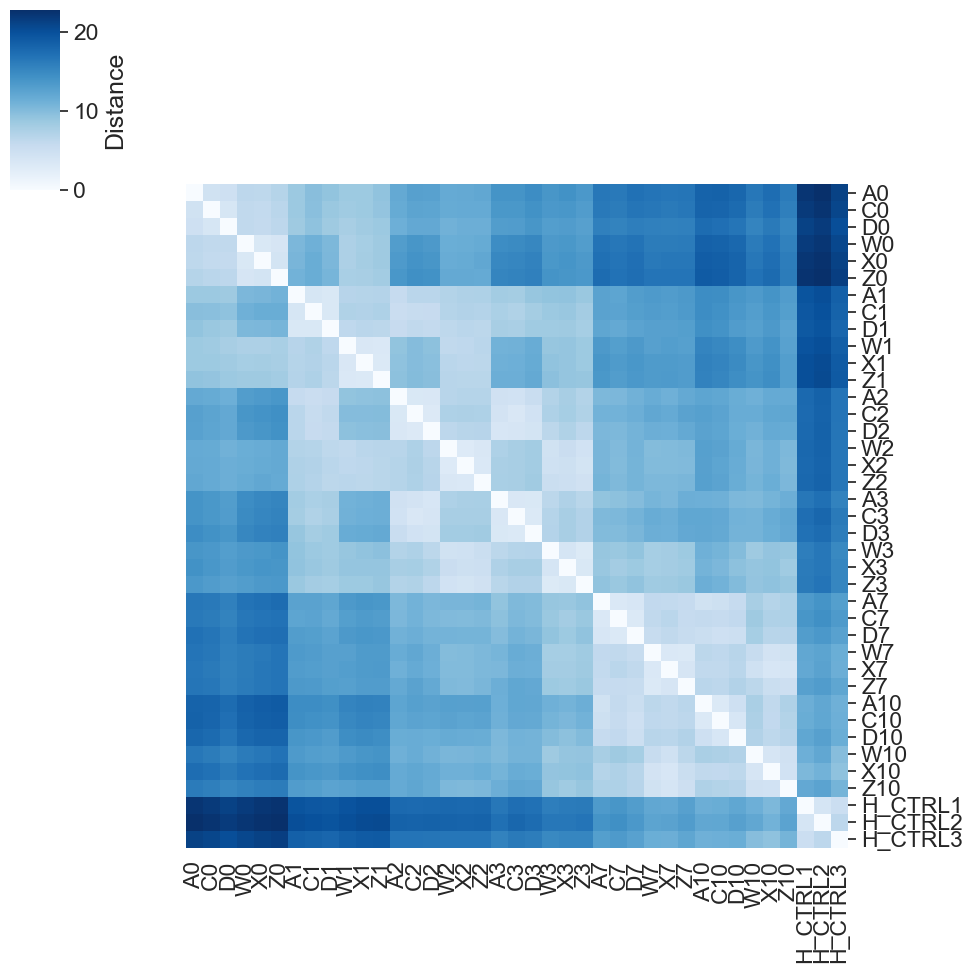

In [102]:
from scipy.spatial.distance import pdist, squareform
pairwise_distances = pdist(vst_data_df.T, metric='euclidean')
distance_matrix = squareform(pairwise_distances)
distance_matrix = pd.DataFrame(data=distance_matrix,
                               columns=newcols,
                               index=newcols)
fg = sns.clustermap(distance_matrix, cmap='Blues',
               # annot=True, 
               col_cluster=False, row_cluster=False,
               cbar_kws={'label': 'Distance'},
               annot_kws={"size": 12},
               xticklabels=True, yticklabels=True)

fg.ax_heatmap.set_yticklabels(fg.ax_heatmap.get_yticklabels(), rotation=0)




sns.set_theme(font_scale=1.5) 
plt.savefig(f'{dirs.pcaplots}/distance_map.png',dpi=300,bbox_inches='tight')

In [4]:
## Get contrast DFs right for Analysis

## Change Index to Symbol
mapper = id_map(species='human')
norm_counts_df.index = norm_counts_df.index.map(mapper.mapper)

D100_results_df.index = D100_results_df.index.map(mapper.mapper)
DCTRL0_results_df.index = DCTRL0_results_df.index.map(mapper.mapper)
DCTRL10_results_df.index = DCTRL10_results_df.index.map(mapper.mapper)

## Filter Low Expression out + Sort by padj
D100_results_df = D100_results_df[D100_results_df['baseMean']>10].dropna().sort_values(by='padj',ascending=True)
DCTRL0_results_df = DCTRL0_results_df[DCTRL0_results_df['baseMean']>10].dropna().sort_values(by='padj',ascending=True)
DCTRL10_results_df = DCTRL10_results_df[DCTRL10_results_df['baseMean']>10].dropna().sort_values(by='padj',ascending=True)

## Define Significant Genes

D100_sigs_df = D100_results_df[(D100_results_df.padj < 0.05) & (abs(D100_results_df.log2FoldChange)>1)]
DCTRL0_sigs_df = DCTRL0_results_df[(DCTRL0_results_df.padj < 0.05) & (abs(DCTRL0_results_df.log2FoldChange)>1)]
DCTRL10_sigs_df = DCTRL10_results_df[(DCTRL10_results_df.padj < 0.05) & (abs(DCTRL10_results_df.log2FoldChange)>1)]

# Separate Up and down regulated Genes

D100_upresults_df = D100_results_df[D100_results_df.log2FoldChange > 0]
DCTRL0_upresults_df = DCTRL0_results_df[DCTRL0_results_df.log2FoldChange > 0]
DCTRL10_upresults_df = DCTRL10_results_df[DCTRL10_results_df.log2FoldChange > 0]


D100_downresults_df = D100_results_df[D100_results_df.log2FoldChange < 0]
DCTRL0_downresults_df = DCTRL0_results_df[DCTRL0_results_df.log2FoldChange < 0]
DCTRL10_downresults_df = DCTRL10_results_df[DCTRL10_results_df.log2FoldChange < 0]

## Separate Up and Down significant DEGs

D100_upsigs_df = D100_sigs_df[D100_sigs_df.log2FoldChange > 0]
DCTRL0_upsigs_df = DCTRL0_sigs_df[DCTRL0_sigs_df.log2FoldChange > 0]
DCTRL10_upsigs_df = DCTRL10_sigs_df[DCTRL10_sigs_df.log2FoldChange > 0]


D100_downsigs_df = D100_sigs_df[D100_sigs_df.log2FoldChange < 0]
DCTRL0_downsigs_df = DCTRL0_sigs_df[DCTRL0_sigs_df.log2FoldChange < 0]
DCTRL10_downsigs_df = DCTRL10_sigs_df[DCTRL10_sigs_df.log2FoldChange < 0]



In [47]:
norm_counts_df.iloc[0:20000]

,index,A0,A1,A2,A3,A7,A10,C0,C1,C2,...,X2,X3,X7,X10,Z0,Z1,Z2,Z3,Z7,Z10
0,TSPAN6,494.114985,725.181823,580.818098,565.079268,645.261199,612.532579,379.683160,672.474461,562.093668,...,711.843227,537.182837,517.277888,514.528048,376.027340,697.904922,661.009817,620.404021,537.821312,625.301728
1,TNMD,1.173670,2.280446,3.256924,1.040662,5.186987,5.004351,2.287248,2.334981,3.280702,...,8.032082,5.327433,11.937182,10.608826,7.414624,9.970070,7.932118,6.065402,9.115615,25.747718
2,DPM1,2137.252701,1562.105499,1449.331142,1295.623735,1280.148423,1128.981615,1631.951414,1644.993950,1474.128919,...,1129.511467,931.412886,783.874954,814.227375,1029.573450,988.849701,1040.870125,1125.565396,888.772507,827.605229
3,SCYL3,113.845970,100.339623,110.735413,92.618885,99.590153,98.085282,96.064414,93.399231,129.040959,...,103.413050,105.660756,103.455578,88.406881,90.034715,94.262483,93.422721,72.784829,97.537085,90.117014
4,C1orf112,217.128912,226.904375,186.730304,183.156448,274.910318,267.232350,225.293923,190.300933,182.625764,...,266.062701,195.339213,284.502839,293.510845,166.299415,182.180376,252.946423,246.948528,303.549995,325.524723
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MIR654,7.042019,2.280446,3.256924,6.243970,8.299179,6.005221,3.430872,5.837452,5.467837,...,3.012031,6.215339,4.973826,4.420344,2.118464,5.438220,6.169425,2.599458,3.646246,7.356491
19996,MIR567,0.000000,0.000000,1.085641,1.040662,0.000000,1.000870,2.287248,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19997,MIR634,0.000000,1.140223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.004010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.911562,0.000000
19998,MIR574,0.000000,0.000000,0.000000,0.000000,0.000000,1.000870,0.000000,0.000000,1.093567,...,1.004010,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [5]:

# Save Dataframes to excel

# norm_counts_df.iloc[0:20000].to_excel(f'{dirs.deseq2output}/norm_counts_p1.xlsx')
# norm_counts_df.iloc[20000:].to_excel(f'{dirs.deseq2output}/norm_counts_p2.xlsx')

with pd.ExcelWriter(f'{dirs.deseq2output}/DESeq2 Results.xlsx') as writer:
    # writer.book.use_zip64() 
    D100_results_df.to_excel(writer, sheet_name='D100_results')
    DCTRL0_results_df.to_excel(writer, sheet_name='DCTRL0_results')
    DCTRL10_results_df.to_excel(writer, sheet_name='DCTRL10_results')
with pd.ExcelWriter(f'{dirs.deseq2output}/DESeq2 Upregulated Results.xlsx') as writer:  
    D100_upresults_df.to_excel(writer, sheet_name='D100_upresults')
    DCTRL0_upresults_df.to_excel(writer, sheet_name='DCTRL0_upresults')
    DCTRL10_upresults_df.to_excel(writer, sheet_name='DCTRL10_upresults')
with pd.ExcelWriter(f'{dirs.deseq2output}/DESeq2 Downregulated Results.xlsx') as writer:  
    D100_downresults_df.to_excel(writer, sheet_name='D100_downresults')
    DCTRL0_downresults_df.to_excel(writer, sheet_name='DCTRL0_downresults')
    DCTRL10_downresults_df.to_excel(writer, sheet_name='DCTRL10_downresults')
with pd.ExcelWriter(f'{dirs.sigdegs}/Significant DEG.xlsx') as writer:  
    D100_sigs_df.to_excel(writer, sheet_name='D100_sigs')
    DCTRL0_sigs_df.to_excel(writer, sheet_name='DCTRL0_sigs')
    DCTRL10_sigs_df.to_excel(writer, sheet_name='DCTRL10_sigs')
with pd.ExcelWriter(f'{dirs.sigdegs}/Upregulated DEGs.xlsx') as writer:  
    D100_upsigs_df.to_excel(writer, sheet_name='D100_upsigs')
    DCTRL0_upsigs_df.to_excel(writer, sheet_name='DCTRL0_upsigs')
    DCTRL10_upsigs_df.to_excel(writer, sheet_name='DCTRL10_upsigs')
with pd.ExcelWriter(f'{dirs.sigdegs}/Downregulated DEGs.xlsx') as writer:  
    D100_downsigs_df.to_excel(writer, sheet_name='D100_downsigs')    
    DCTRL0_downsigs_df.to_excel(writer, sheet_name='DCTRL0_downsigs')    
    DCTRL10_downsigs_df.to_excel(writer, sheet_name='DCTRL10_downsigs')    

# Wilcoxon Rank-Sum test w/ Benjamini-Hochberg Correction

In [ ]:
## I CAN PROBABLY GENERALIZE THIS SCRIPT TO TAKE IN NUMBER OF SAMPLES + NUMBER OF CONDITIONS


# Create WRS_counts_df
WRS_counts_df = pd.merge(dirs.A_counts_df.drop(['gene_name','gene_length'],axis=1),dirs.BC_counts_df,on='gene_id')
WRS_counts_df.set_index('gene_id',inplace=True)
WRS_counts_df = WRS_counts_df.rename(columns={'Day_3':'D3A','Day_5':'D5A','Day_7':'D7A'})
WRS_counts_df = WRS_counts_df[['D3A','D3B','D3C','D5A','D5B','D5C','D7A','D7B','D7C','gene_name','gene_length']]
SAMPLES = WRS_counts_df.columns[0:9]
GENEDATA = WRS_counts_df.columns[-2:]
WRS_counts_df = WRS_counts_df[WRS_counts_df[SAMPLES].sum(axis=1)>10] #Counts
WRS_raw_counts_df = WRS_counts_df[SAMPLES]
WRS_genedata_counts_df = WRS_counts_df[GENEDATA]

# Batch Correction
batch = [1,2,2,1,2,2,1,2,2]
TPM_df = pycombat(WRS_raw_counts_df,batch)

## Create TPM
TPM_df = pd.merge(TPM_df,WRS_genedata_counts_df,how='inner',on='gene_id')
TPM_df[SAMPLES] = TPM_df[SAMPLES].div(TPM_df['gene_length']/1000, axis=0) #Transcripts
TPM_df[SAMPLES] = TPM_df[SAMPLES]/TPM_df[SAMPLES].sum(axis=0)*1e6 #TPM
TPM_df


## Log2 Normalize
log2norm_df = np.log2(TPM_df[SAMPLES]+1)

from scipy.stats import ranksums
from statsmodels.stats.multitest import multipletests

## Log 2 Fold Change log(A/b) = log A - log B)
DAY3 = log2norm_df.columns[:3].to_list()
DAY5 = log2norm_df.columns[3:6].to_list()
DAY7 = log2norm_df.columns[6:9].to_list()
print(DAY5)

log2norm_means_df = pd.DataFrame({'D3':log2norm_df[DAY3].mean(axis=1),
                                  'D5':log2norm_df[DAY5].mean(axis=1),
                                  'D7':log2norm_df[DAY7].mean(axis=1)})
log2norm_means_df
log2fc_df = pd.DataFrame({'D3->D7 log2fc': log2norm_means_df['D7'] - log2norm_means_df['D3'],
                            'D3->D5 log2fc': log2norm_means_df['D5'] - log2norm_means_df['D3'],
                            'D5->D7 log2fc': log2norm_means_df['D7'] - log2norm_means_df['D5']})

log2fc_df = pd.merge(log2fc_df,WRS_genedata_counts_df,how='inner',on='gene_id')

## Calculate Wilcoxon Rank-Sum test 
for gene in log2norm_means_df.index.to_list():
    d3_expression = log2norm_df.loc[gene,DAY3]
    d5_expression = log2norm_df.loc[gene,DAY5]
    d7_expression = log2norm_df.loc[gene,DAY7]
    ts73, p73 = ranksums(d7_expression,d3_expression)
    ts53, p53 = ranksums(d5_expression,d3_expression)
    ts75, p75 = ranksums(d7_expression,d5_expression)
    log2fc_df.loc[gene,'D3->D7 p-value'] = p73
    log2fc_df.loc[gene,'D3->D5 p-value'] = p53
    log2fc_df.loc[gene,'D5->D7 p-value'] = p75

log2fc_df.set_index('gene_name',inplace=True)
log2fc_df.drop('gene_length',axis=1,inplace=True)





In [ ]:
log2fc_D37_df = log2fc_df[['D3->D7 log2fc','D3->D7 p-value']].sort_values(by = ['D3->D7 p-value','D3->D7 log2fc'], ascending=[True, False])
log2fc_D35_df = log2fc_df[['D3->D5 log2fc','D3->D5 p-value']].sort_values(by = ['D3->D5 p-value','D3->D5 log2fc'], ascending=[True, False])
log2fc_D57_df = log2fc_df[['D5->D7 log2fc','D5->D7 p-value']].sort_values(by = ['D5->D7 p-value','D5->D7 log2fc'], ascending=[True, False])

## Correct for False Discovery Rate w/ Benjamini-Hochberg Adjustment
log2fc_D37_df['qvalue'] = multipletests(log2fc_D37_df['D3->D7 p-value'], method="fdr_bh")[1]
log2fc_D35_df['qvalue'] = multipletests(log2fc_D35_df['D3->D5 p-value'], method="fdr_bh")[1]
log2fc_D57_df['qvalue'] = multipletests(log2fc_D57_df['D5->D7 p-value'], method="fdr_bh")[1]


log2fc_D37_df.head(50)

# First Try pyDESEq

In [ ]:
## Run Statistical Tests between 2 conditions 

D37stat_res = DeseqStats(dds,contrast=['Day','D3','D7'])
D35stat_res = DeseqStats(dds,contrast=['Day','D3','D5'])
D57stat_res = DeseqStats(dds,contrast=['Day','D5','D7'])


# Create Stat results table
D37stat_res.summary()
D35stat_res.summary()
D57stat_res.summary()
D37_res = D37stat_res.results_df
D35_res = D35stat_res.results_df
D57_res = D57stat_res.results_df

D37_res['Symbol'] = D37_res.index.map(mapper.mapper)
D35_res['Symbol'] = D37_res.index.map(mapper.mapper)
D57_res['Symbol'] = D37_res.index.map(mapper.mapper)

# Filter
D37_res = D37_res[D37_res['baseMean']>=10]
D35_res = D35_res[D35_res['baseMean']>=10]
D57_res = D57_res[D57_res['baseMean']>=10]

# Find Significantly Differentially Expressed genes
log2foldthresh = 0.5
pval_thresh = 0.05

D37_sigs = D37_res[(D37_res.padj<pval_thresh) & abs(D37_res.log2FoldChange) > log2foldthresh]
D35_sigs = D35_res[(D35_res.padj<pval_thresh) & abs(D35_res.log2FoldChange) > log2foldthresh]
D57_sigs = D57_res[(D57_res.padj<pval_thresh) & abs(D57_res.log2FoldChange) > log2foldthresh]

D37_sigs_up = D37_sigs[D37_sigs['log2FoldChange'] > 0].sort_values('log2FoldChange',ascending=False)
D35_sigs_up = D35_sigs[D35_sigs['log2FoldChange'] > 0].sort_values('log2FoldChange',ascending=False)
D57_sigs_up = D57_sigs[D57_sigs['log2FoldChange'] > 0].sort_values('log2FoldChange',ascending=False)
D37_sigs_down = D37_sigs[D37_sigs['log2FoldChange'] < 0].sort_values('log2FoldChange',ascending=True)
D35_sigs_down = D35_sigs[D35_sigs['log2FoldChange'] < 0].sort_values('log2FoldChange',ascending=True)
D57_sigs_down = D57_sigs[D57_sigs['log2FoldChange'] < 0].sort_values('log2FoldChange',ascending=True)

with pd.ExcelWriter('Upregulated DEG.xlsx') as writer:  
    D37_sigs_up.to_excel(writer, sheet_name='Day 3 vs Day 7')
    D35_sigs_up.to_excel(writer, sheet_name='Day 3 vs Day 5')
    D57_sigs_up.to_excel(writer, sheet_name='Day 5 vs Day 7')

with pd.ExcelWriter('Downregulated DEG.xlsx') as writer:  
    D37_sigs_down.to_excel(writer, sheet_name='Day 3 vs Day 7')
    D35_sigs_down.to_excel(writer, sheet_name='Day 3 vs Day 5')
    D57_sigs_down.to_excel(writer, sheet_name='Day 5 vs Day 7')